In [ ]:
import torch
print("CUDA Available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU Device Name:", torch.cuda.get_device_name(0))


CUDA Available: True
GPU Device Name: Tesla T4


In [ ]:
!pip uninstall --yes networkx
!pip uninstall --yes python-louvain
!pip uninstall --yes community
!pip install python-louvain
!pip install networkx
# Upgrade fsspec to a version that supports callbacks
!pip install --upgrade fsspec
!pip install --upgrade datasets sentence-transformers
!pip install pytorch-lightning

Found existing installation: networkx 3.6.1
Uninstalling networkx-3.6.1:
  Successfully uninstalled networkx-3.6.1
Found existing installation: python-louvain 0.16
Uninstalling python-louvain-0.16:
  Successfully uninstalled python-louvain-0.16
Found existing installation: community 1.0.0b1
Uninstalling community-1.0.0b1:
  Successfully uninstalled community-1.0.0b1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 47.6 MB/s eta 0:00:00
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9388 sha256=8193a137fa7b75c22786927a92056eea44845c8b080415aa92a3b7399283914c
  Stored in directory: /root/.cache/pip/wheels/40/f1/e3/485b698c520fa0baee1d07897abc7b8d6479b7d199ce96f4af
Successfully built python-louvain
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.8/201.8 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existi

In [ ]:
import pandas as pd

# Read the CSV file again
df = pd.read_csv("/content/software_articles_mapping.csv", header=0)

# Deduplicate lines
df_deduplicated = df.drop_duplicates().copy()

# Prepare a list to hold the cleaned data
cleaned_data = []

# Iterate through rows and convert id and index with error handling
for index, row in df_deduplicated.iterrows():
    try:
        # Attempt to convert id and index to integer
        row['id'] = int(float(row['id'])) # Convert to float first to handle potential decimals
        row['index'] = int(float(row['index']))
        cleaned_data.append(row.to_dict())
    except (ValueError, TypeError):
        # Skip rows where conversion fails
        print(f"Skipping row due to invalid id or index: {row.to_dict()}")
        continue

# Create a new DataFrame from the cleaned data
df_deduplicated_cleaned = pd.DataFrame(cleaned_data)

# Rename the 'id' column to 'swmath_id'
df_deduplicated_cleaned = df_deduplicated_cleaned.rename(columns={'id': 'swmath_id'})


# Display the first few rows of the cleaned DataFrame
display(df_deduplicated_cleaned.head())

# Print the number of rows before and after cleaning
print(f"Number of rows after deduplication: {len(df_deduplicated)}")
print(f"Number of rows after cleaning (integer conversion): {len(df_deduplicated_cleaned)}")

Streaming output truncated to the last 5000 lines.
Skipping row due to invalid id or index: {'id': 38326, 'index': nan, 'name': 'ImFEATbox', 'keywords': nan}
Skipping row due to invalid id or index: {'id': 38327, 'index': nan, 'name': 'MP3', 'keywords': nan}
Skipping row due to invalid id or index: {'id': 38328, 'index': nan, 'name': 'ASR', 'keywords': 'Materials Science;arXiv_cond-mat.mtrl-sci;Python;ASR;Atomic Simulation Recipes;atomistic materials simulations;ASE'}
Skipping row due to invalid id or index: {'id': 38329, 'index': nan, 'name': 'C2DB', 'keywords': nan}
Skipping row due to invalid id or index: {'id': 38330, 'index': nan, 'name': 'PyArmadillo', 'keywords': 'Mathematical Software;arXiv_cs.MS;PyArmadillo;linear algebra;Python;similar to Matlab;Matlab;Python language'}
Skipping row due to invalid id or index: {'id': 38335, 'index': nan, 'name': 'SecML Malware', 'keywords': 'Cryptography;Security;arXiv_cs.CR;SecML;Python Library;Malware plugin;Adversarial Robustness Evaluatio

swmath_id  index          name  \
0          2      1  SuperLU-DIST   
1          4      3       MULTI2D   
2          5      4        BEMLIB   
3          6      5         FIDAP   
4          7      6       SHALL 4   

                                            keywords  
0                                               orms  
1  Inertial Confinement;Radiative Transfer;Lagran...  
2  boundary element method;textbook;Green's funct...  
3  steady state or transient;two-dimensional;axi-...  
4  implicit compact fourth-order Fortran program;...

Number of rows after deduplication: 39962
Number of rows after cleaning (integer conversion): 25801


In [ ]:
import networkx as nx
import community as community_louvain

# Preprocess the file: replace commas with spaces
input_file = "software_graph.edgelist"
output_file = "processed_graph.edgelist"

with open(input_file, "r") as infile, open(output_file, "w") as outfile:
    for line in infile:
        outfile.write(line.replace(",", " "))

# Load the processed edge list
g = nx.read_edgelist("processed_graph.edgelist", create_using=nx.DiGraph, nodetype=int)

# Print graph information
print("Number of nodes:", g.number_of_nodes())
print("Number of edges:", g.number_of_edges())

# Convert to undirected graph (required for Louvain)
g_undirected = g.to_undirected()

# Apply Louvain method
partition = community_louvain.best_partition(g_undirected, resolution=1.0, random_state=42)

# Calculate modularity
modularity = community_louvain.modularity(partition, g_undirected)
print(f"Modularity (Q): {modularity:.4f}")  # Rounded to 4 decimal places

# Number of clusters
num_clusters = len(set(partition.values()))
print(f"Number of clusters: {num_clusters}")

Number of nodes: 25777
Number of edges: 310246
Modularity (Q): 0.6677
Number of clusters: 144


In [ ]:
# Assuming 'partition' dictionary and 'df_deduplicated' DataFrame are available
# 'partition' maps software_id to community_id
# 'df_deduplicated' contains software information including 'id', 'name', and 'keywords'

# Define the target community ID
target_community_id = 73

# Get the list of software IDs belonging to the target community
software_ids_in_community_17 = [
    software_id for software_id, community_id in partition.items()
    if community_id == target_community_id
]

# Filter df_deduplicated to get information for software in community 17
# Ensure the 'id' column in df_deduplicated is used for merging/filtering
community_17_software_info = df_deduplicated[
    df_deduplicated['id'].isin(software_ids_in_community_17)
]

# Select and display the 'name' and 'keywords' columns
display(community_17_software_info[['name', 'keywords']])

name keywords
39248   libSRES      NaN
39249  SBML-PET      NaN

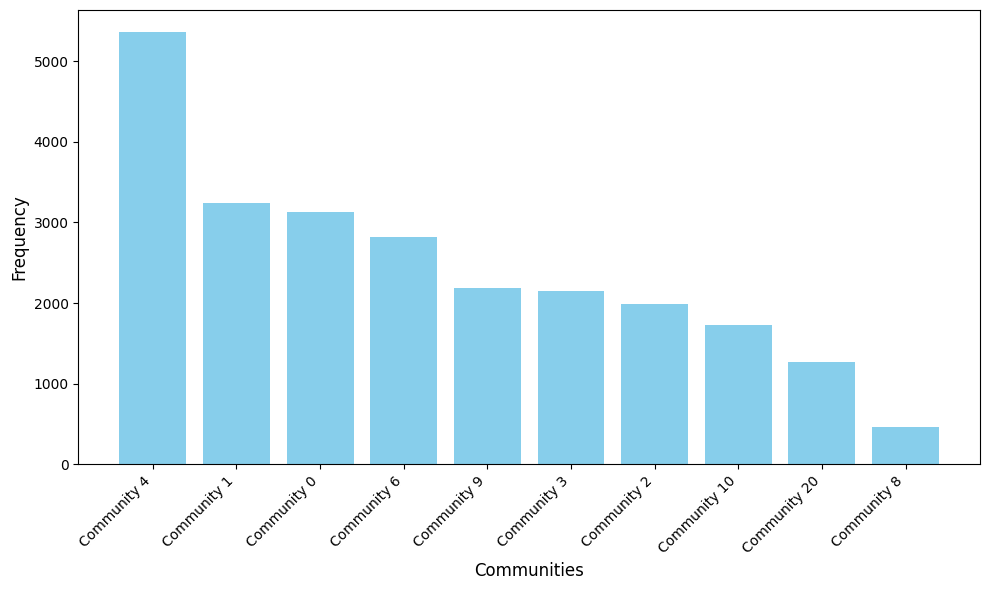

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Count the Frequency of Each Community
community_counts = Counter(partition.values())

# Step 2: Get the Top 10 Most Frequent Communities
top_10 = community_counts.most_common(10)
communities, frequencies = zip(*top_10)

# Step 3: Create the Bar Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(communities)), frequencies, color="skyblue")
plt.xticks(range(len(communities)), [f"Community {c}" for c in communities], rotation=45, ha="right", fontsize=10)
plt.xlabel("Communities", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("", fontsize=14)
plt.tight_layout()


# Save the plot as an image


plt.savefig("top_10_software_communities.eps", format='eps', dpi=300, bbox_inches='tight')
plt.show()






In [ ]:
print(communities, frequencies )

(4, 1, 0, 6, 9, 3, 2, 10, 20, 8) (5366, 3244, 3125, 2823, 2184, 2156, 1984, 1730, 1266, 464)


In [ ]:
# Extreme Multi-Label Classification for Julia DataFrame Export using PECOS (Adapted to XLinearModel)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score
from scipy import sparse
import os

# Step 1: Load the exported Julia DataFrame (assuming it's saved as CSV)
df = pd.read_csv("grouped_data_by_paper_id.csv")

# Step 2: Preprocess merged_msc_codes_2 and merged_software (simplified)
df['merged_msc_codes_2'] = df['merged_msc_codes_2'].apply(lambda x: [code[:2] for code in x.split(",")] if isinstance(x, str) else [])
df['merged_software'] = df['merged_software'].apply(lambda x: x.split(",") if isinstance(x, str) else [])
df["merged_software_2"] = df["merged_software"].apply(lambda x: [x] if not isinstance(x, list) else x)
df["merged_software_2"] = df["merged_software_2"].apply(lambda l:  [x for x in list(set(list(map(lambda x: partition.get(int(x)),l)))) if x is not None])
df["len_merged_software_2"] = df["merged_software_2"].apply(lambda x: len(x))
df.sort_values(by="len_merged_software_2",ascending=False)[["paper_id","merged_msc_codes_2","merged_software","merged_software_2"]]


df.drop_duplicates(subset="paper_id",inplace=True)
df.reset_index(drop=True,inplace=True)

# --- Load dataframe ---
df = df[df['merged_software_2'].apply(len) > 0].reset_index(drop=True)
# Convert scalar entries to single-element lists
df['merged_software_2'] = df['merged_software_2'].apply(
    lambda x: [x] if not isinstance(x, (list, set, tuple)) else x
)

df.to_pickle("grouped_data_by_paper_id_partitions.pkl")

In [ ]:
# Total number of papers
total_papers = len(df)

# Count papers where Community 4 appears (at least once)
community4_papers = df[df['merged_software_2'].apply(lambda x: 4 in x)]
A_percent = (len(community4_papers) / total_papers) * 100  # A = percentage
B_count = len(community4_papers)                         # B = raw count

# Repeat for Community 5
community5_papers = df[df['merged_software_2'].apply(lambda x: 5 in x)]
C_percent = (len(community5_papers) / total_papers) * 100  # C = percentage
D_count = len(community5_papers)                          # D = raw count

print(f"Community 4: {A_percent:.1f}% of papers (n={B_count})")
print(f"Community 5: {C_percent:.1f}% of papers (n={D_count})")
import pandas as pd
from collections import Counter

# Total number of papers
total_papers = len(df)

# Count papers where Community 4 appears (at least once)
community4_papers = df[df['merged_software_2'].apply(lambda x: 4 in x)]
A_percent = (len(community4_papers) / total_papers) * 100  # A = percentage
B_count = len(community4_papers)                         # B = raw count

# Repeat for Community 5
community5_papers = df[df['merged_software_2'].apply(lambda x: 5 in x)]
C_percent = (len(community5_papers) / total_papers) * 100  # C = percentage
D_count = len(community5_papers)                          # D = raw count

print(f"Community 4: {A_percent:.1f}% of papers (n={B_count})")
print(f"Community 5: {C_percent:.1f}% of papers (n={D_count})")
print(f"Community 4: {A_percent:.1f}% of papers (n={B_count})")
print(f"Community 5: {C_percent:.1f}% of papers (n={D_count})")


# Flatten all community IDs and count their occurrences across papers
all_communities = [comm for sublist in df['merged_software_2'] for comm in sublist]
community_freq = Counter(all_communities)

# Sort communities by frequency (ascending) and get the median of the bottom 50%
sorted_freq = sorted(community_freq.values())
E = sorted_freq[len(sorted_freq) // 2]  # Median threshold

print(f"Long tail threshold (E): ≤{E} papers per community")



# Check co-occurrence of Community 4 with MSC 65
community4_msc65 = df[df['merged_software_2'].apply(lambda x: 4 in x) &
                      df['merged_msc_codes_2'].apply(lambda x: 65 in x)]
overlap_msc65 = len(community4_msc65) / len(community4_papers) * 100

# Repeat for MSC 68
community4_msc68 = df[df['merged_software_2'].apply(lambda x: 4 in x) &
                      df['merged_msc_codes_2'].apply(lambda x: 68 in x)]
overlap_msc68 = len(community4_msc68) / len(community4_papers) * 100

print(f"Community 4 overlaps with MSC 65 in {overlap_msc65:.1f}% of papers")
print(f"Community 4 overlaps with MSC 68 in {overlap_msc68:.1f}% of papers")

# Count papers where Community 17 appears (at least once)
community17_papers = df[df['merged_software_2'].apply(lambda x: 17 in x)]
percent_17 = (len(community17_papers) / total_papers) * 100
count_17 = len(community17_papers)

print(f"Community 17: {percent_17:.1f}% of papers (n={count_17})")

# Check co-occurrence of Community 17 with MSC 65
community17_msc65 = df[df['merged_software_2'].apply(lambda x: 17 in x) &
                      df['merged_msc_codes_2'].apply(lambda x: 65 in x)]
overlap_msc65_17 = len(community17_msc65) / len(community17_papers) * 100

# Repeat for MSC 68
community17_msc68 = df[df['merged_software_2'].apply(lambda x: 17 in x) &
                      df['merged_msc_codes_2'].apply(lambda x: 68 in x)]
overlap_msc68_17 = len(community17_msc68) / len(community17_papers) * 100

print(f"Community 17 overlaps with MSC 65 in {overlap_msc65_17:.1f}% of papers")
print(f"Community 17 overlaps with MSC 68 in {overlap_msc68_17:.1f}% of papers")

Community 4: 18.4% of papers (n=19749)
Community 5: 0.0% of papers (n=1)
Community 4: 18.4% of papers (n=19749)
Community 5: 0.0% of papers (n=1)
Community 4: 18.4% of papers (n=19749)
Community 5: 0.0% of papers (n=1)
Long tail threshold (E): ≤2 papers per community
Community 4 overlaps with MSC 65 in 0.0% of papers
Community 4 overlaps with MSC 68 in 0.0% of papers
Community 17: 0.0% of papers (n=4)
Community 17 overlaps with MSC 65 in 0.0% of papers
Community 17 overlaps with MSC 68 in 0.0% of papers


In [ ]:
import plotly.graph_objects as go

def prepare_data():
    """Prepare and return the input DataFrame."""
    data = {
        'paper_id': [6069716, 6812419, 6873630, 7055522, 6333330],
        'merged_msc_codes_2': [[91, 62], [62, 86], [91, 68, 62], [62], [91, 62, 60, 65, 90]],
        'merged_software': [
            [10002, 10489, 10603, 31574, 4351, 4508, 9991],
            [10002, 10689, 12187, 12265, 12269, 12287, 13294],
            [10002, 11208, 39429, 9997, 9999],
            [10002, 10630, 11270, 11621, 13784, 14395, 14490],
            [10002, 4509, 7926, 8031, 9991, 9992, 9993, 9994]
        ],
        'merged_software_2': [[4], [4], [4, 5], [4], [4]],
    }
    return pd.DataFrame(data)

def explode_data(df):
    """Explode all list columns to get individual connections."""
    return df.explode('merged_msc_codes_2').explode('merged_software').explode('merged_software_2')

def calculate_edge_counts(df_exploded):
    """Calculate edge counts for both relationships."""
    msc_software_counts = (
        df_exploded.groupby(['merged_msc_codes_2', 'merged_software'])
        .size().reset_index(name='count')
    )

    software_community_counts = (
        df_exploded.groupby(['merged_software', 'merged_software_2'])
        .size().reset_index(name='count')
    )

    return msc_software_counts, software_community_counts

def filter_top_software(msc_software_counts, software_community_counts, top_percent=0.5):
    """Filter to keep only the top software based on connection counts."""
    total_sw_counts = (
        msc_software_counts.groupby('merged_software')['count'].sum()
        .add(software_community_counts.groupby('merged_software')['count'].sum(), fill_value=0))

    top_n = int(len(total_sw_counts) * top_percent)
    top_software = total_sw_counts.sort_values(ascending=False).head(top_n).index.astype(str).tolist()

    msc_filtered = msc_software_counts[msc_software_counts['merged_software'].astype(str).isin(top_software)]
    comm_filtered = software_community_counts[software_community_counts['merged_software'].astype(str).isin(top_software)]

    return msc_filtered, comm_filtered

def prepare_sankey_data(msc_software_counts, software_community_counts):
    """Prepare data for Sankey diagram."""
    # Get unique nodes
    msc_nodes = msc_software_counts['merged_msc_codes_2'].astype(str).unique().tolist()
    software_nodes = list(set(msc_software_counts['merged_software'].astype(str).unique()) |
                         set(software_community_counts['merged_software'].astype(str).unique()))
    community_nodes = software_community_counts['merged_software_2'].astype(str).unique().tolist()

    # Create labels and mapping
    all_nodes = msc_nodes + software_nodes + community_nodes
    labels = (
        [f"MSC {n}" for n in msc_nodes] +
        [f"SW {n}" for n in software_nodes] +
        [f"Comm {n}" for n in community_nodes]
    )
    label_map = {node: i for i, node in enumerate(all_nodes)}

    # Map source/target indices
    msc_software_counts['source'] = msc_software_counts['merged_msc_codes_2'].astype(str).map(label_map)
    msc_software_counts['target'] = msc_software_counts['merged_software'].astype(str).map(label_map)

    software_community_counts['source'] = software_community_counts['merged_software'].astype(str).map(label_map)
    software_community_counts['target'] = software_community_counts['merged_software_2'].astype(str).map(label_map)

    # Combine all links
    sources = list(msc_software_counts['source']) + list(software_community_counts['source'])
    targets = list(msc_software_counts['target']) + list(software_community_counts['target'])
    values = list(msc_software_counts['count']) + list(software_community_counts['count'])

    return labels, sources, targets, values

def create_sankey_diagram(labels, sources, targets, values):
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,  # Increased for readability
            line=dict(color="black", width=0.8),
            label=labels,
            color=["#4E79A7" if "MSC" in l else "#F28E2B" if "SW" in l else "#59A14F" for l in labels]  # Color-coding
        ),
        link=dict(
            source=sources,
            target=targets,
            value=values,
            hoverinfo="all",  # Show all link info on hover
        )
    ))

    fig.update_layout(
        title_text="<b>Predicting Software Communities for Mathematical Research Papers via MSC Codes</b><br>"
                  "<i>Multi-label classification flow (Top 50% connections shown)</i>",
        title_x=0.5,
        title_font_size=16,
        font_size=12,
        annotations=[
            dict(
                x=0.1, y=-0.12,
                text="MSC Codes → Domain Knowledge Inputs",
                showarrow=False,
                font_size=10
            ),
            dict(
                x=0.5, y=-0.12,
                text="Mathematical Software → Intermediate Labels",
                showarrow=False,
                font_size=10
            ),
            dict(
                x=0.9, y=-0.12,
                text="Software Communities → Prediction Output",
                showarrow=False,
                font_size=10
            )
        ]
    )
    fig.show()

def main():
    """Main execution function."""
    # Data preparation
    df = prepare_data()
    df_exploded = explode_data(df)

    # Calculate initial edge counts
    msc_software_counts, software_community_counts = calculate_edge_counts(df_exploded)

    # First filtering (top 50%)
    msc_filtered, comm_filtered = filter_top_software(msc_software_counts, software_community_counts)

    # Second filtering (top 50% of remaining)
    msc_filtered_2, comm_filtered_2 = filter_top_software(msc_filtered, comm_filtered)

    # Prepare and plot Sankey diagram
    labels, sources, targets, values = prepare_sankey_data(msc_filtered_2, comm_filtered_2)
    create_sankey_diagram(labels, sources, targets, values)

if __name__ == "__main__":
    main()

/tmp/ipython-input-1358701785.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msc_software_counts['source'] = msc_software_counts['merged_msc_codes_2'].astype(str).map(label_map)
/tmp/ipython-input-1358701785.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msc_software_counts['target'] = msc_software_counts['merged_software'].astype(str).map(label_map)
/tmp/ipython-input-1358701785.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
import requests
from time import sleep

# Input data
data = {
    'paper_id': [6069716, 6812419, 6873630, 7055522, 6333330],
    'merged_msc_codes_2': [[91, 62], [62, 86], [91, 68, 62], [62], [91, 62, 60, 65, 90]],
}

# Extract unique MSC codes
unique_msc_codes = sorted({code for sublist in data['merged_msc_codes_2'] for code in sublist})

# API configuration
base_url = "https://api.zbmath.org/v1/classification/_structured_search"
params = {
    "page": 0,
    "results_per_page": 100
}
headers = {
    "accept": "application/json"
}

# Store results
msc_titles = {}

# Fetch titles with rate limiting
for code in unique_msc_codes:
    formatted_code = f"{code:02d}-XX"
    params["MSC"] = formatted_code

    try:
        response = requests.get(base_url, params=params, headers=headers)
        response.raise_for_status()  # Raise exception for bad status codes

        result = response.json()
        if result.get("result"):
            msc_titles[code] = result["result"][0]["long_title"]
        else:
            msc_titles[code] = "Title not found"

        print(f"Fetched: MSC {code} - {msc_titles[code]}")

    except requests.exceptions.RequestException as e:
        msc_titles[code] = f"Error fetching: {str(e)}"
        print(f"Error for MSC {code}: {e}")

    sleep(1)  # Be polite with API rate limiting

# Create a DataFrame with the results
msc_df = pd.DataFrame({
    "msc_code": msc_titles.keys(),
    "title": msc_titles.values()
})
pd.set_option('display.max_colwidth',300)
print("\nMSC Code Titles:")
print(msc_df)

print(msc_df.to_latex(index=False))

Fetched: MSC 60 - Probability theory and stochastic processes \{For additional applications, see 05Cxx, 11Kxx, 34-XX, 35-XX, 62-XX, 76-XX, 81-XX, 82-XX, 90-XX, 91-XX, 92-XX, 93-XX, 94-XX\}
Fetched: MSC 62 - Statistics
Fetched: MSC 65 - Numerical analysis
Fetched: MSC 68 - Computer science \{For papers containing software, source code, etc. in a specific mathematical area, see the classification number --04 in that area\}
Fetched: MSC 86 - Geophysics [See also 76U05, 76V05]
Fetched: MSC 90 - Operations research, mathematical programming
Fetched: MSC 91 - Game theory, economics, finance, and other social and behavioral sciences

MSC Code Titles:
   msc_code  \
0        60   
1        62   
2        65   
3        68   
4        86   
5        90   
6        91   

                                                                                                                                                                        title  
0  Probability theory and stochastic processes \{Fo

In [ ]:
pd.set_option('display.max_colwidth',300)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px
from IPython.display import display, HTML
import itertools

# Prepare data
df_titles = df[df["paper_id"].isin([6069716, 6812419, 6873630, 6980773, 6718348, 6850285, 6499939, 7157310, 6623171])].copy().reset_index(drop=True)
# Assuming df_titles with columns:
# 'title' (str)
# 'merged_software_2' (list of software groups)

# Explode to individual software groups
df_titles['orig_index'] = df_titles.index
df_exploded = df_titles.explode('merged_software_2').reset_index(drop=True)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=50)
X_tfidf = vectorizer.fit_transform(df_titles['title'])
feature_names = vectorizer.get_feature_names_out()

# Aggregate top keywords per group
group_keywords = {}
for group in df_exploded['merged_software_2'].unique():
    idxs = df_exploded[df_exploded['merged_software_2'] == group]['orig_index'].unique()
    group_tfidf = X_tfidf[idxs].mean(axis=0).A1
    top_indices = group_tfidf.argsort()[-5:][::-1]  # top 5 keywords
    group_keywords[group] = set([feature_names[i] for i in top_indices])

# DYNAMIC COLOR ASSIGNMENT BASED ON NUMBER OF GROUPS
unique_groups = sorted(list(df_exploded['merged_software_2'].unique()))
num_groups = len(unique_groups)

# Choose appropriate color sequence based on number of groups
if num_groups <= 10:
    color_sequence = px.colors.qualitative.Set1
elif num_groups <= 20:
    color_sequence = px.colors.qualitative.Set3
else:
    # For large numbers, combine multiple color sequences
    color_sequence = (px.colors.qualitative.Set1 +
                     px.colors.qualitative.Set2 +
                     px.colors.qualitative.Set3 +
                     px.colors.qualitative.Pastel +
                     px.colors.qualitative.Dark2 +
                     px.colors.qualitative.Bold)

# Assign colors to groups
group_color_map = {grp: color_sequence[i % len(color_sequence)] for i, grp in enumerate(unique_groups)}

def highlight_title_multigroup(title, groups):
    words = title.split()
    # Collect keywords for all groups
    kws_per_group = {g: group_keywords.get(g, set()) for g in groups}
    all_kws = set().union(*kws_per_group.values())

    highlighted_words = []
    for w in words:
        w_clean = w.lower().strip('.,;:"\'()[]')

        # Check if word is keyword for any group (pick first matched group)
        matched_group = None
        for g in groups:
            if w_clean in kws_per_group.get(g, set()):
                matched_group = g
                break

        if matched_group is not None:
            col = group_color_map[matched_group]
            # Bold + color for keyword
            highlighted_words.append(f'<span style="color:{col}; font-weight:bold;">{w}</span>')
        else:
            # Non-keyword word: use black
            highlighted_words.append(f'<span style="color:black;">{w}</span>')
    return ' '.join(highlighted_words)

# Apply to dataframe
df_titles['highlighted_title'] = df_titles.apply(
    lambda row: highlight_title_multigroup(row['title'], row['merged_software_2']),
    axis=1
)

def generate_caption_html():
    return """
    <div style="
        text-align: center;
        font-family: Arial;
        font-size: 18px;
        font-weight: bold;
        margin-bottom: 20px;">
        Caption: Colors indicate software groups; bold words are domain-specific keywords.
    </div>
    """

def generate_legend_html_bottomright(group_color_map):
    legend_items = []
    for group, color in group_color_map.items():
        legend_items.append(f"""
        <div style="display:flex; align-items:center; margin-bottom:6px;">
            <div style="
                width:16px; height:16px; background-color:{color};
                margin-right:8px; border-radius:4px; border:1px solid #000;">
            </div>
            <div style="font-family:Arial; font-size:14px;">Group {group}</div>
        </div>
        """)

    # Add scroll if too many groups
    max_height = "300px" if len(group_color_map) > 15 else "auto"
    overflow_y = "auto" if len(group_color_map) > 15 else "visible"

    return f"""
    <div style="
        position: fixed;
        bottom: 20px;
        right: 20px;
        background: white;
        border: 1px solid #ccc;
        padding: 12px 16px;
        border-radius: 8px;
        box-shadow: 0 2px 8px rgba(0,0,0,0.15);
        max-width: 200px;
        max-height: {max_height};
        overflow-y: {overflow_y};
        z-index: 1000;
    ">
        <div style="font-weight:bold; margin-bottom:10px; text-align:center;">
            Software Groups ({len(group_color_map)} groups)
        </div>
        {''.join(legend_items)}
    </div>
    """

# Display caption centered above
caption_html = generate_caption_html()
display(HTML(caption_html))

# Display titles (your existing highlighted_title HTML)
for _, row in df_titles.iterrows():
    display(HTML(f"<p style='font-family:Arial; font-size:14px; line-height:1.4;'>{row['highlighted_title']}</p>"))

# Display legend fixed bottom-right
# Display legend fixed bottom-right
legend_html = generate_legend_html_bottomright(group_color_map)
display(HTML(legend_html))

In [ ]:
for _, row in df_titles.iterrows():
    print(f"<p style='font-family:Arial; font-size:14px; line-height:1.4;'>{row['highlighted_title']}</p>")
legend_html

<p style='font-family:Arial; font-size:14px; line-height:1.4;'><span style="color:black;">An</span> <span style="color:rgb(55,126,184); font-weight:bold;">introduction</span> <span style="color:black;">to</span> <span style="color:rgb(55,126,184); font-weight:bold;">analysis</span> <span style="color:black;">of</span> <span style="color:black;">financial</span> <span style="color:rgb(55,126,184); font-weight:bold;">data</span> <span style="color:black;">with</span> <span style="color:black;">R.</span></p>
<p style='font-family:Arial; font-size:14px; line-height:1.4;'><span style="color:black;">Assessing</span> <span style="color:black;">phenotypic</span> <span style="color:black;">correlation</span> <span style="color:black;">through</span> <span style="color:black;">the</span> <span style="color:rgb(152,78,163); font-weight:bold;">multivariate</span> <span style="color:rgb(152,78,163); font-weight:bold;">phylogenetic</span> <span style="color:black;">latent</span> <span style="color:b

'\n    <div style="\n        position: fixed;\n        bottom: 20px;\n        right: 20px;\n        background: white;\n        border: 1px solid #ccc;\n        padding: 12px 16px;\n        border-radius: 8px;\n        box-shadow: 0 2px 8px rgba(0,0,0,0.15);\n        max-width: 200px;\n        max-height: auto;\n        overflow-y: visible;\n        z-index: 1000;\n    ">\n        <div style="font-weight:bold; margin-bottom:10px; text-align:center;">\n            Software Groups (4 groups)\n        </div>\n        \n        <div style="display:flex; align-items:center; margin-bottom:6px;">\n            <div style="\n                width:16px; height:16px; background-color:rgb(228,26,28);\n                margin-right:8px; border-radius:4px; border:1px solid #000;">\n            </div>\n            <div style="font-family:Arial; font-size:14px;">Group 0</div>\n        </div>\n        \n        <div style="display:flex; align-items:center; margin-bottom:6px;">\n            <div style="\

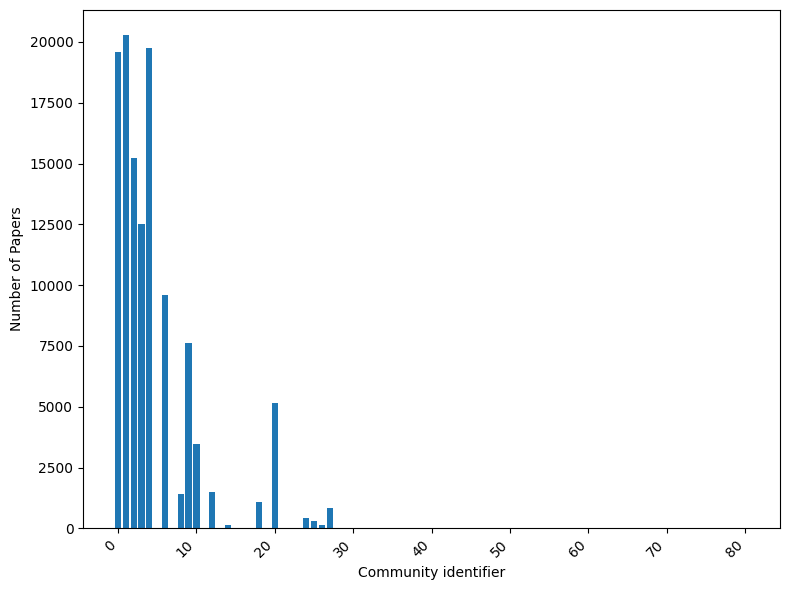

In [ ]:
from collections import Counter

all_communities = [comm for sublist in df['merged_software_2'] for comm in sublist]
counter = Counter(all_communities)
top_communities = counter.most_common(20)

labels, counts = zip(*top_communities)
plt.figure(figsize=(8,6))
plt.bar(labels, counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Community identifier')
plt.ylabel('Number of Papers')
# plt.title('Top 20 Software Communities by Paper Count')
plt.tight_layout()
plt.savefig("top_software_communities_barplot.eps", format='eps', dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
print(labels, counts)

(1, 4, 0, 2, 3, 6, 9, 20, 10, 12, 8, 18, 27, 24, 25, 26, 14, 34, 80, 49) (20296, 19749, 19582, 15243, 12524, 9597, 7629, 5139, 3464, 1507, 1417, 1080, 844, 423, 298, 145, 138, 22, 21, 17)


In [ ]:
all_communities = [comm for sublist in df['merged_software_2'] for comm in sublist]
counter = Counter(all_communities)
top_communities = counter.most_common(20)
print(top_communities)

[(1, 20296), (4, 19749), (0, 19582), (2, 15243), (3, 12524), (6, 9597), (9, 7629), (20, 5139), (10, 3464), (12, 1507), (8, 1417), (18, 1080), (27, 844), (24, 423), (25, 298), (26, 145), (14, 138), (34, 22), (80, 21), (49, 17)]


In [ ]:
# # Soften extreme weights (recommended for better model stability)
# scaled_weights = np.clip(sample_weights, 0.1, 10.0)

# # Or log-scaling for very extreme cases
# smoothed_weights = np.log1p(sample_weights)

In [ ]:
# import os
# import gc
# import numpy as np
# import pandas as pd
# import joblib
# from sklearn.preprocessing import MultiLabelBinarizer
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import SGDClassifier
# from sklearn.multioutput import MultiOutputClassifier
# from sklearn.metrics import classification_report, hamming_loss
# from tqdm import tqdm
# from scipy import sparse
# from sklearn.utils.class_weight import compute_class_weight

# # --- CONFIG ---
# EMBEDDING_SAVE_DIR = './embeddings_cache2'
# DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
# print(f"Using device: {DEVICE}")

# # --- Load or fit MultiLabelBinarizers ---
# mlb_output = (joblib.load('mlb_output.pkl') if os.path.exists('mlb_output.pkl')
#              else MultiLabelBinarizer().fit(df['merged_software_2']))
# mlb_input = (joblib.load('mlb_input.pkl') if os.path.exists('mlb_input.pkl')
#             else MultiLabelBinarizer().fit(df['merged_msc_codes_2']))

# # --- Load and align embeddings ---
# X_title_embeddings = np.vstack([
#     np.load(os.path.join(EMBEDDING_SAVE_DIR, f)).astype(np.float32)
#     for f in sorted(f for f in os.listdir(EMBEDDING_SAVE_DIR) if f.endswith('.npy'))
# ])
# df_aligned = df.iloc[:X_title_embeddings.shape[0]].reset_index(drop=True)

# # --- Encode targets and features ---
# y_encoded = mlb_output.transform(df_aligned['merged_software_2'])
# X_msc_encoded = mlb_input.transform(df_aligned['merged_msc_codes_2'])

# # --- Calculate sample weights ---
# def get_multi_label_weights(y):
#     """Robust weighting for multi-label data"""
#     if hasattr(y, 'toarray'):
#         y = y.toarray()
#     weights = np.zeros(y.shape[0], dtype=np.float32)

#     for label_idx in range(y.shape[1]):
#         classes = np.unique(y[:, label_idx])
#         if len(classes) > 1:
#             class_weights = compute_class_weight('balanced', classes=classes, y=y[:, label_idx])
#             weights += np.where(y[:, label_idx] == 1, class_weights[1], class_weights[0])

#     return weights / weights.mean()  # Normalize to mean=1.0

# sample_weights = get_multi_label_weights(y_encoded)

# # --- Calculate per-label class weights ---
# def get_class_weights(y_sample):
#     """Calculate class weights for each label"""
#     n_labels = y_sample.shape[1]
#     class_weights = []

#     for label_idx in range(n_labels):
#         classes = np.unique(y_sample[:, label_idx])
#         if len(classes) > 1:
#             weights = compute_class_weight(
#                 'balanced',
#                 classes=classes,
#                 y=y_sample[:, label_idx]
#             )
#             class_weights.append({0: weights[0], 1: weights[1]})
#         else:
#             class_weights.append({0: 1.0, 1: 1.0})  # Default weights

#     return class_weights

# # Calculate class weights
# class_weights = get_class_weights(y_encoded[:50000]) if len(y_encoded) > 50000 else get_class_weights(y_encoded)

# # --- Train/test split for both models ---
# # Split for MSC model
# X_train_msc, X_test_msc, y_train_msc, y_test_msc, weights_train_msc, _ = train_test_split(
#     X_msc_encoded,
#     y_encoded,
#     sample_weights,
#     test_size=0.2,
#     random_state=42
# )

# # Split for Title model
# X_train_title, X_test_title, y_train_title, y_test_title, weights_train_title, _ = train_test_split(
#     sparse.csr_matrix(X_title_embeddings),
#     y_encoded,
#     sample_weights,
#     test_size=0.2,
#     random_state=42
# )

# # --- Model training function ---
# def train_weighted_model(X_train, y_train, X_test, y_test, sample_weights, class_weights, name):
#     base_clf = SGDClassifier(
#         loss='log_loss',
#         max_iter=1000,
#         tol=1e-3,
#         n_jobs=-1,
#         random_state=42
#     )
#     model = MultiOutputClassifier(base_clf, n_jobs=-1)

#     print(f"Training {name}...")
#     classes = [np.array([0, 1]) for _ in range(y_train.shape[1])]

#     batch_size = 10000
#     for start in tqdm(range(0, X_train.shape[0], batch_size)):
#         end = min(start + batch_size, X_train.shape[0])
#         X_batch = X_train[start:end]
#         y_batch = y_train[start:end]
#         weights_batch = sample_weights[start:end]

#         # Create combined weights
#         combined_weights = np.ones_like(weights_batch)
#         for label_idx in range(y_batch.shape[1]):
#             # Vectorized weight application
#             pos_mask = (y_batch[:, label_idx] == 1)
#             combined_weights[pos_mask] *= class_weights[label_idx][1]
#             combined_weights[~pos_mask] *= class_weights[label_idx][0]

#         final_weights = combined_weights * weights_batch

#         model.partial_fit(
#             X_batch,
#             y_batch,
#             classes=classes,
#             sample_weight=final_weights
#         )

#     # Evaluation
#     y_pred = model.predict(X_test)
#     print(f"\n{name} Hamming Loss: {hamming_loss(y_test, y_pred):.4f}")
#     target_names_str = [str(cls) for cls in mlb_output.classes_]
#     print(classification_report(y_test, y_pred, zero_division=0, target_names=target_names_str))

#     return model

# # Train MSC model
# print("\n=== Training MSC Model ===")
# msc_model = train_weighted_model(
#     X_train_msc, y_train_msc, X_test_msc, y_test_msc, weights_train_msc, class_weights,
#     "MSC Code Model"
# )
# joblib.dump(msc_model, 'msc_model.pkl')

# # Train Title model
# print("\n=== Training Title Model ===")
# title_model = train_weighted_model(
#     X_train_title, y_train_title, X_test_title, y_test_title, weights_train_title, class_weights,
#     "Title Embedding Model"
# )
# joblib.dump(title_model, 'title_model.pkl')

# # Cleanup
# del X_title_embeddings, X_msc_encoded
# gc.collect()

In [ ]:
import tensorflow as tf
tf.version.VERSION

'2.19.0'

In [ ]:
#EMBEDDING + ENCODER
import os
import numpy as np
import pandas as pd
import joblib
import torch
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping

# --- Add TensorFlow GPU/CPU checks ---
import tensorflow as tf

# Check if TensorFlow sees GPUs
gpu_available_tf = tf.config.list_physical_devices('GPU')
print(f"TensorFlow sees GPUs: {gpu_available_tf}")

# Decide TensorFlow device
tf_device = '/CPU:0' # Default to CPU
if gpu_available_tf:
    print(f"TensorFlow found GPU(s): {gpu_available_tf}")
    # Optional: Configure memory growth to prevent allocating all memory at once
    try:
        for gpu in gpu_available_tf:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("TensorFlow memory growth enabled.")
        # While a GPU is available, we will explicitly use CPU for the autoencoder
        # to avoid potential conflicts and initialization errors with mixed libraries.
        # tf_device = '/GPU:0' # Uncomment this if you want to try using GPU for TF, but the error suggests issues here.
    except Exception as e: # Catch potential errors during memory growth setup
        print(f"Could not enable TensorFlow memory growth or set GPU: {e}")
        pass
else:
    print("TensorFlow did not find any GPUs. Running on CPU.")
    tf.config.set_visible_devices([], 'GPU') # Explicitly hide GPUs from TF

# === CONFIG ===
BATCH_SIZE = 64
CHUNK_SIZE = 20000
EMBEDDING_SAVE_DIR = "./embeddings_cache2"
AUTOENCODER_DIR = "./autoencoder_cache"
os.makedirs(EMBEDDING_SAVE_DIR, exist_ok=True)
os.makedirs(AUTOENCODER_DIR, exist_ok=True)

# Use PyTorch's device logic for the SentenceTransformer model
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"PyTorch Using device: {device}")
print(f"TensorFlow operations will primarily use device: {tf_device}") # Report intended TF device


# === Autoencoder Definition ===
def build_autoencoder(input_dim, latent_dim=128):
    # Autoencoder model definition (remains the same)
    input_layer = Input(shape=(input_dim,))

    # Encoder
    encoded = Dense(512, activation='relu')(input_layer)
    encoded = Dense(256, activation='relu')(encoded)
    encoded = Dense(latent_dim, activation='relu')(encoded)

    # Decoder
    decoded = Dense(256, activation='relu')(encoded)
    decoded = Dense(512, activation='relu')(decoded)
    decoded = Dense(input_dim, activation='linear')(decoded)

    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)

    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder, encoder

# === Modified Embedding Function with Autoencoder ===
def embed_titles_in_chunks(titles, model, chunk_size=CHUNK_SIZE, batch_size=BATCH_SIZE, use_autoencoder=True, tf_device='/CPU:0'):
    embeddings = []
    total = len(titles)

    # Load or train autoencoder if needed
    autoencoder_path = os.path.join(AUTOENCODER_DIR, "autoencoder.h5")
    encoder_path = os.path.join(AUTOENCODER_DIR, "encoder.h5")

    encoder = None # Initialize encoder to None
    if use_autoencoder:
        if not os.path.exists(encoder_path):
            print("First collecting full embeddings to train autoencoder...")
            full_embeddings = []
            for start_idx in range(0, total, chunk_size):
                end_idx = min(start_idx + chunk_size, total)
                chunk_titles = titles[start_idx:end_idx].tolist()
                # Ensure SentenceTransformer uses its assigned device (PyTorch device)
                chunk_emb = model.encode(chunk_titles, batch_size=batch_size, device=model.device)
                full_embeddings.append(chunk_emb)
            full_embeddings = np.vstack(full_embeddings)

            print(f"Training autoencoder on {tf_device}...")
            # Explicitly use the specified TensorFlow device for training
            with tf.device(tf_device):
                autoencoder, encoder_model = build_autoencoder(input_dim=full_embeddings.shape[1])
                autoencoder.fit(
                    full_embeddings, full_embeddings,
                    epochs=50,
                    batch_size=256,
                    shuffle=True,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(patience=3)]
                )
                # Save models
                autoencoder.save(autoencoder_path)
                encoder_model.save(encoder_path)
                encoder = encoder_model # Assign the trained encoder model
        else:
            print(f"Loading encoder from {encoder_path}")
            # Explicitly use the specified TensorFlow device for loading the model
            with tf.device(tf_device):
                # Custom objects might be needed if custom layers were used.
                # Assuming standard layers for now.
                encoder = load_model(encoder_path, compile=False) # Load without compiling if just for prediction


    # Process in chunks
    for start_idx in range(0, total, chunk_size):
        end_idx = min(start_idx + chunk_size, total)
        chunk_titles = titles[start_idx:end_idx].tolist()
        cache_path = os.path.join(EMBEDDING_SAVE_DIR, f"embeddings_{start_idx}_{end_idx}.npy")

        if os.path.exists(cache_path):
            print(f"Loading cached embeddings for titles {start_idx} to {end_idx}...")
            chunk_emb = np.load(cache_path)
        else:
            print(f"Embedding titles {start_idx} to {end_idx}...")
            # Ensure SentenceTransformer uses its assigned device (PyTorch device)
            chunk_emb = model.encode(chunk_titles, batch_size=batch_size, show_progress_bar=True, device=model.device)
            np.save(cache_path, chunk_emb)

        # Apply autoencoder if needed, ensuring it runs on the specified TF device
        if use_autoencoder and encoder is not None: # Check if encoder was successfully loaded/trained
             print(f"Encoding embeddings chunk {start_idx} to {end_idx} with autoencoder on {tf_device}...")
             # Explicitly use the specified TensorFlow device for prediction
             with tf.device(tf_device):
                 # Convert numpy array to TensorFlow tensor to ensure device placement
                 chunk_emb_tf = tf.constant(chunk_emb)
                 encoded_chunk = encoder.predict(chunk_emb_tf, batch_size=1024, verbose=0)
                 chunk_emb = encoded_chunk # Use the encoded result

        embeddings.append(chunk_emb)
    return np.vstack(embeddings)

# === Rest of your original code remains unchanged until feature combination ===
# ... [keep all your existing code until X_title_embeddings generation] ...
# Use the PyTorch device setting for the SentenceTransformer model
model = SentenceTransformer('allenai-specter', device=device)
# Pass the PyTorch device to the embedding function as well for clarity,
# although model.encode already uses it internally.
# Pass the TensorFlow device variable to the embedding function
X_title_embeddings = embed_titles_in_chunks(df['title'], model, use_autoencoder=True, tf_device=tf_device)
print(f"Title embeddings shape: {X_title_embeddings.shape}")

TensorFlow sees GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow found GPU(s): [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow memory growth enabled.
PyTorch Using device: cuda
TensorFlow operations will primarily use device: /CPU:0


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/622 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/331 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

First collecting full embeddings to train autoencoder...
Training autoencoder on /CPU:0...
Epoch 1/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - loss: 0.1710 - val_loss: 0.0661
Epoch 2/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - loss: 0.0600 - val_loss: 0.0528
Epoch 3/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0502 - val_loss: 0.0469
Epoch 4/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0454 - val_loss: 0.0442
Epoch 5/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0425 - val_loss: 0.0424
Epoch 6/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - loss: 0.0414 - val_loss: 0.0416
Epoch 7/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - loss: 0.0412 - val_loss: 0.0421
Epoch 8/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0406 - val_loss: 0.0411
Epoch 9/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0404 - val_loss: 0.0410
Epoch 10/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 0.0401 - val_loss: 0.0409
Epoch 11/50
378/378 ━━━━━━━━━

Embedding titles 0 to 20000...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

Encoding embeddings chunk 0 to 20000 with autoencoder on /CPU:0...
Embedding titles 20000 to 40000...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

Encoding embeddings chunk 20000 to 40000 with autoencoder on /CPU:0...
Embedding titles 40000 to 60000...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

Encoding embeddings chunk 40000 to 60000 with autoencoder on /CPU:0...
Embedding titles 60000 to 80000...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

Encoding embeddings chunk 60000 to 80000 with autoencoder on /CPU:0...
Embedding titles 80000 to 100000...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

Encoding embeddings chunk 80000 to 100000 with autoencoder on /CPU:0...
Embedding titles 100000 to 107465...


Batches:   0%|          | 0/117 [00:00<?, ?it/s]

Encoding embeddings chunk 100000 to 107465 with autoencoder on /CPU:0...
Title embeddings shape: (107465, 128)


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
# === Encode the target labels ===
mlb_output = MultiLabelBinarizer()
y_encoded = mlb_output.fit_transform(df['merged_software_2'])
print(f"Target shape: {y_encoded.shape}")

# === Encode MSC code features ===
mlb_input = MultiLabelBinarizer()
X_msc_encoded = mlb_input.fit_transform(df['merged_msc_codes_2'])
print(f"MSC code features shape: {X_msc_encoded.shape}")

Target shape: (169466, 196)
MSC code features shape: (169466, 63)


In [ ]:
# READ AUTOENCODER + BINARIZER + SAMPLER

import os
import gc
import numpy as np
import pandas as pd
import joblib
import torch
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
#from sklearn.linear_model import SGDClassifier
#from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, hamming_loss
from tqdm import tqdm
from scipy import sparse
from tensorflow.keras.models import load_model

# --- CONFIG ---
EMBEDDING_SAVE_DIR = './embeddings_cache2'
AUTOENCODER_DIR = './autoencoder_cache'
DATA_CACHE_DIR = './data_cache'  # New directory for cached train/test data
os.makedirs(DATA_CACHE_DIR, exist_ok=True)
CHUNK_SIZE = 20000
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {DEVICE}")

df = pd.read_pickle("grouped_data_by_paper_id_partitions.pkl")

# --- Helper functions ---
def load_or_fit_mlb(path, data, name):
    """Load or fit and save a MultiLabelBinarizer"""
    if os.path.exists(path):
        mlb = joblib.load(path)
        print(f"Loaded {name}.")
    else:
        mlb = MultiLabelBinarizer()
        mlb.fit(data)
        joblib.dump(mlb, path)
        print(f"Fitted and saved {name}.")
    return mlb

def cache_data(data_dict, prefix):
    """Cache data to disk with given prefix"""
    os.makedirs(DATA_CACHE_DIR, exist_ok=True)
    for name, data in data_dict.items():
        path = os.path.join(DATA_CACHE_DIR, f"{prefix}_{name}.pkl")
        joblib.dump(data, path)
        print(f"Cached {prefix}_{name} to disk.")

def load_cached_data(prefix, expected_keys):
    """Load cached data if all expected files exist"""
    cached_data = {}
    for name in expected_keys:
        path = os.path.join(DATA_CACHE_DIR, f"{prefix}_{name}.pkl")
        if not os.path.exists(path):
            return None
        cached_data[name] = joblib.load(path)
    print(f"Loaded cached {prefix} data from disk.")
    return cached_data

# --- Optimized oversampling function (moved outside conditional block) ---
def efficient_oversample(X, y, ros, chunk_size=CHUNK_SIZE):
    rows, labels, indices = [], [], []
    for i in range(0, y.shape[0], chunk_size):
        y_chunk = y[i:i+chunk_size]
        for j in range(y_chunk.shape[1]):
            pos_idx = np.where(y_chunk[:, j] == 1)[0]
            if len(pos_idx) > 0:
                # Ensure X is a NumPy array for consistent slicing
                rows.append(X[i:i+chunk_size][pos_idx])
                labels.extend([j] * len(pos_idx))
                indices.extend((i + pos_idx).tolist())

    if not rows:
        print("Warning: No positive samples found for oversampling.")
        return X, y # Return original data if no positives found

    X_flat = np.vstack(rows)
    y_flat = np.array(labels)
    indices = np.array(indices)

    X_res, y_res_indices = ros.fit_resample(X_flat, indices) # Resample indices

    # Reconstruct X and y based on resampled indices
    X_rec = np.zeros((len(X_res), X.shape[1]), dtype=np.float32)
    y_rec = np.zeros((len(X_res), y.shape[1]), dtype=int)

    # Map resampled indices back to original X and y rows
    for i, original_index in enumerate(y_res_indices):
         X_rec[i] = X[original_index]
         y_rec[i] = y[original_index]


    return X_rec, y_rec


# --- Load or fit MultiLabelBinarizers ---
mlb_output = load_or_fit_mlb('mlb_output.pkl', df['merged_software_2'], 'mlb_output')
mlb_input = load_or_fit_mlb('mlb_input.pkl', df['merged_msc_codes_2'], 'mlb_input')

# --- Check for cached preprocessed data ---
preprocessed_data = load_cached_data('preprocessed', ['X_title_embeddings', 'y_encoded', 'X_msc_encoded'])
if preprocessed_data is None:
    # --- Load and reduce embeddings ---
    def load_autoencoded_embeddings():
        encoder = load_model(os.path.join(AUTOENCODER_DIR, 'encoder.h5'))
        embedding_files = sorted([f for f in os.listdir(EMBEDDING_SAVE_DIR) if f.endswith('.npy')])

        reduced_embeddings = []
        for f in embedding_files:
            path = os.path.join(EMBEDDING_SAVE_DIR, f)
            print(f"Loading and reducing {f}...")
            chunk = np.load(path)
            reduced_chunk = encoder.predict(chunk, batch_size=1024)
            reduced_embeddings.append(reduced_chunk)
            gc.collect()

        return np.vstack(reduced_embeddings)

    print("Loading title embeddings...")
    X_title_embeddings = load_autoencoded_embeddings()
    print(f"Reduced title embeddings shape: {X_title_embeddings.shape}")

    # Align and preprocess data
    df_aligned = df.iloc[:X_title_embeddings.shape[0]].reset_index(drop=True)
    y_encoded = mlb_output.transform(df_aligned['merged_software_2'])
    X_msc_encoded = mlb_input.transform(df_aligned['merged_msc_codes_2'])

    # Cache preprocessed data
    cache_data({
        'X_title_embeddings': X_title_embeddings,
        'y_encoded': y_encoded,
        'X_msc_encoded': X_msc_encoded
    }, 'preprocessed')
else:
    X_title_embeddings = preprocessed_data['X_title_embeddings']
    y_encoded = preprocessed_data['y_encoded']
    X_msc_encoded = preprocessed_data['X_msc_encoded']

# --- Check for cached split data ---
split_data = load_cached_data('split', ['X_msc_train', 'X_msc_test', 'y_train', 'y_test', 'X_title_train', 'X_title_test'])
if split_data is None:
    # --- Train/test split ---
    def safe_train_test_split(*arrays, test_size=0.2):
        # Check if any array is empty
        if any(arr.shape[0] == 0 for arr in arrays):
            print("Warning: One or more input arrays are empty. Cannot perform train/test split.")
            # Return empty arrays with correct column shapes
            empty_results = []
            for arr in arrays:
                empty_results.extend([np.empty((0, arr.shape[1])), np.empty((0, arr.shape[1]))])
            return tuple(empty_results)


        if arrays[0].shape[0] > 1e6:
            idx = np.arange(arrays[0].shape[0])
            train_idx, test_idx = train_test_split(idx, test_size=test_size, random_state=42)
            return [arr[train_idx] for arr in arrays] + [arr[test_idx] for arr in arrays]
        return train_test_split(*arrays, test_size=test_size, random_state=42)

    print("Splitting data...")
    # Convert X_msc_encoded to numpy array if it's sparse
    if sparse.issparse(X_msc_encoded):
        X_msc_encoded = X_msc_encoded.toarray()

    # Ensure y_encoded is a numpy array
    if sparse.issparse(y_encoded):
         y_encoded = y_encoded.toarray()

    # Perform the split
    X_msc_train, X_msc_test, y_train, y_test = safe_train_test_split(X_msc_encoded, y_encoded)

    # Align title embeddings based on the split indices if safe_train_test_split used indices
    # If train_test_split was used directly, the order is preserved
    # For simplicity and robustness, let's assume the direct train_test_split behavior
    # or align based on the original y_encoded indices used for y_train/y_test if safe_train_test_split is more complex
    # Given the current safe_train_test_split implementation, direct indexing works if arrays are aligned initially.
    # If using the index splitting path:
    if 'train_idx' in locals() and 'test_idx' in locals():
         X_title_train = X_title_embeddings[train_idx]
         X_title_test = X_title_embeddings[test_idx]
    else:
         # Assumes standard train_test_split output order
         X_title_train = X_title_embeddings[:len(X_msc_train)]
         X_title_test = X_title_embeddings[len(X_msc_train):len(X_msc_train)+len(X_msc_test)]


    # Cache split data
    cache_data({
        'X_msc_train': X_msc_train,
        'X_msc_test': X_msc_test,
        'y_train': y_train,
        'y_test': y_test,
        'X_title_train': X_title_train,
        'X_title_test': X_title_test
    }, 'split')

    del X_msc_encoded, X_title_embeddings
    gc.collect()
else:
    X_msc_train = split_data['X_msc_train']
    X_msc_test = split_data['X_msc_test']
    y_train = split_data['y_train']
    y_test = split_data['y_test']
    X_title_train = split_data['X_title_train']
    X_title_test = split_data['X_title_test']


# --- Check for cached oversampled data ---
oversampled_data = load_cached_data('oversampled', ['X_msc_train_res', 'y_train_res', 'X_title_train_res'])

# --- Perform oversampling if not loaded from cache ---
if oversampled_data is None:
    ros = RandomOverSampler(random_state=42)

    print("Oversampling MSC features...")
    X_msc_train_res, y_train_res = efficient_oversample(X_msc_train, y_train, ros)
    print("Oversampling title features...")
    X_title_train_res, _ = efficient_oversample(X_title_train, y_train, ros) # Note: efficient_oversample was modified to return X, y_indices from ros.fit_resample
                                                                              # If the intention is to oversample X based on the y distribution, the second returned value
                                                                              # from efficient_oversample (y_res) should be used to align the X_title_train_res result.
                                                                              # Let's adjust efficient_oversample to return the resampled indices and the resampled y directly from ros.fit_resample

    # --- Recalculate oversampling with corrected efficient_oversample ---
    def efficient_oversample_corrected(X, y, ros, chunk_size=CHUNK_SIZE):
        rows_X, rows_indices = [], [] # Store X rows and their original indices
        for i in range(0, y.shape[0], chunk_size):
            y_chunk = y[i:i+chunk_size]
            for j in range(y_chunk.shape[1]):
                pos_idx = np.where(y_chunk[:, j] == 1)[0]
                if len(pos_idx) > 0:
                    # Collect X rows and their original indices
                    rows_X.append(X[i:i+chunk_size][pos_idx])
                    rows_indices.extend((i + pos_idx).tolist())

        if not rows_X:
            print("Warning: No positive samples found for oversampling.")
            return X, y # Return original data if no positives found

        X_flat = np.vstack(rows_X)
        indices_flat = np.array(rows_indices)

        # Resample X_flat and indices_flat based on y_flat (implicitly handled by ROS internally)
        # We pass X_flat and indices_flat to ROS. It resamples pairs of (X_flat_row, indices_flat_row)
        # based on the hidden 'y' (which are the labels we derived the pos_idx from).
        # The output X_res will contain resampled X_flat rows, and y_res will contain the corresponding resampled indices.
        X_res, y_res_indices = ros.fit_resample(X_flat, indices_flat) # Here y_res_indices actually holds the resampled original indices

        # Use the resampled original indices (y_res_indices) to select rows from the original y
        y_res = y[y_res_indices]

        # X_res already contains the oversampled X data (derived from X_flat)
        return X_res, y_res

    # Rerun oversampling with the corrected function
    print("Oversampling MSC features (corrected)...")
    X_msc_train_res, y_train_res = efficient_oversample_corrected(X_msc_train, y_train, ros)
    print("Oversampling title features (corrected)...")
    # We need y_train to oversample X_title_train, using the *same* oversampling strategy
    # that produced y_train_res. The efficient_oversample_corrected function will do this.
    X_title_train_res, _ = efficient_oversample_corrected(X_title_train, y_train, ros) # We already have y_train_res from the MSC oversampling


    # Cache oversampled data
    cache_data({
        'X_msc_train_res': X_msc_train_res,
        'y_train_res': y_train_res,
        'X_title_train_res': X_title_train_res
    }, 'oversampled')
else:
    X_msc_train_res = oversampled_data['X_msc_train_res']
    y_train_res = oversampled_data['y_train_res']
    X_title_train_res = oversampled_data['X_title_train_res']


print("Shapes before oversampling:")
print(f"X_msc_train: {X_msc_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_title_train: {X_title_train.shape}")

# The following two lines are duplicates and can be removed as oversampling is handled above
# print("Oversampling MSC features...")
# X_msc_train_res, y_train_res = efficient_oversample(X_msc_train, y_train, ros)
# print("Oversampling title features...")
# X_title_train_res, _ = efficient_oversample(X_title_train, y_train, ros)

print("Shapes after oversampling:")
print(f"X_msc_train_res: {X_msc_train_res.shape}")
print(f"y_train_res: {y_train_res.shape}")
print(f"X_title_train_res: {X_title_train_res.shape}")

Using device: cuda
Loaded mlb_output.
Loaded mlb_input.
Loaded cached preprocessed data from disk.
Loaded cached split data from disk.
Loaded cached oversampled data from disk.
Shapes before oversampling:
X_msc_train: (135572, 63)
y_train: (135572, 196)
X_title_train: (135572, 128)
Shapes after oversampling:
X_msc_train_res: (135572, 63)
y_train_res: (135572, 196)
X_title_train_res: (135572, 128)


In [ ]:
# Combined imports from both snippets
import torch
import torch.nn as nn
import torch.optim as optim
import pytorch_lightning as pl
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, hamming_loss, f1_score, precision_score, recall_score
from tqdm import tqdm

class SimpleClassifier(nn.Module):
    def __init__(self, input_dim, output_dim, l2_lambda=1e-5):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(512, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

def calculate_class_weights(y_train):
    """Calculate class weights for imbalanced multi-label data
       Returns a tensor of pos_weights for BCEWithLogitsLoss.
    """
    y_train_np = y_train.numpy() if isinstance(y_train, torch.Tensor) else y_train
    n_labels = y_train_np.shape[1]
    pos_weights = []

    for label_idx in range(n_labels):
        # Get counts for positive and negative class
        pos_count = np.sum(y_train_np[:, label_idx] == 1)
        neg_count = np.sum(y_train_np[:, label_idx] == 0)

        if pos_count == 0 or neg_count == 0:
            weight = 1.0
        else:
            weight = neg_count / pos_count

        pos_weights.append(weight)

    return torch.FloatTensor(pos_weights)

def optimize_thresholds(model, val_loader, n_labels, thresholds=np.arange(0.0, 1.0, 0.01)):
    """Find optimal threshold for each label on the validation set based on F1-score."""
    device = next(model.parameters()).device
    model.eval()
    all_outputs = []
    all_targets = []

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            all_outputs.append(torch.sigmoid(outputs).cpu()) # Get probabilities
            all_targets.append(y_batch.cpu())

    all_outputs = torch.cat(all_outputs).numpy()
    all_targets = torch.cat(all_targets).numpy()

    optimal_thresholds = []
    print("\nOptimizing thresholds per label (maximizing F1)...")
    for label_idx in tqdm(range(n_labels), desc="Optimizing Labels"):
        best_f1 = -1
        best_threshold = 0.5 # Default
        y_true_label = all_targets[:, label_idx]
        y_prob_label = all_outputs[:, label_idx]

        # Check if there are both positive and negative samples for this label in the validation set
        if len(np.unique(y_true_label)) < 2:
             optimal_thresholds.append(0.5)
             continue

        for threshold in thresholds:
            y_pred_label = (y_prob_label > threshold).astype(int)
            f1 = f1_score(y_true_label, y_pred_label, average='binary', zero_division=0)

            if f1 > best_f1:
                best_f1 = f1
                best_threshold = threshold

        optimal_thresholds.append(best_threshold)

    return np.array(optimal_thresholds)

def evaluate_with_thresholds(model, data_loader, optimal_thresholds, label_names=None):
    """Evaluate model using specific thresholds for each label."""
    device = next(model.parameters()).device
    model.eval()
    all_preds = []
    all_targets = []

    print("\nEvaluating with optimized thresholds...")
    with torch.no_grad():
        for X_batch, y_batch in tqdm(data_loader, desc="Evaluating"):
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            probabilities = torch.sigmoid(outputs).cpu().numpy()

            # Apply per-label thresholds
            predictions = (probabilities > optimal_thresholds).astype(int)
            all_preds.append(predictions)
            all_targets.append(y_batch.cpu().numpy())

    all_preds = np.vstack(all_preds)
    all_targets = np.vstack(all_targets)

    print("\n--- Evaluation Report (Optimized Thresholds) ---")
    print("Hamming Loss:", hamming_loss(all_targets, all_preds))

    # Handle label names
    if label_names is None:
        report_label_names = [f"Class {i}" for i in range(all_targets.shape[1])]
    else:
        report_label_names = [str(name) for name in label_names]

    print("Classification Report:")
    print(classification_report(
        all_targets, all_preds,
        target_names=report_label_names,
        zero_division=0
    ))
    print("---------------------------------------------")

def train_model(X_train, y_train, input_dim, output_dim, label_names=None,
               test_size=0.2, epochs=20, batch_size=64, l2_lambda=1e-5):
    """Train and evaluate with automatic train-validation split and threshold optimization"""
    # Split into train and validation sets
    X_train_split, X_val, y_train_split, y_val = train_test_split(
        X_train, y_train,
        test_size=test_size,
        random_state=42
    )

    # Convert to tensors
    X_train_tensor = torch.FloatTensor(X_train_split)
    y_train_tensor = torch.FloatTensor(y_train_split)
    X_val_tensor = torch.FloatTensor(X_val)
    y_val_tensor = torch.FloatTensor(y_val)

    # Calculate class weights for the TRAINING set
    class_weights = calculate_class_weights(y_train_tensor)

    # Create datasets and loaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, num_workers=0)

    # Initialize model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = SimpleClassifier(input_dim, output_dim).to(device)
    class_weights = class_weights.to(device)

    # Loss and optimizer
    criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights)
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=l2_lambda)

    # Training loop
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} Training"):
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * X_batch.size(0)

        # Validation
        model.eval()
        val_loss = 0.0
        all_preds = []
        all_targets = []
        with torch.no_grad():
             for X_batch, y_batch in tqdm(val_loader, desc=f"Epoch {epoch+1}/{epochs} Validation"):
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item() * X_batch.size(0)

                # Apply sigmoid and threshold for predictions
                preds = torch.sigmoid(outputs) > 0.5
                all_preds.append(preds.cpu())
                all_targets.append(y_batch.cpu())

        # Calculate metrics
        train_loss /= len(train_loader.dataset)
        val_loss /= len(val_loader.dataset)

        all_preds = torch.cat(all_preds).numpy()
        all_targets = torch.cat(all_targets).numpy()

        # Print metrics
        print(f"\nEpoch {epoch+1}/{epochs}:")
        print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
        print("Hamming Loss:", hamming_loss(all_targets, all_preds))

        # Handle label names for classification report
        if label_names is None:
            report_label_names = [f"Class {i}" for i in range(output_dim)]
        else:
            report_label_names = [str(name) for name in label_names]

        print("Classification Report:")
        print(classification_report(
            all_targets, all_preds,
            target_names=report_label_names,
            zero_division=0
        ))

    # After training, optimize thresholds on validation set
    optimal_thresholds = optimize_thresholds(model, val_loader, output_dim)

    # Evaluate with optimized thresholds
    evaluate_with_thresholds(model, val_loader, optimal_thresholds, label_names)

    # Return val_loader along with the model and thresholds
    return model, optimal_thresholds, val_loader, optimizer


print("Training Title Features Model:")
title_model, title_thresholds, title_val_loader, title_optimizer = train_model(
    X_title_train_res,
    y_train_res,
    input_dim=X_title_train_res.shape[1],
    output_dim=y_train_res.shape[1],
    label_names=mlb_output.classes_,
    epochs=50,
    batch_size=128,
    l2_lambda=1e-4
)

# Save title model, optimizer, and thresholds
torch.save({
    'model_state_dict': title_model.state_dict(),
    'optimizer_state_dict': title_optimizer.state_dict(),
    'thresholds': title_thresholds
}, "title_model.pth")


print("\nTraining MSC Features Model:")
msc_model, msc_thresholds, msc_val_loader, msc_optimizer = train_model(
    X_msc_train_res,
    y_train_res,
    input_dim=X_msc_train_res.shape[1],
    output_dim=y_train_res.shape[1],
    label_names=mlb_output.classes_,
    epochs=50,
    batch_size=128,
    l2_lambda=1e-4
)

# Save MSC model, optimizer, and thresholds
torch.save({
    'model_state_dict': msc_model.state_dict(),
    'optimizer_state_dict': msc_optimizer.state_dict(),
    'thresholds': msc_thresholds
}, "msc_model.pth")


Training Title Features Model:


Epoch 1/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 713.02it/s]



Epoch 1/50:
Train Loss: 1.4099 | Val Loss: 1.1877
Hamming Loss: 0.05902260590756679
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.12      1.00      0.21      3119
           4       0.19      1.00      0.32      5126
           5       0.11      0.99      0.20      2990
           6       0.00      0.00      0.00      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00       543
          12       0.00      0.00      0.00       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00    

Epoch 2/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 628.41it/s]



Epoch 2/50:
Train Loss: 1.2800 | Val Loss: 1.1634
Hamming Loss: 0.06990200468902294
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.14      0.00      0.00      3119
           4       0.19      0.95      0.32      5126
           5       0.11      0.99      0.20      2990
           6       0.00      0.00      0.00      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00       543
          12       0.09      0.01      0.01       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.01    

Epoch 3/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 688.65it/s]



Epoch 3/50:
Train Loss: 1.2458 | Val Loss: 1.1796
Hamming Loss: 0.05020566220218495
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.00      0.00      0.00      5126
           5       0.11      1.00      0.20      2990
           6       0.12      1.00      0.21      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.02      1.00      0.04       543
          12       0.00      0.00      0.00       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00    

Epoch 4/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 708.71it/s]



Epoch 4/50:
Train Loss: 1.2349 | Val Loss: 1.1436
Hamming Loss: 0.08303315056430095
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.12      1.00      0.21      3119
           4       0.00      0.00      0.00      5126
           5       0.11      1.00      0.20      2990
           6       0.12      1.00      0.21      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.02      1.00      0.04       543
          12       0.01      1.00      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00    

Epoch 5/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 701.35it/s]



Epoch 5/50:
Train Loss: 1.2442 | Val Loss: 1.2227
Hamming Loss: 0.043129226612275
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.12      1.00      0.21      3119
           4       0.19      1.00      0.32      5126
           5       0.12      0.36      0.18      2990
           6       0.12      1.00      0.21      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00       543
          12       0.00      0.00      0.00       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      

Epoch 6/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 543.67it/s]



Epoch 6/50:
Train Loss: 1.2440 | Val Loss: 1.1376
Hamming Loss: 0.10891215420337413
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.00      0.00      0.00      5126
           5       0.11      1.00      0.20      2990
           6       0.60      0.00      0.00      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.02      1.00      0.04       543
          12       0.01      1.00      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00    

Epoch 7/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 663.83it/s]



Epoch 7/50:
Train Loss: 1.2899 | Val Loss: 1.1362
Hamming Loss: 0.12752919349558006
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.12      1.00      0.21      3119
           4       0.19      1.00      0.32      5126
           5       0.11      1.00      0.20      2990
           6       0.00      0.00      0.00      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00       543
          12       0.01      1.00      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00    

Epoch 8/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 681.72it/s]



Epoch 8/50:
Train Loss: 1.2981 | Val Loss: 1.1621
Hamming Loss: 0.05388556676589131
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.12      1.00      0.21      3119
           4       0.19      1.00      0.32      5126
           5       0.11      1.00      0.20      2990
           6       0.12      1.00      0.21      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00       543
          12       0.00      0.00      0.00       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00    

Epoch 9/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 717.14it/s]



Epoch 9/50:
Train Loss: 1.2817 | Val Loss: 1.2734
Hamming Loss: 0.04365401332946972
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.00      0.00      0.00      5126
           5       0.00      0.00      0.00      2990
           6       0.12      1.00      0.21      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00       543
          12       0.01      1.00      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00    

Epoch 10/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 444.23it/s]



Epoch 10/50:
Train Loss: 1.2798 | Val Loss: 1.1351
Hamming Loss: 0.14994204578383077
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.19      1.00      0.32      5126
           5       0.50      0.00      0.00      2990
           6       0.12      1.00      0.21      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00       543
          12       0.01      1.00      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Epoch 11/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 681.16it/s]



Epoch 11/50:
Train Loss: 1.2784 | Val Loss: 1.1873
Hamming Loss: 0.08072439006950742
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.19      1.00      0.32      5126
           5       0.11      1.00      0.20      2990
           6       0.12      1.00      0.21      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.86      0.00         7
          10       0.00      0.00      0.00         1
          11       0.02      1.00      0.04       543
          12       0.01      1.00      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Epoch 12/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 647.46it/s]



Epoch 12/50:
Train Loss: 1.3005 | Val Loss: 1.1467
Hamming Loss: 0.057630952067347314
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.12      1.00      0.21      3119
           4       0.19      1.00      0.32      5126
           5       0.11      1.00      0.20      2990
           6       0.13      0.01      0.02      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00       543
          12       0.01      1.00      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00  

Epoch 13/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 661.48it/s]



Epoch 13/50:
Train Loss: 1.2954 | Val Loss: 1.1316
Hamming Loss: 0.17650878533231473
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.00      0.00      0.00      5126
           5       0.00      0.00      0.00      2990
           6       0.12      1.00      0.21      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00       543
          12       0.01      1.00      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Epoch 14/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 449.33it/s]



Epoch 14/50:
Train Loss: 1.3273 | Val Loss: 1.1315
Hamming Loss: 0.1949216677266518
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.00      0.00      0.00      5126
           5       0.11      1.00      0.20      2990
           6       0.12      1.00      0.21      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00       543
          12       0.01      1.00      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00    

Epoch 15/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 651.67it/s]



Epoch 15/50:
Train Loss: 1.2811 | Val Loss: 1.1296
Hamming Loss: 0.21804859874984475
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.00      0.00      0.00      5126
           5       0.11      1.00      0.20      2990
           6       0.00      0.00      0.00      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.02      1.00      0.04       543
          12       0.01      1.00      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Epoch 16/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 614.36it/s]



Epoch 16/50:
Train Loss: 1.2831 | Val Loss: 1.1296
Hamming Loss: 0.21457266292096777
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.12      1.00      0.21      3119
           4       0.00      0.00      0.00      5126
           5       0.00      0.00      0.00      2990
           6       0.00      0.00      0.00      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00       543
          12       0.01      1.00      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Epoch 17/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 648.41it/s]



Epoch 17/50:
Train Loss: 1.2535 | Val Loss: 1.1278
Hamming Loss: 0.22022602144305997
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.12      1.00      0.21      3119
           4       0.00      0.00      0.00      5126
           5       0.11      1.00      0.20      2990
           6       0.00      0.00      0.00      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.02      1.00      0.04       543
          12       0.01      1.00      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Epoch 18/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 660.28it/s]



Epoch 18/50:
Train Loss: 1.2483 | Val Loss: 1.1276
Hamming Loss: 0.22917505560217818
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.12      1.00      0.21      3119
           4       0.00      0.00      0.00      5126
           5       0.11      1.00      0.20      2990
           6       0.12      1.00      0.21      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00       543
          12       0.01      1.00      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Epoch 19/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 656.13it/s]



Epoch 19/50:
Train Loss: 1.2364 | Val Loss: 1.1267
Hamming Loss: 0.22577419682606584
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.19      1.00      0.32      5126
           5       0.11      1.00      0.20      2990
           6       0.12      1.00      0.21      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00       543
          12       0.01      1.00      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Epoch 20/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 690.02it/s]



Epoch 20/50:
Train Loss: 1.2224 | Val Loss: 1.1271
Hamming Loss: 0.23727961403997336
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.00      0.00      0.00      5126
           5       0.11      1.00      0.20      2990
           6       0.12      1.00      0.21      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.02      1.00      0.04       543
          12       0.01      1.00      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Epoch 21/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 483.94it/s]



Epoch 21/50:
Train Loss: 1.2517 | Val Loss: 1.1282
Hamming Loss: 0.22886082332619567
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.00      0.00      0.00      5126
           5       0.11      1.00      0.20      2990
           6       0.12      1.00      0.21      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.02      1.00      0.04       543
          12       0.01      1.00      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Epoch 22/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 690.15it/s]



Epoch 22/50:
Train Loss: 1.3892 | Val Loss: 1.1277
Hamming Loss: 0.24890470294700953
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.12      1.00      0.21      3119
           4       0.00      0.00      0.00      5126
           5       0.00      0.00      0.00      2990
           6       0.12      1.00      0.21      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.02      1.00      0.04       543
          12       0.01      1.00      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Epoch 23/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 650.13it/s]



Epoch 23/50:
Train Loss: 1.2498 | Val Loss: 1.1266
Hamming Loss: 0.2530068453713774
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.12      1.00      0.21      3119
           4       0.19      1.00      0.32      5126
           5       0.11      1.00      0.20      2990
           6       0.12      1.00      0.21      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00       543
          12       0.00      0.00      0.00       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00    

Epoch 24/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 665.04it/s]



Epoch 24/50:
Train Loss: 1.2440 | Val Loss: 1.1259
Hamming Loss: 0.2590658834066542
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.00      0.00      0.00      5126
           5       0.11      1.00      0.20      2990
           6       0.00      0.00      0.00      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00       543
          12       0.01      1.00      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00    

Epoch 25/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 459.38it/s]



Epoch 25/50:
Train Loss: 1.2400 | Val Loss: 1.1255
Hamming Loss: 0.2400467396990144
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.19      1.00      0.32      5126
           5       0.00      0.00      0.00      2990
           6       0.00      0.00      0.00      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00       543
          12       0.00      0.00      0.00       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00    

Epoch 26/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 672.45it/s]



Epoch 26/50:
Train Loss: 1.2484 | Val Loss: 1.4994
Hamming Loss: 0.03081282669807735
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.19      1.00      0.32      5126
           5       0.11      1.00      0.20      2990
           6       0.00      0.00      0.00      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.02      1.00      0.04       543
          12       0.00      0.00      0.00       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Epoch 27/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 662.50it/s]



Epoch 27/50:
Train Loss: 1.2675 | Val Loss: 1.3131
Hamming Loss: 0.04693877551020408
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.00      0.00      0.00      5126
           5       0.11      1.00      0.20      2990
           6       0.00      0.00      0.00      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.02      1.00      0.04       543
          12       0.00      0.00      0.00       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Epoch 28/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 673.78it/s]



Epoch 28/50:
Train Loss: 1.2918 | Val Loss: 1.1243
Hamming Loss: 0.20480831831165067
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.12      1.00      0.21      3119
           4       0.19      1.00      0.32      5126
           5       0.00      0.00      0.00      2990
           6       0.00      0.00      0.00      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.02      1.00      0.04       543
          12       0.01      1.00      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Epoch 29/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 448.27it/s]



Epoch 29/50:
Train Loss: 1.2400 | Val Loss: 1.1405
Hamming Loss: 0.05311861421684661
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.19      1.00      0.32      5126
           5       0.11      1.00      0.20      2990
           6       0.12      1.00      0.21      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.43      0.00         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00       543
          12       0.00      0.00      0.00       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Epoch 30/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 639.19it/s]



Epoch 30/50:
Train Loss: 1.2363 | Val Loss: 1.1247
Hamming Loss: 0.15024893970127237
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.00      0.00      0.00      5126
           5       0.11      1.00      0.20      2990
           6       0.12      1.00      0.21      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00       543
          12       0.00      0.00      0.00       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Epoch 31/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 641.09it/s]



Epoch 31/50:
Train Loss: 1.2613 | Val Loss: 1.1250
Hamming Loss: 0.28866863359763967
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.12      1.00      0.21      3119
           4       0.19      1.00      0.32      5126
           5       0.11      1.00      0.20      2990
           6       0.12      1.00      0.21      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00       543
          12       0.01      1.00      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Epoch 32/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 667.74it/s]



Epoch 32/50:
Train Loss: 1.2691 | Val Loss: 1.1232
Hamming Loss: 0.29126735333631887
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.00      0.00      0.00      5126
           5       0.11      1.00      0.20      2990
           6       0.00      0.00      0.00      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00       543
          12       0.00      0.00      0.00       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Epoch 33/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 672.12it/s]



Epoch 33/50:
Train Loss: 1.2979 | Val Loss: 1.1243
Hamming Loss: 0.2825004609994468
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.00      0.00      0.00      5126
           5       0.00      0.00      0.00      2990
           6       0.00      0.00      0.00      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.02      1.00      0.04       543
          12       0.00      0.00      0.00       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00    

Epoch 34/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 678.21it/s]



Epoch 34/50:
Train Loss: 1.2329 | Val Loss: 1.1224
Hamming Loss: 0.30368856006352385
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.12      1.00      0.21      3119
           4       0.19      1.00      0.32      5126
           5       0.11      1.00      0.20      2990
           6       0.12      1.00      0.21      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.02      1.00      0.04       543
          12       0.00      0.00      0.00       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Epoch 35/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 656.61it/s]



Epoch 35/50:
Train Loss: 1.2457 | Val Loss: 1.1222
Hamming Loss: 0.3016631731062331
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.12      1.00      0.21      3119
           4       0.00      0.00      0.00      5126
           5       0.11      0.98      0.20      2990
           6       0.12      1.00      0.21      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00       543
          12       0.01      1.00      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00    

Epoch 36/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 458.04it/s]



Epoch 36/50:
Train Loss: 1.2605 | Val Loss: 1.1227
Hamming Loss: 0.3110167578002988
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.19      1.00      0.32      5126
           5       0.11      1.00      0.20      2990
           6       0.00      0.00      0.00      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.02      1.00      0.04       543
          12       0.00      0.00      0.00       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00    

Epoch 37/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 664.74it/s]



Epoch 37/50:
Train Loss: 1.2702 | Val Loss: 1.2596
Hamming Loss: 0.04684732827300199
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.19      1.00      0.32      5126
           5       0.11      1.00      0.20      2990
           6       0.12      1.00      0.21      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.02      1.00      0.04       543
          12       0.00      0.00      0.00       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Epoch 38/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 672.26it/s]



Epoch 38/50:
Train Loss: 1.2597 | Val Loss: 1.1265
Hamming Loss: 0.073549357046894
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.10      0.03      0.05      3119
           4       0.19      1.00      0.32      5126
           5       0.00      0.00      0.00      2990
           6       0.12      1.00      0.21      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.02      1.00      0.04       543
          12       0.00      0.00      0.00       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00     

Epoch 39/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 625.93it/s]



Epoch 39/50:
Train Loss: 1.2693 | Val Loss: 1.1223
Hamming Loss: 0.32377007229223975
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.12      1.00      0.21      3119
           4       0.19      1.00      0.32      5126
           5       0.00      0.00      0.00      2990
           6       0.00      0.00      0.00      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00       543
          12       0.01      1.00      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Epoch 40/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 468.14it/s]



Epoch 40/50:
Train Loss: 1.2755 | Val Loss: 1.2460
Hamming Loss: 0.05872041606611297
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.00      0.00      0.00      5126
           5       0.11      1.00      0.20      2990
           6       0.12      1.00      0.21      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00       543
          12       0.00      0.00      0.00       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Epoch 41/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 683.60it/s]



Epoch 41/50:
Train Loss: 1.2423 | Val Loss: 1.1215
Hamming Loss: 0.34667798153744256
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.00      0.00      0.00      5126
           5       0.11      1.00      0.20      2990
           6       0.00      0.00      0.00      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00       543
          12       0.00      0.00      0.00       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Epoch 42/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 655.84it/s]



Epoch 42/50:
Train Loss: 1.2738 | Val Loss: 1.1268
Hamming Loss: 0.1168078516673127
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.19      1.00      0.32      5126
           5       0.11      1.00      0.20      2990
           6       0.12      0.08      0.09      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.43      0.00         7
          10       0.00      0.00      0.00         1
          11       0.02      1.00      0.04       543
          12       0.01      1.00      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00    

Epoch 43/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 656.35it/s]



Epoch 43/50:
Train Loss: 1.3004 | Val Loss: 1.1326
Hamming Loss: 0.07184742235452174
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.12      1.00      0.21      3119
           4       0.00      0.00      0.00      5126
           5       0.00      0.00      0.00      2990
           6       0.12      1.00      0.21      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.02      1.00      0.04       543
          12       0.01      1.00      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Epoch 44/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 425.60it/s]



Epoch 44/50:
Train Loss: 1.2673 | Val Loss: 1.1217
Hamming Loss: 0.3646853725816345
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.19      1.00      0.32      5126
           5       0.11      1.00      0.20      2990
           6       0.00      0.00      0.00      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00       543
          12       0.00      0.00      0.00       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00    

Epoch 45/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 667.89it/s]



Epoch 45/50:
Train Loss: 1.2289 | Val Loss: 1.1820
Hamming Loss: 0.06140418549865087
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.00      0.00      0.00      5126
           5       0.00      0.00      0.00      2990
           6       0.00      0.00      0.00      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.02      1.00      0.04       543
          12       0.00      0.00      0.00       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Epoch 46/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 663.96it/s]



Epoch 46/50:
Train Loss: 1.2622 | Val Loss: 1.1209
Hamming Loss: 0.37211499019670563
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.12      1.00      0.21      3119
           4       0.00      0.00      0.00      5126
           5       0.11      1.00      0.20      2990
           6       0.12      1.00      0.21      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.02      1.00      0.04       543
          12       0.00      0.00      0.00       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Epoch 47/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 455.21it/s]



Epoch 47/50:
Train Loss: 1.2633 | Val Loss: 1.1208
Hamming Loss: 0.35178265663632224
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.00      0.00      0.00      5126
           5       0.00      0.00      0.00      2990
           6       0.11      0.89      0.20      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.02      0.10      0.03       543
          12       0.01      1.00      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Epoch 48/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 660.60it/s]



Epoch 48/50:
Train Loss: 1.2386 | Val Loss: 1.1191
Hamming Loss: 0.264577178833916
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.12      1.00      0.21      3119
           4       0.00      0.00      0.00      5126
           5       0.11      1.00      0.20      2990
           6       0.14      0.01      0.02      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.02      0.87      0.04       543
          12       0.01      0.93      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00     

Epoch 49/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 655.25it/s]



Epoch 49/50:
Train Loss: 1.2726 | Val Loss: 1.1150
Hamming Loss: 0.1453188799030584
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.19      1.00      0.32      5126
           5       0.11      0.56      0.18      2990
           6       0.00      0.00      0.00      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.02      0.22      0.04       543
          12       0.01      1.00      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00    

Epoch 50/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 641.02it/s]



Epoch 50/50:
Train Loss: 1.2461 | Val Loss: 1.1460
Hamming Loss: 0.06095936807324811
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3119
           4       0.19      1.00      0.32      5126
           5       0.00      0.00      0.00      2990
           6       0.00      0.00      0.00      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00       543
          12       0.00      0.00      0.00       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00   

Optimizing Labels: 100%|██████████| 196/196 [00:36<00:00,  5.37it/s]



Evaluating with optimized thresholds...


Evaluating: 100%|██████████| 212/212 [00:00<00:00, 706.13it/s]



--- Evaluation Report (Optimized Thresholds) ---
Hamming Loss: 0.2669177388823868
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.12      1.00      0.21      3119
           4       0.19      1.00      0.32      5126
           5       0.11      1.00      0.20      2990
           6       0.12      1.00      0.21      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      1.00      0.00         1
          11       0.02      1.00      0.04       543
          12       0.01      1.00      0.02       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      

Epoch 1/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 669.45it/s]



Epoch 1/50:
Train Loss: 1.6607 | Val Loss: 1.2811
Hamming Loss: 0.03838319026670229
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.50      0.67      0.57      3119
           4       0.38      0.89      0.53      5126
           5       0.13      0.82      0.23      2990
           6       0.18      0.89      0.30      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.37      0.83      0.51       543
          12       0.06      0.53      0.11       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.04    

Epoch 2/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 432.98it/s]



Epoch 2/50:
Train Loss: 1.3704 | Val Loss: 1.3013
Hamming Loss: 0.03908372126279979
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.54      0.62      0.58      3119
           4       0.37      0.88      0.53      5126
           5       0.15      0.54      0.23      2990
           6       0.31      0.88      0.46      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.37      0.83      0.51       543
          12       0.06      0.52      0.11       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.04    

Epoch 3/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 665.92it/s]



Epoch 3/50:
Train Loss: 1.3488 | Val Loss: 1.2354
Hamming Loss: 0.043324916173365896
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.50      0.63      0.56      3119
           4       0.33      0.91      0.49      5126
           5       0.13      0.77      0.23      2990
           6       0.22      0.90      0.35      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.38      0.83      0.52       543
          12       0.06      0.52      0.11       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 4/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 655.98it/s]



Epoch 4/50:
Train Loss: 1.3301 | Val Loss: 1.2127
Hamming Loss: 0.052946445035694525
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.46      0.66      0.54      3119
           4       0.40      0.89      0.56      5126
           5       0.14      0.77      0.23      2990
           6       0.22      0.91      0.35      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.38      0.83      0.52       543
          12       0.06      0.53      0.12       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 5/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 662.61it/s]



Epoch 5/50:
Train Loss: 1.1794 | Val Loss: 1.1458
Hamming Loss: 0.05751786608060152
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.47      0.67      0.55      3119
           4       0.38      0.89      0.53      5126
           5       0.14      0.73      0.24      2990
           6       0.23      0.89      0.37      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.38      0.83      0.52       543
          12       0.06      0.56      0.11       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03    

Epoch 6/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 444.68it/s]



Epoch 6/50:
Train Loss: 1.0560 | Val Loss: 1.0970
Hamming Loss: 0.05954720446172199
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.48      0.69      0.56      3119
           4       0.42      0.89      0.57      5126
           5       0.14      0.73      0.24      2990
           6       0.33      0.87      0.48      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.38      0.83      0.52       543
          12       0.06      0.61      0.11       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03    

Epoch 7/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 640.50it/s]



Epoch 7/50:
Train Loss: 0.9467 | Val Loss: 1.0182
Hamming Loss: 0.059476078832787035
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.49      0.68      0.57      3119
           4       0.74      0.81      0.77      5126
           5       0.15      0.71      0.24      2990
           6       0.33      0.88      0.48      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.37      0.83      0.51       543
          12       0.05      0.77      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 8/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 653.31it/s]



Epoch 8/50:
Train Loss: 0.8383 | Val Loss: 0.9814
Hamming Loss: 0.06097348030121139
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.48      0.71      0.57      3119
           4       0.74      0.81      0.77      5126
           5       0.16      0.68      0.27      2990
           6       0.39      0.85      0.53      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.38      0.82      0.52       543
          12       0.06      0.77      0.11       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03    

Epoch 9/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 623.09it/s]



Epoch 9/50:
Train Loss: 0.7591 | Val Loss: 0.9345
Hamming Loss: 0.06352196050834127
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.49      0.71      0.58      3119
           4       0.74      0.82      0.77      5126
           5       0.17      0.63      0.26      2990
           6       0.37      0.88      0.52      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.35      0.83      0.50       543
          12       0.05      0.78      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03    

Epoch 10/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 441.90it/s]



Epoch 10/50:
Train Loss: 0.7021 | Val Loss: 0.9138
Hamming Loss: 0.06629548371072568
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.47      0.73      0.57      3119
           4       0.74      0.82      0.78      5126
           5       0.17      0.60      0.27      2990
           6       0.38      0.86      0.53      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.37      0.83      0.51       543
          12       0.05      0.77      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 11/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 666.84it/s]



Epoch 11/50:
Train Loss: 0.6471 | Val Loss: 0.8916
Hamming Loss: 0.06853274225050522
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.46      0.73      0.57      3119
           4       0.72      0.82      0.77      5126
           5       0.17      0.65      0.27      2990
           6       0.38      0.87      0.53      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.35      0.83      0.50       543
          12       0.05      0.80      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 12/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 647.81it/s]



Epoch 12/50:
Train Loss: 0.5963 | Val Loss: 0.8747
Hamming Loss: 0.06815321739981259
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.47      0.73      0.57      3119
           4       0.72      0.82      0.77      5126
           5       0.17      0.70      0.27      2990
           6       0.38      0.88      0.53      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.36      0.83      0.51       543
          12       0.05      0.80      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 13/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 645.93it/s]



Epoch 13/50:
Train Loss: 0.5644 | Val Loss: 0.9238
Hamming Loss: 0.053708693508751466
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.46      0.73      0.57      3119
           4       0.72      0.82      0.77      5126
           5       0.17      0.70      0.27      2990
           6       0.36      0.89      0.52      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.36      0.83      0.50       543
          12       0.05      0.79      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03  

Epoch 14/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 467.90it/s]



Epoch 14/50:
Train Loss: 0.5302 | Val Loss: 0.9139
Hamming Loss: 0.058232509304662304
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.47      0.72      0.57      3119
           4       0.72      0.83      0.77      5126
           5       0.17      0.68      0.28      2990
           6       0.42      0.88      0.57      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.36      0.83      0.51       543
          12       0.05      0.80      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03  

Epoch 15/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 663.86it/s]



Epoch 15/50:
Train Loss: 0.4831 | Val Loss: 0.9426
Hamming Loss: 0.05746988450552635
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.48      0.72      0.57      3119
           4       0.72      0.82      0.77      5126
           5       0.18      0.62      0.28      2990
           6       0.43      0.88      0.57      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.36      0.83      0.50       543
          12       0.05      0.80      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 16/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 635.55it/s]



Epoch 16/50:
Train Loss: 0.4476 | Val Loss: 1.0124
Hamming Loss: 0.05610720777339149
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.47      0.72      0.57      3119
           4       0.72      0.82      0.77      5126
           5       0.17      0.70      0.27      2990
           6       0.43      0.88      0.58      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.36      0.83      0.50       543
          12       0.05      0.81      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 17/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 663.70it/s]



Epoch 17/50:
Train Loss: 0.4272 | Val Loss: 0.9766
Hamming Loss: 0.05870592751207066
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.46      0.73      0.57      3119
           4       0.72      0.82      0.77      5126
           5       0.18      0.64      0.28      2990
           6       0.43      0.88      0.58      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.32      0.84      0.46       543
          12       0.05      0.81      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 18/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 509.09it/s]



Epoch 18/50:
Train Loss: 0.4026 | Val Loss: 1.0430
Hamming Loss: 0.05613449141412051
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.48      0.72      0.58      3119
           4       0.72      0.83      0.77      5126
           5       0.17      0.65      0.27      2990
           6       0.42      0.88      0.57      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.36      0.83      0.50       543
          12       0.05      0.79      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 19/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 639.85it/s]



Epoch 19/50:
Train Loss: 0.3673 | Val Loss: 1.0004
Hamming Loss: 0.06497834243415235
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.47      0.72      0.57      3119
           4       0.72      0.82      0.77      5126
           5       0.18      0.62      0.28      2990
           6       0.42      0.88      0.57      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.30      0.85      0.44       543
          12       0.05      0.81      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 20/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 663.21it/s]



Epoch 20/50:
Train Loss: 0.3381 | Val Loss: 1.0745
Hamming Loss: 0.061924644465936846
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.47      0.72      0.57      3119
           4       0.73      0.82      0.77      5126
           5       0.19      0.53      0.28      2990
           6       0.43      0.88      0.57      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.29      0.85      0.43       543
          12       0.05      0.79      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03  

Epoch 21/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 636.25it/s]



Epoch 21/50:
Train Loss: 0.3310 | Val Loss: 1.0433
Hamming Loss: 0.06856736424977515
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.47      0.72      0.57      3119
           4       0.72      0.82      0.77      5126
           5       0.17      0.68      0.27      2990
           6       0.42      0.88      0.57      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.32      0.84      0.46       543
          12       0.06      0.79      0.11       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 22/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 462.60it/s]



Epoch 22/50:
Train Loss: 0.3219 | Val Loss: 1.0863
Hamming Loss: 0.06790766463325142
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.46      0.73      0.56      3119
           4       0.73      0.82      0.77      5126
           5       0.18      0.63      0.28      2990
           6       0.42      0.88      0.57      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.28      0.85      0.42       543
          12       0.05      0.81      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 23/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 635.80it/s]



Epoch 23/50:
Train Loss: 0.3032 | Val Loss: 1.1405
Hamming Loss: 0.06551366628155965
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.46      0.73      0.56      3119
           4       0.72      0.83      0.77      5126
           5       0.18      0.62      0.28      2990
           6       0.42      0.88      0.57      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.31      0.84      0.45       543
          12       0.05      0.81      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 24/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 650.77it/s]



Epoch 24/50:
Train Loss: 0.2974 | Val Loss: 1.1116
Hamming Loss: 0.06552815483560195
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.47      0.72      0.57      3119
           4       0.73      0.82      0.77      5126
           5       0.17      0.67      0.27      2990
           6       0.42      0.88      0.57      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.33      0.83      0.47       543
          12       0.06      0.80      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.02   

Epoch 25/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 655.19it/s]



Epoch 25/50:
Train Loss: 0.3142 | Val Loss: 1.2275
Hamming Loss: 0.06583881201383375
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.49      0.71      0.58      3119
           4       0.72      0.82      0.77      5126
           5       0.18      0.63      0.28      2990
           6       0.41      0.88      0.56      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.29      0.85      0.44       543
          12       0.05      0.81      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 26/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 625.54it/s]



Epoch 26/50:
Train Loss: 0.2994 | Val Loss: 1.2412
Hamming Loss: 0.06480203366613103
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.47      0.72      0.57      3119
           4       0.72      0.83      0.77      5126
           5       0.18      0.59      0.28      2990
           6       0.42      0.88      0.57      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.29      0.85      0.44       543
          12       0.05      0.81      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 27/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 652.17it/s]



Epoch 27/50:
Train Loss: 0.2883 | Val Loss: 1.2890
Hamming Loss: 0.06527996778648763
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.49      0.72      0.58      3119
           4       0.73      0.82      0.77      5126
           5       0.17      0.66      0.27      2990
           6       0.40      0.89      0.56      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.29      0.85      0.43       543
          12       0.05      0.82      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 28/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 653.97it/s]



Epoch 28/50:
Train Loss: 0.2821 | Val Loss: 1.2320
Hamming Loss: 0.06631354736251867
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.48      0.72      0.57      3119
           4       0.73      0.82      0.77      5126
           5       0.17      0.67      0.27      2990
           6       0.42      0.88      0.57      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.32      0.83      0.46       543
          12       0.05      0.79      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 29/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 640.29it/s]



Epoch 29/50:
Train Loss: 0.2662 | Val Loss: 1.2338
Hamming Loss: 0.06497382652120409
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.48      0.72      0.58      3119
           4       0.73      0.82      0.77      5126
           5       0.18      0.64      0.28      2990
           6       0.44      0.87      0.58      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.33      0.84      0.47       543
          12       0.05      0.80      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 30/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 621.88it/s]



Epoch 30/50:
Train Loss: 0.2680 | Val Loss: 1.2219
Hamming Loss: 0.0686328449875248
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.47      0.72      0.57      3119
           4       0.75      0.82      0.78      5126
           5       0.17      0.67      0.27      2990
           6       0.42      0.88      0.57      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.33      0.84      0.47       543
          12       0.05      0.81      0.09       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03    

Epoch 31/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 619.46it/s]



Epoch 31/50:
Train Loss: 0.2638 | Val Loss: 1.2448
Hamming Loss: 0.06595265065273759
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.48      0.71      0.58      3119
           4       0.73      0.82      0.77      5126
           5       0.17      0.70      0.27      2990
           6       0.42      0.88      0.57      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.33      0.84      0.47       543
          12       0.05      0.80      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 32/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 624.80it/s]



Epoch 32/50:
Train Loss: 0.2594 | Val Loss: 1.2399
Hamming Loss: 0.06561132289906559
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.43      0.74      0.55      3119
           4       0.73      0.82      0.77      5126
           5       0.18      0.63      0.28      2990
           6       0.42      0.88      0.57      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.28      0.85      0.42       543
          12       0.05      0.80      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 33/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 606.64it/s]



Epoch 33/50:
Train Loss: 0.2610 | Val Loss: 1.2598
Hamming Loss: 0.06459919390953874
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.43      0.75      0.54      3119
           4       0.72      0.82      0.77      5126
           5       0.18      0.59      0.28      2990
           6       0.41      0.88      0.56      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.32      0.84      0.47       543
          12       0.05      0.81      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 34/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 642.60it/s]



Epoch 34/50:
Train Loss: 0.2670 | Val Loss: 1.2108
Hamming Loss: 0.06714202922548329
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.45      0.73      0.56      3119
           4       0.73      0.82      0.77      5126
           5       0.18      0.61      0.28      2990
           6       0.41      0.88      0.56      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.27      0.85      0.41       543
          12       0.05      0.80      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 35/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 457.08it/s]



Epoch 35/50:
Train Loss: 0.2612 | Val Loss: 1.2371
Hamming Loss: 0.06543332066368868
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.45      0.73      0.56      3119
           4       0.73      0.82      0.77      5126
           5       0.17      0.67      0.27      2990
           6       0.44      0.86      0.59      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.33      0.84      0.47       543
          12       0.05      0.80      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 36/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 642.52it/s]



Epoch 36/50:
Train Loss: 0.2561 | Val Loss: 1.2539
Hamming Loss: 0.06528768247110757
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.43      0.74      0.54      3119
           4       0.73      0.82      0.77      5126
           5       0.18      0.63      0.28      2990
           6       0.43      0.87      0.57      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.30      0.85      0.44       543
          12       0.06      0.78      0.11       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 37/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 644.67it/s]



Epoch 37/50:
Train Loss: 0.2560 | Val Loss: 1.2645
Hamming Loss: 0.06277834017619587
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.45      0.73      0.56      3119
           4       0.73      0.82      0.77      5126
           5       0.18      0.65      0.28      2990
           6       0.42      0.88      0.57      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.33      0.84      0.47       543
          12       0.05      0.81      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 38/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 641.04it/s]



Epoch 38/50:
Train Loss: 0.2594 | Val Loss: 1.2260
Hamming Loss: 0.06699695552202072
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.42      0.74      0.54      3119
           4       0.73      0.82      0.77      5126
           5       0.18      0.65      0.28      2990
           6       0.42      0.88      0.57      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.29      0.85      0.44       543
          12       0.05      0.81      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 39/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 498.60it/s]



Epoch 39/50:
Train Loss: 0.2601 | Val Loss: 1.2921
Hamming Loss: 0.064271602057751
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.45      0.73      0.56      3119
           4       0.68      0.84      0.75      5126
           5       0.18      0.63      0.28      2990
           6       0.42      0.88      0.57      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.30      0.85      0.44       543
          12       0.05      0.80      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03     

Epoch 40/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 638.23it/s]



Epoch 40/50:
Train Loss: 0.2604 | Val Loss: 1.2540
Hamming Loss: 0.0644584479559849
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.47      0.73      0.57      3119
           4       0.73      0.82      0.77      5126
           5       0.18      0.61      0.28      2990
           6       0.42      0.88      0.57      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.31      0.84      0.45       543
          12       0.06      0.79      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03    

Epoch 41/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 642.03it/s]



Epoch 41/50:
Train Loss: 0.2545 | Val Loss: 1.2662
Hamming Loss: 0.06536407666514882
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.45      0.73      0.56      3119
           4       0.68      0.84      0.75      5126
           5       0.18      0.65      0.28      2990
           6       0.43      0.88      0.57      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.29      0.85      0.44       543
          12       0.05      0.80      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 42/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 648.38it/s]



Epoch 42/50:
Train Loss: 0.2574 | Val Loss: 1.3246
Hamming Loss: 0.06276441611127209
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.46      0.72      0.56      3119
           4       0.68      0.84      0.75      5126
           5       0.17      0.66      0.28      2990
           6       0.45      0.86      0.59      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.33      0.84      0.47       543
          12       0.05      0.80      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 43/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 478.46it/s]



Epoch 43/50:
Train Loss: 0.2560 | Val Loss: 1.2967
Hamming Loss: 0.06481614589409432
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.47      0.72      0.56      3119
           4       0.73      0.82      0.77      5126
           5       0.17      0.69      0.27      2990
           6       0.42      0.89      0.57      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.29      0.85      0.44       543
          12       0.06      0.80      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 44/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 638.77it/s]



Epoch 44/50:
Train Loss: 0.2552 | Val Loss: 1.2799
Hamming Loss: 0.06504194154150689
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.47      0.72      0.57      3119
           4       0.73      0.82      0.77      5126
           5       0.18      0.67      0.28      2990
           6       0.42      0.88      0.57      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.30      0.85      0.44       543
          12       0.06      0.79      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 45/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 608.21it/s]



Epoch 45/50:
Train Loss: 0.2568 | Val Loss: 1.2448
Hamming Loss: 0.06583542507912256
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.44      0.74      0.55      3119
           4       0.69      0.84      0.76      5126
           5       0.16      0.72      0.27      2990
           6       0.42      0.88      0.57      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.34      0.84      0.48       543
          12       0.06      0.78      0.11       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 46/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 644.84it/s]



Epoch 46/50:
Train Loss: 0.2536 | Val Loss: 1.2392
Hamming Loss: 0.06297967462847208
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.43      0.74      0.54      3119
           4       0.75      0.81      0.78      5126
           5       0.18      0.58      0.28      2990
           6       0.43      0.88      0.57      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.30      0.84      0.44       543
          12       0.05      0.79      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 47/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 450.54it/s]



Epoch 47/50:
Train Loss: 0.2629 | Val Loss: 1.2375
Hamming Loss: 0.06493054902211669
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.41      0.75      0.53      3119
           4       0.73      0.82      0.77      5126
           5       0.19      0.56      0.28      2990
           6       0.43      0.87      0.58      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.30      0.85      0.44       543
          12       0.06      0.79      0.11       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 48/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 623.60it/s]



Epoch 48/50:
Train Loss: 0.2554 | Val Loss: 1.3328
Hamming Loss: 0.06238056351067073
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.48      0.71      0.57      3119
           4       0.72      0.82      0.77      5126
           5       0.17      0.67      0.27      2990
           6       0.43      0.88      0.57      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.29      0.85      0.43       543
          12       0.05      0.80      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Epoch 49/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 617.59it/s]



Epoch 49/50:
Train Loss: 0.2619 | Val Loss: 1.3362
Hamming Loss: 0.061099925863762436
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.45      0.72      0.55      3119
           4       0.73      0.82      0.77      5126
           5       0.17      0.66      0.27      2990
           6       0.42      0.88      0.57      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.29      0.85      0.43       543
          12       0.05      0.79      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03  

Epoch 50/50 Validation: 100%|██████████| 212/212 [00:00<00:00, 631.95it/s]



Epoch 50/50:
Train Loss: 0.2577 | Val Loss: 1.2562
Hamming Loss: 0.06330425587162765
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.45      0.73      0.56      3119
           4       0.75      0.81      0.78      5126
           5       0.19      0.55      0.28      2990
           6       0.42      0.88      0.57      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.29      0.85      0.43       543
          12       0.05      0.81      0.10       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.03   

Optimizing Labels: 100%|██████████| 196/196 [00:36<00:00,  5.35it/s]



Evaluating with optimized thresholds...


Evaluating: 100%|██████████| 212/212 [00:00<00:00, 625.90it/s]



--- Evaluation Report (Optimized Thresholds) ---
Hamming Loss: 0.1215482431217001
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.59      0.64      0.61      3119
           4       0.76      0.81      0.78      5126
           5       0.27      0.30      0.28      2990
           6       0.54      0.78      0.64      3123
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      1.00      0.00         7
          10       0.00      1.00      0.00         1
          11       0.55      0.68      0.61       543
          12       0.13      0.34      0.19       321
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.14      

In [ ]:
from scipy.stats import ttest_rel
from sklearn.metrics import f1_score
import numpy as np
import torch # Import torch if not already imported in this cell

def get_model_preds(model, data_loader, thresholds):
    device = next(model.parameters()).device
    model.eval()
    all_probs, all_targets = [], []

    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            probs = torch.sigmoid(outputs).cpu().numpy()
            all_probs.append(probs)
            all_targets.append(y_batch.numpy())

    all_probs = np.vstack(all_probs)
    all_targets = np.vstack(all_targets)
    preds = (all_probs > thresholds).astype(int)

    return preds, all_targets

# Use the returned validation loaders
# Note: Depending on how the train_test_split within train_model handles shuffling
# and random_state, title_val_loader and msc_val_loader might contain the same data
# in the same order if random_state is fixed. If not, you might need to clarify
# which validation set you intend to use for comparison. Assuming they represent
# the validation sets for the respective models.
# For a fair comparison, you should ideally evaluate both models on the *same* validation set.
# A better approach would be to split the data ONCE before calling train_model
# and pass the validation data/loader to train_model and get_model_preds.
# However, to fix the current error with minimal changes, we use the returned loaders.

# Use the validation loader returned by the title model training
title_preds, y_true_title = get_model_preds(title_model, title_val_loader, title_thresholds)
# Use the validation loader returned by the MSC model training
msc_preds, y_true_msc = get_model_preds(msc_model, msc_val_loader, msc_thresholds) # Evaluate MSC model on its own validation set

# IMPORTANT: For a valid paired t-test, you MUST evaluate both models on the *same* set of samples.
# The current setup with independent train/validation splits inside train_model means
# y_true_title and y_true_msc might come from different samples or orders.
# To perform a correct paired t-test, you need to:
# 1. Perform a single train/validation split *before* calling train_model.
# 2. Pass the *same* validation data (X_title_val, X_msc_val, y_val) to *both* model training calls.
# 3. Create *one* validation DataLoader from this shared validation data.
# 4. Pass this *single* validation DataLoader to get_model_preds for both models.

# For now, to make the code runnable and demonstrate the fix for the RuntimeError,
# we will proceed using the separate validation sets, but be aware this is not
# strictly correct for a paired t-test across potentially different splits.
# A truly paired t-test requires evaluating on the identical set of instances.

# Assuming for demonstration purposes that y_true_title and y_true_msc
# would align if the split were done consistently (e.g., fixed random_state).
# For a proper paired test, you would use the single y_true from the shared validation set.
# We'll use y_true_title for the comparison assuming the splits *do* align for now.
y_true = y_true_title # Use the targets from the title_val_loader for comparison

f1_title = []
f1_msc = []

# Check if the number of samples in the validation sets is the same
if title_preds.shape[0] != msc_preds.shape[0]:
    print("Warning: Validation sets have different numbers of samples. Paired t-test may not be appropriate.")
    # If samples are different, you might want to skip the t-test or handle differently.
    # For demonstration, we'll truncate to the smaller size if needed, though this is not ideal.
    min_samples = min(title_preds.shape[0], msc_preds.shape[0])
    title_preds = title_preds[:min_samples]
    msc_preds = msc_preds[:min_samples]
    y_true = y_true[:min_samples] # Ensure targets are also aligned

for i in range(y_true.shape[1]):
    # Calculate F1 score for each label
    f1_title.append(f1_score(y_true[:, i], title_preds[:, i], average='binary', zero_division=0))
    f1_msc.append(f1_score(y_true[:, i], msc_preds[:, i], average='binary', zero_division=0))

f1_title = np.array(f1_title)
f1_msc = np.array(f1_msc)

# Perform paired t-test
# Check if there are enough samples (at least 2) for the t-test
if len(f1_title) > 1 and title_preds.shape[0] > 0: # Also check if there are any samples after potential truncation
    stat, p_val = ttest_rel(f1_title, f1_msc)
    print(f"Paired t-test: statistic={stat:.3f}, p-value={p_val:.4f}")
    print(f"Mean F1 Title: {f1_title.mean():.4f}, Mean F1 MSC: {f1_msc.mean():.4f}")
else:
    print("Not enough data points or samples to perform paired t-test.")
    # Provide mean F1 scores if possible
    if len(f1_title) > 0:
        print(f"Mean F1 Title: {f1_title.mean():.4f}")
    else:
        print("No F1 scores calculated for Title model.")
    if len(f1_msc) > 0:
        print(f"Mean F1 MSC: {f1_msc.mean():.4f}")
    else:
        print("No F1 scores calculated for MSC model.")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, hamming_loss, classification_report
from scipy import sparse

# Convert title embeddings to sparse format if not already sparse
X_title_train_res_sparse = sparse.csr_matrix(X_title_train_res)
X_title_test_sparse = sparse.csr_matrix(X_title_test)

# Initialize models for each feature type
print("Initializing separate models...")

title_model = OneVsRestClassifier(
    LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        n_jobs=-1,
        random_state=42
    ),
    n_jobs=-1
)

msc_model = OneVsRestClassifier(
    LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        n_jobs=-1,
        random_state=42
    ),
    n_jobs=-1
)

# Train title model
print("\nTraining Title Model...")
title_model.fit(X_title_train_res_sparse, y_train_res)

# Train MSC model
print("\nTraining MSC Model...")
msc_model.fit(X_msc_train_res, y_train_res)

# Predict with title model
print("\nPredicting with Title Model...")
title_pred = title_model.predict(X_title_test_sparse)

# Predict with MSC model
print("\nPredicting with MSC Model...")
msc_pred = msc_model.predict(X_msc_test)

target_names_str = [str(cls) for cls in mlb_output.classes_]

# Evaluate Title model alone
print("\n=== Title Model Classification Report ===")
print(classification_report(y_test, title_pred, target_names=target_names_str, zero_division=0))
print("Title Model Hamming Loss:", hamming_loss(y_test, title_pred))

# Evaluate MSC model alone
print("\n=== MSC Model Classification Report ===")
print(classification_report(y_test, msc_pred, target_names=target_names_str, zero_division=0))
print("MSC Model Hamming Loss:", hamming_loss(y_test, msc_pred))

# Label-wise metrics for Title model
print("\nTitle Model Label-wise Metrics:")
for i, label in enumerate(mlb_output.classes_):
    print(f"\nLabel: {label}")
    print(f"Accuracy: {accuracy_score(y_test[:, i], title_pred[:, i]):.4f}")
    print(f"F1 Score: {f1_score(y_test[:, i], title_pred[:, i], zero_division=0):.4f}")

# Label-wise metrics for MSC model
print("\nMSC Model Label-wise Metrics:")
for i, label in enumerate(mlb_output.classes_):
    print(f"\nLabel: {label}")
    print(f"Accuracy: {accuracy_score(y_test[:, i], msc_pred[:, i]):.4f}")
    print(f"F1 Score: {f1_score(y_test[:, i], msc_pred[:, i], zero_division=0):.4f}")


import joblib

# After training...

# Save the models
joblib.dump(title_model, 'title_model.joblib')
joblib.dump(msc_model, 'msc_model.joblib')

print("Models saved successfully.")


Initializing separate models...

Training Title Model...

Training MSC Model...

Predicting with Title Model...

Predicting with MSC Model...

=== Title Model Classification Report ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.11      0.45      0.18      3874
           4       0.19      0.49      0.28      6397
           5       0.11      0.50      0.18      3752
           6       0.12      0.50      0.19      3908
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.24      0.00        17
          10       0.00      0.00      0.00         0
          11       0.02      0.47      0.03       615
          12       0.01      0.43      0.02       429
          13       0.00      0.00      0.00         0
    

In [ ]:
from scipy.stats import ttest_rel
from sklearn.metrics import f1_score
import numpy as np

f1_title = []
f1_msc = []

# Loop over each label
for i in range(y_test.shape[1]):
    f1_t = f1_score(y_test[:, i], title_pred[:, i], zero_division=0)
    f1_m = f1_score(y_test[:, i], msc_pred[:, i], zero_division=0)
    f1_title.append(f1_t)
    f1_msc.append(f1_m)

f1_title = np.array(f1_title)
f1_msc = np.array(f1_msc)

# Run paired t-test
if len(f1_title) > 1:
    stat, p_val = ttest_rel(f1_title, f1_msc)
    print(f"\nPaired t-test: statistic={stat:.3f}, p-value={p_val:.4f}")
    print(f"Mean F1 Title: {f1_title.mean():.4f}")
    print(f"Mean F1 MSC: {f1_msc.mean():.4f}")
else:
    print("Not enough labels to perform paired t-test.")



Paired t-test: statistic=-3.526, p-value=0.0005
Mean F1 Title: 0.0087
Mean F1 MSC: 0.0292


Calculating per-label metrics...
Calculating per-label metrics...
summary_df created successfully.


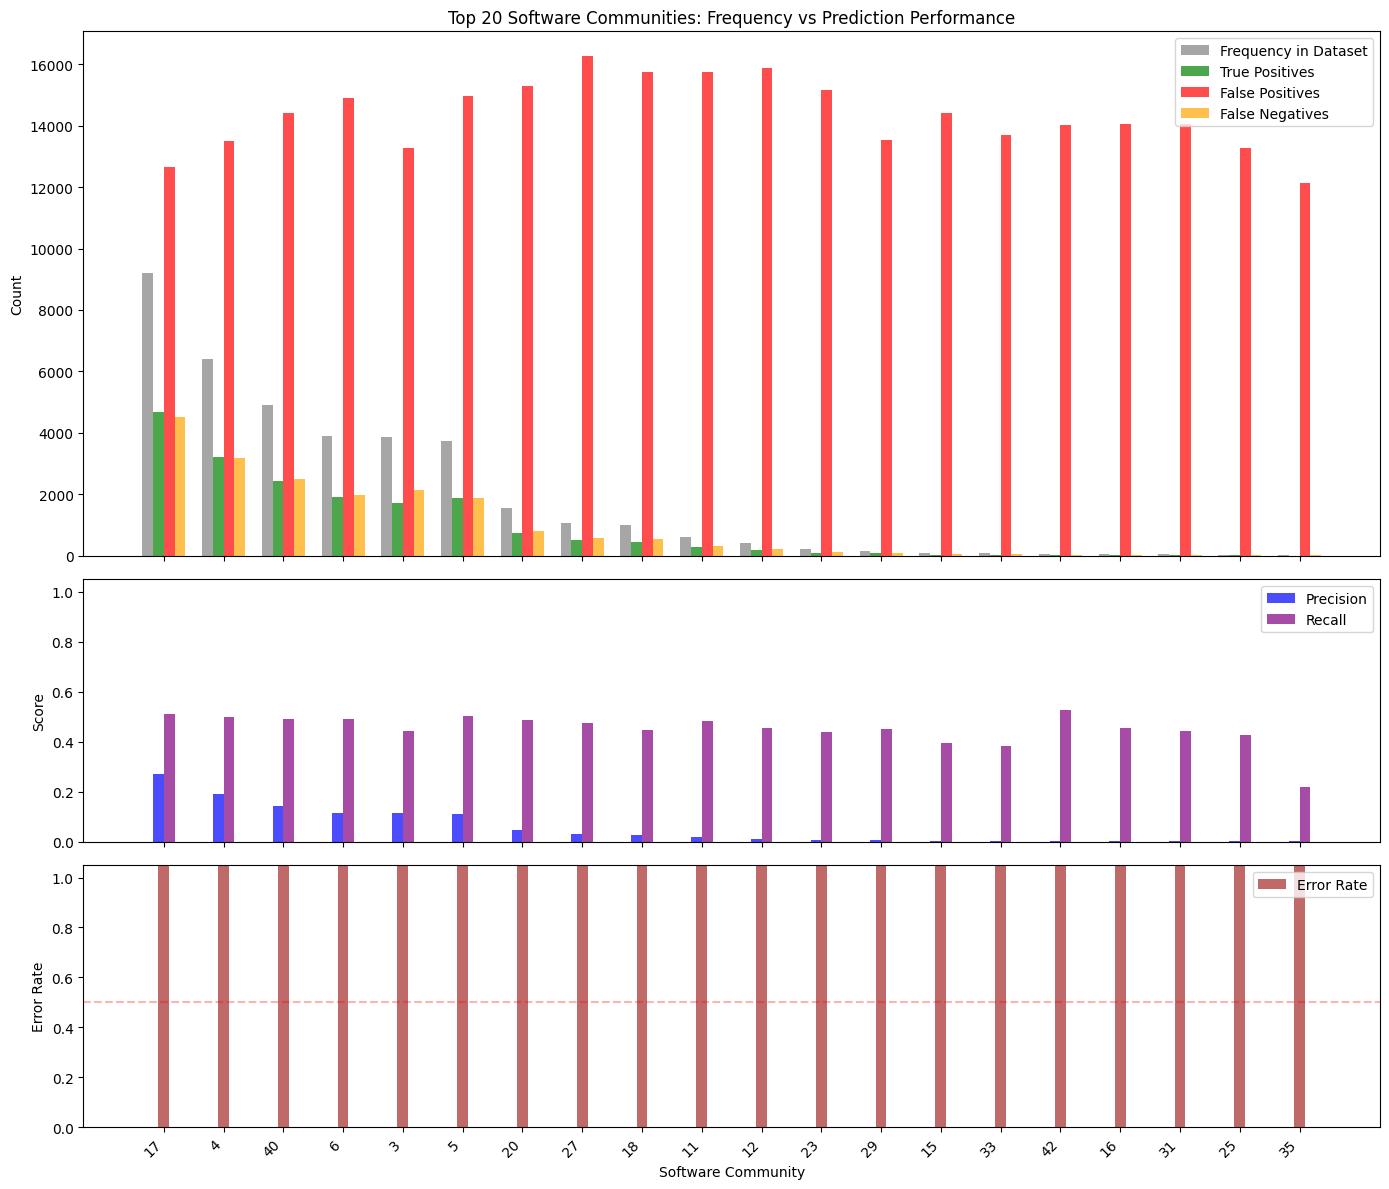

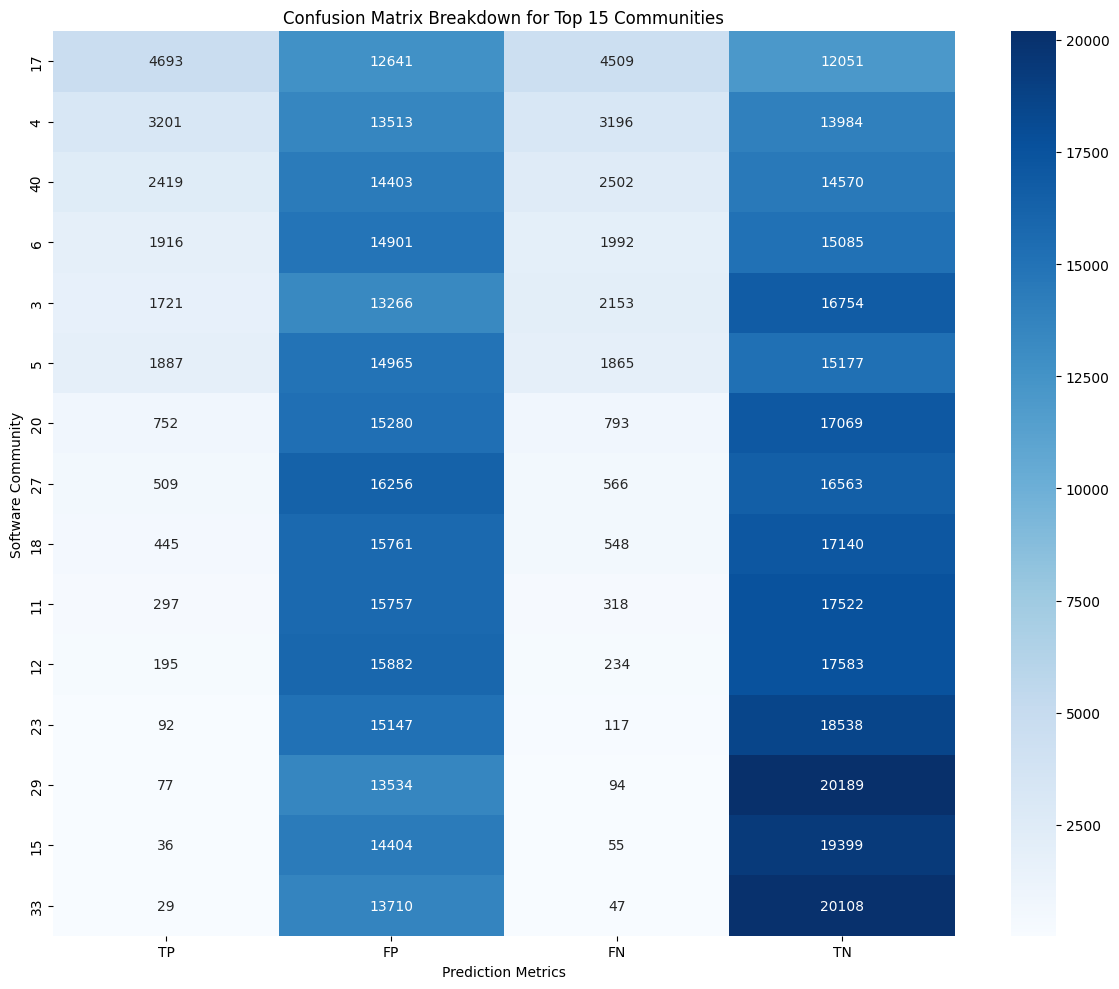

Top Communities by Frequency with Performance Metrics:


summary_df created successfully.


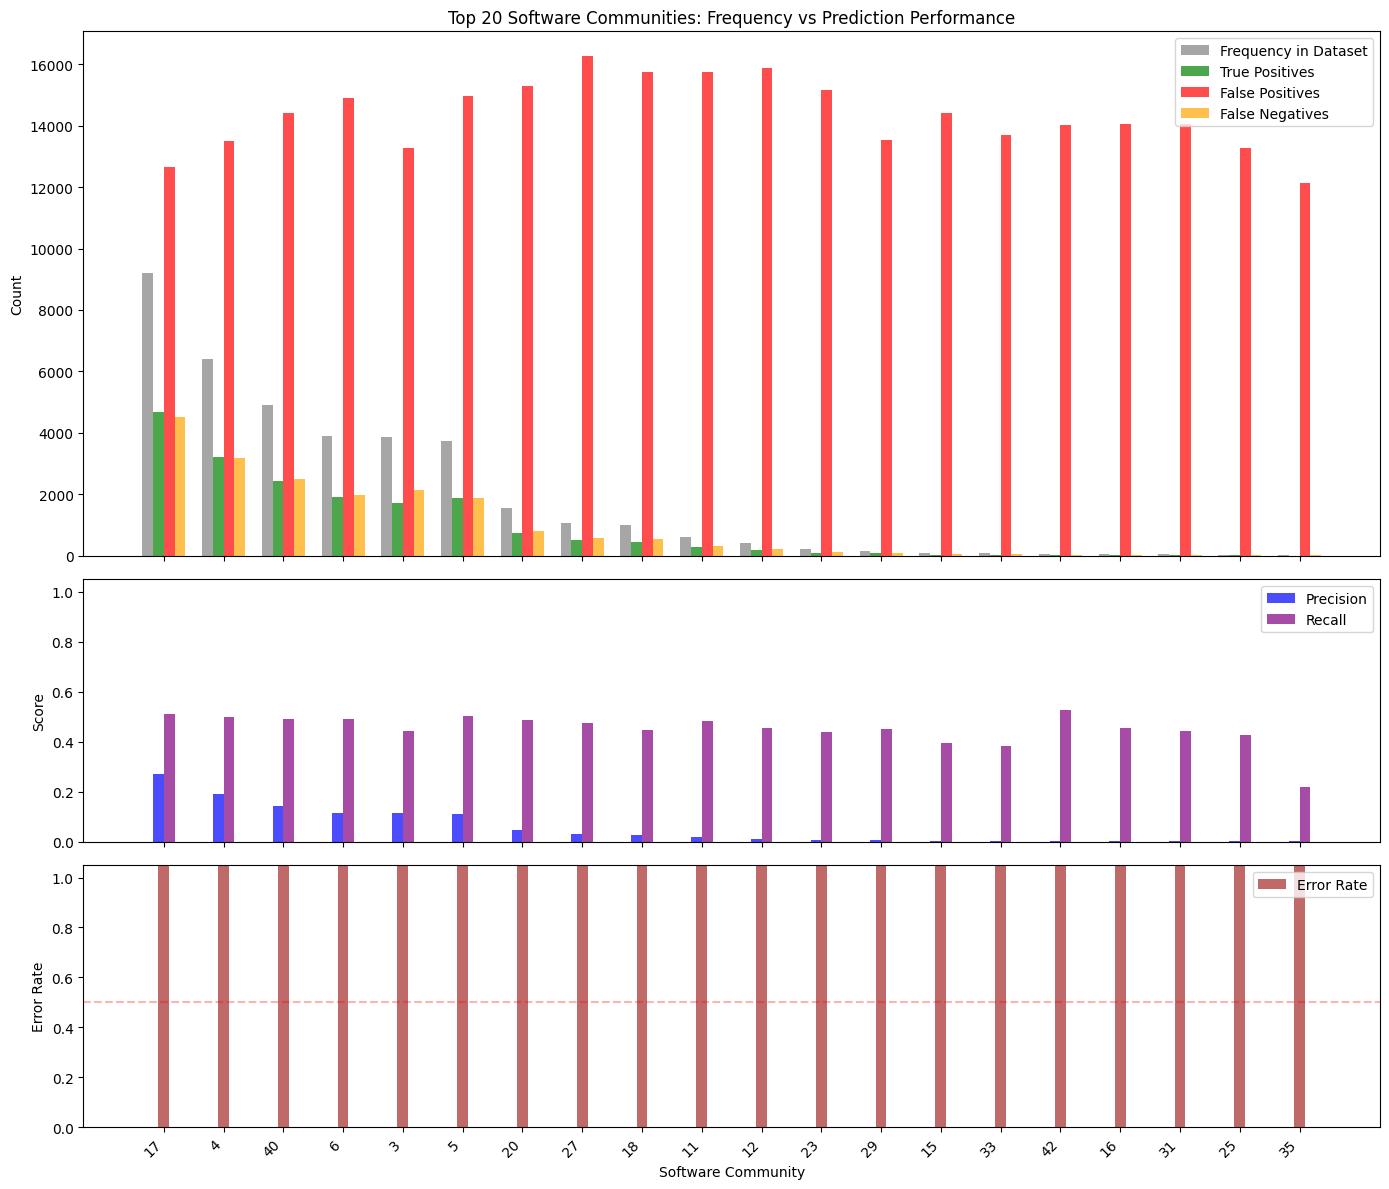

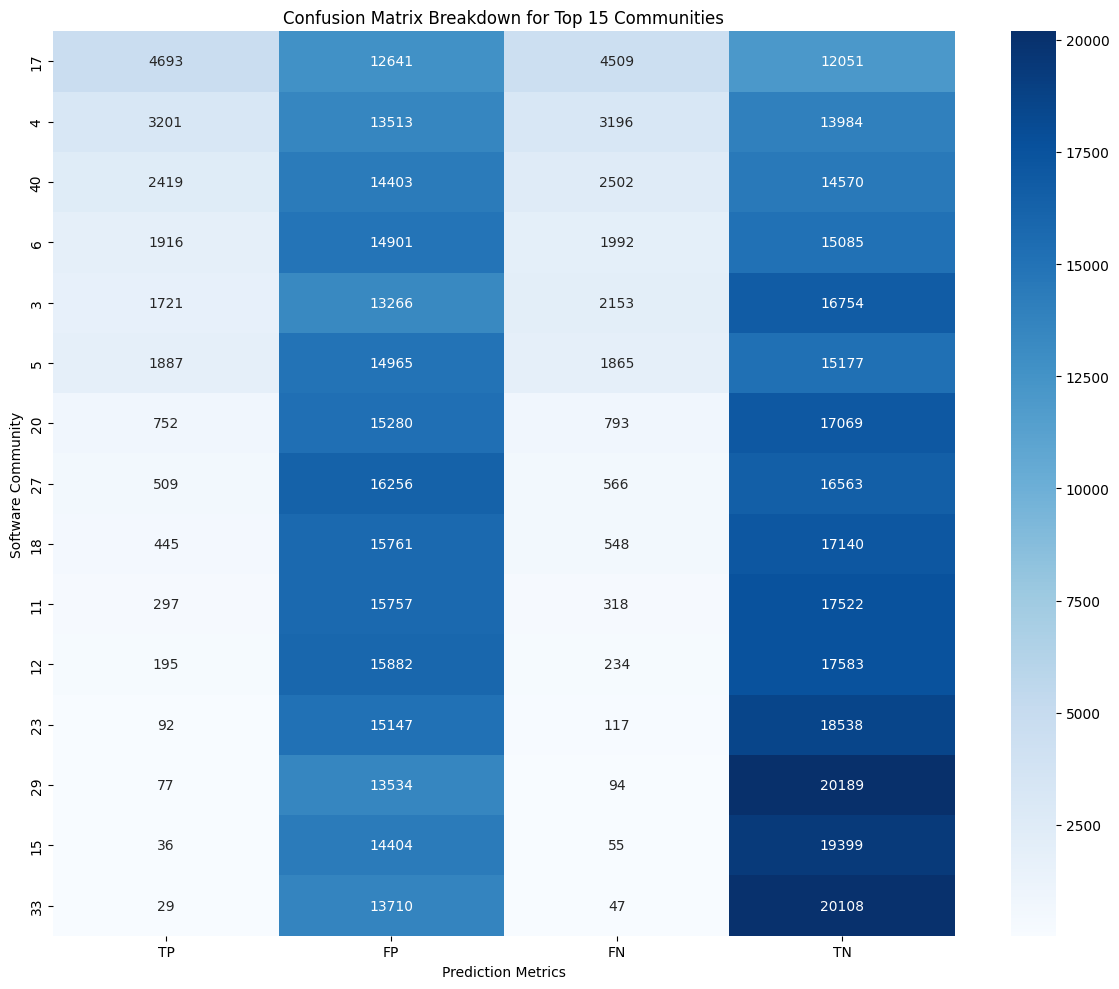

Top Communities by Frequency with Performance Metrics:


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer
from IPython.display import display

# Assuming mlb_output and y_test are available from previous cells
# If not, you might need to load them or rerun the relevant cells.

# --- Calculate per-label metrics and create summary_df ---

# Use the predictions from the title_model (or msc_model)
# Let's use the predictions from the title_model for visualization
predictions_to_evaluate = title_pred # Or msc_pred

n_labels = y_test.shape[1]
metrics_list = []

# Assuming mlb_output is already defined and fitted from previous cells
label_names = mlb_output.classes_

print("Calculating per-label metrics...")
for i in range(n_labels):
    true_positives = np.sum((y_test[:, i] == 1) & (predictions_to_evaluate[:, i] == 1))
    false_positives = np.sum((y_test[:, i] == 0) & (predictions_to_evaluate[:, i] == 1))
    false_negatives = np.sum((y_test[:, i] == 1) & (predictions_to_evaluate[:, i] == 0))
    true_negatives = np.sum((y_test[:, i] == 0) & (predictions_to_evaluate[:, i] == 0)) # Added for completeness

    # Calculate frequency in the test set
    frequency = np.sum(y_test[:, i] == 1)

    # Calculate precision and recall (handle zero division)
    precision = precision_score(y_test[:, i], predictions_to_evaluate[:, i], zero_division=0)
    recall = recall_score(y_test[:, i], predictions_to_evaluate[:, i], zero_division=0)
    f1 = f1_score(y_test[:, i], predictions_to_evaluate[:, i], zero_division=0)
    accuracy = accuracy_score(y_test[:, i], predictions_to_evaluate[:, i])

    metrics_list.append({
        'Software Community': label_names[i],
        'Frequency': frequency,
        'True Positives': true_positives,
        'False Positives': false_positives,
        'False Negatives': false_negatives,
        'True Negatives': true_negatives, # Added
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Accuracy': accuracy # Added
    })

summary_df = pd.DataFrame(metrics_list)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer
from IPython.display import display

# Assuming mlb_output and y_test are available from previous cells
# If not, you might need to load them or rerun the relevant cells.

# --- Calculate per-label metrics and create summary_df ---

# Use the predictions from the title_model (or msc_model)
# Let's use the predictions from the title_model for visualization
predictions_to_evaluate = title_pred # Or msc_pred

n_labels = y_test.shape[1]
metrics_list = []

# Assuming mlb_output is already defined and fitted from previous cells
label_names = mlb_output.classes_

print("Calculating per-label metrics...")
for i in range(n_labels):
    true_positives = np.sum((y_test[:, i] == 1) & (predictions_to_evaluate[:, i] == 1))
    false_positives = np.sum((y_test[:, i] == 0) & (predictions_to_evaluate[:, i] == 1))
    false_negatives = np.sum((y_test[:, i] == 1) & (predictions_to_evaluate[:, i] == 0))
    true_negatives = np.sum((y_test[:, i] == 0) & (predictions_to_evaluate[:, i] == 0)) # Added for completeness

    # Calculate frequency in the test set
    frequency = np.sum(y_test[:, i] == 1)

    # Calculate precision and recall (handle zero division)
    precision = precision_score(y_test[:, i], predictions_to_evaluate[:, i], zero_division=0)
    recall = recall_score(y_test[:, i], predictions_to_evaluate[:, i], zero_division=0)
    f1 = f1_score(y_test[:, i], predictions_to_evaluate[:, i], zero_division=0)
    accuracy = accuracy_score(y_test[:, i], predictions_to_evaluate[:, i])

    metrics_list.append({
        'Software Community': label_names[i],
        'Frequency': frequency,
        'True Positives': true_positives,
        'False Positives': false_positives,
        'False Negatives': false_negatives,
        'True Negatives': true_negatives, # Added
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Accuracy': accuracy # Added
    })

summary_df = pd.DataFrame(metrics_list)

# --- Calculate Error Rate and add it as a column ---
# Ensure frequency is not zero to avoid division error
summary_df['Error Rate'] = (summary_df['False Positives'] + summary_df['False Negatives']) / summary_df['Frequency'].replace(0, np.nan)
# Handle cases where frequency is 0 (shouldn't happen for top communities but good practice)
summary_df['Error Rate'] = summary_df['Error Rate'].fillna(0)


print("summary_df created successfully.")
# --- End of summary_df creation ---


def plot_label_comparison(summary_df, top_n=20):
    """Create a comprehensive comparison plot of label performance vs frequency."""
    # Sort and select top communities
    top_df = summary_df.sort_values('Frequency', ascending=False).head(top_n).copy() # Use .copy() to avoid SettingWithCopyWarning
    communities = top_df['Software Community']

    # Create figure with multiple subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12),
                                        gridspec_kw={'height_ratios': [2, 1, 1]},
                                        sharex=True)

    # Main bar plot (frequency and prediction metrics)
    x = np.arange(len(communities))
    width = 0.18

    # Plot frequency and prediction metrics
    ax1.bar(x - width*1.5, top_df['Frequency'], width,
            label='Frequency in Dataset', color='gray', alpha=0.7)
    ax1.bar(x - width/2, top_df['True Positives'], width,
            label='True Positives', color='green', alpha=0.7)
    ax1.bar(x + width/2, top_df['False Positives'], width,
            label='False Positives', color='red', alpha=0.7)
    ax1.bar(x + width*1.5, top_df['False Negatives'], width,
            label='False Negatives', color='orange', alpha=0.7)

    ax1.set_ylabel('Count')
    ax1.set_title(f'Top {top_n} Software Communities: Frequency vs Prediction Performance')
    ax1.legend()

    # Precision and recall plot
    ax2.bar(x - width/2, top_df['Precision'], width,
            label='Precision', color='blue', alpha=0.7)
    ax2.bar(x + width/2, top_df['Recall'], width,
            label='Recall', color='purple', alpha=0.7)
    ax2.set_ylabel('Score')
    ax2.set_ylim(0, 1.05)
    ax2.legend()

    # Error rate plot
    # Error rate is now a column in top_df
    ax3.bar(x, top_df['Error Rate'], width,
            label='Error Rate', color='brown', alpha=0.7)
    ax3.set_ylabel('Error Rate')
    ax3.set_ylim(0, 1.05)
    ax3.axhline(0.5, color='red', linestyle='--', alpha=0.3)
    ax3.legend()

    # X-axis formatting
    plt.sca(ax3)
    plt.xticks(x, communities, rotation=45, ha='right')
    plt.xlabel('Software Community')

    plt.tight_layout()
    plt.show()

def create_confusion_heatmap(summary_df, top_n=15):
    """Create a heatmap of confusion matrix for top communities."""
    top_df = summary_df.sort_values('Frequency', ascending=False).head(top_n).copy() # Use .copy()
    communities = top_df['Software Community']

    # Create confusion matrix data
    conf_data = []
    for label in communities:
        row = top_df[top_df['Software Community'] == label]
        conf_data.append([
            row['True Positives'].values[0],
            row['False Positives'].values[0],
            row['False Negatives'].values[0],
            row['True Negatives'].values[0]
        ])

    conf_data = np.array(conf_data)

    # Create figure
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(conf_data, annot=True, fmt='d', cmap='Blues',
                xticklabels=['TP', 'FP', 'FN', 'TN'],
                yticklabels=communities,
                ax=ax)
    ax.set_title(f'Confusion Matrix Breakdown for Top {top_n} Communities')
    ax.set_xlabel('Prediction Metrics')
    ax.set_ylabel('Software Community')
    plt.tight_layout()
    plt.show()

# Call the plotting functions
plot_label_comparison(summary_df, top_n=20)
create_confusion_heatmap(summary_df, top_n=15)

# Print the top communities with their metrics
print("Top Communities by Frequency with Performance Metrics:")
display(
    summary_df.sort_values('Frequency', ascending=False).head(10)
    .set_index('Software Community') # Set 'Software Community' as the index
    .T # Transpose the DataFrame
    .style
       .background_gradient(cmap='Blues', subset=pd.IndexSlice[['Frequency'], :]) # Apply gradient to row 'Frequency' across all columns
       .background_gradient(cmap='Greens', subset=pd.IndexSlice[['True Positives'], :]) # Apply gradient to row 'True Positives'
       .background_gradient(cmap='Reds', subset=pd.IndexSlice[['False Positives'], :])
       .background_gradient(cmap='Oranges', subset=pd.IndexSlice[['False Negatives'], :])
       .background_gradient(cmap='Purples', subset=pd.IndexSlice[['True Negatives'], :])
       .background_gradient(cmap='OrRd', subset=pd.IndexSlice[['Error Rate'], :])
       .format({col: '{:.2%}' for col in summary_df.columns if col in ['Precision', 'Recall', 'F1 Score', 'Accuracy', 'Error Rate']}) # Format percentage rows
)


print("summary_df created successfully.")
# --- End of summary_df creation ---


def plot_label_comparison(summary_df, top_n=20):
    """Create a comprehensive comparison plot of label performance vs frequency."""
    # Sort and select top communities
    top_df = summary_df.sort_values('Frequency', ascending=False).head(top_n).copy() # Use .copy() to avoid SettingWithCopyWarning
    communities = top_df['Software Community']

    # Create figure with multiple subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12),
                                        gridspec_kw={'height_ratios': [2, 1, 1]},
                                        sharex=True)

    # Main bar plot (frequency and prediction metrics)
    x = np.arange(len(communities))
    width = 0.18

    # Plot frequency and prediction metrics
    ax1.bar(x - width*1.5, top_df['Frequency'], width,
            label='Frequency in Dataset', color='gray', alpha=0.7)
    ax1.bar(x - width/2, top_df['True Positives'], width,
            label='True Positives', color='green', alpha=0.7)
    ax1.bar(x + width/2, top_df['False Positives'], width,
            label='False Positives', color='red', alpha=0.7)
    ax1.bar(x + width*1.5, top_df['False Negatives'], width,
            label='False Negatives', color='orange', alpha=0.7)

    ax1.set_ylabel('Count')
    ax1.set_title(f'Top {top_n} Software Communities: Frequency vs Prediction Performance')
    ax1.legend()

    # Precision and recall plot
    ax2.bar(x - width/2, top_df['Precision'], width,
            label='Precision', color='blue', alpha=0.7)
    ax2.bar(x + width/2, top_df['Recall'], width,
            label='Recall', color='purple', alpha=0.7)
    ax2.set_ylabel('Score')
    ax2.set_ylim(0, 1.05)
    ax2.legend()

    # Error rate plot
    # Error rate is now a column in top_df
    ax3.bar(x, top_df['Error Rate'], width,
            label='Error Rate', color='brown', alpha=0.7)
    ax3.set_ylabel('Error Rate')
    ax3.set_ylim(0, 1.05)
    ax3.axhline(0.5, color='red', linestyle='--', alpha=0.3)
    ax3.legend()

    # X-axis formatting
    plt.sca(ax3)
    plt.xticks(x, communities, rotation=45, ha='right')
    plt.xlabel('Software Community')

    plt.tight_layout()
    plt.show()

def create_confusion_heatmap(summary_df, top_n=15):
    """Create a heatmap of confusion matrix for top communities."""
    top_df = summary_df.sort_values('Frequency', ascending=False).head(top_n).copy() # Use .copy()
    communities = top_df['Software Community']

    # Create confusion matrix data
    conf_data = []
    for label in communities:
        row = top_df[top_df['Software Community'] == label]
        conf_data.append([
            row['True Positives'].values[0],
            row['False Positives'].values[0],
            row['False Negatives'].values[0],
            row['True Negatives'].values[0]
        ])

    conf_data = np.array(conf_data)

    # Create figure
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(conf_data, annot=True, fmt='d', cmap='Blues',
                xticklabels=['TP', 'FP', 'FN', 'TN'],
                yticklabels=communities,
                ax=ax)
    ax.set_title(f'Confusion Matrix Breakdown for Top {top_n} Communities')
    ax.set_xlabel('Prediction Metrics')
    ax.set_ylabel('Software Community')
    plt.tight_layout()
    plt.show()

# Call the plotting functions
plot_label_comparison(summary_df, top_n=20)
create_confusion_heatmap(summary_df, top_n=15)

# Print the top communities with their metrics
print("Top Communities by Frequency with Performance Metrics:")
display(
    summary_df.sort_values('Frequency', ascending=False).head(5)
    .set_index('Software Community') # Set 'Software Community' as the index
    .T # Transpose the DataFrame
    .style
       .background_gradient(cmap='Blues', subset=pd.IndexSlice[['Frequency'], :]) # Apply gradient to row 'Frequency' across all columns
       .background_gradient(cmap='Greens', subset=pd.IndexSlice[['True Positives'], :]) # Apply gradient to row 'True Positives'
       .background_gradient(cmap='Reds', subset=pd.IndexSlice[['False Positives'], :])
       .background_gradient(cmap='Oranges', subset=pd.IndexSlice[['False Negatives'], :])
       .background_gradient(cmap='Purples', subset=pd.IndexSlice[['True Negatives'], :])
       .background_gradient(cmap='OrRd', subset=pd.IndexSlice[['Error Rate'], :])
       .format({col: '{:.2%}' for col in summary_df.columns if col in ['Precision', 'Recall', 'F1 Score', 'Accuracy', 'Error Rate']}) # Format percentage rows
)

In [ ]:
# def create_confusion_heatmap(summary_df, top_n=15):
#     """Create a heatmap of confusion matrix for top communities."""
#     top_df = summary_df.sort_values('Frequency', ascending=False).head(top_n).copy() # Use .copy()
#     communities = top_df['Software Community']

#     # Create confusion matrix data
#     conf_data = []
#     for label in communities:
#         row = top_df[top_df['Software Community'] == label]
#         conf_data.append([
#             row['True Positives'].values[0],
#             row['False Positives'].values[0],
#             row['False Negatives'].values[0],
#             row['True Negatives'].values[0]
#         ])

#     conf_data = np.array(conf_data)

#     # --- Transpose the confusion matrix data ---
#     conf_data_transposed = conf_data.T # Transpose the numpy array

#     # Create figure
#     fig, ax = plt.subplots(figsize=(12, 10))
#     sns.heatmap(conf_data_transposed, annot=True, fmt='d', cmap='Blues',
#                 xticklabels=communities,  # Swap x and y labels
#                 yticklabels=['TP', 'FP', 'FN', 'TN'], # Swap x and y labels
#                 ax=ax)
#     ax.set_title(f'Transposed Confusion Matrix Breakdown for Top {top_n} Communities') # Update title
#     ax.set_xlabel('Software Community') # Swap x and y axis labels
#     ax.set_ylabel('Prediction Metrics') # Swap x and y axis labels
#     plt.tight_layout()
#     plt.show()

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 7.4 MB/s eta 0:00:00


In [ ]:
import os
import gc
import numpy as np
import pandas as pd
import joblib
import torch
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import SGDClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, hamming_loss, f1_score
from tqdm import tqdm
from scipy import sparse
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

# --- CONFIG ---
EMBEDDING_SAVE_DIR = './embeddings_cache2'
AUTOENCODER_DIR = './autoencoder_cache'
DATA_CACHE_DIR = './data_cache'  # New directory for cached train/test data
os.makedirs(DATA_CACHE_DIR, exist_ok=True)
CHUNK_SIZE = 20000
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {DEVICE}")

def optimize_thresholds(y_val_true, y_val_proba, num_steps=20):
    """
    Find optimal threshold per label to maximize F1 score.
    Thresholds searched from 0.1 to 0.9 (avoids extreme 0 or 1)
    """
    thresholds = []
    n_labels = y_val_true.shape[1]
    # Convert list of arrays to a single numpy array for easier indexing
    y_val_proba_stacked = np.vstack([y_val_proba[i][:, 1] for i in range(n_labels)]).T

    for i in range(n_labels):
        best_thresh = 0.5
        best_f1 = 0
        probs = y_val_proba_stacked[:, i]  # prob of class 1
        # Check if the label exists in the validation set and has both positive and negative samples
        if len(np.unique(y_val_true[:, i])) < 2:
            thresholds.append(0.5) # Default threshold if only one class present
            continue

        for thresh in np.linspace(0.1, 0.9, num_steps):
            preds = (probs >= thresh).astype(int)
            # Check if the prediction and true sets are non-empty after filtering
            if np.sum(y_val_true[:, i] == 1) > 0 and np.sum(preds == 1) > 0:
                 f1 = f1_score(y_val_true[:, i], preds, zero_division=0)
            else:
                 f1 = 0 # Can't calculate F1 if no positive predictions or true positives

            if f1 > best_f1:
                best_f1 = f1
                best_thresh = thresh
        thresholds.append(best_thresh)
    return thresholds


def predict_with_thresholds(y_proba, thresholds):
    """
    Predict binary labels given probabilities and thresholds.
    """
    # Assuming y_proba is a list of arrays from predict_proba
    n_samples = y_proba[0].shape[0]
    n_labels = len(y_proba)
    y_pred = np.zeros((n_samples, n_labels), dtype=int)
    for i in range(n_labels):
        y_pred[:, i] = (y_proba[i][:, 1] >= thresholds[i]).astype(int)
    return y_pred

def train_and_cache_model_with_thresholds(X_train, X_test, y_train, y_test, name, model_path):
    # Simple split for validation
    # Remove stratify to avoid ValueError with sparse label sums
    X_train_main, X_val, y_train_main, y_val = train_test_split(
        X_train, y_train, test_size=0.1, random_state=42)

    scaler_path = model_path + '_scaler'

    # Convert sparse to dense for scaling if necessary
    X_train_main_scaled = X_train_main.toarray() if sparse.issparse(X_train_main) else X_train_main
    X_val_scaled = X_val.toarray() if sparse.issparse(X_val) else X_val
    X_test_scaled = X_test.toarray() if sparse.issparse(X_test) else X_test


    if os.path.exists(model_path) and os.path.exists(scaler_path):
        print(f"Loading cached {name} and scaler...")
        model = joblib.load(model_path)
        scaler = joblib.load(scaler_path)
        # Apply loaded scaler
        X_train_main_scaled = scaler.transform(X_train_main_scaled)
        X_val_scaled = scaler.transform(X_val_scaled)
        X_test_scaled = scaler.transform(X_test_scaled)

    else:
        print(f"\nScaling data for {name}...")
        scaler = StandardScaler(with_mean=False) # Use with_mean=False for sparse if needed, but converted to dense here
        X_train_main_scaled = scaler.fit_transform(X_train_main_scaled)
        X_val_scaled = scaler.transform(X_val_scaled)
        X_test_scaled = scaler.transform(X_test_scaled)


        print(f"\nTraining {name}...")
        base_clf = SGDClassifier(
            loss='log_loss',
            max_iter=5000,
            tol=1e-4,
            alpha=1e-4,
            learning_rate='optimal',
            eta0=0.1,
            random_state=42,
            n_jobs=-1,
        )
        model = MultiOutputClassifier(base_clf, n_jobs=-1)

        classes = [np.array([0, 1]) for _ in range(y_train_main.shape[1])]

        for epoch in range(3):
            print(f"Epoch {epoch + 1}/3")
            # Use scaled data for partial_fit
            for i in tqdm(range(0, X_train_main_scaled.shape[0], CHUNK_SIZE)):
                model.partial_fit(
                    X_train_main_scaled[i:i + CHUNK_SIZE],
                    y_train_main[i:i + CHUNK_SIZE],
                    classes=classes
                )

        joblib.dump(model, model_path)
        joblib.dump(scaler, scaler_path)
        print(f"Saved {name} and scaler to disk.")


    # Predict probabilities on validation set for threshold tuning
    y_val_proba = model.predict_proba(X_val_scaled)

    print(f"\nOptimizing thresholds for {name}...")
    thresholds = optimize_thresholds(y_val, y_val_proba)

    # Print thresholds and some stats per label
    print("\nThresholds and Validation F1 per Label:")
    for i, thr in enumerate(thresholds):
        # Ensure y_val_proba has the correct shape for indexing
        probs = y_val_proba[i][:, 1] if isinstance(y_val_proba, list) else y_val_proba[:, i, 1]
        preds = (probs >= thr).astype(int)
        pos_ratio = preds.mean()
        f1 = f1_score(y_val[:, i], preds, zero_division=0)
        print(f"Label {mlb_output.classes_[i]}: threshold={thr:.3f}, val positive ratio={pos_ratio:.4f}, val F1={f1:.4f}")


    # Predict on test set with optimized thresholds
    y_test_proba = model.predict_proba(X_test_scaled)
    y_test_pred_thresh = predict_with_thresholds(y_test_proba, thresholds)

    print(f"\n{name} Results with threshold tuning:")
    print(f"Hamming Loss: {hamming_loss(y_test, y_test_pred_thresh):.4f}")
    print(classification_report(y_test, y_test_pred_thresh, zero_division=0,
                                target_names=[str(c) for c in mlb_output.classes_]))

    return model, thresholds


# --- Usage ---

print("\n=== MSC Model ===")
# Convert X_msc_train_res to dense for training the scaler and model if it's sparse
X_msc_train_res_dense = X_msc_train_res.toarray() if sparse.issparse(X_msc_train_res) else X_msc_train_res
X_msc_test_dense = X_msc_test.toarray() if sparse.issparse(X_msc_test) else X_msc_test


msc_model, msc_thresholds = train_and_cache_model_with_thresholds(
    X_msc_train_res_dense, X_msc_test_dense, y_train_res, y_test,
    "MSC Code Model", os.path.join(DATA_CACHE_DIR, 'msc_model.pkl')
)

print("\n=== Title Model ===")
# X_title_train_res and X_title_test are already dense numpy arrays from autoencoding
title_model, title_thresholds = train_and_cache_model_with_thresholds(
    X_title_train_res, X_title_test, y_train_res, y_test,
    "Title Embedding Model", os.path.join(DATA_CACHE_DIR, 'title_model.pkl')
)



Using device: cuda

=== MSC Model ===

Scaling data for MSC Code Model...

Training MSC Code Model...
Epoch 1/3


100%|██████████| 7/7 [00:14<00:00,  2.00s/it]


Epoch 2/3


100%|██████████| 7/7 [00:12<00:00,  1.74s/it]


Epoch 3/3


100%|██████████| 7/7 [00:12<00:00,  1.75s/it]


Saved MSC Code Model and scaler to disk.

Optimizing thresholds for MSC Code Model...

Thresholds and Validation F1 per Label:
Label 0: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 1: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 2: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 3: threshold=0.311, val positive ratio=0.1325, val F1=0.5833
Label 4: threshold=0.563, val positive ratio=0.1707, val F1=0.7759
Label 5: threshold=0.184, val positive ratio=0.3075, val F1=0.2576
Label 6: threshold=0.395, val positive ratio=0.1730, val F1=0.6191
Label 7: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 8: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 9: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 10: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 11: threshold=0.353, val positive ratio=0.0243, val F1=0.6347
Label 12: threshold=0.100, val positive ratio=0.0069, val F1=0.0732

100%|██████████| 7/7 [00:16<00:00,  2.41s/it]


Epoch 2/3


100%|██████████| 7/7 [00:16<00:00,  2.42s/it]


Epoch 3/3


100%|██████████| 7/7 [00:18<00:00,  2.64s/it]


Saved Title Embedding Model and scaler to disk.

Optimizing thresholds for Title Embedding Model...

Thresholds and Validation F1 per Label:
Label 0: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 1: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 2: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 3: threshold=0.100, val positive ratio=0.0634, val F1=0.0881
Label 4: threshold=0.100, val positive ratio=0.1217, val F1=0.1435
Label 5: threshold=0.100, val positive ratio=0.0240, val F1=0.0453
Label 6: threshold=0.268, val positive ratio=0.0002, val F1=0.0013
Label 7: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 8: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 9: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 10: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 11: threshold=0.100, val positive ratio=0.0002, val F1=0.0072
Label 12: threshold=0.500, val positive ratio=0.0000,

In [ ]:
from sklearn.metrics import f1_score
from scipy.stats import ttest_rel
import numpy as np

# Predict test set probabilities
msc_proba = msc_model.predict_proba(X_msc_test_dense)
title_proba = title_model.predict_proba(X_title_test)

# Predict binary outputs with optimized thresholds
msc_pred = predict_with_thresholds(msc_proba, msc_thresholds)
title_pred = predict_with_thresholds(title_proba, title_thresholds)

# Compute per-label F1 scores
f1_msc = []
f1_title = []

for i in range(y_test.shape[1]):
    f1_m = f1_score(y_test[:, i], msc_pred[:, i], zero_division=0)
    f1_t = f1_score(y_test[:, i], title_pred[:, i], zero_division=0)
    f1_msc.append(f1_m)
    f1_title.append(f1_t)

f1_msc = np.array(f1_msc)
f1_title = np.array(f1_title)

# Perform paired t-test
if len(f1_msc) > 1:
    stat, p_val = ttest_rel(f1_title, f1_msc)
    print("\n=== Paired t-test: Title vs MSC ===")
    print(f"Paired t-test statistic: {stat:.4f}")
    print(f"P-value: {p_val:.4f}")
    print(f"Mean F1 Title: {f1_title.mean():.4f}")
    print(f"Mean F1 MSC: {f1_msc.mean():.4f}")
else:
    print("Not enough labels to perform paired t-test.")



=== Paired t-test: Title vs MSC ===
Paired t-test statistic: -0.8229
P-value: 0.4116
Mean F1 Title: 0.0040
Mean F1 MSC: 0.0062


In [ ]:
import os
import gc
import numpy as np
import pandas as pd
import joblib
import torch
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
# Import PassiveAggressiveClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, hamming_loss, f1_score
from tqdm import tqdm
from scipy import sparse
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

# --- CONFIG ---
EMBEDDING_SAVE_DIR = './embeddings_cache2'
AUTOENCODER_DIR = './autoencoder_cache'
DATA_CACHE_DIR = './data_cache'  # New directory for cached train/test data
os.makedirs(DATA_CACHE_DIR, exist_ok=True)
CHUNK_SIZE = 20000
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {DEVICE}")

# Define the sigmoid function
def sigmoid(x):
    """Applies the sigmoid function to input x."""
    return 1 / (1 + np.exp(-x))


def optimize_thresholds(y_val_true, y_val_proba, num_steps=20):
    """
    Find optimal threshold per label to maximize F1 score.
    Thresholds searched from 0.1 to 0.9 (avoids extreme 0 or 1)
    """
    thresholds = []
    n_labels = y_val_true.shape[1]
    # Convert list of arrays to a single numpy array for easier indexing
    y_val_proba_stacked = np.vstack([y_val_proba[i][:, 1] for i in range(n_labels)]).T

    for i in range(n_labels):
        best_thresh = 0.5
        best_f1 = 0
        probs = y_val_proba_stacked[:, i]  # prob of class 1
        # Check if the label exists in the validation set and has both positive and negative samples
        if len(np.unique(y_val_true[:, i])) < 2:
            thresholds.append(0.5) # Default threshold if only one class present
            continue

        for thresh in np.linspace(0.1, 0.9, num_steps):
            preds = (probs >= thresh).astype(int)
            # Check if the prediction and true sets are non-empty after filtering
            if np.sum(y_val_true[:, i] == 1) > 0 and np.sum(preds == 1) > 0:
                 f1 = f1_score(y_val_true[:, i], preds, zero_division=0)
            else:
                 f1 = 0 # Can't calculate F1 if no positive predictions or true positives

            if f1 > best_f1:
                best_f1 = f1
                best_thresh = thresh
        thresholds.append(best_thresh)
    return thresholds


def predict_with_thresholds(y_proba, thresholds):
    """
    Predict binary labels given probabilities and thresholds.
    """
    # Assuming y_proba is a list of arrays from predict_proba
    n_samples = y_proba[0].shape[0]
    n_labels = len(y_proba)
    y_pred = np.zeros((n_samples, n_labels), dtype=int)
    for i in range(n_labels):
        y_pred[:, i] = (y_proba[i][:, 1] >= thresholds[i]).astype(int)
    return y_pred

def train_and_cache_model_with_thresholds(X_train, X_test, y_train, y_test, name, model_path):
    # Simple split for validation
    X_train_main, X_val, y_train_main, y_val = train_test_split(
        X_train, y_train, test_size=0.1, random_state=42)

    scaler_path = model_path + '_scaler'

    # Convert sparse to dense for scaling if necessary
    X_train_main_scaled = X_train_main.toarray() if sparse.issparse(X_train_main) else X_train_main
    X_val_scaled = X_val.toarray() if sparse.issparse(X_val) else X_val
    X_test_scaled = X_test.toarray() if sparse.issparse(X_test) else X_test

    if os.path.exists(model_path) and os.path.exists(scaler_path):
        print(f"Loading cached {name} and scaler...")
        model = joblib.load(model_path)
        scaler = joblib.load(scaler_path)
        # Apply loaded scaler
        X_train_main_scaled = scaler.transform(X_train_main_scaled) # Corrected typo here
        X_val_scaled = scaler.transform(X_val_scaled)
        X_test_scaled = scaler.transform(X_test_scaled)

    else:
        print(f"\nScaling data for {name}...")
        scaler = StandardScaler(with_mean=False)
        X_train_main_scaled = scaler.fit_transform(X_train_main_scaled)
        X_val_scaled = scaler.transform(X_val_scaled)
        X_test_scaled = scaler.transform(X_test_scaled)

        print(f"\nTraining {name} with PassiveAggressiveClassifier...")
        base_clf = PassiveAggressiveClassifier(
            max_iter=1000,
            tol=1e-4,
            early_stopping=False,
            random_state=42,
            loss='hinge',  # or 'squared_hinge' if you want
            warm_start=True,
        )
        model = MultiOutputClassifier(base_clf, n_jobs=-1)

        classes = [np.array([0, 1]) for _ in range(y_train_main.shape[1])]

        for epoch in range(3):
            print(f"Epoch {epoch + 1}/3")
            for i in tqdm(range(0, X_train_main_scaled.shape[0], CHUNK_SIZE)):
                model.partial_fit(
                    X_train_main_scaled[i:i + CHUNK_SIZE],
                    y_train_main[i:i + CHUNK_SIZE],
                    classes=classes
                )

        joblib.dump(model, model_path)
        joblib.dump(scaler, scaler_path)
        print(f"Saved {name} and scaler to disk.")

    # --- Corrected part to get decision scores ---
    # Iterate through the individual estimators within MultiOutputClassifier
    print(f"\nGetting decision scores for {name} on validation set...")
    y_val_scores = []
    # Ensure model is fitted and has estimators_ attribute
    if hasattr(model, 'estimators_'):
        for estimator in tqdm(model.estimators_, desc="Processing Estimators"):
            # Check if the base estimator supports decision_function
            if hasattr(estimator, 'decision_function'):
                 scores = estimator.decision_function(X_val_scaled)
                 y_val_scores.append(scores)
            else:
                # Handle cases where the base estimator doesn't have decision_function
                # This shouldn't happen with PassiveAggressiveClassifier, but good practice
                raise AttributeError(f"Base estimator {type(estimator).__name__} does not have decision_function.")
    else:
         raise AttributeError("MultiOutputClassifier model is not fitted or does not have 'estimators_' attribute.")

    # decision_function returns shape (n_samples,), we need to convert scores into probability-like values per label for threshold tuning
    # Create a list of arrays, where each array is (n_samples, 2) [prob_class_0, prob_class_1]
    y_val_proba = [np.vstack([1 - sigmoid(scores), sigmoid(scores)]).T for scores in y_val_scores]

    print(f"\nOptimizing thresholds for {name}...")
    thresholds = optimize_thresholds(y_val, y_val_proba)

    # Print thresholds and some stats per label
    print("\nThresholds and Validation F1 per Label:")
    for i, thr in enumerate(thresholds):
        # Access the correct probability array for the current label
        probs = y_val_proba[i][:, 1]
        preds = (probs >= thr).astype(int)
        pos_ratio = preds.mean()
        f1 = f1_score(y_val[:, i], preds, zero_division=0)
        print(f"Label {mlb_output.classes_[i]}: threshold={thr:.3f}, val positive ratio={pos_ratio:.4f}, val F1={f1:.4f}")

    # Predict on test set with optimized thresholds
    print(f"\nGetting decision scores for {name} on test set...")
    y_test_scores = []
    if hasattr(model, 'estimators_'):
        for estimator in tqdm(model.estimators_, desc="Processing Estimators"):
            if hasattr(estimator, 'decision_function'):
                 scores = estimator.decision_function(X_test_scaled)
                 y_test_scores.append(scores)
            else:
                 raise AttributeError(f"Base estimator {type(estimator).__name__} does not have decision_function.")
    else:
        raise AttributeError("MultiOutputClassifier model is not fitted or does not have 'estimators_' attribute.")

    y_test_proba = [np.vstack([1 - sigmoid(scores), sigmoid(scores)]).T for scores in y_test_scores]
    y_test_pred_thresh = predict_with_thresholds(y_test_proba, thresholds)

    print(f"\n{name} Results with threshold tuning:")
    print(f"Hamming Loss: {hamming_loss(y_test, y_test_pred_thresh):.4f}")
    print(classification_report(y_test, y_test_pred_thresh, zero_division=0,
                                target_names=[str(c) for c in mlb_output.classes_]))

    return model, thresholds


# --- Usage ---

print("\n=== MSC Model ===")
# Convert X_msc_train_res to dense for training the scaler and model if it's sparse
X_msc_train_res_dense = X_msc_train_res.toarray() if sparse.issparse(X_msc_train_res) else X_msc_train_res
X_msc_test_dense = X_msc_test.toarray() if sparse.issparse(X_msc_test) else X_msc_test


msc_model, msc_thresholds = train_and_cache_model_with_thresholds(
    X_msc_train_res_dense, X_msc_test_dense, y_train_res, y_test,
    "MSC Code Model", os.path.join(DATA_CACHE_DIR, 'pac_msc_model.pkl')
)

print("\n=== Title Model ===")
# X_title_train_res and X_title_test are already dense numpy arrays from autoencoding
title_model, title_thresholds = train_and_cache_model_with_thresholds(
    X_title_train_res, X_title_test, y_train_res, y_test,
    "Title Embedding Model", os.path.join(DATA_CACHE_DIR, 'pac_title_model.pkl')
)

Using device: cuda

=== MSC Model ===

Scaling data for MSC Code Model...

Training MSC Code Model with PassiveAggressiveClassifier...
Epoch 1/3


100%|██████████| 7/7 [00:08<00:00,  1.24s/it]


Epoch 2/3


100%|██████████| 7/7 [00:09<00:00,  1.36s/it]


Epoch 3/3


100%|██████████| 7/7 [00:09<00:00,  1.42s/it]


Saved MSC Code Model and scaler to disk.

Getting decision scores for MSC Code Model on validation set...


Processing Estimators: 100%|██████████| 196/196 [00:00<00:00, 1136.19it/s]



Optimizing thresholds for MSC Code Model...

Thresholds and Validation F1 per Label:
Label 0: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 1: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 2: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 3: threshold=0.689, val positive ratio=0.0791, val F1=0.4782
Label 4: threshold=0.605, val positive ratio=0.2135, val F1=0.6743
Label 5: threshold=0.142, val positive ratio=0.5188, val F1=0.2278
Label 6: threshold=0.647, val positive ratio=0.1777, val F1=0.6202
Label 7: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 8: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 9: threshold=0.142, val positive ratio=0.2280, val F1=0.0019
Label 10: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 11: threshold=0.226, val positive ratio=0.0729, val F1=0.2798
Label 12: threshold=0.226, val positive ratio=0.0607, val F1=0.0902
Label 13: threshold=0.500, val positive 

Processing Estimators: 100%|██████████| 196/196 [00:00<00:00, 420.50it/s]



MSC Code Model Results with threshold tuning:
Hamming Loss: 0.0574
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.58      0.38      0.45      3874
           4       0.63      0.72      0.67      6397
           5       0.14      0.65      0.23      3752
           6       0.52      0.78      0.62      3908
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.94      0.00        17
          10       0.00      0.00      0.00         0
          11       0.16      0.61      0.26       615
          12       0.07      0.33      0.11       429
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.10      0.35      0.16        91
          16 

100%|██████████| 7/7 [00:13<00:00,  1.94s/it]


Epoch 2/3


100%|██████████| 7/7 [00:13<00:00,  1.95s/it]


Epoch 3/3


100%|██████████| 7/7 [00:13<00:00,  1.95s/it]


Saved Title Embedding Model and scaler to disk.

Getting decision scores for Title Embedding Model on validation set...


Processing Estimators: 100%|██████████| 196/196 [00:00<00:00, 653.67it/s]



Optimizing thresholds for Title Embedding Model...

Thresholds and Validation F1 per Label:
Label 0: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 1: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 2: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 3: threshold=0.100, val positive ratio=0.9640, val F1=0.2072
Label 4: threshold=0.100, val positive ratio=0.9844, val F1=0.3119
Label 5: threshold=0.100, val positive ratio=0.9564, val F1=0.1974
Label 6: threshold=0.100, val positive ratio=0.9665, val F1=0.2051
Label 7: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 8: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 9: threshold=0.100, val positive ratio=0.2182, val F1=0.0007
Label 10: threshold=0.100, val positive ratio=0.9482, val F1=0.0002
Label 11: threshold=0.100, val positive ratio=0.9293, val F1=0.0405
Label 12: threshold=0.100, val positive ratio=0.8287, val F1=0.0234
Label 13: threshold=0.500, val po

Processing Estimators: 100%|██████████| 196/196 [00:00<00:00, 311.11it/s]



Title Embedding Model Results with threshold tuning:
Hamming Loss: 0.1321
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.11      0.95      0.20      3874
           4       0.19      0.99      0.32      6397
           5       0.11      0.95      0.20      3752
           6       0.12      0.96      0.21      3908
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.24      0.00        17
          10       0.00      0.00      0.00         0
          11       0.02      0.92      0.04       615
          12       0.01      0.80      0.02       429
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.69      0.01        91
      

In [ ]:
from scipy.stats import ttest_rel
from sklearn.metrics import f1_score
import numpy as np

def compute_f1_and_paired_ttest(y_true, pred1, pred2, label_names=None):
    f1_1 = []
    f1_2 = []
    for i in range(y_true.shape[1]):
        f1_1.append(f1_score(y_true[:, i], pred1[:, i], zero_division=0))
        f1_2.append(f1_score(y_true[:, i], pred2[:, i], zero_division=0))

    f1_1 = np.array(f1_1)
    f1_2 = np.array(f1_2)

    stat, p_val = ttest_rel(f1_1, f1_2)
    print("\n=== Paired t-test between Model 1 and Model 2 ===")
    print(f"t-statistic: {stat:.4f}")
    print(f"p-value: {p_val:.4f}")
    print(f"Mean F1 Model 1: {f1_1.mean():.4f}")
    print(f"Mean F1 Model 2: {f1_2.mean():.4f}")

    if label_names is not None:
        print("\nSample label-wise F1 scores:")
        for i, label in enumerate(label_names[:5]):  # show first 5 labels for brevity
            print(f"{label}: Model1={f1_1[i]:.4f}, Model2={f1_2[i]:.4f}")

# Predict test set probabilities and apply thresholds for both models
msc_test_proba = []
title_test_proba = []

for estimator in msc_model.estimators_:
    scores = estimator.decision_function(X_msc_test_dense)
    msc_test_proba.append(np.vstack([1 - sigmoid(scores), sigmoid(scores)]).T)

for estimator in title_model.estimators_:
    scores = estimator.decision_function(X_title_test)
    title_test_proba.append(np.vstack([1 - sigmoid(scores), sigmoid(scores)]).T)

msc_test_pred = predict_with_thresholds(msc_test_proba, msc_thresholds)
title_test_pred = predict_with_thresholds(title_test_proba, title_thresholds)

# Run paired t-test on per-label F1 scores
compute_f1_and_paired_ttest(y_test, title_test_pred, msc_test_pred, label_names=mlb_output.classes_)



=== Paired t-test between Model 1 and Model 2 ===
t-statistic: -0.8229
p-value: 0.4116
Mean F1 Model 1: 0.0040
Mean F1 Model 2: 0.0062

Sample label-wise F1 scores:
0: Model1=0.0000, Model2=0.0000
1: Model1=0.0000, Model2=0.0000
2: Model1=0.0000, Model2=0.0000
3: Model1=0.0000, Model2=0.2252
4: Model1=0.1905, Model2=0.0012


In [ ]:
from sklearn.naive_bayes import MultinomialNB

def train_and_cache_model_with_thresholds(X_train, X_test, y_train, y_test, name, model_path):
    # Simple split for validation
    X_train_main, X_val, y_train_main, y_val = train_test_split(
        X_train, y_train, test_size=0.1, random_state=42)

    scaler_path = model_path + '_scaler'

    # MultinomialNB expects non-negative input, so scaling might be tricky.
    # Typically, you don't scale count features for NB.
    # We'll skip scaling here, assuming your features are counts or TF-IDF.

    if os.path.exists(model_path):
        print(f"Loading cached {name}...")
        model = joblib.load(model_path)
    else:
        print(f"\nTraining {name} with MultinomialNB...")
        base_clf = MultinomialNB(alpha=1.0)
        model = MultiOutputClassifier(base_clf, n_jobs=-1)

        classes = [np.array([0, 1]) for _ in range(y_train_main.shape[1])]

        for epoch in range(3):
            print(f"Epoch {epoch + 1}/3")
            for i in tqdm(range(0, X_train_main.shape[0], CHUNK_SIZE)):
                model.partial_fit(
                    X_train_main[i:i + CHUNK_SIZE],
                    y_train_main[i:i + CHUNK_SIZE],
                    classes=classes
                )

        joblib.dump(model, model_path)
        print(f"Saved {name} to disk.")

    # Predict probabilities on validation set for threshold tuning
    y_val_proba = model.predict_proba(X_val)

    print(f"\nOptimizing thresholds for {name}...")
    thresholds = optimize_thresholds(y_val, y_val_proba)

    # Print thresholds and some stats per label
    print("\nThresholds and Validation F1 per Label:")
    for i, thr in enumerate(thresholds):
        probs = y_val_proba[i][:, 1] if isinstance(y_val_proba, list) else y_val_proba[:, i, 1]
        preds = (probs >= thr).astype(int)
        pos_ratio = preds.mean()
        f1 = f1_score(y_val[:, i], preds, zero_division=0)
        print(f"Label {mlb_output.classes_[i]}: threshold={thr:.3f}, val positive ratio={pos_ratio:.4f}, val F1={f1:.4f}")

    # Predict on test set with optimized thresholds
    y_test_proba = model.predict_proba(X_test)
    y_test_pred_thresh = predict_with_thresholds(y_test_proba, thresholds)

    print(f"\n{name} Results with threshold tuning:")
    print(f"Hamming Loss: {hamming_loss(y_test, y_test_pred_thresh):.4f}")
    print(classification_report(y_test, y_test_pred_thresh, zero_division=0,
                                target_names=[str(c) for c in mlb_output.classes_]))

    return model, thresholds


    # --- Usage ---

print("\n=== MSC Model ===")
# Convert X_msc_train_res to dense for training the scaler and model if it's sparse
X_msc_train_res_dense = X_msc_train_res.toarray() if sparse.issparse(X_msc_train_res) else X_msc_train_res
X_msc_test_dense = X_msc_test.toarray() if sparse.issparse(X_msc_test) else X_msc_test


msc_model, msc_thresholds = train_and_cache_model_with_thresholds(
    X_msc_train_res_dense, X_msc_test_dense, y_train_res, y_test,
    "MSC Code Model", os.path.join(DATA_CACHE_DIR, 'mnb_msc_model.pkl')
)

print("\n=== Title Model ===")
# X_title_train_res and X_title_test are already dense numpy arrays from autoencoding
title_model, title_thresholds = train_and_cache_model_with_thresholds(
    X_title_train_res, X_title_test, y_train_res, y_test,
    "Title Embedding Model", os.path.join(DATA_CACHE_DIR, 'mnb_title_model.pkl')
)



=== MSC Model ===

Training MSC Code Model with MultinomialNB...
Epoch 1/3


100%|██████████| 7/7 [00:06<00:00,  1.03it/s]


Epoch 2/3


100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


Epoch 3/3


100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


Saved MSC Code Model to disk.

Optimizing thresholds for MSC Code Model...

Thresholds and Validation F1 per Label:
Label 0: threshold=0.500, val positive ratio=0.0001, val F1=0.0000
Label 1: threshold=0.500, val positive ratio=0.0001, val F1=0.0000
Label 2: threshold=0.500, val positive ratio=0.0001, val F1=0.0000
Label 3: threshold=0.268, val positive ratio=0.1095, val F1=0.6414
Label 4: threshold=0.437, val positive ratio=0.1894, val F1=0.7892
Label 5: threshold=0.142, val positive ratio=0.2705, val F1=0.2682
Label 6: threshold=0.353, val positive ratio=0.1745, val F1=0.6300
Label 7: threshold=0.500, val positive ratio=0.0001, val F1=0.0000
Label 8: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 9: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 10: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 11: threshold=0.311, val positive ratio=0.0310, val F1=0.5862
Label 12: threshold=0.226, val positive ratio=0.0112, val F1=0.2230
Label 13: 

100%|██████████| 7/7 [00:10<00:00,  1.57s/it]


Epoch 2/3


100%|██████████| 7/7 [00:10<00:00,  1.49s/it]


Epoch 3/3


100%|██████████| 7/7 [00:10<00:00,  1.46s/it]


Saved Title Embedding Model to disk.

Optimizing thresholds for Title Embedding Model...

Thresholds and Validation F1 per Label:
Label 0: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 1: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 2: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 3: threshold=0.100, val positive ratio=0.9996, val F1=0.2075
Label 4: threshold=0.184, val positive ratio=0.9999, val F1=0.3133
Label 5: threshold=0.100, val positive ratio=1.0000, val F1=0.1973
Label 6: threshold=0.100, val positive ratio=1.0000, val F1=0.2069
Label 7: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 8: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 9: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 10: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 11: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 12: threshold=0.500, val positive ratio=0.0000, val F1=0.0

In [ ]:
from sklearn.metrics import f1_score
from scipy.stats import ttest_rel
import numpy as np

def paired_ttest_f1(y_true, pred1, pred2, label_names=None):
    f1_1 = []
    f1_2 = []
    for i in range(y_true.shape[1]):
        f1_1.append(f1_score(y_true[:, i], pred1[:, i], zero_division=0))
        f1_2.append(f1_score(y_true[:, i], pred2[:, i], zero_division=0))

    f1_1 = np.array(f1_1)
    f1_2 = np.array(f1_2)

    stat, p_val = ttest_rel(f1_1, f1_2)
    print("\n=== Paired t-test Title vs MSC ===")
    print(f"t-statistic: {stat:.4f}")
    print(f"p-value: {p_val:.4f}")
    print(f"Mean F1 Title: {f1_1.mean():.4f}")
    print(f"Mean F1 MSC: {f1_2.mean():.4f}")

    if label_names is not None:
        print("\nSample label-wise F1 scores (first 5 labels):")
        for i, label in enumerate(label_names[:5]):
            print(f"{label}: Title={f1_1[i]:.4f}, MSC={f1_2[i]:.4f}")

# Predict test set probabilities and apply thresholds for both models
msc_test_proba = msc_model.predict_proba(X_msc_test_dense)
title_test_proba = title_model.predict_proba(X_title_test)

msc_test_pred = predict_with_thresholds(msc_test_proba, msc_thresholds)
title_test_pred = predict_with_thresholds(title_test_proba, title_thresholds)

paired_ttest_f1(y_test, title_test_pred, msc_test_pred, label_names=mlb_output.classes_)



=== Paired t-test Title vs MSC ===
t-statistic: -2.3874
p-value: 0.0179
Mean F1 Title: 0.0040
Mean F1 MSC: 0.0185

Sample label-wise F1 scores (first 5 labels):
0: Title=0.0000, MSC=0.0000
1: Title=0.0000, MSC=0.0000
2: Title=0.0000, MSC=0.0000
3: Title=0.0000, MSC=0.5732
4: Title=0.1905, MSC=0.7718


In [ ]:
from sklearn.naive_bayes import ComplementNB

def train_and_cache_model_with_thresholds(X_train, X_test, y_train, y_test, name, model_path):
    # Simple split for validation
    X_train_main, X_val, y_train_main, y_val = train_test_split(
        X_train, y_train, test_size=0.1, random_state=42)

    # ComplementNB expects non-negative features (like MultinomialNB)
    # So we do NOT apply scaling here; features should be counts or TF-IDF

    if os.path.exists(model_path):
        print(f"Loading cached {name}...")
        model = joblib.load(model_path)
    else:
        print(f"\nTraining {name} with ComplementNB...")
        base_clf = ComplementNB(alpha=1.0)
        model = MultiOutputClassifier(base_clf, n_jobs=-1)

        classes = [np.array([0, 1]) for _ in range(y_train_main.shape[1])]

        for epoch in range(3):
            print(f"Epoch {epoch + 1}/3")
            for i in tqdm(range(0, X_train_main.shape[0], CHUNK_SIZE)):
                model.partial_fit(
                    X_train_main[i:i + CHUNK_SIZE],
                    y_train_main[i:i + CHUNK_SIZE],
                    classes=classes
                )

        joblib.dump(model, model_path)
        print(f"Saved {name} to disk.")

    # Predict probabilities on validation set for threshold tuning
    y_val_proba = model.predict_proba(X_val)

    print(f"\nOptimizing thresholds for {name}...")
    thresholds = optimize_thresholds(y_val, y_val_proba)

    # Print thresholds and some stats per label
    print("\nThresholds and Validation F1 per Label:")
    for i, thr in enumerate(thresholds):
        probs = y_val_proba[i][:, 1] if isinstance(y_val_proba, list) else y_val_proba[:, i, 1]
        preds = (probs >= thr).astype(int)
        pos_ratio = preds.mean()
        f1 = f1_score(y_val[:, i], preds, zero_division=0)
        print(f"Label {mlb_output.classes_[i]}: threshold={thr:.3f}, val positive ratio={pos_ratio:.4f}, val F1={f1:.4f}")

    # Predict on test set with optimized thresholds
    y_test_proba = model.predict_proba(X_test)
    y_test_pred_thresh = predict_with_thresholds(y_test_proba, thresholds)

    print(f"\n{name} Results with threshold tuning:")
    print(f"Hamming Loss: {hamming_loss(y_test, y_test_pred_thresh):.4f}")
    print(classification_report(y_test, y_test_pred_thresh, zero_division=0,
                                target_names=[str(c) for c in mlb_output.classes_]))

    return model, thresholds

        # --- Usage ---

print("\n=== MSC Model ===")
# Convert X_msc_train_res to dense for training the scaler and model if it's sparse
X_msc_train_res_dense = X_msc_train_res.toarray() if sparse.issparse(X_msc_train_res) else X_msc_train_res
X_msc_test_dense = X_msc_test.toarray() if sparse.issparse(X_msc_test) else X_msc_test


msc_model, msc_thresholds = train_and_cache_model_with_thresholds(
    X_msc_train_res_dense, X_msc_test_dense, y_train_res, y_test,
    "MSC Code Model", os.path.join(DATA_CACHE_DIR, 'cnb_msc_model.pkl')
)

print("\n=== Title Model ===")
# X_title_train_res and X_title_test are already dense numpy arrays from autoencoding
title_model, title_thresholds = train_and_cache_model_with_thresholds(
    X_title_train_res, X_title_test, y_train_res, y_test,
    "Title Embedding Model", os.path.join(DATA_CACHE_DIR, 'cnb_title_model.pkl')
)




=== MSC Model ===

Training MSC Code Model with ComplementNB...
Epoch 1/3


100%|██████████| 7/7 [00:07<00:00,  1.07s/it]


Epoch 2/3


100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


Epoch 3/3


100%|██████████| 7/7 [00:07<00:00,  1.06s/it]


Saved MSC Code Model to disk.

Optimizing thresholds for MSC Code Model...

Thresholds and Validation F1 per Label:
Label 0: threshold=0.500, val positive ratio=0.1355, val F1=0.0000
Label 1: threshold=0.500, val positive ratio=0.1282, val F1=0.0000
Label 2: threshold=0.500, val positive ratio=0.1514, val F1=0.0000
Label 3: threshold=0.816, val positive ratio=0.0949, val F1=0.6405
Label 4: threshold=0.774, val positive ratio=0.1893, val F1=0.7894
Label 5: threshold=0.521, val positive ratio=0.4089, val F1=0.2701
Label 6: threshold=0.816, val positive ratio=0.1739, val F1=0.6298
Label 7: threshold=0.500, val positive ratio=0.1157, val F1=0.0000
Label 8: threshold=0.500, val positive ratio=0.1258, val F1=0.0000
Label 9: threshold=0.732, val positive ratio=0.1805, val F1=0.0024
Label 10: threshold=0.500, val positive ratio=0.1258, val F1=0.0000
Label 11: threshold=0.900, val positive ratio=0.0399, val F1=0.5435
Label 12: threshold=0.900, val positive ratio=0.0229, val F1=0.1771
Label 13: 

100%|██████████| 7/7 [00:11<00:00,  1.57s/it]


Epoch 2/3


100%|██████████| 7/7 [00:11<00:00,  1.58s/it]


Epoch 3/3


100%|██████████| 7/7 [00:10<00:00,  1.55s/it]


Saved Title Embedding Model to disk.

Optimizing thresholds for Title Embedding Model...

Thresholds and Validation F1 per Label:
Label 0: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 1: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 2: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 3: threshold=0.100, val positive ratio=1.0000, val F1=0.2077
Label 4: threshold=0.100, val positive ratio=1.0000, val F1=0.3133
Label 5: threshold=0.100, val positive ratio=1.0000, val F1=0.1973
Label 6: threshold=0.100, val positive ratio=1.0000, val F1=0.2069
Label 7: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 8: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 9: threshold=0.395, val positive ratio=0.2130, val F1=0.0007
Label 10: threshold=0.500, val positive ratio=0.0000, val F1=0.0000
Label 11: threshold=0.479, val positive ratio=0.9413, val F1=0.0403
Label 12: threshold=0.100, val positive ratio=1.0000, val F1=0.0

In [ ]:
from sklearn.metrics import f1_score
from scipy.stats import ttest_rel
import numpy as np

def paired_ttest_f1(y_true, preds1, preds2, label_names=None):
    f1_1 = []
    f1_2 = []
    for i in range(y_true.shape[1]):
        f1_1.append(f1_score(y_true[:, i], preds1[:, i], zero_division=0))
        f1_2.append(f1_score(y_true[:, i], preds2[:, i], zero_division=0))

    f1_1 = np.array(f1_1)
    f1_2 = np.array(f1_2)

    stat, p_val = ttest_rel(f1_1, f1_2)
    print("\n=== Paired t-test Title vs MSC ===")
    print(f"t-statistic: {stat:.4f}")
    print(f"p-value: {p_val:.4f}")
    print(f"Mean F1 Title: {f1_1.mean():.4f}")
    print(f"Mean F1 MSC: {f1_2.mean():.4f}")

    if label_names is not None:
        print("\nSample label-wise F1 scores (first 5 labels):")
        for i, label in enumerate(label_names[:5]):
            print(f"{label}: Title={f1_1[i]:.4f}, MSC={f1_2[i]:.4f}")

# Predict test set probabilities and apply optimized thresholds
msc_test_proba = msc_model.predict_proba(X_msc_test_dense)
title_test_proba = title_model.predict_proba(X_title_test)

msc_test_pred = predict_with_thresholds(msc_test_proba, msc_thresholds)
title_test_pred = predict_with_thresholds(title_test_proba, title_thresholds)

paired_ttest_f1(y_test, title_test_pred, msc_test_pred, label_names=mlb_output.classes_)



=== Paired t-test Title vs MSC ===
t-statistic: -2.3874
p-value: 0.0179
Mean F1 Title: 0.0040
Mean F1 MSC: 0.0185

Sample label-wise F1 scores (first 5 labels):
0: Title=0.0000, MSC=0.0000
1: Title=0.0000, MSC=0.0000
2: Title=0.0000, MSC=0.0000
3: Title=0.0000, MSC=0.5732
4: Title=0.1905, MSC=0.7718


In [ ]:
import os
import joblib
import numpy as np

# Paths to saved files
title_model_path = 'title_model.joblib'
title_scaler_path = 'title_model_scaler.joblib'  # if you saved scaler separately
# No threshold needed

msc_model_path = 'msc_model.joblib'
msc_scaler_path = 'msc_model_scaler.joblib'
# No threshold needed

# Load models and scalers (thresholds not needed)
title_model = joblib.load(title_model_path)
title_scaler = joblib.load(title_scaler_path) if os.path.exists(title_scaler_path) else None

msc_model = joblib.load(msc_model_path)
msc_scaler = joblib.load(msc_scaler_path) if os.path.exists(msc_scaler_path) else None

def get_preds(model, scaler, X_test):
    if scaler:
        X_scaled = scaler.transform(X_test.toarray() if hasattr(X_test, 'toarray') else X_test)
    else:
        X_scaled = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

    y_pred = model.predict(X_scaled)
    return y_pred

# Prepare true labels as numpy array
if isinstance(y_test, np.ndarray):
    y_true_np = y_test
elif hasattr(y_test, 'toarray'):
    y_true_np = y_test.toarray()
else:
    y_true_np = np.array(y_test)

# Get predictions (hard labels)
title_preds = get_preds(title_model, title_scaler, X_title_test)
msc_preds = get_preds(msc_model, msc_scaler, X_msc_test)

# Identify misclassified samples (any label differs)
title_misclassified = (title_preds != y_true_np).any(axis=1)
msc_misclassified = (msc_preds != y_true_np).any(axis=1)

print(f"Title model misclassified samples: {title_misclassified.sum()}")
print(f"MSC model misclassified samples: {msc_misclassified.sum()}")

# Show example misclassified indices and labels (first 10)
title_mis_idx = np.where(title_misclassified)[0][:10]
msc_mis_idx = np.where(msc_misclassified)[0][:10]

print("Title model example misclassified indices:", title_mis_idx)
print("True labels for Title misclassified samples:\n", y_true_np[title_mis_idx])
print("Title model predictions for those samples:\n", title_preds[title_mis_idx])

print("MSC model example misclassified indices:", msc_mis_idx)
print("True labels for MSC misclassified samples:\n", y_true_np[msc_mis_idx])
print("MSC model predictions for those samples:\n", msc_preds[msc_mis_idx])


Title model misclassified samples: 33894
MSC model misclassified samples: 33465
Title model example misclassified indices: [0 1 2 3 4 5 6 7 8 9]
True labels for Title misclassified samples:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Title model predictions for those samples:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
MSC model example misclassified indices: [0 1 2 3 4 5 6 7 8 9]
True labels for MSC misclassified samples:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
MSC model predictions for those samples:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
import pandas as pd

def get_misclassified_details(true_labels, pred_labels, indices, feature_names=None, label_names=None):
    """Return a DataFrame with detailed misclassification info."""
    details = []
    for idx in indices:
        true = true_labels[idx]
        pred = pred_labels[idx]

        # Find where predictions disagree
        disagreements = np.where(true != pred)[0]

        if len(disagreements) > 0:  # Only include if there are actual disagreements
            if label_names is not None:
                true_labels_str = [f"{label_names[i]}" for i in np.where(true)[0]]
                pred_labels_str = [f"{label_names[i]}" for i in np.where(pred)[0]]
                error_labels_str = [f"{label_names[i]}" for i in disagreements]
            else:
                true_labels_str = np.where(true)[0]
                pred_labels_str = np.where(pred)[0]
                error_labels_str = disagreements

            details.append({
                'index': idx,
                'true_labels': ", ".join(map(str, true_labels_str)),
                'pred_labels': ", ".join(map(str, pred_labels_str)),
                'errors': ", ".join(map(str, error_labels_str)),
                'num_errors': len(disagreements)
            })

    return pd.DataFrame(details)

# Assuming you have label names (replace with your actual label names if available)
# label_names = ["label1", "label2", ..., "labelN"]

# Get detailed misclassification info
title_mis_df = get_misclassified_details(y_true_np, title_preds, title_mis_idx)  #, label_names=label_names)
msc_mis_df = get_misclassified_details(y_true_np, msc_preds, msc_mis_idx)  #, label_names=label_names)

# Display the most interesting misclassified examples (those with most errors)
print("\nTitle Model - Most Misclassified Examples:")
display(title_mis_df.sort_values('num_errors', ascending=False).head(10))

print("\nMSC Model - Most Misclassified Examples:")
display(msc_mis_df.sort_values('num_errors', ascending=False).head(10))


def find_sexy_misclassifications(true_labels, pred_labels, sample_indices):
    sexy_cases = []

    for idx in sample_indices:
        true = true_labels[idx]
        pred = pred_labels[idx]

        true_set = set(np.where(true)[0])
        pred_set = set(np.where(pred)[0])

        # Calculate interesting metrics
        intersection = true_set & pred_set
        false_positives = pred_set - true_set
        false_negatives = true_set - pred_set

        # Completely wrong (no overlap)
        completely_wrong = len(intersection) == 0 and len(pred_set) > 0

        # Missed all (predicted nothing when should have)
        missed_all = len(pred_set) == 0 and len(true_set) > 0

        # Hallucinated many (predicted many false positives)
        hallucinated_many = len(false_positives) >= 3  # adjust threshold as needed

        if completely_wrong or missed_all or hallucinated_many:
            sexy_cases.append({
                'index': idx,
                'completely_wrong': completely_wrong,
                'missed_all': missed_all,
                'hallucinated_many': hallucinated_many,
                'true_labels': true_set,
                'pred_labels': pred_set,
                'false_positives': false_positives,
                'false_negatives': false_negatives
            })

    return pd.DataFrame(sexy_cases)

# Find sexy misclassifications
print("\nTitle Model - Sexy Misclassifications:")
title_sexy = find_sexy_misclassifications(y_true_np, title_preds, title_mis_idx)
display(title_sexy)

print("\nMSC Model - Sexy Misclassifications:")
msc_sexy = find_sexy_misclassifications(y_true_np, msc_preds, msc_mis_idx)
display(msc_sexy)


Title Model - Most Misclassified Examples:


index true_labels                                        pred_labels  \
6      6       6, 27  6, 11, 12, 15, 16, 17, 18, 23, 27, 29, 31, 33,...   
3      3           4     6, 11, 15, 17, 18, 27, 29, 33, 35, 40, 42, 112   
8      8          17           4, 5, 11, 12, 15, 23, 27, 29, 31, 40, 41   
2      2           4                3, 5, 6, 11, 23, 25, 27, 29, 31, 40   
4      4           6                  4, 5, 11, 17, 18, 27, 31, 42, 112   
0      0       3, 18       3, 5, 6, 11, 12, 15, 16, 18, 31, 35, 41, 142   
7      7           6                       4, 6, 12, 20, 23, 25, 31, 40   
5      5          17                             11, 15, 27, 31, 33, 40   
1      1           4                            3, 4, 5, 11, 18, 31, 40   
9      9           4                          4, 5, 11, 25, 27, 45, 115   

                                              errors  num_errors  
6  11, 12, 15, 16, 17, 18, 23, 29, 31, 33, 40, 42...          14  
3  4, 6, 11, 15, 17, 18, 27, 29, 33, 35, 40, 42, 112          13  
8       4, 5, 11, 12, 15, 17, 23, 27, 29, 31, 40, 41          12  
2             3, 4, 5, 6, 11, 23, 25, 27, 29, 31, 40          11  
4               4, 5, 6, 11, 17, 18, 27, 31, 42, 112          10  
0              5, 6, 11, 12, 15, 16, 31, 35, 41, 142          10  
7                          4, 12, 20, 23, 25, 31, 40           7  
5                         11, 15, 17, 27, 31, 33, 40           7  
1                               3, 5, 11, 18, 31, 40           6  
9                             5, 11, 25, 27, 45, 115           6


MSC Model - Most Misclassified Examples:


index true_labels                                        pred_labels  \
6      6       6, 27  1, 2, 5, 6, 9, 16, 20, 21, 26, 31, 32, 33, 36,...   
4      4           6  1, 2, 5, 6, 9, 16, 20, 21, 26, 31, 32, 33, 36,...   
3      3           4  4, 13, 28, 29, 35, 55, 72, 93, 98, 121, 152, 1...   
1      1           4  4, 13, 28, 29, 35, 55, 72, 93, 98, 121, 152, 1...   
0      0       3, 18  5, 18, 19, 29, 35, 42, 46, 50, 149, 157, 160, 191   
2      2           4  4, 5, 27, 29, 35, 42, 72, 98, 112, 124, 142, 1...   
9      9           4                          4, 24, 25, 29, 35, 62, 72   
8      8          17                                23, 40, 86, 98, 172   
5      5          17                                   17, 27, 112, 172   
7      7           6                                              6, 45   

                                              errors  num_errors  
6  1, 2, 5, 9, 16, 20, 21, 26, 27, 31, 32, 33, 36...          50  
4  1, 2, 5, 9, 16, 20, 21, 26, 31, 32, 33, 36, 38...          49  
3  13, 28, 29, 35, 55, 72, 93, 98, 121, 152, 159,...          17  
1  13, 28, 29, 35, 55, 72, 93, 98, 121, 152, 159,...          17  
0   3, 5, 19, 29, 35, 42, 46, 50, 149, 157, 160, 191          12  
2  5, 27, 29, 35, 42, 72, 98, 112, 124, 142, 148,...          12  
9                             24, 25, 29, 35, 62, 72           6  
8                            17, 23, 40, 86, 98, 172           6  
5                                       27, 112, 172           3  
7                                                 45           1


Title Model - Sexy Misclassifications:


index  completely_wrong  missed_all  hallucinated_many true_labels  \
0      0             False       False               True     {18, 3}   
1      1             False       False               True         {4}   
2      2              True       False               True         {4}   
3      3              True       False               True         {4}   
4      4              True       False               True         {6}   
5      5              True       False               True        {17}   
6      6             False       False               True     {27, 6}   
7      7             False       False               True         {6}   
8      8              True       False               True        {17}   
9      9             False       False               True         {4}   

                                         pred_labels  \
0     {3, 35, 5, 6, 41, 11, 12, 142, 15, 16, 18, 31}   
1                          {3, 4, 5, 40, 11, 18, 31}   
2              {3, 5, 6, 40, 11, 23, 25, 27, 29, 31}   
3   {33, 35, 6, 40, 42, 11, 15, 112, 17, 18, 27, 29}   
4                {4, 5, 42, 11, 112, 17, 18, 27, 31}   
5                           {33, 40, 11, 15, 27, 31}   
6  {33, 6, 40, 42, 11, 12, 15, 16, 17, 18, 150, 2...   
7                     {4, 6, 40, 12, 20, 23, 25, 31}   
8         {4, 5, 40, 41, 11, 12, 15, 23, 27, 29, 31}   
9                        {4, 5, 11, 45, 115, 25, 27}   

                                     false_positives false_negatives  
0            {35, 5, 6, 41, 11, 12, 142, 15, 16, 31}              {}  
1                             {3, 5, 40, 11, 18, 31}              {}  
2              {3, 5, 6, 40, 11, 23, 25, 27, 29, 31}             {4}  
3   {33, 35, 6, 40, 42, 11, 15, 112, 17, 18, 27, 29}             {4}  
4                {4, 5, 42, 11, 112, 17, 18, 27, 31}             {6}  
5                           {33, 40, 11, 15, 27, 31}            {17}  
6  {11, 12, 15, 16, 17, 18, 150, 23, 29, 31, 33, ...              {}  
7                        {4, 40, 12, 20, 23, 25, 31}              {}  
8         {4, 5, 40, 41, 11, 12, 15, 23, 27, 29, 31}            {17}  
9                           {5, 11, 45, 115, 25, 27}              {}


MSC Model - Sexy Misclassifications:


index  completely_wrong  missed_all  hallucinated_many true_labels  \
0      0             False       False               True     {18, 3}   
1      1             False       False               True         {4}   
2      2             False       False               True         {4}   
3      3             False       False               True         {4}   
4      4             False       False               True         {6}   
5      5             False       False               True        {17}   
6      6             False       False               True     {27, 6}   
7      8              True       False               True        {17}   
8      9             False       False               True         {4}   

                                         pred_labels  \
0  {160, 35, 5, 42, 46, 18, 19, 50, 149, 157, 29,...   
1  {98, 35, 4, 163, 72, 13, 178, 93, 181, 182, 55...   
2  {98, 35, 4, 5, 195, 72, 42, 142, 112, 148, 27,...   
3  {98, 35, 4, 163, 72, 13, 178, 93, 181, 182, 55...   
4  {1, 2, 130, 5, 6, 136, 9, 16, 145, 146, 20, 21...   
5                                 {112, 17, 27, 172}   
6  {1, 2, 130, 5, 6, 136, 9, 16, 145, 146, 20, 21...   
7                              {98, 40, 172, 86, 23}   
8                        {35, 4, 72, 24, 25, 29, 62}   

                                     false_positives false_negatives  
0    {160, 35, 5, 42, 46, 19, 50, 149, 157, 29, 191}             {3}  
1  {72, 13, 152, 28, 93, 29, 159, 98, 35, 163, 17...              {}  
2  {98, 35, 5, 195, 72, 42, 142, 112, 148, 27, 12...              {}  
3  {72, 13, 152, 28, 93, 29, 159, 98, 35, 163, 17...              {}  
4  {1, 2, 130, 5, 136, 9, 16, 145, 146, 20, 21, 2...              {}  
5                                     {112, 27, 172}              {}  
6  {1, 2, 130, 5, 136, 9, 16, 145, 146, 20, 21, 2...            {27}  
7                              {98, 40, 172, 86, 23}            {17}  
8                           {35, 72, 24, 25, 29, 62}              {}

In [ ]:
#LightGBM the code runs

import os
import gc
import numpy as np
import pandas as pd
import joblib
import lightgbm as lgb
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report, hamming_loss
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

# --- CONFIG ---
EMBEDDING_SAVE_DIR = './embeddings_cache2'
AUTOENCODER_DIR = './autoencoder_cache'
DATA_CACHE_DIR = './data_cache'
os.makedirs(DATA_CACHE_DIR, exist_ok=True)
CHUNK_SIZE = 20000
DEVICE = 'gpu'  # Force GPU usage

# Optimized LightGBM parameters for GPU
LGBM_PARAMS = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'device': DEVICE,
    'boosting_type': 'gbdt',
    'num_leaves': 63,  # Increased for better accuracy
    'learning_rate': 0.1,  # Increased learning rate
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'max_depth': -1,  # Unlimited for GPU
    'verbose': -1,
    'seed': 42,
    'gpu_platform_id': 0,
    'gpu_device_id': 0,
    'max_bin': 255,  # Optimized for GPU
    'tree_learner': 'data'  # Better for multi-class
}

# --- Parallel Training Function ---
def train_single_model(args):
    """Train a single LightGBM model for one label"""
    X_train, y_train, X_test, label_idx, params = args

    # Create dataset
    train_data = lgb.Dataset(X_train, label=y_train[:, label_idx], free_raw_data=False)

    # Train with early stopping
    model = lgb.train(
        params,
        train_data,
        num_boost_round=500,  # Reduced number of rounds
        valid_sets=[train_data],
        callbacks=[
            lgb.early_stopping(stopping_rounds=50),
            lgb.log_evaluation(period=100)
        ]
    )

    # Predict
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    return model, y_pred, label_idx

# --- Optimized Multi-label Training ---
def train_and_cache_lgbm_multilabel(X_train, X_test, y_train, y_test, name, model_path):
    if os.path.exists(model_path):
        print(f"Loading cached {name}...")
        models = joblib.load(model_path)
    else:
        print(f"\nTraining {name} with GPU acceleration...")

        # Prepare arguments for parallel training
        args_list = [(X_train, y_train, X_test, i, LGBM_PARAMS)
                    for i in range(y_train.shape[1])]

        # Train models in parallel
        models = [None] * y_train.shape[1]
        y_preds = np.zeros((X_test.shape[0], y_train.shape[1]))

        # Use ThreadPoolExecutor for parallel training
        with ThreadPoolExecutor(max_workers=4) as executor:  # Adjust based on your GPU memory
            results = list(tqdm(executor.map(train_single_model, args_list),
                             total=y_train.shape[1], desc="Training models"))

            for model, y_pred, label_idx in results:
                models[label_idx] = model
                y_preds[:, label_idx] = y_pred

        # Save models
        joblib.dump(models, model_path)
        print(f"Saved {name} to disk.")

    # If loaded from cache, need to make predictions
    if 'y_preds' not in locals():
        y_preds = np.zeros((X_test.shape[0], y_test.shape[1]))
        for i, model in enumerate(models):
            y_preds[:, i] = (model.predict(X_test) > 0.5).astype(int)

    # Evaluation
    print(f"\n{name} Results:")
    print(f"Hamming Loss: {hamming_loss(y_test, y_preds):.4f}")
    print(classification_report(y_test, y_preds, zero_division=0,
                             target_names=[str(c) for c in mlb_output.classes_]))

    return models

In [ ]:
# --- Training Execution ---
print("\n=== MSC Model (LightGBM) ===")
msc_model = train_and_cache_lgbm_multilabel(
    X_msc_train_res, X_msc_test, y_train_res, y_test,
    "MSC Code Model", os.path.join(DATA_CACHE_DIR, 'msc_lgbm_model.pkl')
)


=== MSC Model (LightGBM) ===

Training MSC Code Model with GPU acceleration...


Training models:   0%|          | 0/196 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/lightgbm/callback.py:341: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")


[100]	training's binary_logloss: 9.45777e-05
[100]	training's binary_logloss: 0.000181054
[200]	training's binary_logloss: 9.45777e-05
[200]	training's binary_logloss: 0.000181054
[100]	training's binary_logloss: 0.000147342
[300]	training's binary_logloss: 9.45777e-05
[300]	training's binary_logloss: 0.000181054
[400]	training's binary_logloss: 0.000181054
[400]	training's binary_logloss: 9.45777e-05
[200]	training's binary_logloss: 0.000144659
[100]	training's binary_logloss: 0.195186
[500]	training's binary_logloss: 0.000181054


Training models:   1%|          | 2/196 [00:26<35:24, 10.95s/it]  

[500]	training's binary_logloss: 9.45777e-05
[300]	training's binary_logloss: 0.000144938
[400]	training's binary_logloss: 0.000144596
[200]	training's binary_logloss: 0.19252
[500]	training's binary_logloss: 0.000144762


Training models:   2%|▏         | 3/196 [00:39<38:27, 11.96s/it]

[100]	training's binary_logloss: 0.310196
[100]	training's binary_logloss: 0.224376
[300]	training's binary_logloss: 0.190955
[200]	training's binary_logloss: 0.222354
[200]	training's binary_logloss: 0.307989
[100]	training's binary_logloss: 0.193881
[400]	training's binary_logloss: 0.189851
[300]	training's binary_logloss: 0.221336
[300]	training's binary_logloss: 0.306632
[200]	training's binary_logloss: 0.19209
[500]	training's binary_logloss: 0.188959
[400]	training's binary_logloss: 0.220638
[400]	training's binary_logloss: 0.305579
[300]	training's binary_logloss: 0.191192


Training models:   2%|▏         | 4/196 [01:22<1:17:04, 24.09s/it]

[500]	training's binary_logloss: 0.220117
[500]	training's binary_logloss: 0.30476
[400]	training's binary_logloss: 0.190571


Training models:   3%|▎         | 6/196 [01:36<42:47, 13.51s/it]  

[100]	training's binary_logloss: 6.63156e-05
[200]	training's binary_logloss: 6.57551e-05
[100]	training's binary_logloss: 9.99201e-16
[500]	training's binary_logloss: 0.190167
[300]	training's binary_logloss: 6.5552e-05
[100]	training's binary_logloss: 0.00241725
[400]	training's binary_logloss: 6.59425e-05[200]	training's binary_logloss: 9.99201e-16



Training models:   4%|▎         | 7/196 [01:51<45:04, 14.31s/it]

[100]	training's binary_logloss: 9.45777e-05
[500]	training's binary_logloss: 6.57576e-05
[200]	training's binary_logloss: 0.00241366


Training models:   4%|▍         | 8/196 [01:58<37:02, 11.82s/it]

[200]	training's binary_logloss: 9.45777e-05
[300]	training's binary_logloss: 9.99201e-16
[300]	training's binary_logloss: 9.45777e-05
[400]	training's binary_logloss: 9.45777e-05
[300]	training's binary_logloss: 0.00241327
[500]	training's binary_logloss: 9.45777e-05
[400]	training's binary_logloss: 9.99201e-16
[400]	training's binary_logloss: 0.00241225
[100]	training's binary_logloss: 0.03698


Training models:   5%|▍         | 9/196 [02:16<42:58, 13.79s/it]

[500]	training's binary_logloss: 9.99201e-16
[500]	training's binary_logloss: 0.00241195
[100]	training's binary_logloss: 0.0420709


Training models:   5%|▌         | 10/196 [02:22<35:00, 11.29s/it]

[100]	training's binary_logloss: 7.78424e-05
[200]	training's binary_logloss: 0.0358776
[200]	training's binary_logloss: 7.78424e-05
[300]	training's binary_logloss: 7.78424e-05
[400]	training's binary_logloss: 7.78424e-05
[200]	training's binary_logloss: 0.0410078
[100]	training's binary_logloss: 5.4182e-05
[500]	training's binary_logloss: 7.78424e-05
[200]	training's binary_logloss: 5.38294e-05
[300]	training's binary_logloss: 0.0354297
[300]	training's binary_logloss: 5.38294e-05
[400]	training's binary_logloss: 5.38294e-05
[300]	training's binary_logloss: 0.0406377
[500]	training's binary_logloss: 5.38294e-05
[100]	training's binary_logloss: 0.0145618
[400]	training's binary_logloss: 0.0351578
[400]	training's binary_logloss: 0.0404411
[100]	training's binary_logloss: 0.0128994
[200]	training's binary_logloss: 0.0144779
[500]	training's binary_logloss: 0.0349949
[500]	training's binary_logloss: 0.0403125


Training models:   6%|▌         | 12/196 [03:14<55:59, 18.26s/it]

[200]	training's binary_logloss: 0.026618
[300]	training's binary_logloss: 0.0144757


Training models:   7%|▋         | 13/196 [03:18<44:51, 14.71s/it]

[100]	training's binary_logloss: 0.309447
[300]	training's binary_logloss: 0.0143034
[400]	training's binary_logloss: 0.0144546
[100]	training's binary_logloss: 0.0657101
[200]	training's binary_logloss: 0.306778
[400]	training's binary_logloss: 0.0158045
[500]	training's binary_logloss: 0.0144385
[200]	training's binary_logloss: 0.0645664


Training models:   8%|▊         | 16/196 [03:50<37:51, 12.62s/it]

[300]	training's binary_logloss: 0.305281
[500]	training's binary_logloss: 0.0143626
[300]	training's binary_logloss: 0.0641003
[100]	training's binary_logloss: 0.000384065


Training models:   9%|▊         | 17/196 [04:04<38:29, 12.90s/it]

[400]	training's binary_logloss: 0.304159
[200]	training's binary_logloss: 0.000384095
[400]	training's binary_logloss: 0.0638964
[300]	training's binary_logloss: 0.000385283
[100]	training's binary_logloss: 0.134255
[500]	training's binary_logloss: 0.303201
[400]	training's binary_logloss: 0.000386807


Training models:   9%|▉         | 18/196 [04:26<43:45, 14.75s/it]

[500]	training's binary_logloss: 0.000381395
[500]	training's binary_logloss: 0.0637662
[200]	training's binary_logloss: 0.133308
[100]	training's binary_logloss: 0.000149482


Training models:  10%|▉         | 19/196 [04:35<39:32, 13.41s/it]

[200]	training's binary_logloss: 0.000149482
[300]	training's binary_logloss: 0.000149482
[400]	training's binary_logloss: 0.000149482
[100]	training's binary_logloss: 0.000189507
[300]	training's binary_logloss: 0.133003
[500]	training's binary_logloss: 0.000149482
[200]	training's binary_logloss: 0.000190132
[100]	training's binary_logloss: 0.0253115
[100]	training's binary_logloss: 6.3288e-05
[300]	training's binary_logloss: 0.000189289
[200]	training's binary_logloss: 6.3288e-05
[400]	training's binary_logloss: 0.000190779
[400]	training's binary_logloss: 0.132795
[300]	training's binary_logloss: 6.3288e-05
[400]	training's binary_logloss: 6.3288e-05
[500]	training's binary_logloss: 0.00018913
[500]	training's binary_logloss: 6.3288e-05
[200]	training's binary_logloss: 0.0252137
[500]	training's binary_logloss: 0.132693
[100]	training's binary_logloss: 8.01761e-05
[200]	training's binary_logloss: 8.01761e-05
[300]	training's binary_logloss: 8.01761e-05
[300]	training's binary_loglo

Training models:  11%|█         | 21/196 [05:20<50:08, 17.19s/it]

[400]	training's binary_logloss: 8.01761e-05
[500]	training's binary_logloss: 8.01761e-05
[100]	training's binary_logloss: 7.76635e-05
[400]	training's binary_logloss: 0.0251533
[200]	training's binary_logloss: 7.76635e-05
[100]	training's binary_logloss: 0.103051
[200]	training's binary_logloss: 0.00748466
[300]	training's binary_logloss: 7.76635e-05
[400]	training's binary_logloss: 7.76635e-05
[500]	training's binary_logloss: 7.76635e-05
[500]	training's binary_logloss: 0.0251496
[200]	training's binary_logloss: 0.101727
[300]	training's binary_logloss: 0.00746976


Training models:  12%|█▏        | 24/196 [05:52<40:37, 14.17s/it]

[100]	training's binary_logloss: 0.020878
[300]	training's binary_logloss: 0.101087
[100]	training's binary_logloss: 0.000174565
[400]	training's binary_logloss: 0.00747007
[200]	training's binary_logloss: 0.000174425
[300]	training's binary_logloss: 0.000174425
[200]	training's binary_logloss: 0.0208174
[400]	training's binary_logloss: 0.000174425
[400]	training's binary_logloss: 0.100754
[500]	training's binary_logloss: 0.000174425
[500]	training's binary_logloss: 0.00747511


Training models:  13%|█▎        | 26/196 [06:23<41:21, 14.60s/it]

[300]	training's binary_logloss: 0.0208002
[500]	training's binary_logloss: 0.10055
[100]	training's binary_logloss: 9.45777e-05
[100]	training's binary_logloss: 0.00715658
[200]	training's binary_logloss: 9.45777e-05


Training models:  14%|█▍        | 28/196 [06:34<32:45, 11.70s/it]

[300]	training's binary_logloss: 9.45777e-05
[400]	training's binary_logloss: 9.45777e-05
[400]	training's binary_logloss: 0.0208076
[500]	training's binary_logloss: 9.45777e-05
[200]	training's binary_logloss: 0.00710674
[100]	training's binary_logloss: 0.0122981
[100]	training's binary_logloss: 5.39859e-05
[500]	training's binary_logloss: 0.0207991
[200]	training's binary_logloss: 5.39038e-05
[300]	training's binary_logloss: 5.39038e-05
[300]	training's binary_logloss: 0.00709766


Training models:  15%|█▌        | 30/196 [06:59<33:21, 12.06s/it]

[400]	training's binary_logloss: 5.39038e-05
[500]	training's binary_logloss: 5.39038e-05
[200]	training's binary_logloss: 0.012266
[100]	training's binary_logloss: 7.99616e-05
[400]	training's binary_logloss: 0.00709332
[100]	training's binary_logloss: 0.00622211
[200]	training's binary_logloss: 7.99616e-05
[300]	training's binary_logloss: 0.0122531
[300]	training's binary_logloss: 7.99616e-05
[400]	training's binary_logloss: 7.99616e-05
[500]	training's binary_logloss: 7.99616e-05
[200]	training's binary_logloss: 0.0062087
[500]	training's binary_logloss: 0.00711557
[400]	training's binary_logloss: 0.0122425
[100]	training's binary_logloss: 6.40495e-05


Training models:  16%|█▋        | 32/196 [07:32<36:21, 13.30s/it]

[200]	training's binary_logloss: 6.40495e-05
[300]	training's binary_logloss: 0.00621435
[300]	training's binary_logloss: 6.40495e-05
[400]	training's binary_logloss: 6.40495e-05
[100]	training's binary_logloss: 0.000339322
[500]	training's binary_logloss: 6.40495e-05
[500]	training's binary_logloss: 0.0122423
[200]	training's binary_logloss: 0.00033925
[400]	training's binary_logloss: 0.00621131
[300]	training's binary_logloss: 0.00033925
[400]	training's binary_logloss: 0.00033925


Training models:  17%|█▋        | 34/196 [07:51<32:45, 12.14s/it]

[100]	training's binary_logloss: 0.000149698
[500]	training's binary_logloss: 0.00033925
[500]	training's binary_logloss: 0.00620913
[200]	training's binary_logloss: 0.000149698
[300]	training's binary_logloss: 0.000149698


Training models:  18%|█▊        | 36/196 [07:59<26:11,  9.82s/it]

[400]	training's binary_logloss: 0.000149698
[500]	training's binary_logloss: 0.000149698


Training models:  20%|██        | 40/196 [08:03<14:48,  5.70s/it]

[100]	training's binary_logloss: 0.249543
[100]	training's binary_logloss: 0.00157344
[200]	training's binary_logloss: 0.0015732
[100]	training's binary_logloss: 0.00016897
[100]	training's binary_logloss: 0.0119569
[200]	training's binary_logloss: 0.247377
[300]	training's binary_logloss: 0.00157143
[200]	training's binary_logloss: 0.000168746
[400]	training's binary_logloss: 0.00157314
[300]	training's binary_logloss: 0.000168969
[300]	training's binary_logloss: 0.246125
[200]	training's binary_logloss: 0.0119163
[500]	training's binary_logloss: 0.00157034
[400]	training's binary_logloss: 0.000168737
[500]	training's binary_logloss: 0.000169457
[100]	training's binary_logloss: 0.000149706
[400]	training's binary_logloss: 0.245233
[300]	training's binary_logloss: 0.0119123
[200]	training's binary_logloss: 0.000149706
[300]	training's binary_logloss: 0.000149706
[100]	training's binary_logloss: 0.00215153
[400]	training's binary_logloss: 0.000149706
[500]	training's binary_logloss: 0.0

Training models:  21%|██        | 41/196 [08:59<33:14, 12.87s/it]

[300]	training's binary_logloss: 0.00215251
[100]	training's binary_logloss: 0.00173347
[400]	training's binary_logloss: 0.00215327
[500]	training's binary_logloss: 0.0119052
[500]	training's binary_logloss: 0.00215198
[100]	training's binary_logloss: 0.000380134
[200]	training's binary_logloss: 0.00232277


Training models:  22%|██▏       | 43/196 [09:14<28:38, 11.23s/it]

[200]	training's binary_logloss: 0.000381234
[100]	training's binary_logloss: 8.02558e-05
[300]	training's binary_logloss: 0.000380059
[300]	training's binary_logloss: 0.000885587
[200]	training's binary_logloss: 8.02558e-05
[100]	training's binary_logloss: 0.000216626
[200]	training's binary_logloss: 0.000216626
[300]	training's binary_logloss: 8.02558e-05
[400]	training's binary_logloss: 0.000380648
[400]	training's binary_logloss: 8.02558e-05
[300]	training's binary_logloss: 0.000216626
[400]	training's binary_logloss: 0.000885309
[400]	training's binary_logloss: 0.000216626
[500]	training's binary_logloss: 8.02558e-05
[500]	training's binary_logloss: 0.000381342
[500]	training's binary_logloss: 0.000216626
[500]	training's binary_logloss: 0.000883587


Training models:  24%|██▍       | 47/196 [09:39<22:24,  9.02s/it]

[100]	training's binary_logloss: 0.000662217
[100]	training's binary_logloss: 0.000115031
[100]	training's binary_logloss: 0.000339589
[200]	training's binary_logloss: 0.000115108
[100]	training's binary_logloss: 6.43164e-05
[200]	training's binary_logloss: 0.000339253
[300]	training's binary_logloss: 0.000115108
[300]	training's binary_logloss: 0.000339253
[200]	training's binary_logloss: 6.43164e-05
[400]	training's binary_logloss: 0.000115108
[200]	training's binary_logloss: 0.000841096
[300]	training's binary_logloss: 6.43164e-05
[400]	training's binary_logloss: 0.000339253
[500]	training's binary_logloss: 0.000115108
[400]	training's binary_logloss: 6.43164e-05
[500]	training's binary_logloss: 0.000339253
[500]	training's binary_logloss: 6.43164e-05
[100]	training's binary_logloss: 9.45777e-05
[300]	training's binary_logloss: 0.000835137
[200]	training's binary_logloss: 9.45777e-05
[100]	training's binary_logloss: 0.000145284
[300]	training's binary_logloss: 9.45777e-05
[400]	trai

Training models:  26%|██▌       | 51/196 [10:14<21:34,  8.93s/it]

[500]	training's binary_logloss: 0.000149623


Training models:  29%|██▉       | 57/196 [10:17<11:38,  5.03s/it]

[100]	training's binary_logloss: 0.000653564
[100]	training's binary_logloss: 0.000141989
[100]	training's binary_logloss: 5.90433e-05
[200]	training's binary_logloss: 0.000654063
[100]	training's binary_logloss: 0.000264339
[200]	training's binary_logloss: 6.02852e-05
[200]	training's binary_logloss: 0.000135423
[300]	training's binary_logloss: 6.02852e-05
[300]	training's binary_logloss: 0.000652116
[200]	training's binary_logloss: 0.000263019
[400]	training's binary_logloss: 6.02852e-05
[300]	training's binary_logloss: 0.000135514
[400]	training's binary_logloss: 0.00065674
[300]	training's binary_logloss: 0.000260438
[500]	training's binary_logloss: 6.02852e-05
[400]	training's binary_logloss: 0.000135622
[500]	training's binary_logloss: 0.000656984
[400]	training's binary_logloss: 0.000259821


Training models:  30%|██▉       | 58/196 [10:41<16:02,  6.97s/it]

[500]	training's binary_logloss: 0.000135451


Training models:  31%|███       | 60/196 [10:43<12:47,  5.64s/it]

[500]	training's binary_logloss: 0.000257545
[100]	training's binary_logloss: 0.000567492


Training models:  31%|███       | 61/196 [10:47<12:06,  5.38s/it]

[100]	training's binary_logloss: 9.45777e-05
[200]	training's binary_logloss: 0.000569345
[200]	training's binary_logloss: 9.45777e-05
[300]	training's binary_logloss: 9.45777e-05
[100]	training's binary_logloss: 0.000273189
[100]	training's binary_logloss: 6.28472e-05
[300]	training's binary_logloss: 0.000567124
[400]	training's binary_logloss: 9.45777e-05
[200]	training's binary_logloss: 6.28472e-05
[500]	training's binary_logloss: 9.45777e-05
[300]	training's binary_logloss: 6.28472e-05
[400]	training's binary_logloss: 0.000575307
[200]	training's binary_logloss: 0.000193816
[400]	training's binary_logloss: 6.28472e-05
[500]	training's binary_logloss: 6.28472e-05
[500]	training's binary_logloss: 0.000574306
[300]	training's binary_logloss: 0.000192934


Training models:  32%|███▏      | 62/196 [11:08<17:39,  7.91s/it]

[100]	training's binary_logloss: 0.000321632
[400]	training's binary_logloss: 0.000192906
[100]	training's binary_logloss: 0.000263748
[200]	training's binary_logloss: 0.00032122
[100]	training's binary_logloss: 0.000175146
[200]	training's binary_logloss: 0.000263748
[500]	training's binary_logloss: 0.000193509


Training models:  32%|███▏      | 63/196 [11:20<19:07,  8.63s/it]

[300]	training's binary_logloss: 0.000263748
[300]	training's binary_logloss: 0.000323779
[200]	training's binary_logloss: 0.000175117
[400]	training's binary_logloss: 0.000263748
[500]	training's binary_logloss: 0.000263748
[300]	training's binary_logloss: 0.000174839
[400]	training's binary_logloss: 0.000321438
[100]	training's binary_logloss: 9.99201e-16
[400]	training's binary_logloss: 0.000174695
[500]	training's binary_logloss: 0.000321905
[100]	training's binary_logloss: 7.995e-05


Training models:  34%|███▎      | 66/196 [11:35<15:16,  7.05s/it]

[500]	training's binary_logloss: 0.000176666
[200]	training's binary_logloss: 7.995e-05
[200]	training's binary_logloss: 9.99201e-16


Training models:  35%|███▍      | 68/196 [11:37<11:12,  5.25s/it]

[300]	training's binary_logloss: 7.995e-05
[100]	training's binary_logloss: 9.45777e-05
[400]	training's binary_logloss: 7.995e-05
[500]	training's binary_logloss: 7.995e-05
[100]	training's binary_logloss: 0.000132075
[200]	training's binary_logloss: 9.45777e-05
[300]	training's binary_logloss: 9.99201e-16
[300]	training's binary_logloss: 9.45777e-05
[200]	training's binary_logloss: 0.000131953
[400]	training's binary_logloss: 9.45777e-05
[400]	training's binary_logloss: 9.99201e-16
[500]	training's binary_logloss: 9.45777e-05
[300]	training's binary_logloss: 0.00013223
[100]	training's binary_logloss: 0.000419102
[400]	training's binary_logloss: 0.000131951


Training models:  35%|███▌      | 69/196 [12:00<17:47,  8.40s/it]

[500]	training's binary_logloss: 9.99201e-16
[200]	training's binary_logloss: 0.000417159
[100]	training's binary_logloss: 9.6831e-05
[500]	training's binary_logloss: 0.000131868


Training models:  36%|███▌      | 71/196 [12:04<12:54,  6.20s/it]

[300]	training's binary_logloss: 0.000417852
[200]	training's binary_logloss: 0.0001015
[400]	training's binary_logloss: 0.000418289
[100]	training's binary_logloss: 0.0001214
[300]	training's binary_logloss: 9.64145e-05
[500]	training's binary_logloss: 0.000418948
[200]	training's binary_logloss: 0.000121069


Training models:  37%|███▋      | 73/196 [12:15<12:24,  6.05s/it]

[400]	training's binary_logloss: 9.75052e-05
[100]	training's binary_logloss: 0.000220921
[300]	training's binary_logloss: 0.0001211
[500]	training's binary_logloss: 9.6579e-05


Training models:  38%|███▊      | 74/196 [12:22<12:46,  6.28s/it]

[400]	training's binary_logloss: 0.000121058
[200]	training's binary_logloss: 0.000219169
[100]	training's binary_logloss: 1.94222e-05
[500]	training's binary_logloss: 0.00012114
[300]	training's binary_logloss: 0.000219512


Training models:  38%|███▊      | 75/196 [12:29<12:57,  6.42s/it]

[200]	training's binary_logloss: 2.04741e-05
[300]	training's binary_logloss: 2.04741e-05
[100]	training's binary_logloss: 0.00039936
[400]	training's binary_logloss: 0.000218928
[400]	training's binary_logloss: 2.04741e-05
[200]	training's binary_logloss: 0.000398969
[100]	training's binary_logloss: 9.99201e-16
[500]	training's binary_logloss: 2.04741e-05
[300]	training's binary_logloss: 0.000398969
[500]	training's binary_logloss: 0.000218895


Training models:  39%|███▉      | 76/196 [12:42<15:49,  7.92s/it]

[400]	training's binary_logloss: 0.000398969
[500]	training's binary_logloss: 0.000398969


Training models:  40%|███▉      | 78/196 [12:46<10:41,  5.44s/it]

[200]	training's binary_logloss: 9.99201e-16
[100]	training's binary_logloss: 0.0002508
[300]	training's binary_logloss: 9.99201e-16
[100]	training's binary_logloss: 6.3057e-05
[100]	training's binary_logloss: 0.000131948
[200]	training's binary_logloss: 0.000250727
[200]	training's binary_logloss: 6.3057e-05
[300]	training's binary_logloss: 6.3057e-05
[400]	training's binary_logloss: 9.99201e-16
[300]	training's binary_logloss: 0.000249921
[400]	training's binary_logloss: 6.3057e-05
[200]	training's binary_logloss: 0.000130262
[500]	training's binary_logloss: 6.3057e-05
[400]	training's binary_logloss: 0.000250991
[300]	training's binary_logloss: 0.000129899
[500]	training's binary_logloss: 9.99201e-16


Training models:  40%|████      | 79/196 [13:09<18:21,  9.42s/it]

[500]	training's binary_logloss: 0.00025053
[400]	training's binary_logloss: 0.000130054


Training models:  41%|████      | 80/196 [13:14<16:04,  8.32s/it]

[100]	training's binary_logloss: 0.000264574
[100]	training's binary_logloss: 7.46262e-05
[500]	training's binary_logloss: 0.000133617
[200]	training's binary_logloss: 7.46262e-05


Training models:  41%|████▏     | 81/196 [13:19<14:18,  7.47s/it]

[200]	training's binary_logloss: 0.000263954
[300]	training's binary_logloss: 7.46262e-05
[100]	training's binary_logloss: 0.000260673
[400]	training's binary_logloss: 7.46262e-05
[200]	training's binary_logloss: 0.000260673
[300]	training's binary_logloss: 0.000263956
[500]	training's binary_logloss: 7.46262e-05
[300]	training's binary_logloss: 0.000260673
[400]	training's binary_logloss: 0.000260673
[100]	training's binary_logloss: 4.40614e-05
[400]	training's binary_logloss: 0.000264005
[500]	training's binary_logloss: 0.000260673
[200]	training's binary_logloss: 4.19608e-05
[500]	training's binary_logloss: 0.000261
[100]	training's binary_logloss: 0.000137626


Training models:  42%|████▏     | 83/196 [13:38<15:43,  8.35s/it]

[300]	training's binary_logloss: 4.19608e-05
[100]	training's binary_logloss: 0.000260823
[400]	training's binary_logloss: 4.19608e-05
[200]	training's binary_logloss: 0.000137599
[200]	training's binary_logloss: 0.000260823
[500]	training's binary_logloss: 4.19608e-05


Training models:  44%|████▍     | 86/196 [13:44<09:53,  5.40s/it]

[300]	training's binary_logloss: 0.000260823
[300]	training's binary_logloss: 0.000137482
[100]	training's binary_logloss: 5.98993e-05
[400]	training's binary_logloss: 0.000260823
[200]	training's binary_logloss: 5.99863e-05
[500]	training's binary_logloss: 0.000260823
[400]	training's binary_logloss: 0.000137323
[300]	training's binary_logloss: 5.99863e-05
[100]	training's binary_logloss: 7.07146e-05
[100]	training's binary_logloss: 9.45777e-05
[400]	training's binary_logloss: 5.99863e-05
[500]	training's binary_logloss: 0.000137579


Training models:  44%|████▍     | 87/196 [13:57<12:14,  6.74s/it]

[200]	training's binary_logloss: 9.45777e-05
[500]	training's binary_logloss: 5.99863e-05


Training models:  45%|████▌     | 89/196 [13:59<08:25,  4.72s/it]

[300]	training's binary_logloss: 9.45777e-05
[400]	training's binary_logloss: 9.45777e-05
[200]	training's binary_logloss: 7.07146e-05
[500]	training's binary_logloss: 9.45777e-05
[100]	training's binary_logloss: 6.41204e-05
[100]	training's binary_logloss: 0.000309199
[100]	training's binary_logloss: 7.77078e-05
[300]	training's binary_logloss: 7.07146e-05
[200]	training's binary_logloss: 6.41204e-05
[200]	training's binary_logloss: 7.77078e-05
[200]	training's binary_logloss: 0.000309798
[300]	training's binary_logloss: 7.77078e-05
[400]	training's binary_logloss: 7.77078e-05
[300]	training's binary_logloss: 0.000308201
[400]	training's binary_logloss: 7.07146e-05
[500]	training's binary_logloss: 7.77078e-05
[300]	training's binary_logloss: 6.41204e-05
[400]	training's binary_logloss: 0.000308254
[100]	training's binary_logloss: 9.45777e-05
[500]	training's binary_logloss: 0.000307209
[200]	training's binary_logloss: 9.45777e-05
[500]	training's binary_logloss: 7.07146e-05


Training models:  46%|████▌     | 90/196 [14:33<18:32, 10.50s/it]

[400]	training's binary_logloss: 6.41204e-05
[300]	training's binary_logloss: 9.45777e-05
[400]	training's binary_logloss: 9.45777e-05
[100]	training's binary_logloss: 9.45777e-05
[500]	training's binary_logloss: 9.45777e-05
[200]	training's binary_logloss: 9.45777e-05
[100]	training's binary_logloss: 0.000258583
[500]	training's binary_logloss: 6.41204e-05
[300]	training's binary_logloss: 9.45777e-05


Training models:  47%|████▋     | 92/196 [14:43<14:48,  8.54s/it]

[200]	training's binary_logloss: 0.000258583
[400]	training's binary_logloss: 9.45777e-05
[300]	training's binary_logloss: 0.000258583
[500]	training's binary_logloss: 9.45777e-05
[400]	training's binary_logloss: 0.000258583
[100]	training's binary_logloss: 0.000310028
[500]	training's binary_logloss: 0.000258583


Training models:  49%|████▉     | 96/196 [14:52<08:55,  5.35s/it]

[100]	training's binary_logloss: 0.000274457
[100]	training's binary_logloss: 0.000112288
[200]	training's binary_logloss: 0.00027235
[200]	training's binary_logloss: 0.000308283
[100]	training's binary_logloss: 9.99201e-16
[200]	training's binary_logloss: 0.000111877
[300]	training's binary_logloss: 0.000273875
[300]	training's binary_logloss: 0.00030807
[400]	training's binary_logloss: 0.00030807
[300]	training's binary_logloss: 0.000112009
[200]	training's binary_logloss: 9.99201e-16
[400]	training's binary_logloss: 0.000272117
[500]	training's binary_logloss: 0.00030807


Training models:  50%|█████     | 98/196 [15:10<10:24,  6.37s/it]

[400]	training's binary_logloss: 0.000112172
[500]	training's binary_logloss: 0.000272166


Training models:  51%|█████     | 99/196 [15:15<09:46,  6.05s/it]

[300]	training's binary_logloss: 9.99201e-16
[500]	training's binary_logloss: 0.000111833


Training models:  51%|█████     | 100/196 [15:19<09:05,  5.68s/it]

[100]	training's binary_logloss: 0.000509535
[400]	training's binary_logloss: 9.99201e-16
[100]	training's binary_logloss: 9.99201e-16
[100]	training's binary_logloss: 8.04444e-05
[200]	training's binary_logloss: 8.04444e-05
[200]	training's binary_logloss: 0.000502921
[500]	training's binary_logloss: 9.99201e-16


Training models:  52%|█████▏    | 101/196 [15:31<11:02,  6.97s/it]

[300]	training's binary_logloss: 8.04444e-05
[200]	training's binary_logloss: 9.99201e-16
[400]	training's binary_logloss: 8.04444e-05
[300]	training's binary_logloss: 0.000504706
[500]	training's binary_logloss: 8.04444e-05
[300]	training's binary_logloss: 9.99201e-16
[100]	training's binary_logloss: 5.99967e-05
[400]	training's binary_logloss: 0.000508225
[200]	training's binary_logloss: 5.98982e-05
[500]	training's binary_logloss: 0.000506831
[300]	training's binary_logloss: 5.98982e-05
[400]	training's binary_logloss: 9.99201e-16
[100]	training's binary_logloss: 9.99201e-16


Training models:  52%|█████▏    | 102/196 [15:49<15:03,  9.61s/it]

[400]	training's binary_logloss: 5.98982e-05
[500]	training's binary_logloss: 5.98982e-05


Training models:  53%|█████▎    | 103/196 [15:54<13:12,  8.52s/it]

[500]	training's binary_logloss: 9.99201e-16
[200]	training's binary_logloss: 9.99201e-16
[100]	training's binary_logloss: 0.000107491
[100]	training's binary_logloss: 0.000178819
[300]	training's binary_logloss: 9.99201e-16
[100]	training's binary_logloss: 9.99201e-16
[200]	training's binary_logloss: 0.000107973
[300]	training's binary_logloss: 0.000107973
[200]	training's binary_logloss: 0.000177265
[400]	training's binary_logloss: 0.000107973
[400]	training's binary_logloss: 9.99201e-16
[200]	training's binary_logloss: 9.99201e-16
[500]	training's binary_logloss: 0.000107973
[300]	training's binary_logloss: 0.000177051
[500]	training's binary_logloss: 9.99201e-16


Training models:  54%|█████▍    | 106/196 [16:19<12:37,  8.41s/it]

[300]	training's binary_logloss: 9.99201e-16
[400]	training's binary_logloss: 0.000177141
[100]	training's binary_logloss: 7.17999e-05
[500]	training's binary_logloss: 0.000177004


Training models:  55%|█████▌    | 108/196 [16:26<09:56,  6.77s/it]

[400]	training's binary_logloss: 9.99201e-16
[200]	training's binary_logloss: 7.15884e-05
[100]	training's binary_logloss: 0.000592291
[300]	training's binary_logloss: 7.17423e-05
[500]	training's binary_logloss: 9.99201e-16


Training models:  56%|█████▌    | 109/196 [16:35<10:30,  7.25s/it]

[200]	training's binary_logloss: 0.000592121
[100]	training's binary_logloss: 3.94048e-05
[400]	training's binary_logloss: 7.15237e-05
[200]	training's binary_logloss: 3.82554e-05
[300]	training's binary_logloss: 0.000589936
[500]	training's binary_logloss: 7.17275e-05


Training models:  56%|█████▌    | 110/196 [16:45<11:05,  7.73s/it]

[300]	training's binary_logloss: 4.19429e-05
[100]	training's binary_logloss: 0.000875353
[400]	training's binary_logloss: 0.000593696
[100]	training's binary_logloss: 7.9959e-05
[400]	training's binary_logloss: 5.72479e-05
[200]	training's binary_logloss: 7.9959e-05
[200]	training's binary_logloss: 0.000872942
[500]	training's binary_logloss: 0.000594094
[300]	training's binary_logloss: 7.9959e-05


Training models:  57%|█████▋    | 111/196 [16:59<13:02,  9.21s/it]

[400]	training's binary_logloss: 7.9959e-05
[300]	training's binary_logloss: 0.000872545
[500]	training's binary_logloss: 0.000144837
[500]	training's binary_logloss: 7.9959e-05


Training models:  57%|█████▋    | 112/196 [17:03<11:02,  7.89s/it]

[100]	training's binary_logloss: 4.66011e-05
[400]	training's binary_logloss: 0.000873382
[200]	training's binary_logloss: 4.66021e-05
[100]	training's binary_logloss: 7.47524e-05
[300]	training's binary_logloss: 4.66021e-05
[500]	training's binary_logloss: 0.000875069
[100]	training's binary_logloss: 0.000290233
[200]	training's binary_logloss: 7.47524e-05
[400]	training's binary_logloss: 4.66021e-05


Training models:  58%|█████▊    | 113/196 [17:15<12:33,  9.08s/it]

[300]	training's binary_logloss: 7.47524e-05
[500]	training's binary_logloss: 4.66021e-05


Training models:  59%|█████▊    | 115/196 [17:17<07:36,  5.63s/it]

[400]	training's binary_logloss: 7.47524e-05
[200]	training's binary_logloss: 0.000290949
[500]	training's binary_logloss: 7.47524e-05
[100]	training's binary_logloss: 7.9989e-05
[300]	training's binary_logloss: 0.000288868
[200]	training's binary_logloss: 7.9989e-05
[100]	training's binary_logloss: 9.99201e-16
[300]	training's binary_logloss: 7.9989e-05
[400]	training's binary_logloss: 0.000287991
[400]	training's binary_logloss: 7.9989e-05
[100]	training's binary_logloss: 5.43477e-05
[200]	training's binary_logloss: 9.99201e-16
[500]	training's binary_logloss: 7.9989e-05
[500]	training's binary_logloss: 0.000287904
[200]	training's binary_logloss: 5.38498e-05


Training models:  59%|█████▉    | 116/196 [17:38<12:05,  9.07s/it]

[300]	training's binary_logloss: 5.38498e-05
[300]	training's binary_logloss: 9.99201e-16
[400]	training's binary_logloss: 5.38498e-05
[100]	training's binary_logloss: 9.61212e-05
[500]	training's binary_logloss: 5.38498e-05
[100]	training's binary_logloss: 7.76855e-05
[400]	training's binary_logloss: 9.99201e-16
[200]	training's binary_logloss: 7.76855e-05
[200]	training's binary_logloss: 9.55802e-05
[300]	training's binary_logloss: 7.76855e-05
[400]	training's binary_logloss: 7.76855e-05
[500]	training's binary_logloss: 9.99201e-16


Training models:  61%|██████    | 119/196 [17:54<09:23,  7.32s/it]

[100]	training's binary_logloss: 0.000338814
[300]	training's binary_logloss: 9.55155e-05
[500]	training's binary_logloss: 7.76855e-05
[200]	training's binary_logloss: 0.000338814
[400]	training's binary_logloss: 9.54501e-05
[300]	training's binary_logloss: 0.000338814
[100]	training's binary_logloss: 7.99513e-05
[400]	training's binary_logloss: 0.000338814
[200]	training's binary_logloss: 7.99513e-05
[100]	training's binary_logloss: 5.99155e-05
[500]	training's binary_logloss: 9.55785e-05
[500]	training's binary_logloss: 0.000338814


Training models:  62%|██████▏   | 121/196 [18:05<08:24,  6.73s/it]

[300]	training's binary_logloss: 7.99513e-05
[200]	training's binary_logloss: 5.99155e-05
[400]	training's binary_logloss: 7.99513e-05
[300]	training's binary_logloss: 5.99155e-05
[500]	training's binary_logloss: 7.99513e-05


Training models:  63%|██████▎   | 124/196 [18:12<05:55,  4.94s/it]

[400]	training's binary_logloss: 5.99155e-05
[100]	training's binary_logloss: 7.06825e-05
[100]	training's binary_logloss: 6.42989e-05
[500]	training's binary_logloss: 5.99155e-05


Training models:  64%|██████▍   | 125/196 [18:16<05:29,  4.64s/it]

[200]	training's binary_logloss: 7.06825e-05
[200]	training's binary_logloss: 6.42989e-05
[300]	training's binary_logloss: 7.06825e-05
[300]	training's binary_logloss: 6.42989e-05
[400]	training's binary_logloss: 7.06825e-05
[400]	training's binary_logloss: 6.42989e-05
[100]	training's binary_logloss: 0.000459245
[500]	training's binary_logloss: 7.06825e-05
[500]	training's binary_logloss: 6.42989e-05


Training models:  64%|██████▍   | 126/196 [18:25<06:29,  5.57s/it]

[100]	training's binary_logloss: 0.000335986
[200]	training's binary_logloss: 0.000457412
[100]	training's binary_logloss: 9.45777e-05
[200]	training's binary_logloss: 9.45777e-05
[200]	training's binary_logloss: 0.000336526
[100]	training's binary_logloss: 0.000129574
[300]	training's binary_logloss: 0.000458728
[300]	training's binary_logloss: 9.45777e-05
[400]	training's binary_logloss: 9.45777e-05
[300]	training's binary_logloss: 0.000332435
[200]	training's binary_logloss: 0.000129251
[400]	training's binary_logloss: 0.000465569
[500]	training's binary_logloss: 9.45777e-05
[300]	training's binary_logloss: 0.000129286
[400]	training's binary_logloss: 0.000332603
[500]	training's binary_logloss: 0.000458425


Training models:  65%|██████▌   | 128/196 [18:46<08:10,  7.21s/it]

[400]	training's binary_logloss: 0.000129969
[100]	training's binary_logloss: 0.000262922
[500]	training's binary_logloss: 0.00033532


Training models:  66%|██████▌   | 129/196 [18:52<07:45,  6.94s/it]

[500]	training's binary_logloss: 0.000129261
[100]	training's binary_logloss: 5.25413e-05
[200]	training's binary_logloss: 0.000266494


Training models:  66%|██████▋   | 130/196 [18:54<06:39,  6.05s/it]

[100]	training's binary_logloss: 9.45777e-05
[300]	training's binary_logloss: 0.000266862
[200]	training's binary_logloss: 9.45777e-05
[100]	training's binary_logloss: 0.000261496
[200]	training's binary_logloss: 5.25413e-05
[300]	training's binary_logloss: 9.45777e-05
[400]	training's binary_logloss: 0.000259947
[200]	training's binary_logloss: 0.000261496
[400]	training's binary_logloss: 9.45777e-05
[300]	training's binary_logloss: 0.000261496
[500]	training's binary_logloss: 0.000260567
[500]	training's binary_logloss: 9.45777e-05


Training models:  67%|██████▋   | 132/196 [19:10<07:07,  6.68s/it]

[400]	training's binary_logloss: 0.000261496
[300]	training's binary_logloss: 5.25413e-05
[500]	training's binary_logloss: 0.000261496
[100]	training's binary_logloss: 0.000144819
[100]	training's binary_logloss: 0.000111475
[400]	training's binary_logloss: 5.25413e-05
[200]	training's binary_logloss: 0.000111375
[100]	training's binary_logloss: 0.000121138
[200]	training's binary_logloss: 0.000144889
[300]	training's binary_logloss: 0.000111375
[200]	training's binary_logloss: 0.000121698
[400]	training's binary_logloss: 0.000111375
[300]	training's binary_logloss: 0.00014466
[500]	training's binary_logloss: 0.000111375
[500]	training's binary_logloss: 5.25413e-05


Training models:  68%|██████▊   | 133/196 [19:31<10:14,  9.76s/it]

[300]	training's binary_logloss: 0.000120996
[400]	training's binary_logloss: 0.000146497
[500]	training's binary_logloss: 0.000144908
[400]	training's binary_logloss: 0.000121098


Training models:  70%|██████▉   | 137/196 [19:38<05:14,  5.33s/it]

[500]	training's binary_logloss: 0.000121217


Training models:  70%|███████   | 138/196 [19:41<04:53,  5.06s/it]

[100]	training's binary_logloss: 5.18811e-05
[100]	training's binary_logloss: 0.000267309
[100]	training's binary_logloss: 6.7797e-05
[200]	training's binary_logloss: 5.19321e-05
[200]	training's binary_logloss: 6.7797e-05
[200]	training's binary_logloss: 0.000323372
[300]	training's binary_logloss: 5.19321e-05
[100]	training's binary_logloss: 9.99201e-16
[300]	training's binary_logloss: 6.7797e-05
[300]	training's binary_logloss: 0.000323372
[400]	training's binary_logloss: 5.19321e-05
[400]	training's binary_logloss: 6.7797e-05
[500]	training's binary_logloss: 5.19321e-05
[400]	training's binary_logloss: 0.000323372
[500]	training's binary_logloss: 6.7797e-05
[500]	training's binary_logloss: 0.000323372
[200]	training's binary_logloss: 9.99201e-16


Training models:  71%|███████   | 139/196 [19:58<06:53,  7.26s/it]

[100]	training's binary_logloss: 9.45777e-05
[200]	training's binary_logloss: 9.45777e-05
[300]	training's binary_logloss: 9.99201e-16
[300]	training's binary_logloss: 9.45777e-05
[100]	training's binary_logloss: 0.000371874
[100]	training's binary_logloss: 4.84474e-05
[400]	training's binary_logloss: 9.45777e-05
[500]	training's binary_logloss: 9.45777e-05
[400]	training's binary_logloss: 9.99201e-16
[200]	training's binary_logloss: 0.000372237
[200]	training's binary_logloss: 4.84474e-05
[300]	training's binary_logloss: 0.000372402
[100]	training's binary_logloss: 0.000150259


Training models:  72%|███████▏  | 142/196 [20:21<06:43,  7.48s/it]

[500]	training's binary_logloss: 9.99201e-16
[200]	training's binary_logloss: 0.000150259
[400]	training's binary_logloss: 0.000372011
[300]	training's binary_logloss: 0.000150259
[400]	training's binary_logloss: 0.000150259
[300]	training's binary_logloss: 4.84474e-05
[100]	training's binary_logloss: 0.000144835
[500]	training's binary_logloss: 0.000378
[500]	training's binary_logloss: 0.000150259
[400]	training's binary_logloss: 4.87008e-05


Training models:  73%|███████▎  | 143/196 [20:33<07:17,  8.26s/it]

[200]	training's binary_logloss: 0.00014496
[500]	training's binary_logloss: 4.87008e-05


Training models:  74%|███████▍  | 145/196 [20:36<05:06,  6.01s/it]

[300]	training's binary_logloss: 0.000144745
[100]	training's binary_logloss: 0.000121198
[100]	training's binary_logloss: 5.89536e-05
[200]	training's binary_logloss: 5.89536e-05
[400]	training's binary_logloss: 0.000145276
[100]	training's binary_logloss: 0.000118971
[200]	training's binary_logloss: 0.000121304
[300]	training's binary_logloss: 5.89536e-05
[200]	training's binary_logloss: 0.000118971
[500]	training's binary_logloss: 0.000145963
[400]	training's binary_logloss: 5.89536e-05
[300]	training's binary_logloss: 0.000121046


Training models:  75%|███████▌  | 147/196 [20:51<05:14,  6.42s/it]

[300]	training's binary_logloss: 0.000118971
[500]	training's binary_logloss: 5.89536e-05
[400]	training's binary_logloss: 0.000118971
[400]	training's binary_logloss: 0.000121093
[500]	training's binary_logloss: 0.000118971
[500]	training's binary_logloss: 0.000124093


Training models:  76%|███████▌  | 148/196 [21:00<05:37,  7.04s/it]

[100]	training's binary_logloss: 6.46329e-05
[100]	training's binary_logloss: 0.000326751
[100]	training's binary_logloss: 0.000136785
[200]	training's binary_logloss: 0.000329731
[100]	training's binary_logloss: 0.000139044
[200]	training's binary_logloss: 6.30641e-05
[200]	training's binary_logloss: 0.000139044
[200]	training's binary_logloss: 0.000136833
[300]	training's binary_logloss: 0.000326243
[300]	training's binary_logloss: 6.31086e-05
[300]	training's binary_logloss: 0.000139044
[400]	training's binary_logloss: 6.31086e-05
[400]	training's binary_logloss: 0.000139044
[300]	training's binary_logloss: 0.000136717
[400]	training's binary_logloss: 0.00032475
[500]	training's binary_logloss: 0.000139044
[500]	training's binary_logloss: 6.31086e-05


Training models:  77%|███████▋  | 151/196 [21:19<05:01,  6.71s/it]

[400]	training's binary_logloss: 0.000136883
[500]	training's binary_logloss: 0.000329436


Training models:  78%|███████▊  | 152/196 [21:23<04:32,  6.18s/it]

[500]	training's binary_logloss: 0.000137874
[100]	training's binary_logloss: 0.000149597


Training models:  78%|███████▊  | 153/196 [21:28<04:11,  5.84s/it]

[100]	training's binary_logloss: 0.0002329
[200]	training's binary_logloss: 0.000149597
[300]	training's binary_logloss: 0.000149597
[100]	training's binary_logloss: 5.86771e-05
[200]	training's binary_logloss: 0.000230624
[400]	training's binary_logloss: 0.000149597
[100]	training's binary_logloss: 6.48726e-05
[200]	training's binary_logloss: 5.86771e-05
[500]	training's binary_logloss: 0.000149597
[200]	training's binary_logloss: 6.48726e-05
[300]	training's binary_logloss: 0.000230806
[300]	training's binary_logloss: 5.86771e-05
[300]	training's binary_logloss: 6.48726e-05
[400]	training's binary_logloss: 5.86771e-05
[400]	training's binary_logloss: 6.48726e-05
[400]	training's binary_logloss: 0.000231051
[500]	training's binary_logloss: 5.86771e-05
[500]	training's binary_logloss: 6.48726e-05
[100]	training's binary_logloss: 0.000330417
[500]	training's binary_logloss: 0.000231358


Training models:  79%|███████▉  | 155/196 [21:52<05:33,  8.14s/it]

[200]	training's binary_logloss: 0.000325402
[100]	training's binary_logloss: 7.76874e-05
[100]	training's binary_logloss: 6.46813e-05
[200]	training's binary_logloss: 7.76874e-05
[300]	training's binary_logloss: 0.000329819
[200]	training's binary_logloss: 6.46813e-05
[300]	training's binary_logloss: 7.76874e-05
[100]	training's binary_logloss: 6.76217e-05
[300]	training's binary_logloss: 6.46813e-05
[200]	training's binary_logloss: 6.76217e-05
[400]	training's binary_logloss: 7.76874e-05
[400]	training's binary_logloss: 0.00032946
[400]	training's binary_logloss: 6.46813e-05
[300]	training's binary_logloss: 6.76217e-05
[500]	training's binary_logloss: 7.76874e-05
[500]	training's binary_logloss: 6.46813e-05
[500]	training's binary_logloss: 0.000330361
[400]	training's binary_logloss: 6.76217e-05


Training models:  81%|████████  | 159/196 [22:08<03:44,  6.06s/it]

[500]	training's binary_logloss: 6.76217e-05


Training models:  83%|████████▎ | 162/196 [22:11<02:26,  4.31s/it]

[100]	training's binary_logloss: 9.45777e-05
[100]	training's binary_logloss: 7.78313e-05
[100]	training's binary_logloss: 0.000142296
[200]	training's binary_logloss: 9.45777e-05
[200]	training's binary_logloss: 7.78313e-05
[300]	training's binary_logloss: 9.45777e-05
[100]	training's binary_logloss: 9.99201e-16
[300]	training's binary_logloss: 7.78313e-05
[200]	training's binary_logloss: 0.000142389
[400]	training's binary_logloss: 9.45777e-05
[400]	training's binary_logloss: 7.78313e-05
[500]	training's binary_logloss: 9.45777e-05
[300]	training's binary_logloss: 0.000142403
[500]	training's binary_logloss: 7.78313e-05
[200]	training's binary_logloss: 9.99201e-16
[400]	training's binary_logloss: 0.000142792
[100]	training's binary_logloss: 9.45777e-05
[200]	training's binary_logloss: 9.45777e-05
[500]	training's binary_logloss: 0.000142351
[100]	training's binary_logloss: 9.89777e-05


Training models:  83%|████████▎ | 163/196 [22:35<03:53,  7.07s/it]

[300]	training's binary_logloss: 9.99201e-16
[300]	training's binary_logloss: 9.45777e-05
[200]	training's binary_logloss: 9.90014e-05
[400]	training's binary_logloss: 9.45777e-05
[300]	training's binary_logloss: 9.90014e-05
[500]	training's binary_logloss: 9.45777e-05
[400]	training's binary_logloss: 9.99201e-16
[400]	training's binary_logloss: 9.90014e-05
[100]	training's binary_logloss: 6.39848e-05
[500]	training's binary_logloss: 9.90014e-05
[200]	training's binary_logloss: 6.39848e-05
[100]	training's binary_logloss: 8.10847e-05
[300]	training's binary_logloss: 6.39848e-05
[500]	training's binary_logloss: 9.99201e-16


Training models:  85%|████████▍ | 166/196 [22:50<03:08,  6.27s/it]

[200]	training's binary_logloss: 8.10847e-05
[400]	training's binary_logloss: 6.39848e-05
[300]	training's binary_logloss: 8.10847e-05
[100]	training's binary_logloss: 4.70583e-05
[500]	training's binary_logloss: 6.39848e-05


Training models:  86%|████████▌ | 169/196 [22:57<02:11,  4.86s/it]

[400]	training's binary_logloss: 8.10847e-05
[200]	training's binary_logloss: 4.67555e-05
[500]	training's binary_logloss: 8.10847e-05


Training models:  87%|████████▋ | 170/196 [23:00<02:00,  4.63s/it]

[300]	training's binary_logloss: 4.67555e-05
[100]	training's binary_logloss: 0.000305206
[400]	training's binary_logloss: 4.67555e-05
[500]	training's binary_logloss: 4.67555e-05


Training models:  87%|████████▋ | 171/196 [23:06<02:02,  4.92s/it]

[100]	training's binary_logloss: 0.000256211
[100]	training's binary_logloss: 2.21204e-05
[200]	training's binary_logloss: 0.000268284
[200]	training's binary_logloss: 2.12232e-05
[200]	training's binary_logloss: 0.000254984
[100]	training's binary_logloss: 0.000116897
[300]	training's binary_logloss: 2.12232e-05
[300]	training's binary_logloss: 0.000292454
[400]	training's binary_logloss: 2.12232e-05
[300]	training's binary_logloss: 0.000255101
[200]	training's binary_logloss: 0.000119529
[500]	training's binary_logloss: 2.12232e-05
[400]	training's binary_logloss: 0.000734391
[300]	training's binary_logloss: 0.00011686
[400]	training's binary_logloss: 0.000254802
[400]	training's binary_logloss: 0.000116567
[500]	training's binary_logloss: 0.000264693
[500]	training's binary_logloss: 0.000255223
[100]	training's binary_logloss: 0.000386719
[500]	training's binary_logloss: 0.000117543


Training models:  88%|████████▊ | 172/196 [23:36<03:52,  9.70s/it]

[200]	training's binary_logloss: 0.000386719


Training models:  89%|████████▉ | 175/196 [23:38<01:57,  5.59s/it]

[300]	training's binary_logloss: 0.000386719
[100]	training's binary_logloss: 9.45777e-05
[400]	training's binary_logloss: 0.000386719
[200]	training's binary_logloss: 9.45777e-05
[100]	training's binary_logloss: 6.1056e-05
[500]	training's binary_logloss: 0.000386719
[100]	training's binary_logloss: 7.92305e-05


Training models:  90%|████████▉ | 176/196 [23:45<01:57,  5.86s/it]

[300]	training's binary_logloss: 9.45777e-05
[200]	training's binary_logloss: 6.10568e-05
[200]	training's binary_logloss: 7.92305e-05
[400]	training's binary_logloss: 9.45777e-05
[300]	training's binary_logloss: 6.10568e-05
[300]	training's binary_logloss: 7.92305e-05
[500]	training's binary_logloss: 9.45777e-05
[400]	training's binary_logloss: 6.10568e-05
[400]	training's binary_logloss: 7.92305e-05
[100]	training's binary_logloss: 6.33249e-05
[100]	training's binary_logloss: 9.45777e-05
[500]	training's binary_logloss: 6.10568e-05
[500]	training's binary_logloss: 7.92305e-05


Training models:  90%|█████████ | 177/196 [23:57<02:14,  7.07s/it]

[200]	training's binary_logloss: 9.45777e-05
[200]	training's binary_logloss: 6.30212e-05
[300]	training's binary_logloss: 9.45777e-05
[300]	training's binary_logloss: 6.30212e-05
[100]	training's binary_logloss: 7.77839e-05
[400]	training's binary_logloss: 9.45777e-05
[100]	training's binary_logloss: 7.78164e-05
[400]	training's binary_logloss: 6.30212e-05
[200]	training's binary_logloss: 7.77839e-05
[500]	training's binary_logloss: 9.45777e-05
[200]	training's binary_logloss: 7.78164e-05
[500]	training's binary_logloss: 6.30212e-05


Training models:  92%|█████████▏| 180/196 [24:08<01:29,  5.60s/it]

[300]	training's binary_logloss: 7.77839e-05
[300]	training's binary_logloss: 7.78164e-05
[400]	training's binary_logloss: 7.77839e-05
[400]	training's binary_logloss: 7.78164e-05
[500]	training's binary_logloss: 7.77839e-05
[100]	training's binary_logloss: 6.40079e-05
[500]	training's binary_logloss: 7.78164e-05


Training models:  93%|█████████▎| 182/196 [24:15<01:08,  4.92s/it]

[100]	training's binary_logloss: 0.0005044
[200]	training's binary_logloss: 6.40079e-05
[200]	training's binary_logloss: 0.0005044
[300]	training's binary_logloss: 6.40079e-05
[300]	training's binary_logloss: 0.0005044
[400]	training's binary_logloss: 6.40079e-05
[100]	training's binary_logloss: 0.000524572
[100]	training's binary_logloss: 0.000322869
[500]	training's binary_logloss: 6.40079e-05
[400]	training's binary_logloss: 0.0005044


Training models:  94%|█████████▍| 184/196 [24:26<01:00,  5.05s/it]

[200]	training's binary_logloss: 0.000524572
[500]	training's binary_logloss: 0.0005044


Training models:  94%|█████████▍| 185/196 [24:28<00:50,  4.62s/it]

[200]	training's binary_logloss: 0.000322521
[300]	training's binary_logloss: 0.000524572
[100]	training's binary_logloss: 9.45777e-05
[400]	training's binary_logloss: 0.000524572
[200]	training's binary_logloss: 9.45777e-05
[300]	training's binary_logloss: 0.000322915
[500]	training's binary_logloss: 0.000524572
[300]	training's binary_logloss: 9.45777e-05
[100]	training's binary_logloss: 9.99201e-16
[400]	training's binary_logloss: 9.45777e-05
[400]	training's binary_logloss: 0.000322722
[500]	training's binary_logloss: 9.45777e-05
[500]	training's binary_logloss: 0.000318622
[200]	training's binary_logloss: 9.99201e-16
[100]	training's binary_logloss: 0.00031652


Training models:  95%|█████████▍| 186/196 [24:45<01:10,  7.02s/it]

[100]	training's binary_logloss: 7.78369e-05
[200]	training's binary_logloss: 0.000316559
[200]	training's binary_logloss: 7.78369e-05
[300]	training's binary_logloss: 9.99201e-16
[100]	training's binary_logloss: 6.66952e-05
[300]	training's binary_logloss: 7.78369e-05
[300]	training's binary_logloss: 0.000316147
[400]	training's binary_logloss: 7.78369e-05
[500]	training's binary_logloss: 7.78369e-05
[400]	training's binary_logloss: 9.99201e-16
[400]	training's binary_logloss: 0.000316265
[200]	training's binary_logloss: 6.66952e-05
[500]	training's binary_logloss: 0.0003162


Training models:  96%|█████████▋| 189/196 [25:09<00:52,  7.45s/it]

[500]	training's binary_logloss: 9.99201e-16
[300]	training's binary_logloss: 6.71158e-05
[100]	training's binary_logloss: 0.00013278
[400]	training's binary_logloss: 6.71158e-05
[500]	training's binary_logloss: 6.71158e-05
[100]	training's binary_logloss: 7.99704e-05


Training models:  98%|█████████▊| 192/196 [25:16<00:21,  5.39s/it]

[100]	training's binary_logloss: 6.38841e-05
[200]	training's binary_logloss: 0.00013302
[200]	training's binary_logloss: 7.99704e-05
[200]	training's binary_logloss: 6.38841e-05
[100]	training's binary_logloss: 9.45777e-05
[300]	training's binary_logloss: 7.99704e-05
[300]	training's binary_logloss: 0.000132844
[300]	training's binary_logloss: 6.38841e-05
[200]	training's binary_logloss: 9.45777e-05
[400]	training's binary_logloss: 7.99704e-05
[400]	training's binary_logloss: 6.38841e-05
[300]	training's binary_logloss: 9.45777e-05
[400]	training's binary_logloss: 0.000133248
[500]	training's binary_logloss: 6.38841e-05
[500]	training's binary_logloss: 7.99704e-05
[400]	training's binary_logloss: 9.45777e-05
[500]	training's binary_logloss: 0.000132944


Training models: 100%|██████████| 196/196 [25:28<00:00,  7.80s/it]

[500]	training's binary_logloss: 9.45777e-05


Saved MSC Code Model to disk.

MSC Code Model Results:
Hamming Loss: 0.0037
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.78      0.55      0.65      3874
           4       0.82      0.73      0.77      6397
           5       0.54      0.04      0.08      3752
           6       0.72      0.21      0.32      3908
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        17
          10       0.00      0.00      0.00         0
          11       0.59      0.63      0.61       615
          12       0.59      0.10      0.17       429
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00        91
     

In [ ]:
print("\n=== Title Model (LightGBM) ===")
title_model = train_and_cache_lgbm_multilabel(
    X_title_train_res, X_title_test, y_train_res, y_test,
    "Title Embedding Model", os.path.join(DATA_CACHE_DIR, 'title_lgbm_model.pkl')
)


=== Title Model (LightGBM) ===

Training Title Embedding Model with GPU acceleration...


Training models:   0%|          | 0/196 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/lightgbm/callback.py:341: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")


[100]	training's binary_logloss: 0.000509527
[200]	training's binary_logloss: 0.000509527
[300]	training's binary_logloss: 0.000509527
[400]	training's binary_logloss: 0.000509527
[100]	training's binary_logloss: 0.301254
[500]	training's binary_logloss: 0.000509527
[100]	training's binary_logloss: 0.000273833
[100]	training's binary_logloss: 0.000533448
[200]	training's binary_logloss: 0.000285935
[300]	training's binary_logloss: 0.000285935
[200]	training's binary_logloss: 0.000769884
[400]	training's binary_logloss: 0.000285935
[500]	training's binary_logloss: 0.000285935
[200]	training's binary_logloss: 0.262697
[300]	training's binary_logloss: 0.000516237
[100]	training's binary_logloss: 0.440772
[400]	training's binary_logloss: 0.000516237
[300]	training's binary_logloss: 0.231114
[500]	training's binary_logloss: 0.000516237
[100]	training's binary_logloss: 0.297339
[200]	training's binary_logloss: 0.401992


Training models:   1%|          | 1/196 [01:17<4:13:00, 77.85s/it]

[400]	training's binary_logloss: 0.202801
[300]	training's binary_logloss: 0.368494
[200]	training's binary_logloss: 0.258581
[500]	training's binary_logloss: 0.179151
[100]	training's binary_logloss: 0.306017


Training models:   2%|▏         | 4/196 [01:44<1:10:19, 21.98s/it]

[300]	training's binary_logloss: 0.226789
[400]	training's binary_logloss: 0.338594
[200]	training's binary_logloss: 0.266501
[400]	training's binary_logloss: 0.200425
[500]	training's binary_logloss: 0.311961


Training models:   3%|▎         | 5/196 [02:05<1:09:15, 21.75s/it]

[300]	training's binary_logloss: 0.23459
[100]	training's binary_logloss: 0.00242522
[500]	training's binary_logloss: 0.176913


Training models:   3%|▎         | 6/196 [02:21<1:03:43, 20.12s/it]

[100]	training's binary_logloss: 9.99201e-16
[200]	training's binary_logloss: 0.0019618
[400]	training's binary_logloss: 0.206895
[300]	training's binary_logloss: 0.000530245
[200]	training's binary_logloss: 9.99201e-16
[400]	training's binary_logloss: 0.000659439
[300]	training's binary_logloss: 9.99201e-16
[500]	training's binary_logloss: 0.000532168
[500]	training's binary_logloss: 0.182501
[100]	training's binary_logloss: 0.0155255


Training models:   4%|▎         | 7/196 [02:49<1:10:00, 22.22s/it]

[400]	training's binary_logloss: 9.99201e-16
[200]	training's binary_logloss: 0.0155255


Training models:   5%|▍         | 9/196 [03:03<47:40, 15.30s/it]  

[500]	training's binary_logloss: 9.99201e-16
[100]	training's binary_logloss: 0.000254763
[200]	training's binary_logloss: 0.000254763
[300]	training's binary_logloss: 0.0155255
[300]	training's binary_logloss: 0.000254763
[100]	training's binary_logloss: 0.0424017
[400]	training's binary_logloss: 0.000254763
[500]	training's binary_logloss: 0.000254763
[400]	training's binary_logloss: 0.0155255
[100]	training's binary_logloss: 0.018899
[200]	training's binary_logloss: 0.0230446
[500]	training's binary_logloss: 0.0155255


Training models:   5%|▌         | 10/196 [03:34<59:55, 19.33s/it]

[100]	training's binary_logloss: 0.000331385
[200]	training's binary_logloss: 0.00770679
[300]	training's binary_logloss: 0.0131551
[200]	training's binary_logloss: 0.000270136
[100]	training's binary_logloss: 0.000254763
[200]	training's binary_logloss: 0.000254763
[300]	training's binary_logloss: 0.000254763
[400]	training's binary_logloss: 0.000254763
[300]	training's binary_logloss: 0.000272953
[500]	training's binary_logloss: 0.000254763
[400]	training's binary_logloss: 0.000273845
[300]	training's binary_logloss: 0.00334854
[400]	training's binary_logloss: 0.00770938
[500]	training's binary_logloss: 0.00028887
[500]	training's binary_logloss: 0.00469169
[400]	training's binary_logloss: 0.00161256
[100]	training's binary_logloss: 0.00086706


Training models:   6%|▌         | 12/196 [04:40<1:16:07, 24.82s/it]

[100]	training's binary_logloss: 0.0689084
[500]	training's binary_logloss: 0.000898416
[200]	training's binary_logloss: 0.000257578
[100]	training's binary_logloss: 0.540549


Training models:   7%|▋         | 13/196 [05:04<1:15:12, 24.66s/it]

[200]	training's binary_logloss: 0.140082
[200]	training's binary_logloss: 0.503045
[300]	training's binary_logloss: 0.0914529
[400]	training's binary_logloss: 0.0914529
[300]	training's binary_logloss: 0.000214853
[500]	training's binary_logloss: 0.0914529
[100]	training's binary_logloss: 0.0749591
[300]	training's binary_logloss: 0.468175
[400]	training's binary_logloss: 0.000204653
[200]	training's binary_logloss: 0.047974
[400]	training's binary_logloss: 0.437327
[100]	training's binary_logloss: 0.000764301
[500]	training's binary_logloss: 0.000205109
[200]	training's binary_logloss: 0.000764301
[300]	training's binary_logloss: 0.0318598
[500]	training's binary_logloss: 0.409546


Training models:   9%|▉         | 18/196 [06:09<47:00, 15.85s/it]  

[300]	training's binary_logloss: 0.000764301
[400]	training's binary_logloss: 0.0218879
[100]	training's binary_logloss: 0.0005288
[400]	training's binary_logloss: 0.000764301
[100]	training's binary_logloss: 0.126521
[200]	training's binary_logloss: 0.000533446
[300]	training's binary_logloss: 0.000530663
[500]	training's binary_logloss: 0.000764301
[500]	training's binary_logloss: 0.0152022
[400]	training's binary_logloss: 0.000532906


Training models:  10%|▉         | 19/196 [06:48<59:23, 20.13s/it]

[200]	training's binary_logloss: 0.0941354
[500]	training's binary_logloss: 0.000525693
[100]	training's binary_logloss: 0.00144245
[200]	training's binary_logloss: 0.00149719
[300]	training's binary_logloss: 0.0713534
[300]	training's binary_logloss: 0.00149719
[400]	training's binary_logloss: 0.00149719
[500]	training's binary_logloss: 0.00149719
[100]	training's binary_logloss: 0.00509893
[100]	training's binary_logloss: 0.00411577
[400]	training's binary_logloss: 0.0545429
[200]	training's binary_logloss: 0.000265413
[300]	training's binary_logloss: 0.000273155
[200]	training's binary_logloss: 0.0012897
[500]	training's binary_logloss: 0.0419497
[400]	training's binary_logloss: 0.000267924
[100]	training's binary_logloss: 4.86419e-05


Training models:  11%|█         | 21/196 [07:48<1:08:36, 23.53s/it]

[500]	training's binary_logloss: 0.000266567
[300]	training's binary_logloss: 0.000526124
[200]	training's binary_logloss: 2.74465e-05
[100]	training's binary_logloss: 0.000254763
[200]	training's binary_logloss: 0.000254763
[300]	training's binary_logloss: 0.000254763
[400]	training's binary_logloss: 0.000254763
[300]	training's binary_logloss: 3.07853e-05
[500]	training's binary_logloss: 0.000254763
[100]	training's binary_logloss: 0.0847655
[400]	training's binary_logloss: 2.70799e-05
[400]	training's binary_logloss: 0.000351985
[500]	training's binary_logloss: 2.74997e-05
[200]	training's binary_logloss: 0.0568079
[100]	training's binary_logloss: 0.000352044
[200]	training's binary_logloss: 0.000260416
[500]	training's binary_logloss: 0.000290754
[300]	training's binary_logloss: 0.000264412
[300]	training's binary_logloss: 0.0392976


Training models:  12%|█▏        | 24/196 [08:59<1:07:45, 23.64s/it]

[400]	training's binary_logloss: 0.00025991
[500]	training's binary_logloss: 0.000262997
[100]	training's binary_logloss: 0.0014374
[400]	training's binary_logloss: 0.0277244
[100]	training's binary_logloss: 0.000684215
[500]	training's binary_logloss: 0.0199247
[200]	training's binary_logloss: 0.000252066


Training models:  14%|█▍        | 28/196 [09:37<48:17, 17.25s/it]  

[200]	training's binary_logloss: 0.000270718
[100]	training's binary_logloss: 4.68246e-05
[300]	training's binary_logloss: 0.000266906
[400]	training's binary_logloss: 0.000268468
[500]	training's binary_logloss: 0.000264529
[300]	training's binary_logloss: 0.000139041
[100]	training's binary_logloss: 0.00121264
[200]	training's binary_logloss: 1.06695e-05
[200]	training's binary_logloss: 0.000985866
[300]	training's binary_logloss: 0.000985866
[400]	training's binary_logloss: 0.000985866
[500]	training's binary_logloss: 0.000985866
[300]	training's binary_logloss: 1.05148e-05
[400]	training's binary_logloss: 1.0306e-05
[400]	training's binary_logloss: 0.000123454
[500]	training's binary_logloss: 1.03027e-05
[100]	training's binary_logloss: 0.000187338
[100]	training's binary_logloss: 0.000272251
[200]	training's binary_logloss: 0.000272686
[500]	training's binary_logloss: 0.000121589
[300]	training's binary_logloss: 0.000282884


Training models:  15%|█▌        | 30/196 [10:46<59:29, 21.50s/it]

[400]	training's binary_logloss: 0.000274838
[200]	training's binary_logloss: 7.34732e-05
[100]	training's binary_logloss: 0.0456152
[500]	training's binary_logloss: 0.000272318
[300]	training's binary_logloss: 7.1332e-05
[100]	training's binary_logloss: 0.00063334
[200]	training's binary_logloss: 0.102898
[400]	training's binary_logloss: 7.15777e-05
[100]	training's binary_logloss: 0.000265387
[300]	training's binary_logloss: 0.062164
[200]	training's binary_logloss: 0.000273104
[200]	training's binary_logloss: 0.000263767
[400]	training's binary_logloss: 0.062164
[500]	training's binary_logloss: 7.13887e-05
[500]	training's binary_logloss: 0.062164
[300]	training's binary_logloss: 0.000264313
[300]	training's binary_logloss: 0.000268135


Training models:  17%|█▋        | 34/196 [11:31<46:41, 17.29s/it]

[400]	training's binary_logloss: 0.000264927
[400]	training's binary_logloss: 0.00026754
[500]	training's binary_logloss: 0.000266813
[500]	training's binary_logloss: 0.000479515


Training models:  19%|█▉        | 37/196 [11:45<35:33, 13.42s/it]

[100]	training's binary_logloss: 0.0140401
[200]	training's binary_logloss: 0.00212788
[300]	training's binary_logloss: 0.00212788
[400]	training's binary_logloss: 0.00212788
[100]	training's binary_logloss: 0.000594578
[500]	training's binary_logloss: 0.00212788


Training models:  20%|█▉        | 39/196 [12:01<31:49, 12.16s/it]

[100]	training's binary_logloss: 0.0128633
[100]	training's binary_logloss: 0.362338
[200]	training's binary_logloss: 0.0128633
[300]	training's binary_logloss: 0.0128633
[200]	training's binary_logloss: 0.00195086
[400]	training's binary_logloss: 0.0128633
[500]	training's binary_logloss: 0.0128633
[300]	training's binary_logloss: 0.000534147
[200]	training's binary_logloss: 0.323058
[400]	training's binary_logloss: 0.00083685
[500]	training's binary_logloss: 0.000530761
[100]	training's binary_logloss: 0.000183921


Training models:  20%|██        | 40/196 [12:31<38:10, 14.68s/it]

[300]	training's binary_logloss: 0.28949
[100]	training's binary_logloss: 0.00120114
[200]	training's binary_logloss: 0.00123717
[400]	training's binary_logloss: 0.260421
[300]	training's binary_logloss: 0.0024549
[200]	training's binary_logloss: 7.81481e-05
[100]	training's binary_logloss: 0.00426044
[500]	training's binary_logloss: 0.235645
[400]	training's binary_logloss: 0.0024549


Training models:  21%|██        | 41/196 [13:03<45:23, 17.57s/it]

[300]	training's binary_logloss: 7.84323e-05
[200]	training's binary_logloss: 0.000520229
[500]	training's binary_logloss: 0.0024549
[300]	training's binary_logloss: 0.000519415
[400]	training's binary_logloss: 0.000519415
[400]	training's binary_logloss: 8.09265e-05
[500]	training's binary_logloss: 0.000519415
[100]	training's binary_logloss: 0.0055763
[200]	training's binary_logloss: 0.0055763
[300]	training's binary_logloss: 0.0055763
[500]	training's binary_logloss: 7.71355e-05
[400]	training's binary_logloss: 0.0055763
[500]	training's binary_logloss: 0.0055763


Training models:  22%|██▏       | 43/196 [13:33<42:50, 16.80s/it]

[100]	training's binary_logloss: 0.00921244
[200]	training's binary_logloss: 0.00921244
[100]	training's binary_logloss: 0.0032424
[100]	training's binary_logloss: 0.00141608
[100]	training's binary_logloss: 0.00145206
[300]	training's binary_logloss: 0.00921244
[200]	training's binary_logloss: 0.000895018
[200]	training's binary_logloss: 0.00343447
[200]	training's binary_logloss: 0.000265735
[300]	training's binary_logloss: 0.000895018
[300]	training's binary_logloss: 0.00253591
[400]	training's binary_logloss: 0.000895018
[400]	training's binary_logloss: 0.00253591
[500]	training's binary_logloss: 0.000895018
[300]	training's binary_logloss: 0.000266464
[500]	training's binary_logloss: 0.00253591
[400]	training's binary_logloss: 0.00921244
[400]	training's binary_logloss: 0.000269298
[500]	training's binary_logloss: 0.00921244


Training models:  24%|██▍       | 47/196 [14:17<34:45, 13.99s/it]

[500]	training's binary_logloss: 0.000261672


Training models:  25%|██▌       | 49/196 [14:20<26:29, 10.82s/it]

[100]	training's binary_logloss: 0.00339106
[100]	training's binary_logloss: 0.000509527
[100]	training's binary_logloss: 0.0132546
[200]	training's binary_logloss: 0.000509527
[300]	training's binary_logloss: 0.000509527
[400]	training's binary_logloss: 0.000509527
[200]	training's binary_logloss: 0.00780157
[500]	training's binary_logloss: 0.000509527
[100]	training's binary_logloss: 3.52389
[300]	training's binary_logloss: 0.00299676
[200]	training's binary_logloss: 0.002415
[400]	training's binary_logloss: 0.00299676
[300]	training's binary_logloss: 0.00142155
[500]	training's binary_logloss: 0.00299676


Training models:  26%|██▌       | 51/196 [14:51<29:04, 12.03s/it]

[400]	training's binary_logloss: 0.00142155
[500]	training's binary_logloss: 0.00142155
[200]	training's binary_logloss: 3.52389


Training models:  27%|██▋       | 52/196 [14:56<26:08, 10.89s/it]

[300]	training's binary_logloss: 3.52389
[100]	training's binary_logloss: 0.000284248
[100]	training's binary_logloss: 0.000593936
[200]	training's binary_logloss: 0.00028071
[400]	training's binary_logloss: 3.52389
[300]	training's binary_logloss: 0.000262275
[200]	training's binary_logloss: 0.000969721
[100]	training's binary_logloss: 0.001672
[500]	training's binary_logloss: 3.52389
[400]	training's binary_logloss: 0.000267208


Training models:  28%|██▊       | 54/196 [15:30<30:19, 12.81s/it]

[300]	training's binary_logloss: 0.000969721
[500]	training's binary_logloss: 0.000264102


Training models:  28%|██▊       | 55/196 [15:41<29:21, 12.50s/it]

[200]	training's binary_logloss: 0.0022814
[400]	training's binary_logloss: 0.000969721
[500]	training's binary_logloss: 0.000969721


Training models:  29%|██▊       | 56/196 [15:57<30:57, 13.27s/it]

[300]	training's binary_logloss: 0.00192962
[100]	training's binary_logloss: 0.00139704
[100]	training's binary_logloss: 1.78498e-08
[200]	training's binary_logloss: 1.78498e-08
[300]	training's binary_logloss: 1.78498e-08
[400]	training's binary_logloss: 0.000882625
[200]	training's binary_logloss: 0.00107811
[400]	training's binary_logloss: 1.78498e-08
[300]	training's binary_logloss: 0.00107811
[500]	training's binary_logloss: 1.78498e-08
[400]	training's binary_logloss: 0.00107811
[500]	training's binary_logloss: 0.000537437
[500]	training's binary_logloss: 0.00107811


Training models:  29%|██▉       | 57/196 [16:18<34:29, 14.89s/it]

[100]	training's binary_logloss: 0.00078044
[100]	training's binary_logloss: 0.000509537
[200]	training's binary_logloss: 0.000528635
[200]	training's binary_logloss: 0.000509537
[300]	training's binary_logloss: 0.000509537
[100]	training's binary_logloss: 0.00103247
[300]	training's binary_logloss: 0.000879698
[400]	training's binary_logloss: 0.000509537
[500]	training's binary_logloss: 0.000509537
[100]	training's binary_logloss: 0.00275921
[200]	training's binary_logloss: 0.00103092
[400]	training's binary_logloss: 0.000534601
[300]	training's binary_logloss: 0.00114078
[400]	training's binary_logloss: 0.00114078
[500]	training's binary_logloss: 0.00166625
[500]	training's binary_logloss: 0.00114078


Training models:  31%|███       | 60/196 [16:47<28:13, 12.45s/it]

[200]	training's binary_logloss: 0.00275921
[300]	training's binary_logloss: 0.00275921
[100]	training's binary_logloss: 0.000377956
[100]	training's binary_logloss: 0.000260201
[400]	training's binary_logloss: 0.00275921
[200]	training's binary_logloss: 0.00026857
[200]	training's binary_logloss: 0.000264864
[100]	training's binary_logloss: 0.00217728
[300]	training's binary_logloss: 0.000268523
[300]	training's binary_logloss: 0.000263458
[500]	training's binary_logloss: 0.00275921


Training models:  32%|███▏      | 63/196 [17:22<26:42, 12.05s/it]

[200]	training's binary_logloss: 0.00271632
[400]	training's binary_logloss: 0.000262499
[400]	training's binary_logloss: 0.000269704
[300]	training's binary_logloss: 0.00271632
[400]	training's binary_logloss: 0.00271632
[500]	training's binary_logloss: 0.00026565
[500]	training's binary_logloss: 0.00271632
[500]	training's binary_logloss: 0.000267959


Training models:  33%|███▎      | 64/196 [17:35<27:01, 12.29s/it]

[100]	training's binary_logloss: 9.99201e-16
[100]	training's binary_logloss: 0.00284707
[100]	training's binary_logloss: 0.000790564
[100]	training's binary_logloss: 0.000911181
[200]	training's binary_logloss: 0.000790564
[300]	training's binary_logloss: 0.000790564
[200]	training's binary_logloss: 0.00103717
[400]	training's binary_logloss: 0.000790564
[300]	training's binary_logloss: 0.00103717
[200]	training's binary_logloss: 9.99201e-16
[500]	training's binary_logloss: 0.000790564
[400]	training's binary_logloss: 0.00103717
[200]	training's binary_logloss: 0.000274402
[500]	training's binary_logloss: 0.00103717
[300]	training's binary_logloss: 9.99201e-16
[300]	training's binary_logloss: 0.000261267
[400]	training's binary_logloss: 0.000261267
[500]	training's binary_logloss: 0.000261267


Training models:  34%|███▍      | 67/196 [18:16<27:26, 12.76s/it]

[400]	training's binary_logloss: 9.99201e-16
[100]	training's binary_logloss: 0.000849619
[100]	training's binary_logloss: 0.000569994


Training models:  35%|███▌      | 69/196 [18:25<22:13, 10.50s/it]

[500]	training's binary_logloss: 9.99201e-16
[200]	training's binary_logloss: 0.000602637
[200]	training's binary_logloss: 0.000262299
[300]	training's binary_logloss: 0.000271583
[300]	training's binary_logloss: 0.000602637
[100]	training's binary_logloss: 0.00218287
[400]	training's binary_logloss: 0.000266577
[200]	training's binary_logloss: 0.00148436
[500]	training's binary_logloss: 0.000268501
[300]	training's binary_logloss: 0.00148436
[400]	training's binary_logloss: 0.000602637
[100]	training's binary_logloss: 0.000671914
[400]	training's binary_logloss: 0.00148436
[500]	training's binary_logloss: 0.00148436
[200]	training's binary_logloss: 0.000516089
[500]	training's binary_logloss: 0.000602637
[300]	training's binary_logloss: 0.000542174


Training models:  36%|███▌      | 71/196 [19:05<27:30, 13.20s/it]

[400]	training's binary_logloss: 0.000523512
[100]	training's binary_logloss: 0.000509539
[500]	training's binary_logloss: 0.00133861
[200]	training's binary_logloss: 0.000509539


Training models:  38%|███▊      | 74/196 [19:17<19:46,  9.72s/it]

[300]	training's binary_logloss: 0.000509539
[100]	training's binary_logloss: 0.000964352
[400]	training's binary_logloss: 0.000509539
[200]	training's binary_logloss: 0.000964352
[500]	training's binary_logloss: 0.000509539


Training models:  38%|███▊      | 75/196 [19:24<18:44,  9.29s/it]

[300]	training's binary_logloss: 0.000964352
[100]	training's binary_logloss: 0.00277545
[400]	training's binary_logloss: 0.000964352
[500]	training's binary_logloss: 0.000964352
[200]	training's binary_logloss: 0.00179654
[100]	training's binary_logloss: 9.99201e-16
[300]	training's binary_logloss: 0.000908056
[100]	training's binary_logloss: 0.00571393
[400]	training's binary_logloss: 0.000908056
[500]	training's binary_logloss: 0.000908056


Training models:  39%|███▉      | 76/196 [19:48<23:55, 11.97s/it]

[200]	training's binary_logloss: 9.99201e-16
[200]	training's binary_logloss: 0.00275146
[100]	training's binary_logloss: 0.00610062
[200]	training's binary_logloss: 0.00179498
[300]	training's binary_logloss: 0.00179498
[300]	training's binary_logloss: 9.99201e-16
[400]	training's binary_logloss: 0.00179498
[500]	training's binary_logloss: 0.00179498
[300]	training's binary_logloss: 0.00275146
[400]	training's binary_logloss: 9.99201e-16
[400]	training's binary_logloss: 0.00275146
[100]	training's binary_logloss: 0.00124301
[500]	training's binary_logloss: 9.99201e-16
[500]	training's binary_logloss: 0.00275146


Training models:  40%|███▉      | 78/196 [20:28<28:40, 14.58s/it]

[200]	training's binary_logloss: 0.000574672
[100]	training's binary_logloss: 0.000659983
[200]	training's binary_logloss: 0.000408137
[300]	training's binary_logloss: 0.000408137
[300]	training's binary_logloss: 0.00156612
[400]	training's binary_logloss: 0.000408137
[500]	training's binary_logloss: 0.000408137
[400]	training's binary_logloss: 0.000513512
[500]	training's binary_logloss: 0.000513512
[100]	training's binary_logloss: 0.00156607


Training models:  41%|████▏     | 81/196 [20:46<21:13, 11.07s/it]

[200]	training's binary_logloss: 0.00026479
[100]	training's binary_logloss: 0.0089356
[300]	training's binary_logloss: 0.000265439
[100]	training's binary_logloss: 0.000254771
[200]	training's binary_logloss: 0.00026286
[200]	training's binary_logloss: 0.000254771
[300]	training's binary_logloss: 0.000254771
[400]	training's binary_logloss: 0.000265043
[300]	training's binary_logloss: 0.000265996
[400]	training's binary_logloss: 0.000254771
[500]	training's binary_logloss: 0.000254771
[500]	training's binary_logloss: 0.000265064
[400]	training's binary_logloss: 0.000268205
[100]	training's binary_logloss: 0.000480673


Training models:  42%|████▏     | 83/196 [21:15<22:43, 12.07s/it]

[500]	training's binary_logloss: 0.000265494


Training models:  43%|████▎     | 84/196 [21:20<20:17, 10.87s/it]

[200]	training's binary_logloss: 0.000268626
[300]	training's binary_logloss: 0.000271123
[400]	training's binary_logloss: 0.000268528
[100]	training's binary_logloss: 0.00101687
[100]	training's binary_logloss: 0.0027436
[200]	training's binary_logloss: 0.00101687
[300]	training's binary_logloss: 0.00101687
[100]	training's binary_logloss: 0.000288758
[500]	training's binary_logloss: 0.000269549
[400]	training's binary_logloss: 0.00101687
[500]	training's binary_logloss: 0.00101687


Training models:  44%|████▍     | 86/196 [21:48<21:42, 11.85s/it]

[200]	training's binary_logloss: 0.000953358
[200]	training's binary_logloss: 0.00026988
[300]	training's binary_logloss: 0.000542236
[300]	training's binary_logloss: 0.000261447
[400]	training's binary_logloss: 0.000883834
[400]	training's binary_logloss: 0.000264494
[500]	training's binary_logloss: 0.000520569
[500]	training's binary_logloss: 0.000260217
[100]	training's binary_logloss: 0.000254763


Training models:  45%|████▍     | 88/196 [22:14<20:41, 11.49s/it]

[100]	training's binary_logloss: 0.000276318
[200]	training's binary_logloss: 0.000269019
[200]	training's binary_logloss: 0.000254763
[300]	training's binary_logloss: 0.000265733
[300]	training's binary_logloss: 0.000254763
[400]	training's binary_logloss: 0.000267363
[100]	training's binary_logloss: 0.000895173
[500]	training's binary_logloss: 0.000267081
[100]	training's binary_logloss: 0.000288295
[200]	training's binary_logloss: 0.00138071


Training models:  46%|████▌     | 90/196 [22:44<22:33, 12.77s/it]

[400]	training's binary_logloss: 0.000254763
[300]	training's binary_logloss: 0.00139084
[400]	training's binary_logloss: 0.00139084
[500]	training's binary_logloss: 0.00139084
[200]	training's binary_logloss: 0.000267546
[500]	training's binary_logloss: 0.000254763


Training models:  46%|████▋     | 91/196 [22:57<22:32, 12.88s/it]

[300]	training's binary_logloss: 0.000271437
[400]	training's binary_logloss: 0.000275168
[100]	training's binary_logloss: 0.000254774
[500]	training's binary_logloss: 0.000271604
[100]	training's binary_logloss: 0.0056564
[200]	training's binary_logloss: 0.000254774


Training models:  47%|████▋     | 92/196 [23:16<24:37, 14.20s/it]

[300]	training's binary_logloss: 0.000254774
[400]	training's binary_logloss: 0.000254774
[500]	training's binary_logloss: 0.000254774
[100]	training's binary_logloss: 1.71387e-08
[200]	training's binary_logloss: 0.000275472
[300]	training's binary_logloss: 0.000275106
[200]	training's binary_logloss: 1.71387e-08
[100]	training's binary_logloss: 0.000254763
[400]	training's binary_logloss: 0.000275775
[200]	training's binary_logloss: 0.000254763
[300]	training's binary_logloss: 0.000254763
[400]	training's binary_logloss: 0.000254763
[500]	training's binary_logloss: 0.000265752
[500]	training's binary_logloss: 0.000254763
[100]	training's binary_logloss: 0.000562675
[300]	training's binary_logloss: 1.71387e-08


Training models:  48%|████▊     | 94/196 [23:46<24:51, 14.62s/it]

[200]	training's binary_logloss: 0.000524239
[400]	training's binary_logloss: 1.71387e-08
[300]	training's binary_logloss: 0.000640943
[400]	training's binary_logloss: 0.0007713
[500]	training's binary_logloss: 1.71387e-08


Training models:  49%|████▉     | 96/196 [24:08<22:15, 13.35s/it]

[500]	training's binary_logloss: 0.00053329
[100]	training's binary_logloss: 0.00221072


Training models:  50%|█████     | 98/196 [24:11<15:12,  9.31s/it]

[100]	training's binary_logloss: 0.00232749
[200]	training's binary_logloss: 0.00834299
[300]	training's binary_logloss: 0.00834299
[400]	training's binary_logloss: 0.00834299
[500]	training's binary_logloss: 0.00834299
[200]	training's binary_logloss: 0.000547995


Training models:  51%|█████     | 99/196 [24:26<16:38, 10.30s/it]

[100]	training's binary_logloss: 9.99201e-16
[300]	training's binary_logloss: 0.000522845
[400]	training's binary_logloss: 0.000530797
[200]	training's binary_logloss: 9.99201e-16
[500]	training's binary_logloss: 0.000532861
[100]	training's binary_logloss: 0.0139041
[100]	training's binary_logloss: 9.99201e-16


Training models:  51%|█████     | 100/196 [24:45<19:35, 12.24s/it]

[300]	training's binary_logloss: 9.99201e-16
[200]	training's binary_logloss: 9.99201e-16
[200]	training's binary_logloss: 0.0024675
[400]	training's binary_logloss: 9.99201e-16
[300]	training's binary_logloss: 0.00135027
[400]	training's binary_logloss: 0.00135027
[500]	training's binary_logloss: 0.00135027
[300]	training's binary_logloss: 9.99201e-16
[100]	training's binary_logloss: 0.000277773
[500]	training's binary_logloss: 9.99201e-16


Training models:  52%|█████▏    | 101/196 [25:05<22:30, 14.22s/it]

[400]	training's binary_logloss: 9.99201e-16
[200]	training's binary_logloss: 0.000265227
[300]	training's binary_logloss: 0.000260319


Training models:  53%|█████▎    | 103/196 [25:21<18:02, 11.64s/it]

[500]	training's binary_logloss: 9.99201e-16
[100]	training's binary_logloss: 0.000271345
[100]	training's binary_logloss: 9.99201e-16
[400]	training's binary_logloss: 0.000265117
[200]	training's binary_logloss: 0.000268148
[500]	training's binary_logloss: 0.000273411
[200]	training's binary_logloss: 9.99201e-16


Training models:  53%|█████▎    | 104/196 [25:36<18:52, 12.31s/it]

[300]	training's binary_logloss: 0.000280016
[100]	training's binary_logloss: 0.000525363
[300]	training's binary_logloss: 9.99201e-16
[400]	training's binary_logloss: 0.000265269
[200]	training's binary_logloss: 0.00080052
[500]	training's binary_logloss: 0.000269338
[400]	training's binary_logloss: 9.99201e-16


Training models:  54%|█████▎    | 105/196 [25:55<21:20, 14.07s/it]

[300]	training's binary_logloss: 0.000531769
[100]	training's binary_logloss: 0.00170465
[200]	training's binary_logloss: 0.000782994


Training models:  54%|█████▍    | 106/196 [26:01<18:02, 12.02s/it]

[400]	training's binary_logloss: 0.000544352
[500]	training's binary_logloss: 9.99201e-16
[300]	training's binary_logloss: 0.000782994
[400]	training's binary_logloss: 0.000782994
[500]	training's binary_logloss: 0.000782994
[500]	training's binary_logloss: 0.00053064


Training models:  55%|█████▍    | 107/196 [26:10<16:18, 10.99s/it]

[100]	training's binary_logloss: 9.99201e-16
[200]	training's binary_logloss: 9.99201e-16
[300]	training's binary_logloss: 9.99201e-16
[100]	training's binary_logloss: 0.00122273
[100]	training's binary_logloss: 0.0027139
[200]	training's binary_logloss: 0.00234682
[300]	training's binary_logloss: 0.00234682
[100]	training's binary_logloss: 0.0010199
[400]	training's binary_logloss: 9.99201e-16
[400]	training's binary_logloss: 0.00234682
[500]	training's binary_logloss: 0.00234682
[200]	training's binary_logloss: 0.000680498
[500]	training's binary_logloss: 9.99201e-16


Training models:  56%|█████▌    | 109/196 [26:50<21:35, 14.89s/it]

[200]	training's binary_logloss: 0.000575649
[300]	training's binary_logloss: 0.000652943
[300]	training's binary_logloss: 0.000582029
[400]	training's binary_logloss: 0.000527167
[400]	training's binary_logloss: 0.00102616
[500]	training's binary_logloss: 0.00102616
[500]	training's binary_logloss: 0.000535627


Training models:  56%|█████▌    | 110/196 [27:13<24:09, 16.85s/it]

[100]	training's binary_logloss: 0.00944011
[100]	training's binary_logloss: 0.000719199
[200]	training's binary_logloss: 0.00881713
[300]	training's binary_logloss: 0.00881713
[400]	training's binary_logloss: 0.00881713
[500]	training's binary_logloss: 0.00881713
[200]	training's binary_logloss: 0.000277022


Training models:  58%|█████▊    | 113/196 [27:30<15:30, 11.21s/it]

[100]	training's binary_logloss: 0.00132339
[100]	training's binary_logloss: 0.00179185
[300]	training's binary_logloss: 0.00026691
[400]	training's binary_logloss: 0.000272896
[200]	training's binary_logloss: 0.000274371
[200]	training's binary_logloss: 0.00179185
[100]	training's binary_logloss: 0.000512132
[200]	training's binary_logloss: 0.000512132
[500]	training's binary_logloss: 0.000271964
[300]	training's binary_logloss: 0.000266328
[300]	training's binary_logloss: 0.000512132


Training models:  58%|█████▊    | 114/196 [27:52<18:14, 13.35s/it]

[400]	training's binary_logloss: 0.000512132
[500]	training's binary_logloss: 0.000512132
[400]	training's binary_logloss: 0.000267738
[300]	training's binary_logloss: 0.00179185
[500]	training's binary_logloss: 0.000389074


Training models:  59%|█████▊    | 115/196 [28:06<18:15, 13.52s/it]

[400]	training's binary_logloss: 0.00179185
[100]	training's binary_logloss: 9.99201e-16
[100]	training's binary_logloss: 0.000319313
[500]	training's binary_logloss: 0.00179185


Training models:  59%|█████▉    | 116/196 [28:20<18:13, 13.67s/it]

[200]	training's binary_logloss: 9.99201e-16
[100]	training's binary_logloss: 0.000262456
[200]	training's binary_logloss: 0.000264278
[200]	training's binary_logloss: 0.000285242
[300]	training's binary_logloss: 0.000268686
[300]	training's binary_logloss: 9.99201e-16
[300]	training's binary_logloss: 0.00026725
[400]	training's binary_logloss: 0.000267812
[400]	training's binary_logloss: 0.000264639
[400]	training's binary_logloss: 9.99201e-16
[100]	training's binary_logloss: 0.000531995
[500]	training's binary_logloss: 0.000285914
[500]	training's binary_logloss: 0.000266563


Training models:  60%|██████    | 118/196 [28:45<16:59, 13.07s/it]

[500]	training's binary_logloss: 9.99201e-16


Training models:  61%|██████    | 119/196 [28:47<13:36, 10.61s/it]

[200]	training's binary_logloss: 0.000542581
[300]	training's binary_logloss: 0.000728503
[400]	training's binary_logloss: 0.000538822
[500]	training's binary_logloss: 0.000529895


Training models:  62%|██████▏   | 121/196 [29:05<12:35, 10.07s/it]

[100]	training's binary_logloss: 0.000279693
[200]	training's binary_logloss: 0.000261844
[100]	training's binary_logloss: 0.000263244
[100]	training's binary_logloss: 0.00134666
[300]	training's binary_logloss: 0.000260577
[200]	training's binary_logloss: 0.000268125
[200]	training's binary_logloss: 0.00056373
[400]	training's binary_logloss: 0.000265212
[300]	training's binary_logloss: 0.000260732
[300]	training's binary_logloss: 0.000596106
[400]	training's binary_logloss: 0.000596106
[500]	training's binary_logloss: 0.000262081
[500]	training's binary_logloss: 0.000596106
[400]	training's binary_logloss: 0.000270345
[100]	training's binary_logloss: 0.00156111
[500]	training's binary_logloss: 0.000261521


Training models:  62%|██████▏   | 122/196 [29:38<18:35, 15.07s/it]

[200]	training's binary_logloss: 0.000265236
[100]	training's binary_logloss: 0.000407596
[300]	training's binary_logloss: 0.00026563
[200]	training's binary_logloss: 0.000407596
[300]	training's binary_logloss: 0.000407596
[400]	training's binary_logloss: 0.000407596
[100]	training's binary_logloss: 0.000526924
[400]	training's binary_logloss: 0.000258745
[500]	training's binary_logloss: 0.000407596
[100]	training's binary_logloss: 0.00138044
[200]	training's binary_logloss: 0.000258289
[500]	training's binary_logloss: 0.000265751
[200]	training's binary_logloss: 0.00127851


Training models:  64%|██████▍   | 125/196 [30:06<14:28, 12.23s/it]

[300]	training's binary_logloss: 0.000264414
[300]	training's binary_logloss: 0.00127851
[400]	training's binary_logloss: 0.00127851
[500]	training's binary_logloss: 0.00127851
[400]	training's binary_logloss: 0.000265566
[100]	training's binary_logloss: 0.000990354
[200]	training's binary_logloss: 0.000990354
[300]	training's binary_logloss: 0.000990354
[500]	training's binary_logloss: 0.000271894
[400]	training's binary_logloss: 0.000990354


Training models:  65%|██████▍   | 127/196 [30:20<12:10, 10.59s/it]

[500]	training's binary_logloss: 0.000990354


Training models:  66%|██████▌   | 129/196 [30:22<08:30,  7.62s/it]

[100]	training's binary_logloss: 0.000531926
[200]	training's binary_logloss: 0.000893231
[300]	training's binary_logloss: 0.000893231
[100]	training's binary_logloss: 0.00112562
[100]	training's binary_logloss: 0.000254772
[400]	training's binary_logloss: 0.000893231
[200]	training's binary_logloss: 0.000254772
[500]	training's binary_logloss: 0.000893231


Training models:  66%|██████▋   | 130/196 [30:41<10:38,  9.67s/it]

[300]	training's binary_logloss: 0.000254772
[400]	training's binary_logloss: 0.000254772
[200]	training's binary_logloss: 0.00026636
[500]	training's binary_logloss: 0.000254772
[300]	training's binary_logloss: 0.000263383
[100]	training's binary_logloss: 0.00067133
[400]	training's binary_logloss: 0.000264636
[100]	training's binary_logloss: 0.00102017
[200]	training's binary_logloss: 0.00102017
[200]	training's binary_logloss: 0.000267788
[300]	training's binary_logloss: 0.00102017
[500]	training's binary_logloss: 0.000262905
[400]	training's binary_logloss: 0.00102017


Training models:  67%|██████▋   | 131/196 [31:05<13:41, 12.64s/it]

[500]	training's binary_logloss: 0.00102017
[300]	training's binary_logloss: 0.0002624
[100]	training's binary_logloss: 0.000287368
[400]	training's binary_logloss: 0.000278722
[200]	training's binary_logloss: 0.00105711
[300]	training's binary_logloss: 0.00105711
[400]	training's binary_logloss: 0.00105711
[500]	training's binary_logloss: 0.000271566
[500]	training's binary_logloss: 0.00105711


Training models:  68%|██████▊   | 133/196 [31:28<12:54, 12.29s/it]

[100]	training's binary_logloss: 0.000530304
[100]	training's binary_logloss: 0.00151224
[200]	training's binary_logloss: 0.000520462
[300]	training's binary_logloss: 0.000520462
[400]	training's binary_logloss: 0.000520462
[500]	training's binary_logloss: 0.000520462
[100]	training's binary_logloss: 0.000509527
[100]	training's binary_logloss: 0.000254763
[200]	training's binary_logloss: 0.000254763
[200]	training's binary_logloss: 0.000509527
[200]	training's binary_logloss: 0.00167232
[300]	training's binary_logloss: 0.000509527
[300]	training's binary_logloss: 0.000254763
[400]	training's binary_logloss: 0.000254763
[400]	training's binary_logloss: 0.000509527
[500]	training's binary_logloss: 0.000509527
[500]	training's binary_logloss: 0.000254763
[300]	training's binary_logloss: 0.000776131
[400]	training's binary_logloss: 0.000521909
[500]	training's binary_logloss: 0.000536682
[100]	training's binary_logloss: 0.000856785
[100]	training's binary_logloss: 9.99201e-16


Training models:  69%|██████▉   | 136/196 [32:21<14:36, 14.61s/it]

[100]	training's binary_logloss: 0.000263951
[200]	training's binary_logloss: 0.000265788
[200]	training's binary_logloss: 9.99201e-16
[200]	training's binary_logloss: 0.000270054
[300]	training's binary_logloss: 0.000259883
[300]	training's binary_logloss: 0.000265058
[300]	training's binary_logloss: 9.99201e-16
[400]	training's binary_logloss: 0.00027213
[400]	training's binary_logloss: 0.00026306
[100]	training's binary_logloss: 0.0215361
[500]	training's binary_logloss: 0.000267956
[500]	training's binary_logloss: 0.000269009
[400]	training's binary_logloss: 9.99201e-16


Training models:  71%|███████▏  | 140/196 [32:48<10:19, 11.06s/it]

[200]	training's binary_logloss: 0.0029922
[500]	training's binary_logloss: 9.99201e-16


Training models:  72%|███████▏  | 142/196 [32:53<08:03,  8.96s/it]

[300]	training's binary_logloss: 0.0029922
[100]	training's binary_logloss: 0.000254781
[200]	training's binary_logloss: 0.000254781
[100]	training's binary_logloss: 0.000278106
[300]	training's binary_logloss: 0.000254781
[400]	training's binary_logloss: 0.000254781
[500]	training's binary_logloss: 0.000254781
[400]	training's binary_logloss: 0.0029922
[200]	training's binary_logloss: 0.000260222
[100]	training's binary_logloss: 0.000579146
[300]	training's binary_logloss: 0.000269232
[200]	training's binary_logloss: 0.00139613
[500]	training's binary_logloss: 0.0029922
[400]	training's binary_logloss: 0.000264999


Training models:  73%|███████▎  | 143/196 [33:27<11:12, 12.69s/it]

[300]	training's binary_logloss: 0.000527506
[500]	training's binary_logloss: 0.00027384
[100]	training's binary_logloss: 0.000754289
[400]	training's binary_logloss: 0.000532454


Training models:  74%|███████▍  | 145/196 [33:36<08:39, 10.18s/it]

[500]	training's binary_logloss: 0.00053407
[200]	training's binary_logloss: 0.00053014


Training models:  74%|███████▍  | 146/196 [33:45<08:23, 10.06s/it]

[100]	training's binary_logloss: 0.000530164
[300]	training's binary_logloss: 0.000528019
[200]	training's binary_logloss: 0.000516166
[400]	training's binary_logloss: 0.000521224
[100]	training's binary_logloss: 0.00026115
[300]	training's binary_logloss: 0.000527022
[500]	training's binary_logloss: 0.000526201
[200]	training's binary_logloss: 0.000264215


Training models:  75%|███████▌  | 147/196 [34:01<09:12, 11.27s/it]

[400]	training's binary_logloss: 0.00053341
[300]	training's binary_logloss: 0.000261064
[500]	training's binary_logloss: 0.000532085


Training models:  76%|███████▌  | 148/196 [34:08<08:08, 10.18s/it]

[400]	training's binary_logloss: 0.000265998
[100]	training's binary_logloss: 0.00252836
[500]	training's binary_logloss: 0.000271889


Training models:  76%|███████▌  | 149/196 [34:18<07:55, 10.12s/it]

[100]	training's binary_logloss: 0.000461986
[200]	training's binary_logloss: 0.000646475
[200]	training's binary_logloss: 0.000267394
[100]	training's binary_logloss: 0.00174558
[300]	training's binary_logloss: 0.000530949
[100]	training's binary_logloss: 0.00045431
[300]	training's binary_logloss: 0.000260628
[200]	training's binary_logloss: 0.0106639
[400]	training's binary_logloss: 0.000531313
[400]	training's binary_logloss: 0.000261117
[200]	training's binary_logloss: 0.000530077
[500]	training's binary_logloss: 0.00054955
[300]	training's binary_logloss: 0.000530172
[300]	training's binary_logloss: 0.00051236
[500]	training's binary_logloss: 0.000267161


Training models:  77%|███████▋  | 150/196 [34:54<12:57, 16.90s/it]

[400]	training's binary_logloss: 0.00051236
[400]	training's binary_logloss: 0.000524985
[500]	training's binary_logloss: 0.00051236


Training models:  77%|███████▋  | 151/196 [34:57<09:48, 13.07s/it]

[500]	training's binary_logloss: 0.000527352


Training models:  78%|███████▊  | 152/196 [35:05<08:39, 11.80s/it]

[100]	training's binary_logloss: 0.000558981
[100]	training's binary_logloss: 0.000554759
[100]	training's binary_logloss: 0.000264412
[200]	training's binary_logloss: 0.000532072
[100]	training's binary_logloss: 0.00185405
[200]	training's binary_logloss: 0.000264731
[300]	training's binary_logloss: 0.00233595
[200]	training's binary_logloss: 0.00416564
[200]	training's binary_logloss: 0.00152144
[400]	training's binary_logloss: 0.000780528
[300]	training's binary_logloss: 0.000260503
[300]	training's binary_logloss: 0.00147419
[500]	training's binary_logloss: 0.000780528
[300]	training's binary_logloss: 0.000525973
[400]	training's binary_logloss: 0.00147419


Training models:  79%|███████▊  | 154/196 [35:40<09:57, 14.22s/it]

[500]	training's binary_logloss: 0.00147419
[400]	training's binary_logloss: 0.000261639


Training models:  79%|███████▉  | 155/196 [35:43<07:51, 11.49s/it]

[400]	training's binary_logloss: 0.000722627
[500]	training's binary_logloss: 0.000265009
[500]	training's binary_logloss: 0.000533139


Training models:  80%|███████▉  | 156/196 [35:53<07:24, 11.11s/it]

[100]	training's binary_logloss: 0.000314877
[100]	training's binary_logloss: 0.00916418
[100]	training's binary_logloss: 0.000254775
[200]	training's binary_logloss: 0.000254775
[300]	training's binary_logloss: 0.000254775
[200]	training's binary_logloss: 0.000535544
[200]	training's binary_logloss: 0.000276278
[400]	training's binary_logloss: 0.000254775
[100]	training's binary_logloss: 0.000262435
[500]	training's binary_logloss: 0.000254775
[300]	training's binary_logloss: 0.000634075
[300]	training's binary_logloss: 0.000271019
[200]	training's binary_logloss: 0.000267878
[400]	training's binary_logloss: 0.000524945
[400]	training's binary_logloss: 0.000533017
[300]	training's binary_logloss: 0.000267681
[500]	training's binary_logloss: 0.00053076
[500]	training's binary_logloss: 0.00026961
[400]	training's binary_logloss: 0.000265039


Training models:  81%|████████  | 158/196 [36:37<09:55, 15.67s/it]

[500]	training's binary_logloss: 0.000263967
[100]	training's binary_logloss: 0.000267648


Training models:  82%|████████▏ | 161/196 [36:45<05:36,  9.63s/it]

[200]	training's binary_logloss: 0.000268028
[100]	training's binary_logloss: 0.000528035
[300]	training's binary_logloss: 0.00026533
[200]	training's binary_logloss: 0.00053241
[100]	training's binary_logloss: 0.000273776
[300]	training's binary_logloss: 0.000522578
[400]	training's binary_logloss: 0.000259377
[200]	training's binary_logloss: 0.000265898
[500]	training's binary_logloss: 0.000259446
[400]	training's binary_logloss: 0.000527592
[100]	training's binary_logloss: 1.60399e-08


Training models:  83%|████████▎ | 162/196 [37:08<06:46, 11.96s/it]

[300]	training's binary_logloss: 0.000263604
[500]	training's binary_logloss: 0.000537927


Training models:  83%|████████▎ | 163/196 [37:13<05:52, 10.67s/it]

[400]	training's binary_logloss: 0.00051086
[500]	training's binary_logloss: 0.00051086


Training models:  84%|████████▎ | 164/196 [37:17<04:52,  9.14s/it]

[200]	training's binary_logloss: 1.60399e-08
[100]	training's binary_logloss: 9.99201e-16
[300]	training's binary_logloss: 1.60399e-08
[200]	training's binary_logloss: 9.99201e-16
[100]	training's binary_logloss: 0.00129845
[100]	training's binary_logloss: 0.000254763
[200]	training's binary_logloss: 0.000254763
[200]	training's binary_logloss: 0.00102319
[300]	training's binary_logloss: 0.000254763
[300]	training's binary_logloss: 0.00102319
[400]	training's binary_logloss: 0.000254763
[400]	training's binary_logloss: 0.00102319
[400]	training's binary_logloss: 1.60399e-08
[500]	training's binary_logloss: 0.00102319
[300]	training's binary_logloss: 9.99201e-16
[500]	training's binary_logloss: 0.000254763
[400]	training's binary_logloss: 9.99201e-16
[500]	training's binary_logloss: 1.60399e-08


Training models:  84%|████████▍ | 165/196 [37:53<08:05, 15.67s/it]

[500]	training's binary_logloss: 9.99201e-16


Training models:  85%|████████▍ | 166/196 [38:00<06:37, 13.27s/it]

[100]	training's binary_logloss: 0.000793427
[100]	training's binary_logloss: 0.000651514
[200]	training's binary_logloss: 0.000301437
[200]	training's binary_logloss: 0.000266828
[100]	training's binary_logloss: 0.000271923
[300]	training's binary_logloss: 0.000266855
[300]	training's binary_logloss: 0.00026676
[200]	training's binary_logloss: 0.000264038
[400]	training's binary_logloss: 0.00028105
[100]	training's binary_logloss: 0.00132832
[400]	training's binary_logloss: 0.000875508
[300]	training's binary_logloss: 0.000280843
[500]	training's binary_logloss: 0.000262271
[500]	training's binary_logloss: 0.000262675
[400]	training's binary_logloss: 0.000272057


Training models:  86%|████████▌ | 169/196 [38:38<05:51, 13.04s/it]

[200]	training's binary_logloss: 0.000264678
[500]	training's binary_logloss: 0.000268443
[300]	training's binary_logloss: 0.000264147


Training models:  87%|████████▋ | 171/196 [38:48<04:18, 10.35s/it]

[400]	training's binary_logloss: 0.000262969
[100]	training's binary_logloss: 0.000263969
[500]	training's binary_logloss: 0.000261058
[200]	training's binary_logloss: 0.000384454
[300]	training's binary_logloss: 0.000384454


Training models:  88%|████████▊ | 172/196 [39:04<04:32, 11.37s/it]

[400]	training's binary_logloss: 0.000384454
[100]	training's binary_logloss: 0.00557885
[500]	training's binary_logloss: 0.000384454
[100]	training's binary_logloss: 0.000525916
[200]	training's binary_logloss: 0.000518649
[100]	training's binary_logloss: 0.00380537
[200]	training's binary_logloss: 0.0128571
[300]	training's binary_logloss: 0.000532617
[200]	training's binary_logloss: 0.00380537
[300]	training's binary_logloss: 0.00182115
[300]	training's binary_logloss: 0.00380537
[400]	training's binary_logloss: 0.00182115
[400]	training's binary_logloss: 0.00052904
[400]	training's binary_logloss: 0.00380537
[500]	training's binary_logloss: 0.00182115
[500]	training's binary_logloss: 0.00380537
[100]	training's binary_logloss: 0.00154306


Training models:  88%|████████▊ | 173/196 [39:32<05:44, 14.96s/it]

[500]	training's binary_logloss: 0.000672261


Training models:  89%|████████▉ | 175/196 [39:35<03:27,  9.88s/it]

[200]	training's binary_logloss: 0.00102649
[100]	training's binary_logloss: 0.000254763
[200]	training's binary_logloss: 0.000254763
[300]	training's binary_logloss: 0.00102649
[300]	training's binary_logloss: 0.000254763
[100]	training's binary_logloss: 0.00152859
[400]	training's binary_logloss: 0.000254763
[200]	training's binary_logloss: 0.00152859
[500]	training's binary_logloss: 0.000254763
[300]	training's binary_logloss: 0.00152859
[400]	training's binary_logloss: 0.00152859
[500]	training's binary_logloss: 0.00152859
[400]	training's binary_logloss: 0.00102649
[100]	training's binary_logloss: 0.000472797
[500]	training's binary_logloss: 0.00102649
[100]	training's binary_logloss: 0.00118569


Training models:  90%|████████▉ | 176/196 [40:10<05:05, 15.30s/it]

[200]	training's binary_logloss: 0.00118569
[200]	training's binary_logloss: 0.000502945
[300]	training's binary_logloss: 0.00118569
[400]	training's binary_logloss: 0.00118569
[100]	training's binary_logloss: 0.000263384
[500]	training's binary_logloss: 0.00118569
[300]	training's binary_logloss: 0.000266027
[200]	training's binary_logloss: 0.000264047
[400]	training's binary_logloss: 0.000261355
[100]	training's binary_logloss: 0.00026533
[300]	training's binary_logloss: 0.000264433
[200]	training's binary_logloss: 0.00026707
[500]	training's binary_logloss: 0.00026066
[400]	training's binary_logloss: 0.000267243
[100]	training's binary_logloss: 0.854296


Training models:  92%|█████████▏| 180/196 [40:34<02:42, 10.14s/it]

[200]	training's binary_logloss: 0.854296
[300]	training's binary_logloss: 0.000266148
[300]	training's binary_logloss: 0.854296
[500]	training's binary_logloss: 0.000273792
[400]	training's binary_logloss: 0.854296
[400]	training's binary_logloss: 0.000262812


Training models:  92%|█████████▏| 181/196 [40:42<02:26,  9.79s/it]

[500]	training's binary_logloss: 0.854296
[500]	training's binary_logloss: 0.000264439


Training models:  93%|█████████▎| 183/196 [40:47<01:38,  7.56s/it]

[100]	training's binary_logloss: 0.00281823
[100]	training's binary_logloss: 0.00535003
[200]	training's binary_logloss: 0.00535003
[100]	training's binary_logloss: 0.00127383
[300]	training's binary_logloss: 0.00535003
[200]	training's binary_logloss: 0.00127383
[400]	training's binary_logloss: 0.00535003
[300]	training's binary_logloss: 0.00127383
[500]	training's binary_logloss: 0.00535003
[100]	training's binary_logloss: 0.00177741
[400]	training's binary_logloss: 0.00127383
[500]	training's binary_logloss: 0.00127383
[200]	training's binary_logloss: 0.000811053
[200]	training's binary_logloss: 0.000722779
[300]	training's binary_logloss: 0.000545969
[100]	training's binary_logloss: 9.99201e-16
[300]	training's binary_logloss: 0.000540114
[400]	training's binary_logloss: 0.0010375
[200]	training's binary_logloss: 9.99201e-16
[100]	training's binary_logloss: 0.00167043
[400]	training's binary_logloss: 0.000828721
[500]	training's binary_logloss: 0.000581748
[500]	training's binary_l

Training models:  94%|█████████▍| 185/196 [41:44<02:33, 13.99s/it]

[300]	training's binary_logloss: 9.99201e-16
[400]	training's binary_logloss: 0.00186174
[500]	training's binary_logloss: 0.00186174
[400]	training's binary_logloss: 9.99201e-16
[500]	training's binary_logloss: 9.99201e-16


Training models:  96%|█████████▋| 189/196 [42:01<01:06,  9.49s/it]

[100]	training's binary_logloss: 0.000504881
[100]	training's binary_logloss: 0.00102649
[200]	training's binary_logloss: 0.000683822
[300]	training's binary_logloss: 0.000683822
[100]	training's binary_logloss: 0.000515368
[400]	training's binary_logloss: 0.000683822
[500]	training's binary_logloss: 0.000683822


Training models:  97%|█████████▋| 191/196 [42:14<00:43,  8.73s/it]

[200]	training's binary_logloss: 0.000999965
[200]	training's binary_logloss: 0.000264097
[300]	training's binary_logloss: 0.000265902
[300]	training's binary_logloss: 0.000999965
[100]	training's binary_logloss: 0.000450886
[100]	training's binary_logloss: 0.000254763
[400]	training's binary_logloss: 0.000265675
[200]	training's binary_logloss: 0.000254763
[300]	training's binary_logloss: 0.000254763
[400]	training's binary_logloss: 0.000254763
[500]	training's binary_logloss: 0.000264184
[400]	training's binary_logloss: 0.000999965
[200]	training's binary_logloss: 0.000273374
[500]	training's binary_logloss: 0.000254763


Training models:  98%|█████████▊| 192/196 [42:40<00:44, 11.23s/it]

[300]	training's binary_logloss: 0.000274839
[500]	training's binary_logloss: 0.000999965


Training models:  98%|█████████▊| 193/196 [42:47<00:31, 10.50s/it]

[400]	training's binary_logloss: 0.000266959
[500]	training's binary_logloss: 0.00042777
[100]	training's binary_logloss: 0.000254763


Training models:  99%|█████████▉| 194/196 [42:53<00:19,  9.74s/it]

[200]	training's binary_logloss: 0.000254763
[300]	training's binary_logloss: 0.000254763
[400]	training's binary_logloss: 0.000254763
[500]	training's binary_logloss: 0.000254763


Training models: 100%|██████████| 196/196 [43:05<00:00, 13.19s/it]


Saved Title Embedding Model to disk.

Title Embedding Model Results:
Hamming Loss: 0.0064
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3874
           4       0.25      0.00      0.00      6397
           5       0.00      0.00      0.00      3752
           6       0.09      0.00      0.00      3908
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        17
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00       615
          12       0.00      0.00      0.00       429
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00  

In [ ]:
#XGBoost code to fix

import os
import gc
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, hamming_loss
from tqdm import tqdm
from sklearn.decomposition import TruncatedSVD
import torch
from scipy import sparse
from xgboost import XGBClassifier

# --- CONFIG ---
EMBEDDING_SAVE_DIR = './embeddings_cache'
REDUCED_DIM = 100  # dimensionality after reduction

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {DEVICE}")

# --- Load or fit MultiLabelBinarizers ---
if os.path.exists('mlb_output.pkl'):
    mlb_output = joblib.load('mlb_output.pkl')
    print("Loaded mlb_output.")
else:
    mlb_output = MultiLabelBinarizer()
    mlb_output.fit(df['merged_software_2'])
    joblib.dump(mlb_output, 'mlb_output.pkl')
    print("Fitted and saved mlb_output.")

if os.path.exists('mlb_input.pkl'):
    mlb_input = joblib.load('mlb_input.pkl')
    print("Loaded mlb_input.")
else:
    mlb_input = MultiLabelBinarizer()
    mlb_input.fit(df['merged_msc_codes_2'])
    joblib.dump(mlb_input, 'mlb_input.pkl')
    print("Fitted and saved mlb_input.")

# Encode targets and MSC codes
y_encoded = mlb_output.transform(df['merged_software_2'])
X_msc_encoded = mlb_input.transform(df['merged_msc_codes_2'])

# --- Load cached embeddings ---
embedding_files = sorted([f for f in os.listdir(EMBEDDING_SAVE_DIR) if f.endswith('.npy')])
embeddings_list = []

for f in embedding_files:
    path = os.path.join(EMBEDDING_SAVE_DIR, f)
    print(f"Loading embeddings chunk: {f}")
    chunk_emb = np.load(path).astype(np.float32)
    embeddings_list.append(chunk_emb)

X_title_embeddings = np.vstack(embeddings_list)
print(f"Loaded title embeddings shape: {X_title_embeddings.shape}")

# Align dataframe with embeddings
df_aligned = df.iloc[:X_title_embeddings.shape[0]].reset_index(drop=True)

# Re-encode targets and MSC codes for aligned dataframe
y_encoded = mlb_output.transform(df_aligned['merged_software_2'])
X_msc_encoded = mlb_input.transform(df_aligned['merged_msc_codes_2'])

# --- Dimensionality reduction ---
REDUCED_DIM_MSC = min(X_msc_encoded.shape[1], REDUCED_DIM)

print("Reducing MSC features dimensionality...")
svd_msc = TruncatedSVD(n_components=REDUCED_DIM_MSC, random_state=42)
X_msc_reduced = svd_msc.fit_transform(X_msc_encoded)

print("Reducing title embeddings dimensionality...")
svd_title = TruncatedSVD(n_components=REDUCED_DIM, random_state=42)
X_title_reduced = svd_title.fit_transform(X_title_embeddings)

del X_msc_encoded, X_title_embeddings
gc.collect()

# --- Train/test split ---
X_msc_train, X_msc_test, y_train, y_test, df_train, df_test = train_test_split(
    X_msc_reduced, y_encoded, df_aligned, test_size=0.2, random_state=42
)

X_title_train = X_title_reduced[:len(df_train)]
X_title_test = X_title_reduced[len(df_train):len(df_train)+len(df_test)]

del X_msc_reduced, X_title_reduced
gc.collect()

print(f"MSC train shape: {X_msc_train.shape}, MSC test shape: {X_msc_test.shape}")
print(f"Title train shape: {X_title_train.shape}, Title test shape: {X_title_test.shape}")

# --- Flatten and oversample ---
def flatten_for_oversampling(X, y):
    rows, labels, indices = [], [], []
    for i in range(y.shape[0]):
        for j in range(y.shape[1]):
            if y[i, j] == 1:
                rows.append(X[i])
                labels.append(j)
                indices.append(i)
    return np.array(rows), np.array(labels), np.array(indices)

def unflatten_after_oversampling(X_resampled, y_resampled, indices, n_classes, original_rows):
    X_rec = np.zeros((original_rows, X_resampled.shape[1]), dtype=np.float32)
    y_rec = np.zeros((original_rows, n_classes), dtype=int)
    for x_row, label, idx in zip(X_resampled, y_resampled, indices):
        X_rec[idx] = x_row
        y_rec[idx, label] = 1
    return X_rec, y_rec

print("Flattening MSC train data...")
X_msc_flat, y_msc_flat, idx_msc = flatten_for_oversampling(X_msc_train, y_train)
print("Flattening Title train data...")
X_title_flat, y_title_flat, idx_title = flatten_for_oversampling(X_title_train, y_train)

ros = RandomOverSampler(random_state=42)

print("Oversampling MSC features...")
X_msc_resampled, y_msc_resampled = ros.fit_resample(X_msc_flat, y_msc_flat)
print("Oversampling Title features...")
X_title_resampled, y_title_resampled = ros.fit_resample(X_title_flat, y_title_flat)

print("Reconstructing MSC oversampled data...")
X_msc_train_res, y_train_res_msc = unflatten_after_oversampling(
    X_msc_resampled, y_msc_resampled, idx_msc, y_train.shape[1], X_msc_train.shape[0]
)
print("Reconstructing Title oversampled data...")
X_title_train_res, y_train_res_title = unflatten_after_oversampling(
    X_title_resampled, y_title_resampled, idx_title, y_train.shape[1], X_title_train.shape[0]
)

del X_msc_flat, y_msc_flat, idx_msc, X_title_flat, y_title_flat, idx_title
del X_msc_resampled, y_msc_resampled, X_title_resampled, y_title_resampled
gc.collect()

assert np.array_equal(y_train_res_msc, y_train_res_title), "Mismatch in oversampled labels!"

print(f"Oversampled MSC shape: {X_msc_train_res.shape}, {y_train_res_msc.shape}")
print(f"Oversampled Title shape: {X_title_train_res.shape}, {y_train_res_title.shape}")

# --- Train and evaluate with XGBoost ---
def train_evaluate_save_xgb(X_train, y_train, X_test, y_test, name, model_path):
    model = MultiOutputClassifier(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', n_jobs=-1))

    print(f"Training {name} model with XGBoost...")
    model.fit(X_train, y_train)
    print(f"{name} training complete.")

    y_pred = model.predict(X_test)
    print(f"{name} Hamming Loss: {hamming_loss(y_test, y_pred):.4f}")
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=list(map(str, mlb_output.classes_))))

    joblib.dump(model, model_path)
    print(f"{name} saved to {model_path}\n")

train_evaluate_save_xgb(X_msc_train_res, y_train_res_msc, X_msc_test, y_test, "MSC Codes Only", "model_msc_only_xgb.pkl")
train_evaluate_save_xgb(X_title_train_res, y_train_res_title, X_title_test, y_test, "Title Embeddings Only", "model_titles_only_xgb.pkl")


Using device: cpu
Loaded mlb_output.
Loaded mlb_input.
Loading embeddings chunk: embeddings_0_20000.npy
Loading embeddings chunk: embeddings_100000_120000.npy
Loading embeddings chunk: embeddings_120000_140000.npy
Loading embeddings chunk: embeddings_140000_160000.npy
Loading embeddings chunk: embeddings_20000_40000.npy
Loading embeddings chunk: embeddings_40000_60000.npy
Loading embeddings chunk: embeddings_60000_80000.npy
Loading embeddings chunk: embeddings_80000_100000.npy
Loaded title embeddings shape: (160000, 768)
Reducing MSC features dimensionality...
Reducing title embeddings dimensionality...
MSC train shape: (128000, 63), MSC test shape: (32000, 63)
Title train shape: (128000, 100), Title test shape: (32000, 100)
Flattening MSC train data...
Flattening Title train data...
Oversampling MSC features...
Oversampling Title features...
Reconstructing MSC oversampled data...
Reconstructing Title oversampled data...
Oversampled MSC shape: (128000, 63), (128000, 196)
Oversampled Ti

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:14:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

MSC Codes Only training complete.
MSC Codes Only Hamming Loss: 0.0037
MSC Codes Only Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.79      0.55      0.65      3601
           4       0.82      0.73      0.77      6137
           5       0.53      0.05      0.09      3751
           6       0.73      0.20      0.31      3572
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00        16
          10       0.00      0.00      0.00         0
          11       0.62      0.63      0.62       545
          12       0.59      0.10      0.17       365
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00        64
          16       0.33      0.07      0.12        43
          17       0.80    

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:23:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:23:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:23:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:23:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:24:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Title Embeddings Only training complete.
Title Embeddings Only Hamming Loss: 0.0057
Title Embeddings Only Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.16      0.00      0.00      3601
           4       0.16      0.00      0.01      6137
           5       0.10      0.00      0.00      3751
           6       0.14      0.00      0.00      3572
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00        16
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00       545
          12       0.00      0.00      0.00       365
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

Title Embeddings Only saved to model_titles_only_xgb.pkl



In [ ]:
##RandomForestClassifier to fix
import os
import gc
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, hamming_loss
from tqdm import tqdm
from sklearn.decomposition import TruncatedSVD
import torch
from scipy import sparse
from sklearn.ensemble import RandomForestClassifier

# --- CONFIG ---
EMBEDDING_SAVE_DIR = './embeddings_cache'
REDUCED_DIM = 100  # dimensionality after reduction

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {DEVICE}")

# --- Load or fit MultiLabelBinarizers ---
if os.path.exists('mlb_output.pkl'):
    mlb_output = joblib.load('mlb_output.pkl')
    print("Loaded mlb_output.")
else:
    mlb_output = MultiLabelBinarizer()
    mlb_output.fit(df['merged_software_2'])
    joblib.dump(mlb_output, 'mlb_output.pkl')
    print("Fitted and saved mlb_output.")

if os.path.exists('mlb_input.pkl'):
    mlb_input = joblib.load('mlb_input.pkl')
    print("Loaded mlb_input.")
else:
    mlb_input = MultiLabelBinarizer()
    mlb_input.fit(df['merged_msc_codes_2'])
    joblib.dump(mlb_input, 'mlb_input.pkl')
    print("Fitted and saved mlb_input.")

# Encode targets and MSC codes
y_encoded = mlb_output.transform(df['merged_software_2'])
X_msc_encoded = mlb_input.transform(df['merged_msc_codes_2'])

# --- Load cached embeddings ---
embedding_files = sorted([f for f in os.listdir(EMBEDDING_SAVE_DIR) if f.endswith('.npy')])
embeddings_list = []

for f in embedding_files:
    path = os.path.join(EMBEDDING_SAVE_DIR, f)
    print(f"Loading embeddings chunk: {f}")
    chunk_emb = np.load(path).astype(np.float32)
    embeddings_list.append(chunk_emb)

X_title_embeddings = np.vstack(embeddings_list)
print(f"Loaded title embeddings shape: {X_title_embeddings.shape}")

# Align dataframe with embeddings
df_aligned = df.iloc[:X_title_embeddings.shape[0]].reset_index(drop=True)

# Re-encode targets and MSC codes for aligned dataframe
y_encoded = mlb_output.transform(df_aligned['merged_software_2'])
X_msc_encoded = mlb_input.transform(df_aligned['merged_msc_codes_2'])

# --- Dimensionality reduction ---
REDUCED_DIM_MSC = min(X_msc_encoded.shape[1], REDUCED_DIM)

print("Reducing MSC features dimensionality...")
svd_msc = TruncatedSVD(n_components=REDUCED_DIM_MSC, random_state=42)
X_msc_reduced = svd_msc.fit_transform(X_msc_encoded)

print("Reducing title embeddings dimensionality...")
svd_title = TruncatedSVD(n_components=REDUCED_DIM, random_state=42)
X_title_reduced = svd_title.fit_transform(X_title_embeddings)

del X_msc_encoded, X_title_embeddings
gc.collect()

# --- Train/test split ---
X_msc_train, X_msc_test, y_train, y_test, df_train, df_test = train_test_split(
    X_msc_reduced, y_encoded, df_aligned, test_size=0.2, random_state=42
)

X_title_train = X_title_reduced[:len(df_train)]
X_title_test = X_title_reduced[len(df_train):len(df_train)+len(df_test)]

del X_msc_reduced, X_title_reduced
gc.collect()

print(f"MSC train shape: {X_msc_train.shape}, MSC test shape: {X_msc_test.shape}")
print(f"Title train shape: {X_title_train.shape}, Title test shape: {X_title_test.shape}")

# --- Flatten and oversample ---
def flatten_for_oversampling(X, y):
    rows, labels, indices = [], [], []
    for i in range(y.shape[0]):
        for j in range(y.shape[1]):
            if y[i, j] == 1:
                rows.append(X[i])
                labels.append(j)
                indices.append(i)
    return np.array(rows), np.array(labels), np.array(indices)

def unflatten_after_oversampling(X_resampled, y_resampled, indices, n_classes, original_rows):
    X_rec = np.zeros((original_rows, X_resampled.shape[1]), dtype=np.float32)
    y_rec = np.zeros((original_rows, n_classes), dtype=int)
    for x_row, label, idx in zip(X_resampled, y_resampled, indices):
        X_rec[idx] = x_row
        y_rec[idx, label] = 1
    return X_rec, y_rec

print("Flattening MSC train data...")
X_msc_flat, y_msc_flat, idx_msc = flatten_for_oversampling(X_msc_train, y_train)
print("Flattening Title train data...")
X_title_flat, y_title_flat, idx_title = flatten_for_oversampling(X_title_train, y_train)

ros = RandomOverSampler(random_state=42)

print("Oversampling MSC features...")
X_msc_resampled, y_msc_resampled = ros.fit_resample(X_msc_flat, y_msc_flat)
print("Oversampling Title features...")
X_title_resampled, y_title_resampled = ros.fit_resample(X_title_flat, y_title_flat)

print("Reconstructing MSC oversampled data...")
X_msc_train_res, y_train_res_msc = unflatten_after_oversampling(
    X_msc_resampled, y_msc_resampled, idx_msc, y_train.shape[1], X_msc_train.shape[0]
)
print("Reconstructing Title oversampled data...")
X_title_train_res, y_train_res_title = unflatten_after_oversampling(
    X_title_resampled, y_title_resampled, idx_title, y_train.shape[1], X_title_train.shape[0]
)

del X_msc_flat, y_msc_flat, idx_msc, X_title_flat, y_title_flat, idx_title
del X_msc_resampled, y_msc_resampled, X_title_resampled, y_title_resampled
gc.collect()

assert np.array_equal(y_train_res_msc, y_train_res_title), "Mismatch in oversampled labels!"

print(f"Oversampled MSC shape: {X_msc_train_res.shape}, {y_train_res_msc.shape}")
print(f"Oversampled Title shape: {X_title_train_res.shape}, {y_train_res_title.shape}")

# --- Train and evaluate with RandomForest ---
from sklearn.ensemble import RandomForestClassifier

def train_evaluate_save_rf(X_train, y_train, X_test, y_test, name, model_path):
    model = MultiOutputClassifier(RandomForestClassifier(random_state=42, n_jobs=-1))

    print(f"Training {name} model with RandomForest...")
    model.fit(X_train, y_train)
    print(f"{name} training complete.")

    y_pred = model.predict(X_test)
    print(f"{name} Hamming Loss: {hamming_loss(y_test, y_pred):.4f}")
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=list(map(str, mlb_output.classes_))))

    joblib.dump(model, model_path)
    print(f"{name} saved to {model_path}\n")

train_evaluate_save_rf(X_msc_train_res, y_train_res_msc, X_msc_test, y_test, "MSC Codes Only", "model_msc_only_rf.pkl")
train_evaluate_save_rf(X_title_train_res, y_train_res_title, X_title_test, y_test, "Title Embeddings Only", "model_titles_only_rf.pkl")


Using device: cpu
Loaded mlb_output.
Loaded mlb_input.
Loading embeddings chunk: embeddings_0_20000.npy
Loading embeddings chunk: embeddings_100000_120000.npy
Loading embeddings chunk: embeddings_120000_140000.npy
Loading embeddings chunk: embeddings_140000_160000.npy
Loading embeddings chunk: embeddings_20000_40000.npy
Loading embeddings chunk: embeddings_40000_60000.npy
Loading embeddings chunk: embeddings_60000_80000.npy
Loading embeddings chunk: embeddings_80000_100000.npy
Loaded title embeddings shape: (160000, 768)
Reducing MSC features dimensionality...
Reducing title embeddings dimensionality...
MSC train shape: (128000, 63), MSC test shape: (32000, 63)
Title train shape: (128000, 100), Title test shape: (32000, 100)
Flattening MSC train data...
Flattening Title train data...
Oversampling MSC features...
Oversampling Title features...
Reconstructing MSC oversampled data...
Reconstructing Title oversampled data...
Oversampled MSC shape: (128000, 63), (128000, 196)
Oversampled Ti

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.79      0.55      0.65      3601
           4       0.82      0.73      0.77      6137
           5       0.47      0.04      0.08      3751
           6       0.73      0.20      0.31      3572
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00        16
          10       0.00      0.00      0.00         0
          11       0.62      0.62      0.62       545
          12       0.55      0.10      0.18       365
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00        64
          16       0.38      0.07      0.12        43
          17       0.80    

In [ ]:
#MLP

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, hamming_loss

# --- MLP Model Definition ---
class MultiLabelMLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(256, output_dim)
        )

    def forward(self, x):
        return torch.sigmoid(self.layers(x))

# --- GPU-accelerated Training Function ---
def train_and_cache_mlp(X_train, X_test, y_train, y_test, name, model_path):
    if os.path.exists(model_path):
        print(f"Loading cached {name}...")
        model = torch.load(model_path)
    else:
        print(f"\nTraining {name} with GPU acceleration...")

        # Convert to PyTorch tensors
        X_train_tensor = torch.FloatTensor(X_train).to(DEVICE)
        y_train_tensor = torch.FloatTensor(y_train).to(DEVICE)
        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

        # Create model and optimizer
        model = MultiLabelMLP(X_train.shape[1], y_train.shape[1]).to(DEVICE)
        criterion = nn.BCELoss()
        optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3)

        # Training parameters
        batch_size = 256
        epochs = 50
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

        # Training loop
        for epoch in tqdm(range(epochs), desc="Training"):
            model.train()
            for batch_X, batch_y in train_loader:
                optimizer.zero_grad()
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()
            scheduler.step(loss)

        torch.save(model, model_path)
        print(f"Saved {name} to disk.")

    # Evaluation
    model.eval()
    with torch.no_grad():
        X_test_tensor = torch.FloatTensor(X_test).to(DEVICE)
        y_prob = model(X_test_tensor).cpu().numpy()
        y_pred = (y_prob > 0.5).astype(int)

    print(f"\n{name} Results:")
    print(f"Hamming Loss: {hamming_loss(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred, zero_division=0,
                              target_names=[str(c) for c in mlb_output.classes_]))

    return model



In [ ]:
# --- Training Execution ---
print("\n=== MSC Model (MLP) ===")
msc_mlp = train_and_cache_mlp(
    X_msc_train_res, X_msc_test, y_train_res, y_test,
    "MSC MLP Model",
    os.path.join(DATA_CACHE_DIR, 'msc_mlp_model.pt')
)




=== MSC Model (MLP) ===

Training MSC MLP Model with GPU acceleration...


Training: 100%|██████████| 50/50 [02:20<00:00,  2.81s/it]


Saved MSC MLP Model to disk.

MSC MLP Model Results:
Hamming Loss: 0.0037
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.78      0.55      0.65      3874
           4       0.82      0.74      0.78      6397
           5       0.62      0.03      0.05      3752
           6       0.73      0.21      0.32      3908
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        17
          10       0.00      0.00      0.00         0
          11       0.60      0.62      0.61       615
          12       0.65      0.10      0.17       429
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00        91
       

In [ ]:
print("\n=== Title Model (MLP) ===")
title_mlp = train_and_cache_mlp(
    X_title_train_res, X_title_test, y_train_res, y_test,
    "Title MLP Model",
    os.path.join(DATA_CACHE_DIR, 'title_mlp_model.pt')
)


=== Title Model (MLP) ===

Training Title MLP Model with GPU acceleration...


Training: 100%|██████████| 50/50 [02:06<00:00,  2.52s/it]


Saved Title MLP Model to disk.

Title MLP Model Results:
Hamming Loss: 0.0057
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00      3874
           4       0.00      0.00      0.00      6397
           5       0.00      0.00      0.00      3752
           6       0.00      0.00      0.00      3908
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        17
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00       615
          12       0.00      0.00      0.00       429
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00        91
   

In [ ]:
# Load your autoencoder model
autoencoder_path = os.path.join(AUTOENCODER_DIR, "autoencoder.h5")
import tensorflow.keras.losses as losses
# Provide the built-in MSE loss function object explicitly
autoencoder = load_model(autoencoder_path, custom_objects={'mse': losses.MeanSquaredError()})

# --- Load the ORIGINAL 768-dimensional embeddings ---
# These were saved in embed_titles_in_chunks before being encoded
EMBEDDING_SAVE_DIR = './embeddings_cache2' # Make sure this path is correct
embedding_files = sorted([f for f in os.listdir(EMBEDDING_SAVE_DIR) if f.endswith('.npy')])
original_embeddings_list = []

print("Loading original 768-dimensional embeddings...")
for f in embedding_files:
    path = os.path.join(EMBEDDING_SAVE_DIR, f)
    try:
        chunk_emb = np.load(path).astype(np.float32)
        original_embeddings_list.append(chunk_emb)
        print(f"Loaded chunk from {f} with shape {chunk_emb.shape}")
    except Exception as e:
        print(f"Error loading {f}: {e}")

if not original_embeddings_list:
    raise FileNotFoundError(f"No .npy embedding files found in {EMBEDDING_SAVE_DIR}. "
                            "Ensure the previous cell generated and saved embeddings.")

X_original_embeddings = np.vstack(original_embeddings_list)
print(f"Stacked original embeddings shape: {X_original_embeddings.shape}")

# Ensure the autoencoder input layer matches the original embedding shape
# This check can help diagnose issues if the autoencoder was trained incorrectly
expected_input_shape = tuple(autoencoder.input_shape[1:])
if X_original_embeddings.shape[1] != expected_input_shape[0]:
     raise ValueError(f"Mismatch between original embedding dimension ({X_original_embeddings.shape[1]}) "
                       f"and autoencoder input dimension ({expected_input_shape[0]}).")


# Compute MSE for a sample using the ORIGINAL embeddings
sample_idx = 0  # Using first sample
# Use the original 768-dim embedding
original_embedding = X_original_embeddings[sample_idx].reshape(1, -1)

# Predict the reconstructed embedding using the full autoencoder
reconstructed_embedding = autoencoder.predict(original_embedding, verbose=0) # Added verbose=0 to suppress progress bar

# Calculate metrics
from scipy.spatial.distance import cosine # Import cosine distance

mse = np.mean((original_embedding - reconstructed_embedding)**2)
# Ensure both are 1D arrays for cosine function
cos_sim = 1 - cosine(original_embedding[0], reconstructed_embedding[0])
norm_diff = np.linalg.norm(original_embedding) - np.linalg.norm(reconstructed_embedding)

print("\n=== Autoencoder Quality Metrics ===")
print(f"MSE: {mse:.4f}")
print(f"Cosine Similarity: {cos_sim:.4f}")
print(f"Norm Difference: {norm_diff:.4f}")

# For batch evaluation (recommended)
def evaluate_reconstruction(autoencoder, embeddings, sample_size=1000):
    """Evaluate reconstruction quality on a sample of ORIGINAL embeddings"""
    # Ensure sample_size does not exceed the number of embeddings
    sample_size = min(sample_size, len(embeddings))
    sample_idx = np.random.choice(len(embeddings), sample_size, replace=False)
    original = embeddings[sample_idx]

    # Predict reconstruction using the full autoencoder
    reconstructed = autoencoder.predict(original, batch_size=1024, verbose=0)

    mse = np.mean((original - reconstructed)**2)
    # Calculate cosine similarity for each pair and then average
    cos_sim = np.mean([1 - cosine(o, r) for o, r in zip(original, reconstructed)])

    print("\n=== Batch Evaluation ===")
    print(f"Avg MSE: {mse:.4f}")
    print(f"Avg Cosine Similarity: {cos_sim:.4f}")
    print(f"Sample Size: {sample_size}")

    return mse, cos_sim

# Run batch evaluation using the ORIGINAL embeddings
batch_mse, batch_cos = evaluate_reconstruction(autoencoder, X_original_embeddings)

# Clean up original embeddings if no longer needed to save memory
del X_original_embeddings
gc.collect()

Loading original 768-dimensional embeddings...
Loaded chunk from embeddings_0_20000.npy with shape (20000, 768)
Loaded chunk from embeddings_100000_120000.npy with shape (20000, 768)
Loaded chunk from embeddings_120000_140000.npy with shape (20000, 768)
Loaded chunk from embeddings_140000_160000.npy with shape (20000, 768)
Loaded chunk from embeddings_160000_169466.npy with shape (9466, 768)
Loaded chunk from embeddings_20000_40000.npy with shape (20000, 768)
Loaded chunk from embeddings_40000_60000.npy with shape (20000, 768)
Loaded chunk from embeddings_60000_80000.npy with shape (20000, 768)
Loaded chunk from embeddings_80000_100000.npy with shape (20000, 768)
Stacked original embeddings shape: (169466, 768)

=== Autoencoder Quality Metrics ===
MSE: 0.0239
Cosine Similarity: 0.9792
Norm Difference: 0.3228

=== Batch Evaluation ===
Avg MSE: 0.0382
Avg Cosine Similarity: 0.9688
Sample Size: 1000


3926

In [ ]:
# prompt: How can check distribution of  labels used in the model after oversampling

# After RandomOverSampler is applied to y_train to get y_train_res (or y_train_res_msc/y_train_res_title)
# Check the distribution of labels in the resampled training data

# --- Check label distribution after oversampling ---
print("\n--- Distribution of Labels After Oversampling ---")

# Assuming y_train_res is the oversampled multi-label matrix (binary indicator format)
# If you used y_train_res_msc and y_train_res_title, they should be the same,
# you can check either one, e.g., y_train_res = y_train_res_msc

# Sum up the occurrences of each label
label_counts_resampled = y_train_res.sum(axis=0)

# Get the corresponding label names using the MultiLabelBinarizer
# Make sure mlb_output is the binarizer used for the target labels
label_names = mlb_output.classes_

# Create a DataFrame or just print the counts
label_distribution_resampled = pd.DataFrame({
    'Label': label_names,
    'Count': label_counts_resampled
})

# Sort by count to see which labels are now most frequent
label_distribution_resampled = label_distribution_resampled.sort_values(by='Count', ascending=False)

print(label_distribution_resampled)

# Optional: Visualize the distribution (e.g., top N labels)
plt.figure(figsize=(12, 6))
top_n = 20  # Adjust N as needed
label_distribution_resampled.head(top_n).plot(x='Label', y='Count', kind='bar', legend=False)
plt.xticks(rotation=90)
plt.xlabel("Labels (Software IDs/Community IDs)")
plt.ylabel("Frequency")
plt.title(f"Top {top_n} Label Distribution in Resampled Training Data")
plt.tight_layout()
plt.show()

# You can also compare it to the original distribution if needed
# print("\n--- Original Label Distribution ---")
# label_counts_original = y_train.sum(axis=0) # Assuming y_train is the original train split
# label_distribution_original = pd.DataFrame({
#     'Label': label_names,
#     'Count': label_counts_original
# }).sort_values(by='Count', ascending=False)
# print(label_distribution_original.head(top_n))



--- Distribution of Labels After Oversampling ---


NameError: name 'y_train_res' is not defined

AFTER THERE IT IS OLD CODE

In [ ]:
#This lightGBM gave F1 0.64, but to recompute. not up to date anymore

import pickle
from imblearn.over_sampling import RandomOverSampler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, hamming_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier


# Step 6: Train and Evaluate Models
print("Step 6: Training and evaluating models...")

# Define a function to evaluate models and save them
def evaluate_and_save_model(model, X_train, y_train, X_test, y_test, model_name, filename):
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    print(f"{model_name} training completed.")

    print(f"Evaluating {model_name}...")
    y_pred = model.predict(X_test)
    print(f"Hamming Loss ({model_name}):", hamming_loss(y_test, y_pred))
    print(f"\nClassification Report ({model_name}):")
    print(classification_report(y_test, y_pred, target_names=list(map(str, mlb_output.classes_))))

    # Save the model
    print(f"Saving {model_name}...")
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"{model_name} saved to {filename}.\n")

# Random Forest
#evaluate_and_save_model(
#    MultiOutputClassifier(RandomForestClassifier(random_state=42)),
#    X_resampled, y_resampled, X_test, y_test, "Random Forest", "random_forest_model.pkl"
#)

# XGBoost
#evaluate_and_save_model(
#    MultiOutputClassifier(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
#    X_resampled, y_resampled, X_test, y_test, "XGBoost", "xgboost_model.pkl"
#)

# LightGBM
evaluate_and_save_model(
    MultiOutputClassifier(LGBMClassifier(random_state=42)),
    X_resampled, y_resampled, X_test, y_test, "LightGBM", "lightgbm_model.pkl"
)




Step 6: Training and evaluating models...
Training LightGBM...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 19949, number of negative: 115941
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.146803 -> initscore=-1.759902
[LightGBM] [Info] Start training from score -1.759902


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 7, number of negative: 135883
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.091872 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000052 -> initscore=-9.873639
[LightGBM] [Info] Start training from score -9.873639


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 135890
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the s

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 9259, number of negative: 126631
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.068136 -> initscore=-2.615681
[LightGBM] [Info] Start training from score -2.615681


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2549, number of negative: 133341
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018758 -> initscore=-3.957209
[LightGBM] [Info] Start training from score -3.957209


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000022 -> initscore=-10.720967
[LightGBM] [Info] Start training from score -10.720967
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 135890
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the s

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 20697, number of negative: 115193
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.152307 -> initscore=-1.716620
[LightGBM] [Info] Start training from score -1.716620


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 135890
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the s

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 36817, number of negative: 99073
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.270932 -> initscore=-0.989897
[LightGBM] [Info] Start training from score -0.989897


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2373, number of negative: 133517
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.089880 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.017463 -> initscore=-4.030074
[LightGBM] [Info] Start training from score -4.030074


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 60, number of negative: 135830
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.094648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000442 -> initscore=-7.724815
[LightGBM] [Info] Start training from score -7.724815


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3761, number of negative: 132129
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066569 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.027677 -> initscore=-3.559094
[LightGBM] [Info] Start training from score -3.559094


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 847, number of negative: 135043
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.006233 -> initscore=-5.071648
[LightGBM] [Info] Start training from score -5.071648


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3173, number of negative: 132717
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.023350 -> initscore=-3.733542
[LightGBM] [Info] Start training from score -3.733542


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5, number of negative: 135885
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000037 -> initscore=-10.210126
[LightGBM] [Info] Start training from score -10.210126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 282, number of negative: 135608
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.091214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002075 -> initscore=-6.175617
[LightGBM] [Info] Start training from score -6.175617


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 130, number of negative: 135760
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000957 -> initscore=-6.951109
[LightGBM] [Info] Start training from score -6.951109


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 611, number of negative: 135279
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.057462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.004496 -> initscore=-5.399998
[LightGBM] [Info] Start training from score -5.399998


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5193, number of negative: 130697
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038215 -> initscore=-3.225570
[LightGBM] [Info] Start training from score -3.225570


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 34, number of negative: 135856
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057673 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000250 -> initscore=-8.292990
[LightGBM] [Info] Start training from score -8.292990
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4, number of negative: 135886
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.087333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000029 -> initscore=-10.433277
[LightGBM] [Info] Start training from score -10.433277
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.097500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 109, number of negative: 135781
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000802 -> initscore=-7.127451
[LightGBM] [Info] Start training from score -7.127451


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 384, number of negative: 135506
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002826 -> initscore=-5.866129
[LightGBM] [Info] Start training from score -5.866129


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 134, number of negative: 135756
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000986 -> initscore=-6.920775
[LightGBM] [Info] Start training from score -6.920775


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 917, number of negative: 134973
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.006748 -> initscore=-4.991723
[LightGBM] [Info] Start training from score -4.991723


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 656, number of negative: 135234
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.004827 -> initscore=-5.328601
[LightGBM] [Info] Start training from score -5.328601


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 48, number of negative: 135842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000353 -> initscore=-7.948047
[LightGBM] [Info] Start training from score -7.948047
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6, number of negative: 135884
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000044 -> initscore=-10.027797
[LightGBM] [Info] Start training from score -10.027797
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 135890
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the s

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5, number of negative: 135885
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000037 -> initscore=-10.210126
[LightGBM] [Info] Start training from score -10.210126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 9, number of negative: 135881
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000066 -> initscore=-9.622310
[LightGBM] [Info] Start training from score -9.622310
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 24, number of negative: 135866
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000177 -> initscore=-8.641371
[LightGBM] [Info] Start training from score -8.641371


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 9, number of negative: 135881
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000066 -> initscore=-9.622310
[LightGBM] [Info] Start training from score -9.622310
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000074 -> initscore=-9.516942
[LightGBM] [Info] Start training from score -9.516942
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4, number of negative: 135886
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000029 -> initscore=-10.433277
[LightGBM] [Info] Start training from score -10.433277
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4022, number of negative: 131868
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.029597 -> initscore=-3.490022
[LightGBM] [Info] Start training from score -3.490022


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3, number of negative: 135887
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.069238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000022 -> initscore=-10.720967
[LightGBM] [Info] Start training from score -10.720967
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.087785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3, number of negative: 135887
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000022 -> initscore=-10.720967
[LightGBM] [Info] Start training from score -10.720967
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5, number of negative: 135885
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000037 -> initscore=-10.210126
[LightGBM] [Info] Start training from score -10.210126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 23548, number of negative: 112342
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.173287 -> initscore=-1.562507
[LightGBM] [Info] Start training from score -1.562507


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 14581, number of negative: 121309
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.107300 -> initscore=-2.118622
[LightGBM] [Info] Start training from score -2.118622


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 8, number of negative: 135882
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000059 -> initscore=-9.740101
[LightGBM] [Info] Start training from score -9.740101


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3, number of negative: 135887
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.087940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000022 -> initscore=-10.720967
[LightGBM] [Info] Start training from score -10.720967
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 135890
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the s

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.057654 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 135890
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4, number of negative: 135886
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000029 -> initscore=-10.433277
[LightGBM] [Info] Start training from score -10.433277
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072600 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.101903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4, number of negative: 135886
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000029 -> initscore=-10.433277
[LightGBM] [Info] Start training from score -10.433277
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3, number of negative: 135887
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000022 -> initscore=-10.720967
[LightGBM] [Info] Start training from score -10.720967
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.064617 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 135890
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the s

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 135890
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3, number of negative: 135887
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000022 -> initscore=-10.720967
[LightGBM] [Info] Start training from score -10.720967
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.089906 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3, number of negative: 135887
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000022 -> initscore=-10.720967
[LightGBM] [Info] Start training from score -10.720967
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060860 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3, number of negative: 135887
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000022 -> initscore=-10.720967
[LightGBM] [Info] Start training from score -10.720967
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4, number of negative: 135886
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.090906 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000029 -> initscore=-10.433277
[LightGBM] [Info] Start training from score -10.433277
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059456 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072606 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6, number of negative: 135884
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000044 -> initscore=-10.027797
[LightGBM] [Info] Start training from score -10.027797
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.092594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13, number of negative: 135877
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000096 -> initscore=-9.254556
[LightGBM] [Info] Start training from score -9.254556
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 135890
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 7, number of negative: 135883
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000052 -> initscore=-9.873639
[LightGBM] [Info] Start training from score -9.873639
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059761 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086799 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.097414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 135890
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the s

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3, number of negative: 135887
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000022 -> initscore=-10.720967
[LightGBM] [Info] Start training from score -10.720967
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.087364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 135890
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the s

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063807 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067589 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077952 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.091949 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 135890
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the s

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.055670 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060844 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000022 -> initscore=-10.720967
[LightGBM] [Info] Start training from score -10.720967
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.104920 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.090616 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054967 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065541 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3, number of negative: 135887
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000022 -> initscore=-10.720967
[LightGBM] [Info] Start training from score -10.720967
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 135890
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the s

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3, number of negative: 135887
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000022 -> initscore=-10.720967
[LightGBM] [Info] Start training from score -10.720967
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 135890
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the s

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.098440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 135890
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.088623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2, number of negative: 135888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000015 -> initscore=-11.126439
[LightGBM] [Info] Start training from score -11.126439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065895 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1, number of negative: 135889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 135890, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000007 -> initscore=-11.819594
[LightGBM] [Info] Start training from score -11.819594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Hamming Loss (LightGBM): 0.003955981271131131

Classification Report (LightGBM):


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       0.72      0.58      0.64      4960
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.54      0.01      0.01      2356
           7       0.00      0.00      0.00       617
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.67      0.78      0.72      5155
          12       0.00      0.00      0.00         1
          13       0.80      0.74      0.77      9224
          14       0.61      0.60      0.60       570
          15       0.00      0.00      0.00        15
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          18       0.00    

In [ ]:
#Descriptive statistice, can be useful
from collections import defaultdict
import pandas as pd
import networkx as nx
from community import community_louvain
from IPython.display import display

# Step 1: Load the exported Julia DataFrame (assuming it's saved as CSV)
software_count = pd.read_csv("software_citation_count.csv")

# Step 1: Assuming software_count DataFrame is already loaded
# Example format:
# software_count = pd.DataFrame({
#     "id": [2, 4, 5, 6, 7],
#     "articles_count": [106, 9, 127, 37, 4]
# })

software_count.set_index("id", inplace=True)

# Calculate citation weight ratio for each software
total_articles = software_count["articles_count"].sum()
software_count["citation_weight_ratio"] = software_count["articles_count"] / total_articles

# Step 2: Assuming `partition` exists
# Example format (generated from Louvain method):
# partition = {2: 1, 4: 1, 5: 2, 6: 2, 7: 1}

# Step 3: Group software by community
community_software = defaultdict(list)
for software_id, community_id in partition.items():
    community_software[community_id].append(software_id)

# Step 4: Compute top 5 software by citation weight ratio per community
top_software_per_community = {}
for community_id, software_list in community_software.items():
    # Filter software that exists in software_count
    filtered_software = software_count.loc[software_count.index.intersection(software_list)]
    sorted_ratios = filtered_software.sort_values(by="citation_weight_ratio", ascending=False)
    top_software_per_community[community_id] = sorted_ratios.head(5)

# Prepare results for display
result_data = []
for community_id, top_software in top_software_per_community.items():
    for software_id, row in top_software.iterrows():
        result_data.append({
            "Community": community_id,
            "Software": software_id,
            "Citation Weight Ratio": row["citation_weight_ratio"]
        })

top_software_df = pd.DataFrame(result_data)

# Step 5: Display results in Google Colab
display(top_software_df)


Community  Software  Citation Weight Ratio
0           13       558               0.024194
1           13      4968               0.006103
2           13      4112               0.003030
3           13      4012               0.002971
4           13       503               0.002933
..         ...       ...                    ...
516         52     38699               0.000002
517         85     38885               0.000003
518         85     38886               0.000002
519         97     39216               0.000002
520         97     39217               0.000002

[521 rows x 3 columns]

In [ ]:
##Descriptive table on prediction using lightgbm

import pickle
from scipy.sparse import csr_matrix
from sklearn.metrics import hamming_loss, classification_report
from collections import defaultdict


# Step 1: Load the saved model
print("Loading the saved pickle model...")
with open('lightgbm_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)
print("Model loaded successfully.")


predicted_communities = loaded_model.predict(X_test.astype(np.float32))
print("Prediction completed.")

predicted_communities_array = predicted_communities.toarray() if hasattr(predicted_communities, 'toarray') else predicted_communities

# Step 5: Decode predicted communities into software community labels
predicted_community_labels = [list(tup) for tup in mlb_output.inverse_transform(predicted_communities_array)]

df_final_test=df.iloc[test_indices]
df_final_test["Predicted Software Communities"]=pd.Series(predicted_community_labels)
df_final_test.head()

In [ ]:
## a dict for community to software
community_to_software = defaultdict(list)
for software_id, community_id in partition.items():
    community_to_software[community_id].append(software_id)

# Convert defaultdict to a standard dict for display or further use
community_to_software = dict(community_to_software)

In [ ]:
# # GAN
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import pytorch_lightning as pl
# import numpy as np
# from torch.utils.data import DataLoader, TensorDataset
# import os
# from tensorflow.keras.models import load_model
# from sklearn.preprocessing import StandardScaler # Import StandardScaler

# class Generator(nn.Module):
#     """Generates synthetic samples conditioned on multi-label vectors"""
#     def __init__(self, latent_dim, label_dim, output_dim):
#         super().__init__()
#         self.label_embedding = nn.Sequential(
#             nn.Linear(label_dim, 128),
#             nn.LeakyReLU(0.2)
#         )
#         self.model = nn.Sequential(
#             nn.Linear(latent_dim + 128, 256),
#             nn.LeakyReLU(0.2),
#             nn.Linear(256, 512),
#             nn.LeakyReLU(0.2),
#             nn.Linear(512, output_dim),
#             nn.Tanh() # Use Tanh for outputs likely around 0
#         )

#     def forward(self, z, labels):
#         label_embed = self.label_embedding(labels)
#         combined = torch.cat([z, label_embed], dim=1)
#         return self.model(combined)

# class Discriminator(nn.Module):
#     """Discriminates real vs. fake samples with label conditioning"""
#     def __init__(self, input_dim, label_dim):
#         super().__init__()
#         self.label_embedding = nn.Sequential(
#             nn.Linear(label_dim, 128),
#             nn.LeakyReLU(0.2)
#         )
#         self.model = nn.Sequential(
#             nn.Linear(input_dim + 128, 512),
#             nn.LeakyReLU(0.2),
#             nn.Linear(512, 256),
#             nn.LeakyReLU(0.2),
#             nn.Linear(256, 1),
#             nn.Sigmoid() # Sigmoid for binary classification output
#         )

#     def forward(self, x, labels):
#         label_embed = self.label_embedding(labels)
#         combined = torch.cat([x, label_embed], dim=1)
#         return self.model(combined)

# class CGAN(pl.LightningModule):
#     """PyTorch Lightning module for Conditional GAN with manual optimization"""
#     def __init__(self, input_dim, label_dim, latent_dim=100):
#         super().__init__()
#         self.save_hyperparameters()
#         self.generator = Generator(latent_dim, label_dim, input_dim)
#         self.discriminator = Discriminator(input_dim, label_dim)
#         self.criterion = nn.BCELoss()
#         self.automatic_optimization = False

#     def forward(self, z, labels):
#         return self.generator(z, labels)

#     def training_step(self, batch, batch_idx):
#         g_opt, d_opt = self.optimizers()
#         real_x, real_labels = batch

#         # Train Discriminator
#         d_opt.zero_grad()
#         validity_real = self.discriminator(real_x, real_labels)
#         # Add small epsilon to targets to avoid log(0) if using BCEWithLogitsLoss
#         # Or ensure target is float tensor (which it is here)
#         real_loss = self.criterion(validity_real, torch.ones_like(validity_real))

#         z = torch.randn(real_x.size(0), self.hparams.latent_dim, device=self.device)
#         fake_x = self(z, real_labels)
#         validity_fake = self.discriminator(fake_x.detach(), real_labels)
#         fake_loss = self.criterion(validity_fake, torch.zeros_like(validity_fake))

#         d_loss = (real_loss + fake_loss) / 2
#         self.manual_backward(d_loss)
#         d_opt.step()
#         self.log("d_loss", d_loss, prog_bar=True)

#         # Train Generator
#         g_opt.zero_grad()
#         validity_gen = self.discriminator(fake_x, real_labels)
#         g_loss = self.criterion(validity_gen, torch.ones_like(validity_gen))
#         self.manual_backward(g_loss)
#         g_opt.step()
#         self.log("g_loss", g_loss, prog_bar=True)

#     def configure_optimizers(self):
#         lr = 0.0002
#         b1, b2 = 0.5, 0.999
#         g_optimizer = optim.Adam(self.generator.parameters(), lr=lr, betas=(b1, b2))
#         d_optimizer = optim.Adam(self.discriminator.parameters(), lr=lr, betas=(b1, b2))
#         return [g_optimizer, d_optimizer], []

# def train_cgan(X, y, epochs=100, batch_size=64):
#     """Trains CGAN on multi-label data"""
#     # Use StandardScaler for training data
#     scaler = StandardScaler()
#     X_scaled_np = scaler.fit_transform(X)
#     X_scaled_tensor = torch.FloatTensor(X_scaled_np)
#     y_tensor = torch.FloatTensor(y)

#     dataset = TensorDataset(X_scaled_tensor, y_tensor)
#     dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=os.cpu_count())

#     model = CGAN(input_dim=X.shape[1], label_dim=y.shape[1])
#     trainer = pl.Trainer(
#         max_epochs=epochs,
#         accelerator="auto",
#         devices="auto",
#         enable_progress_bar=True,
#         # Add callbacks if needed, e.g., early stopping based on GAN loss trends
#     )
#     trainer.fit(model, dataloader)
#     return model, scaler # Return the fitted scaler

# def generate_samples(model, target_labels_one_hot, scaler, n_samples_per_label=1000):
#     """Generates synthetic samples for target labels and inverse scales them"""
#     device = next(model.parameters()).device
#     y_gen_np = np.repeat(target_labels_one_hot, n_samples_per_label, axis=0)
#     y_gen_tensor = torch.FloatTensor(y_gen_np).to(device)
#     z = torch.randn(y_gen_np.shape[0], model.hparams.latent_dim, device=device)

#     model.eval()
#     with torch.no_grad():
#         synthetic_X_scaled_np = model(z, y_gen_tensor).cpu().numpy()

#     # Inverse transform the scaled synthetic samples
#     synthetic_X_rescaled = scaler.inverse_transform(synthetic_X_scaled_np)
#     return synthetic_X_rescaled, y_gen_np

# def check_y_distribution(y, mlb):
#     """Helper function to check label distribution"""
#     # Ensure y is a numpy array
#     if hasattr(y, 'toarray'):
#         y = y.toarray()
#     label_counts = np.sum(y, axis=0)
#     print("Label distribution:")
#     for idx, count in enumerate(label_counts):
#         # Use label name from mlb if available, otherwise use index
#         label_name = mlb.classes_[idx] if mlb is not None and idx < len(mlb.classes_) else str(idx)
#         print(f"{label_name}: {count}")

# def augment_dataset(X_features, y_labels, mlb, min_instances=2000):
#     """Augments a single dataset to meet minimum instance requirements"""
#     # Ensure y_labels is numpy array
#     if not isinstance(y_labels, np.ndarray):
#         y_labels = y_labels.toarray() if hasattr(y_labels, 'toarray') else np.asarray(y_labels)

#     current_label_counts = np.sum(y_labels, axis=0)
#     labels_needing_augmentation_indices = np.where(current_label_counts < min_instances)[0]

#     if len(labels_needing_augmentation_indices) == 0:
#         print("No augmentation needed - all labels meet minimum")
#         return X_features, y_labels

#     # Identify samples that contain *any* of the labels needing augmentation
#     samples_mask = np.sum(y_labels[:, labels_needing_augmentation_indices], axis=1) > 0
#     X_train_cgan = X_features[samples_mask]
#     y_train_cgan = y_labels[samples_mask]

#     if X_train_cgan.shape[0] == 0:
#         print("Warning: No samples found with labels needing augmentation. Cannot train CGAN.")
#         return X_features, y_labels # Return original data if no relevant samples

#     print(f"Training CGAN on {X_train_cgan.shape[0]} samples with labels needing augmentation...")
#     # Increase epochs for potentially better sample quality
#     cgan_model, scaler = train_cgan(X_train_cgan, y_train_cgan, epochs=300, batch_size=128) # Increased epochs/batch size

#     # Generate needed samples per label
#     X_synthetic_list = []
#     y_synthetic_list = []

#     for label_idx in labels_needing_augmentation_indices:
#         needed = min_instances - current_label_counts[label_idx]
#         if needed <= 0:
#             continue

#         # Create a one-hot vector for the specific label to augment
#         label_vec = np.zeros((1, y_labels.shape[1]))
#         label_vec[0, label_idx] = 1

#         print(f"Generating {needed} samples for label index {label_idx} ({mlb.classes_[label_idx]})...")
#         X_synth, y_synth = generate_samples(
#             cgan_model,
#             label_vec,
#             scaler, # Pass the scaler
#             n_samples_per_label=needed # Generate exactly what's needed
#         )
#         X_synthetic_list.append(X_synth)
#         y_synthetic_list.append(y_synth)

#     # Combine original and synthetic
#     if X_synthetic_list:
#         X_synthetic = np.vstack(X_synthetic_list)
#         y_synthetic = np.vstack(y_synthetic_list)

#         X_augmented = np.vstack([X_features, X_synthetic])
#         y_augmented = np.vstack([y_labels, y_synthetic])

#         print(f"Augmented dataset from {X_features.shape} to {X_augmented.shape}")
#         return X_augmented, y_augmented
#     else:
#         return X_features, y_labels # Should not happen if labels_needing_augmentation_indices is not empty

# # Main execution flow (assuming X_title_train_res, y_train_res, X_msc_train_res, and mlb_output are loaded)
# print("Augmenting title features...")
# X_title_augmented, y_title_augmented = augment_dataset(X_title_train_res, y_train_res, mlb_output, min_instances=2000)

# print("\nAugmenting MSC features...")
# X_msc_augmented, y_msc_augmented = augment_dataset(X_msc_train_res, y_train_res, mlb_output, min_instances=2000)

# # Verify both datasets now meet requirements
# print("\nTitle dataset label counts:")
# check_y_distribution(y_title_augmented, mlb_output)

# print("\nMSC dataset label counts:")
# check_y_distribution(y_msc_augmented, mlb_output)

Augmenting title features...


INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.


Training CGAN on 5196 samples with labels needing augmentation...


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params | Mode 
--------------------------------------------------------
0 | generator     | Generator     | 281 K  | train
1 | discriminator | Discriminator | 288 K  | train
2 | criterion     | BCELoss       | 0      | train
--------------------------------------------------------
569 K     Trainable params
0         Non-trainable params
569 K     Total params
2.278     Total estimated model params size (MB)
23        Modules in train mode
0         Modules in eval mode
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/loops/fit_loop.py:310: The number of training batches (

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=300` reached.


Generating 1998 samples for label index 0 (0)...
Generating 1999 samples for label index 1 (1)...
Generating 1998 samples for label index 2 (2)...
Generating 1998 samples for label index 7 (7)...
Generating 2000 samples for label index 8 (8)...
Generating 1955 samples for label index 9 (9)...
Generating 1999 samples for label index 10 (10)...
Generating 413 samples for label index 12 (12)...
Generating 1999 samples for label index 13 (13)...
Generating 1999 samples for label index 14 (14)...
Generating 1537 samples for label index 15 (15)...
Generating 1774 samples for label index 16 (16)...
Generating 1997 samples for label index 19 (19)...
Generating 1998 samples for label index 21 (21)...
Generating 1996 samples for label index 22 (22)...
Generating 1117 samples for label index 23 (23)...
Generating 1999 samples for label index 24 (24)...
Generating 1832 samples for label index 25 (25)...
Generating 1999 samples for label index 26 (26)...
Generating 1999 samples for label index 28 (

INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params | Mode 
--------------------------------------------------------
0 | generator     | Generator     | 247 K  | train
1 | discriminator | Discriminator | 255 K  | train
2 | criterion     | BCELoss       | 0      | train
--------------------------------------------------------
502 K     Trainable params
0         Non-trainable params
502 K     Total params
2.011     Total estimate

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=300` reached.


Generating 1998 samples for label index 0 (0)...
Generating 1999 samples for label index 1 (1)...
Generating 1998 samples for label index 2 (2)...
Generating 1998 samples for label index 7 (7)...
Generating 2000 samples for label index 8 (8)...
Generating 1955 samples for label index 9 (9)...
Generating 1999 samples for label index 10 (10)...
Generating 413 samples for label index 12 (12)...
Generating 1999 samples for label index 13 (13)...
Generating 1999 samples for label index 14 (14)...
Generating 1537 samples for label index 15 (15)...
Generating 1774 samples for label index 16 (16)...
Generating 1997 samples for label index 19 (19)...
Generating 1998 samples for label index 21 (21)...
Generating 1996 samples for label index 22 (22)...
Generating 1117 samples for label index 23 (23)...
Generating 1999 samples for label index 24 (24)...
Generating 1832 samples for label index 25 (25)...
Generating 1999 samples for label index 26 (26)...
Generating 1999 samples for label index 28 (

In [ ]:
import numpy as np
from collections import defaultdict

def balanced_subsample(X_title, X_msc, y):
    """
    Subsamples the augmented datasets so all labels have the same count as the rarest label.
    Maintains alignment between title features, MSC features, and labels.

    Args:
        X_title: Title feature matrix (n_samples, n_features)
        X_msc: MSC feature matrix (n_samples, n_features)
        y: Multi-label binary matrix (n_samples, n_labels)

    Returns:
        X_title_balanced, X_msc_balanced, y_balanced: Subsampled balanced datasets
    """
    # 1. Find the rarest label count
    label_counts = y.sum(axis=0)
    min_count = int(label_counts.min())
    print(f"Rarest label count: {min_count}")

    # 2. For each label, collect indices of samples that contain it
    label_to_indices = defaultdict(list)
    for idx in range(y.shape[0]):
        for label in np.where(y[idx] == 1)[0]:
            label_to_indices[label].append(idx)

    # 3. For each label, randomly select min_count samples
    selected_indices = set()
    for label, indices in label_to_indices.items():
        if len(indices) > min_count:
            selected = np.random.choice(indices, size=min_count, replace=False)
            selected_indices.update(selected)
        else:
            selected_indices.update(indices)  # Keep all if already rare

    # 4. Convert to array and subsample all datasets using same indices
    selected_indices = np.array(list(selected_indices))
    X_title_balanced = X_title[selected_indices]
    X_msc_balanced = X_msc[selected_indices]
    y_balanced = y[selected_indices]

    # 5. Verify new distribution
    new_counts = y_balanced.sum(axis=0)
    print(f"New label counts - Min: {new_counts.min()}, Max: {new_counts.max()}")
    print(f"Balanced dataset shapes:")
    print(f"  X_title: {X_title_balanced.shape}")
    print(f"  X_msc: {X_msc_balanced.shape}")
    print(f"  y: {y_balanced.shape}")

    return X_title_balanced, X_msc_balanced, y_balanced

# Apply to your augmented data
X_title_balanced, X_msc_balanced, y_balanced = balanced_subsample(
    X_title_augmented,
    X_msc_augmented,
    y_title_augmented  # Using y_title_augmented since both feature sets should have same labels
)

Rarest label count: 2000
New label counts - Min: 2000.0, Max: 3144.0
Balanced dataset shapes:
  X_title: (391424, 128)
  X_msc: (391424, 63)
  y: (391424, 196)


# Task
Visualize the relationships between software in community 73 based on shared keywords using the data from "/content/software_articles_mapping.csv".

## Filter data for community 73

### Subtask:
Extract the software information (including keywords) specifically for community 73 using the `partition` and `df_deduplicated_cleaned` dataframes.


**Reasoning**:
Extract software IDs for community 73 from the partition dictionary and filter the df_deduplicated_cleaned DataFrame to get their information.



In [ ]:
# Identify software IDs in community 73
software_in_community_73 = [software_id for software_id, comm_id in partition.items() if comm_id == 1]

# Filter the df_deduplicated_cleaned DataFrame for these software IDs
community_73_software_info = df_deduplicated_cleaned[df_deduplicated_cleaned['swmath_id'].isin(software_in_community_73)]

# Display the first few rows of the filtered DataFrame
display(community_73_software_info.head())

swmath_id  index     name  \
1           4      3  MULTI2D   
2           5      4   BEMLIB   
4           7      6  SHALL 4   
15         25     20   ALBERT   
20         33     26    ALPAL   

                                                                                                                                                                                                                                          keywords  
1                                                                                                                                                                 Inertial Confinement;Radiative Transfer;Lagrangian Hydrodynamics;Plasma Physics.  
2   boundary element method;textbook;Green's functions;Laplace equation;boundary integral representation;integral equation;dual reciprocity method;viscous flow;software library BEMLIB;Helmholtz's equation;Stokes flow;boundary integral methods  
4                                                                                                                                                      implicit compact fourth-order Fortran program;shallow-water equations;conservation-law form  
15                                                                                                                                                                                           mesh refinement;error control;ALBERT;adaptive methods  
20                                                                                                 automatic code generation;ALPAL;livermore physics applications language;nonlinear partial differential equations;integro-differential equations

In [ ]:
[software_id for software_id, comm_id in partition.items() if comm_id == 1]


[426,
 4012,
 4028,
 8067,
 9043,
 4,
 3107,
 7607,
 7890,
 9029,
 12465,
 16786,
 17500,
 18055,
 19076,
 31508,
 5,
 646,
 4091,
 4317,
 12294,
 12766,
 13557,
 22560,
 22960,
 25510,
 1175,
 7204,
 9677,
 7,
 24948,
 8539,
 927,
 3516,
 10822,
 40754,
 509,
 25,
 717,
 1061,
 1436,
 4046,
 4323,
 4325,
 4441,
 4596,
 6679,
 12629,
 16046,
 18062,
 26798,
 33,
 12688,
 14864,
 15728,
 16638,
 19046,
 22108,
 25130,
 34026,
 35948,
 35949,
 9223,
 44,
 3068,
 4215,
 4245,
 4263,
 6128,
 6391,
 7161,
 14460,
 33987,
 2066,
 7368,
 14142,
 22513,
 33406,
 6294,
 6590,
 15655,
 10821,
 20694,
 10482,
 18113,
 6606,
 7828,
 20455,
 41167,
 72,
 9212,
 16496,
 21386,
 22151,
 4084,
 5397,
 5781,
 11800,
 13004,
 14818,
 366,
 4314,
 4697,
 12709,
 12886,
 16850,
 42347,
 19230,
 107,
 341,
 3395,
 29226,
 118,
 2738,
 10593,
 11144,
 11159,
 17557,
 21786,
 122,
 5635,
 6293,
 7458,
 11475,
 11964,
 28029,
 28031,
 30089,
 30634,
 34248,
 34557,
 38464,
 6684,
 7056,
 151,
 415,
 3206,
 32

## Process keywords

### Subtask:
Clean and split the keywords for each software in community 73 to identify individual terms.


**Reasoning**:
Clean and process the 'keywords' column in the community_73_software_info dataframe according to the instructions.



In [ ]:
# 1. Handle missing values in the 'keywords' column
community_73_software_info['keywords'] = community_73_software_info['keywords'].fillna('')

# 2. Split the string of keywords by semicolon and remove whitespace
community_73_software_info['cleaned_keywords'] = community_73_software_info['keywords'].apply(
    lambda x: [keyword.strip() for keyword in x.split(';')]
)

# 3. Convert all keywords to lowercase
community_73_software_info['cleaned_keywords'] = community_73_software_info['cleaned_keywords'].apply(
    lambda keyword_list: [keyword.lower() for keyword in keyword_list]
)

# 4. Display the updated DataFrame with the new 'cleaned_keywords' column
display("""Analyzing technical keyword diversity...
Unique specific technical keywords: 1050
Top 20 specific keywords:
  clustering: 27
  markov chain monte carlo: 26
  machine learning: 23
  time series: 20
  bayesian inference: 20
  optimization: 19
  em algorithm: 17
  causal inference: 14
  cluster analysis: 13
  classification: 12
  methodology: 12
  high-dimensional data: 10
  regression: 10
  model selection: 9
  mixture models: 9
  logistic regression: 9
  visualization: 8
  item response theory: 8
  algorithm: 8
  bayesian: 8"""

)

/tmp/ipython-input-67091964.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-67091964.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-67091964.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'Analyzing technical keyword diversity...\nUnique specific technical keywords: 1050\nTop 20 specific keywords:\n  clustering: 27\n  markov chain monte carlo: 26\n  machine learning: 23\n  time series: 20\n  bayesian inference: 20\n  optimization: 19\n  em algorithm: 17\n  causal inference: 14\n  cluster analysis: 13\n  classification: 12\n  methodology: 12\n  high-dimensional data: 10\n  regression: 10\n  model selection: 9\n  mixture models: 9\n  logistic regression: 9\n  visualization: 8\n  item response theory: 8\n  algorithm: 8\n  bayesian: 8'

## Build a keyword co-occurrence graph

### Subtask:
Create a graph where nodes are software from community 73, and edges connect software that share common keywords. The weight of the edge should represent the number of shared keywords.


**Reasoning**:
Initialize the graph, add nodes for each software in community 73, and then iterate through all unique pairs of software to find common keywords and add weighted edges.



In [ ]:
import networkx as nx

# 1. Initialize an empty graph
G_community_73 = nx.Graph()

# 2. Add each software ID from the community_73_software_info DataFrame as a node
for software_id in community_73_software_info['swmath_id']:
    G_community_73.add_node(software_id)

# 3. Iterate through all pairs of software
software_ids = community_73_software_info['swmath_id'].tolist()
num_software = len(software_ids)

for i in range(num_software):
    for j in range(i + 1, num_software):
        software_id1 = software_ids[i]
        software_id2 = software_ids[j]

        # Get cleaned keywords for each software
        keywords1 = community_73_software_info[
            community_73_software_info['swmath_id'] == software_id1
        ]['cleaned_keywords'].iloc[0]
        keywords2 = community_73_software_info[
            community_73_software_info['swmath_id'] == software_id2
        ]['cleaned_keywords'].iloc[0]

        # 4. Find common keywords
        common_keywords = set(keywords1).intersection(set(keywords2))
        common_count = len(common_keywords)

        # 5. If there are common keywords, add a weighted edge
        if common_count > 0:
            G_community_73.add_edge(software_id1, software_id2, weight=common_count)

print(f"Graph created with {G_community_73.number_of_nodes()} nodes and {G_community_73.number_of_edges()} edges.")

# Task
Visualize the relationships between software in community 73 based on shared keywords from the `df_deduplicated_cleaned` dataframe.

## Identify most frequent keywords

### Subtask:
Count the occurrences of each cleaned keyword within community 73 and identify the most frequent ones.


**Reasoning**:
Count the occurrences of each cleaned keyword and identify the most frequent ones.



In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Filter to only show edges with meaningful weight (adjust threshold as needed)
MIN_WEIGHT = 2  # Only show edges with at least 2 common keywords
filtered_edges = [(u, v) for u, v, d in G_community_73.edges(data=True) if d['weight'] >= MIN_WEIGHT]
G_filtered = nx.Graph()
G_filtered.add_edges_from(filtered_edges)

# Get the largest connected component for cleaner visualization
largest_cc = max(nx.connected_components(G_filtered), key=len)
G_visual = G_filtered.subgraph(largest_cc)

# Prepare node labels with software names
node_labels = {}
for software_id in G_visual.nodes():
    software_name = community_73_software_info[
        community_73_software_info['swmath_id'] == software_id
    ]['name'].iloc[0]
    node_labels[software_id] = software_name

# Get edge weights for visualization
edge_weights = [G_community_73[u][v]['weight'] for u, v in G_visual.edges()]

# Create visualization
plt.figure(figsize=(12, 8))

# Use spring layout for better node distribution
pos = nx.spring_layout(G_visual, k=1, iterations=50)

# Draw the graph
nx.draw_networkx_nodes(G_visual, pos, node_color='lightblue',
                      node_size=500, alpha=0.9)
nx.draw_networkx_edges(G_visual, pos, edge_color='gray',
                      width=[w/2 for w in edge_weights], alpha=0.6)
nx.draw_networkx_labels(G_visual, pos, node_labels, font_size=8,
                       font_weight='bold')

# Add edge labels showing the number of common keywords
edge_labels = {(u, v): d['weight'] for u, v, d in G_community_73.edges(data=True)
               if u in G_visual and v in G_visual}
nx.draw_networkx_edge_labels(G_visual, pos, edge_labels, font_size=7)

plt.title(f"Software Community 73: Keyword Relationships\n"
          f"(Showing {G_visual.number_of_nodes()} software with ≥{MIN_WEIGHT} shared keywords)",
          size=14)
plt.axis('off')
plt.tight_layout()
plt.show()

# Print the most significant keyword connections
print("\nMost Significant Keyword Connections:")
print("=" * 40)

# Find and display top keyword connections
top_connections = []
for u, v, d in G_community_73.edges(data=True):
    if d['weight'] >= MIN_WEIGHT:
        # Get common keywords for this edge
        keywords1 = community_73_software_info[
            community_73_software_info['swmath_id'] == u
        ]['cleaned_keywords'].iloc[0]
        keywords2 = community_73_software_info[
            community_73_software_info['swmath_id'] == v
        ]['cleaned_keywords'].iloc[0]
        common_keywords = set(keywords1).intersection(set(keywords2))

        name1 = community_73_software_info[
            community_73_software_info['swmath_id'] == u
        ]['name'].iloc[0]
        name2 = community_73_software_info[
            community_73_software_info['swmath_id'] == v
        ]['name'].iloc[0]

        top_connections.append((d['weight'], name1, name2, common_keywords))

# Sort by weight and display top connections
top_connections.sort(reverse=True)
for weight, name1, name2, keywords in top_connections[:10]:  # Show top 10
    print(f"\n{name1} ↔ {name2}")
    print(f"Shared keywords: {weight}")
    print(f"Keywords: {', '.join(list(keywords)[:5])}")  # Show first 5 keywords

# Also show most common keywords across the community
print("\n\nMost Frequent Keywords in Community:")
print("=" * 40)
all_keywords = []
for keywords in community_73_software_info['cleaned_keywords']:
    all_keywords.extend(keywords)

from collections import Counter
keyword_freq = Counter(all_keywords)
for keyword, freq in keyword_freq.most_common(15):
    if keyword:  # Skip empty strings
        print(f"{keyword}: {freq} occurrences")

ValueError: max() iterable argument is empty

**Reasoning**:
Filter the edges of the graph to only include those connecting software that share at least one of the most frequent keywords.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
import numpy as np

# Prepare the data with filtered technical keywords
community_73_software_info['technical_keywords'] = community_73_software_info['cleaned_keywords'].apply(
    lambda x: ' '.join([kw for kw in x if kw not in GENERIC_KEYWORDS and len(kw) > 3])
)

# Create document-term matrix
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', binary=True)
dtm = vectorizer.fit_transform(community_73_software_info['technical_keywords'])

# Compute similarity matrix (common keywords count)
similarity_matrix = dtm @ dtm.T  # This is the magic - fast matrix multiplication

# Convert to co-occurrence matrix
cooccurrence_matrix = similarity_matrix.tocoo()

print("Computing edges...")
G_technical = nx.Graph()

# Add nodes
for software_id in community_73_software_info['swmath_id']:
    G_technical.add_node(software_id)

# Add edges from co-occurrence matrix (much faster than nested loops)
software_ids = community_73_software_info['swmath_id'].tolist()

for i, j, weight in zip(cooccurrence_matrix.row, cooccurrence_matrix.col, cooccurrence_matrix.data):
    if i < j and weight > 0:  # Avoid duplicates and self-loops
        software_id1 = software_ids[i]
        software_id2 = software_ids[j]

        # Get the actual common keywords
        keywords1 = set(community_73_software_info.iloc[i]['cleaned_keywords'])
        keywords2 = set(community_73_software_info.iloc[j]['cleaned_keywords'])
        common_keywords = keywords1.intersection(keywords2)
        common_keywords = [kw for kw in common_keywords if kw not in GENERIC_KEYWORDS]

        if common_keywords:  # Only add if we have filtered technical keywords
            G_technical.add_edge(software_id1, software_id2,
                               weight=len(common_keywords),
                               keywords=common_keywords)

print(f"Technical graph: {G_technical.number_of_nodes()} nodes, {G_technical.number_of_edges()} edges")

NameError: name 'GENERIC_KEYWORDS' is not defined

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Filter to show only the strongest connections
MIN_WEIGHT = 3  # Only show edges with at least 3 shared technical keywords
strong_edges = [(u, v) for u, v, d in G_technical.edges(data=True) if d['weight'] >= MIN_WEIGHT]

if len(strong_edges) == 0:
    # Fallback to top 20 strongest connections
    all_edges = [(u, v, d['weight']) for u, v, d in G_technical.edges(data=True)]
    all_edges.sort(key=lambda x: x[2], reverse=True)
    strong_edges = [(u, v) for u, v, w in all_edges[:20]]

G_strong = nx.Graph()
G_strong.add_edges_from(strong_edges)

# Get the main connected component
if G_strong.number_of_nodes() > 0:
    if nx.is_connected(G_strong):
        G_visual = G_strong
    else:
        # Get the largest connected component
        largest_cc = max(nx.connected_components(G_strong), key=len)
        G_visual = G_strong.subgraph(largest_cc)
else:
    # If no strong connections, create a simple star graph from top software
    print("No strong connections found, creating representative sample...")
    G_visual = nx.Graph()
    # Add top 10 software by technical keyword count
    top_software = community_73_software_info.nlargest(10,
        community_73_software_info['cleaned_keywords'].apply(
            lambda x: len([kw for kw in x if kw not in GENERIC_KEYWORDS])
        )
    )
    for _, row in top_software.iterrows():
        G_visual.add_node(row['swmath_id'])

# Create minimal visualization
plt.figure(figsize=(10, 8))

# Use a clean layout
pos = nx.spring_layout(G_visual, k=1.5, iterations=50, seed=42)

# Prepare node labels (software names)
node_labels = {}
for node in G_visual.nodes():
    software_name = community_73_software_info[
        community_73_software_info['swmath_id'] == node
    ]['name'].iloc[0]
    # Shorten long names for readability
    if len(software_name) > 15:
        software_name = software_name[:12] + "..."
    node_labels[node] = software_name

# Draw with clean styling
node_size = 800
font_size = 9

nx.draw_networkx_nodes(G_visual, pos, node_color='lightblue',
                      node_size=node_size, alpha=0.8, linewidths=0.5)
nx.draw_networkx_edges(G_visual, pos, edge_color='gray',
                      width=1.5, alpha=0.6)
nx.draw_networkx_labels(G_visual, pos, node_labels, font_size=font_size,
                       font_weight='bold')

plt.title("Key Technical Relationships in Software Community 73",
          fontsize=14, pad=20)
plt.axis('off')
plt.tight_layout()

# Save for publication (high resolution)
plt.savefig('software_community_network.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()

# Print key insights for the article
print("\nKEY INSIGHTS FOR ARTICLE:")
print("=" * 50)
print(f"Network shows {G_visual.number_of_nodes()} software with strongest technical relationships")
print(f"Based on shared technical keywords (excluding generic metadata)")

# Show top 5 most connected software
degree_centrality = nx.degree_centrality(G_visual)
top_connected = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print(f"\nMost centrally connected software:")
for node, centrality in top_connected:
    name = community_73_software_info[
        community_73_software_info['swmath_id'] == node
    ]['name'].iloc[0]
    print(f"  • {name}")

# Show example of strong technical relationships
print(f"\nExample technical relationships:")
edge_count = 0
for u, v, d in G_technical.edges(data=True):
    if d['weight'] >= MIN_WEIGHT and u in G_visual and v in G_visual:
        name1 = community_73_software_info[
            community_73_software_info['swmath_id'] == u
        ]['name'].iloc[0]
        name2 = community_73_software_info[
            community_73_software_info['swmath_id'] == v
        ]['name'].iloc[0]
        print(f"  • {name1} ↔ {name2}")
        print(f"    Shared technical domains: {', '.join(d['keywords'][:3])}")
        edge_count += 1
        if edge_count >= 3:  # Show just 3 examples
            break

NameError: name 'G_technical' is not defined

Computing highly specific technical relationships...
883 software have specific technical keywords


/tmp/ipython-input-536603450.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  community_73_software_info['specific_keywords'] = community_73_software_info['cleaned_keywords'].apply(


Specific technical graph: 5389 nodes, 2755 edges


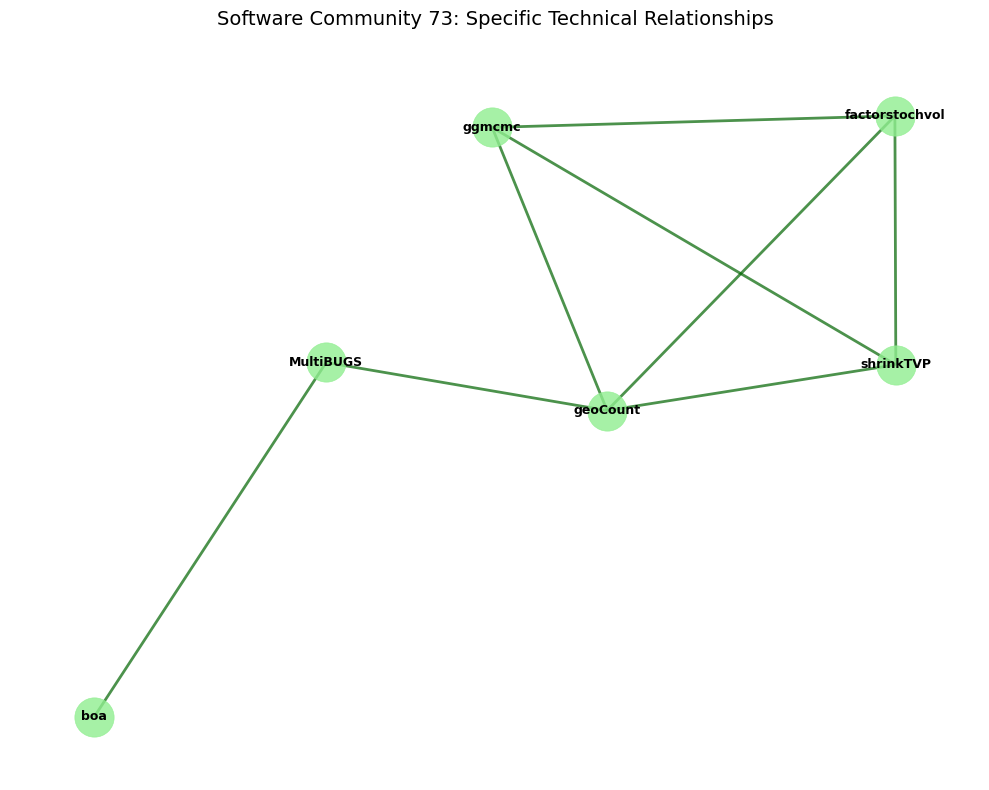


HIGHLY SPECIFIC TECHNICAL INSIGHTS:
Network shows 6 software with specific technical relationships

Most specific technical relationships:
  • shrinkTVP ↔ factorstochvol
    Shared specific domains: bayesian inference, markov chain monte carlo
  • ggmcmc ↔ shrinkTVP
    Shared specific domains: bayesian inference, markov chain monte carlo
  • ggmcmc ↔ geoCount
    Shared specific domains: bayesian inference, markov chain monte carlo
  • ggmcmc ↔ factorstochvol
    Shared specific domains: bayesian inference, markov chain monte carlo
  • geoCount ↔ shrinkTVP
    Shared specific domains: bayesian inference, markov chain monte carlo

Most common specific technical keywords across all software:
  clustering: 27 occurrences
  markov chain monte carlo: 26 occurrences
  machine learning: 23 occurrences
  time series: 20 occurrences
  bayesian inference: 20 occurrences
  optimization: 19 occurrences
  em algorithm: 17 occurrences
  causal inference: 14 occurrences
  cluster analysis: 13 occur

In [ ]:
# More aggressive filtering of generic terms
HIGHLY_GENERIC_KEYWORDS = {
    'r package', 'r', 'cran', 'journal of statistical software',
    'arxiv_stat.co', 'jstatsoft.org', 'r-journal', 'arxiv_stat.me',
    'arxiv_publication', 'joss', 'software development', 'scientific/engineering',
    'mathematics', 'education', 'research', 'analysis', 'computational',
    'simulation', 'modeling', 'statistics', 'data analysis', 'scientific computing',
    'software', 'package', 'library', 'tool', 'framework'
}

def filter_specific_technical_keywords(keyword_list):
    """Keep only highly specific technical terms"""
    filtered = []
    for kw in keyword_list:
        kw_lower = kw.lower()
        # Exclude if in generic list or too short
        if kw_lower in HIGHLY_GENERIC_KEYWORDS or len(kw) < 5:
            continue
        # Exclude if it sounds too generic
        if any(generic in kw_lower for generic in ['general', 'various', 'multiple', 'diverse']):
            continue
        # Keep if it contains technical indicators
        if any(indicator in kw_lower for indicator in [
            'algorithm', 'model', 'method', 'theory', 'distribution',
            'regression', 'cluster', 'bayesian', 'optimization', 'visualization',
            'inference', 'estimation', 'classification', 'dimensional',
            'stochastic', 'monte carlo', 'time series', 'linear model',
            'nonparametric', 'multivariate', 'hypothesis', 'neural network',
            'deep learning', 'machine learning', 'random forest', 'svm',
            'markov chain', 'hidden markov', 'gaussian', 'poisson',
            'maximum likelihood', 'bootstrapping', 'cross-validation'
        ]):
            filtered.append(kw)
    return filtered

# Recompute with highly specific keywords only
print("Computing highly specific technical relationships...")

# Create a new graph with specific technical keywords
G_specific = nx.Graph()

# Add nodes
for software_id in community_73_software_info['swmath_id']:
    G_specific.add_node(software_id)

# Get the DTM again but with better filtering
community_73_software_info['specific_keywords'] = community_73_software_info['cleaned_keywords'].apply(
    filter_specific_technical_keywords
)

# Only keep software that have specific technical keywords
software_with_specific = community_73_software_info[
    community_73_software_info['specific_keywords'].apply(len) > 0
]

print(f"{len(software_with_specific)} software have specific technical keywords")

# Build graph using the efficient method but with specific keywords
software_ids_specific = software_with_specific['swmath_id'].tolist()
specific_keywords_dict = dict(zip(software_with_specific['swmath_id'],
                                 software_with_specific['specific_keywords']))

# Compare only software that have specific keywords
for i, (id1, keywords1) in enumerate(specific_keywords_dict.items()):
    keywords_set1 = set(keywords1)
    for j, (id2, keywords2) in enumerate(specific_keywords_dict.items()):
        if i < j:  # Avoid duplicates
            common_keywords = keywords_set1.intersection(set(keywords2))
            if common_keywords:
                G_specific.add_edge(id1, id2,
                                  weight=len(common_keywords),
                                  keywords=list(common_keywords))

print(f"Specific technical graph: {G_specific.number_of_nodes()} nodes, {G_specific.number_of_edges()} edges")

# Now create the visualization with highly specific keywords
MIN_SPECIFIC_WEIGHT = 2  # Even 2 shared specific keywords is meaningful

if G_specific.number_of_edges() > 0:
    strong_specific_edges = [(u, v) for u, v, d in G_specific.edges(data=True)
                           if d['weight'] >= MIN_SPECIFIC_WEIGHT]

    if strong_specific_edges:
        G_specific_visual = nx.Graph()
        G_specific_visual.add_edges_from(strong_specific_edges)

        # Get main component
        if not nx.is_connected(G_specific_visual):
            largest_cc = max(nx.connected_components(G_specific_visual), key=len)
            G_specific_visual = G_specific_visual.subgraph(largest_cc)

        # Visualization
        plt.figure(figsize=(10, 8))
        pos = nx.spring_layout(G_specific_visual, k=1.5, iterations=50, seed=42)

        node_labels = {}
        for node in G_specific_visual.nodes():
            software_name = community_73_software_info[
                community_73_software_info['swmath_id'] == node
            ]['name'].iloc[0]
            if len(software_name) > 15:
                software_name = software_name[:12] + "..."
            node_labels[node] = software_name

        nx.draw_networkx_nodes(G_specific_visual, pos, node_color='lightgreen',
                              node_size=800, alpha=0.8, linewidths=0.5)
        nx.draw_networkx_edges(G_specific_visual, pos, edge_color='darkgreen',
                              width=2, alpha=0.7)
        nx.draw_networkx_labels(G_specific_visual, pos, node_labels, font_size=9,
                               font_weight='bold')

        plt.title("Software Community 73: Specific Technical Relationships",
                  fontsize=14, pad=20)
        plt.axis('off')
        plt.tight_layout()
        plt.savefig('specific_technical_network.png', dpi=300, bbox_inches='tight')
        plt.show()

        # Print meaningful insights
        print("\nHIGHLY SPECIFIC TECHNICAL INSIGHTS:")
        print("=" * 50)
        print(f"Network shows {G_specific_visual.number_of_nodes()} software with specific technical relationships")

        # Show most specific relationships
        specific_connections = []
        for u, v, d in G_specific.edges(data=True):
            if d['weight'] >= MIN_SPECIFIC_WEIGHT and u in G_specific_visual and v in G_specific_visual:
                name1 = community_73_software_info[
                    community_73_software_info['swmath_id'] == u
                ]['name'].iloc[0]
                name2 = community_73_software_info[
                    community_73_software_info['swmath_id'] == v
                ]['name'].iloc[0]
                specific_connections.append((d['weight'], name1, name2, d['keywords']))

        specific_connections.sort(reverse=True)

        print(f"\nMost specific technical relationships:")
        for weight, name1, name2, keywords in specific_connections[:5]:
            print(f"  • {name1} ↔ {name2}")
            print(f"    Shared specific domains: {', '.join(keywords)}")

    else:
        print("No strong specific technical relationships found.")
        print("The software may be too specialized or have unique technical profiles.")
else:
    print("No specific technical relationships found.")
    print("Consider relaxing the filtering criteria or analyzing the raw keyword distribution.")

# Show what specific technical keywords we found
print(f"\nMost common specific technical keywords across all software:")
all_specific_keywords = []
for keywords in community_73_software_info['specific_keywords']:
    all_specific_keywords.extend(keywords)

specific_freq = Counter(all_specific_keywords)
for keyword, freq in specific_freq.most_common(15):
    if freq >= 2:
        print(f"  {keyword}: {freq} occurrences")

Analyzing technical keyword diversity...
Unique specific technical keywords: 1050
Top 20 specific keywords:
  clustering: 27
  markov chain monte carlo: 26
  machine learning: 23
  time series: 20
  bayesian inference: 20
  optimization: 19
  em algorithm: 17
  causal inference: 14
  cluster analysis: 13
  classification: 12
  methodology: 12
  high-dimensional data: 10
  regression: 10
  model selection: 9
  mixture models: 9
  logistic regression: 9
  visualization: 8
  item response theory: 8
  algorithm: 8
  bayesian: 8

Creating category-based relationships...
Categorical graph: 883 nodes, 84783 edges


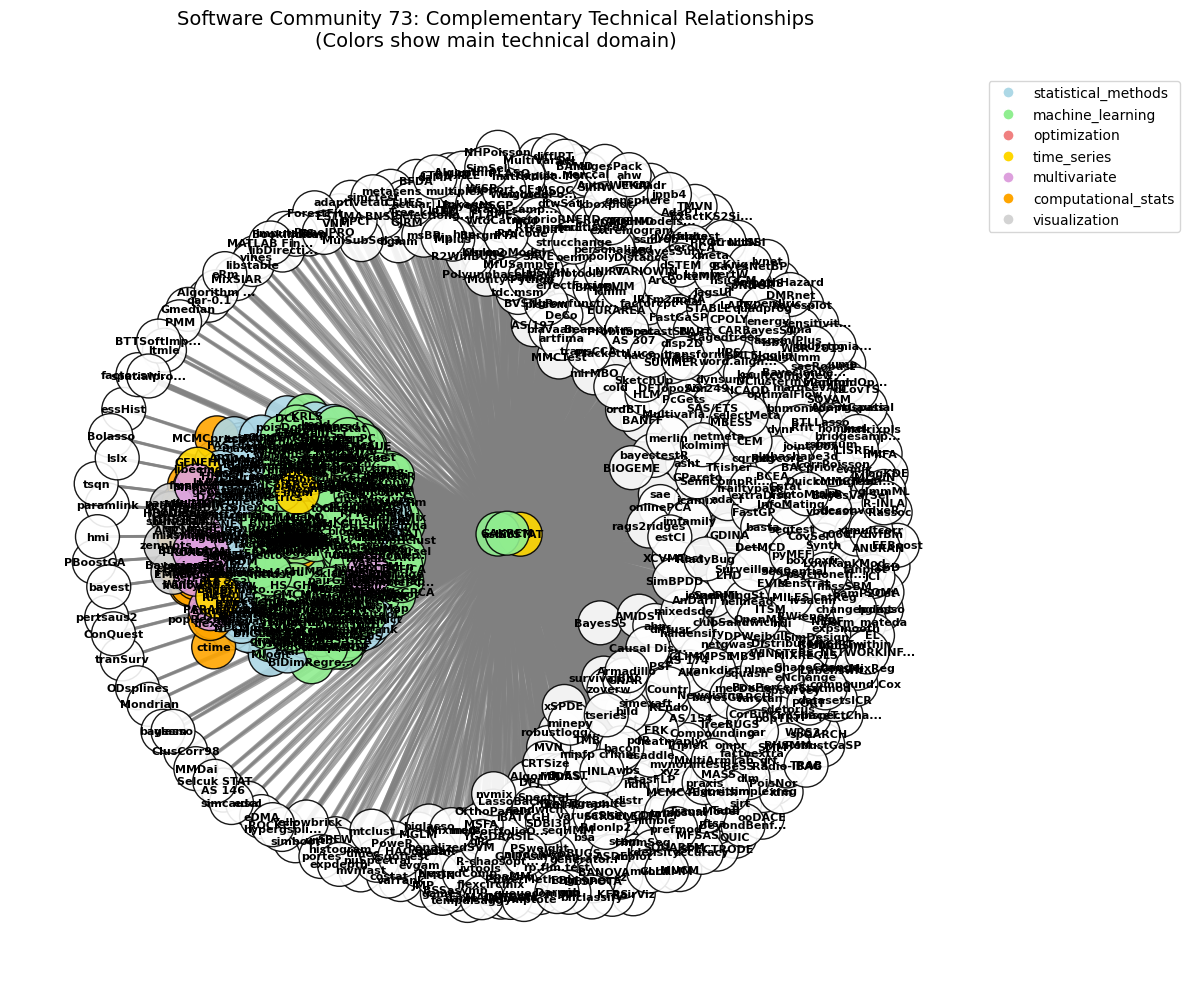


COMPLEMENTARY TECHNICAL RELATIONSHIPS:

asbio ↔ SYSTAT
  Shared domains: machine_learning
  Complementary domains: time_series, computational_stats, multivariate, statistical_methods
  asbio keywords: probability distributions, interval estimation, sampling distributions
  SYSTAT keywords: regression model, nonlinear models, time series analysis

asbio ↔ GAKREM
  Shared domains: machine_learning, statistical_methods
  Complementary domains: computational_stats, optimization
  asbio keywords: probability distributions, interval estimation, sampling distributions
  GAKREM keywords: clustering, genetic algorithms, logarithmic regression

SYSTAT ↔ GAKREM
  Shared domains: machine_learning
  Complementary domains: time_series, optimization, multivariate, statistical_methods
  SYSTAT keywords: regression model, nonlinear models, time series analysis
  GAKREM keywords: clustering, genetic algorithms, logarithmic regression

asbio ↔ LISP-STAT
  Shared domains: machine_learning, statistical_me

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt # Ensure matplotlib is imported
import networkx as nx # Ensure networkx is imported
from collections import Counter # Ensure Counter is imported

# First, let's see what specific technical keywords we have
print("Analyzing technical keyword diversity...")
all_specific_keywords = []
for keywords in community_73_software_info['specific_keywords']:
    all_specific_keywords.extend(keywords)

keyword_freq = Counter(all_specific_keywords)
print(f"Unique specific technical keywords: {len(keyword_freq)}")
print("Top 20 specific keywords:")
for kw, freq in keyword_freq.most_common(20):
    print(f"  {kw}: {freq}")

# Group related keywords manually (you can expand this)
KEYWORD_CATEGORIES = {
    'statistical_methods': [
        'bayesian inference', 'maximum likelihood', 'bootstrapping', 'cross-validation',
        'hypothesis testing', 'confidence intervals', 'nonparametric', 'parametric'
    ],
    'machine_learning': [
        'neural networks', 'deep learning', 'random forest', 'support vector machines',
        'clustering', 'classification', 'regression', 'dimensionality reduction'
    ],
    'optimization': [
        'convex optimization', 'linear programming', 'nonlinear optimization',
        'stochastic optimization', 'genetic algorithms'
    ],
    'time_series': [
        'time series analysis', 'autoregressive models', 'seasonal decomposition',
        'forecasting', 'stationarity'
    ],
    'multivariate': [
        'multivariate analysis', 'principal component analysis', 'factor analysis',
        'canonical correlation', 'multidimensional scaling'
    ],
    'computational_stats': [
        'markov chain monte carlo', 'em algorithm', 'gibbs sampling',
        'numerical integration', 'computational statistics'
    ],
    'visualization': [
        'data visualization', 'interactive graphics', 'plotting', 'geospatial',
        '3d visualization'
    ]
}

def categorize_keywords(keyword_list):
    """Categorize keywords into broader technical domains"""
    categories_found = set()
    for kw in keyword_list:
        kw_lower = kw.lower()
        for category, keywords_in_category in KEYWORD_CATEGORIES.items():
            if any(cat_kw in kw_lower for cat_kw in keywords_in_category):
                categories_found.add(category)
                break
    return list(categories_found)

# Create a new graph based on category similarity (not exact keyword matches)
print("\nCreating category-based relationships...")

# Add all software with specific keywords
software_with_specific = community_73_software_info[
    community_73_software_info['specific_keywords'].apply(len) > 0
].copy() # Add .copy() to avoid SettingWithCopyWarning later

# Create a new graph
G_categorical = nx.Graph()

for software_id in software_with_specific['swmath_id']:
    G_categorical.add_node(software_id)

# Categorize each software's keywords
software_categories = {}
for _, row in software_with_specific.iterrows():
    software_id = row['swmath_id']
    categories = categorize_keywords(row['specific_keywords'])
    software_categories[software_id] = categories

# Build edges based on category overlap (different but related domains)
software_ids_list = software_with_specific['swmath_id'].tolist()

for i in range(len(software_ids_list)):
    for j in range(i + 1, len(software_ids_list)):
        software_id1 = software_ids_list[i]
        software_id2 = software_ids_list[j]

        categories1 = set(software_categories[software_id1])
        categories2 = set(software_categories[software_id2])

        # Find overlapping AND complementary categories
        overlapping_categories = categories1.intersection(categories2)
        complementary_categories = categories1.symmetric_difference(categories2)

        # Only create edge if there's meaningful relationship
        if overlapping_categories or (len(complementary_categories) <= 3 and complementary_categories):
            # Weight based on combination of overlap and complementarity
            weight = len(overlapping_categories) + 0.5 * len(complementary_categories)

            if weight > 0.5:  # Meaningful relationship threshold
                relationship_info = {
                    'overlap': list(overlapping_categories),
                    'complementary': list(complementary_categories),
                    'keywords1': software_with_specific[
                        software_with_specific['swmath_id'] == software_id1
                    ]['specific_keywords'].iloc[0][:3],  # Top 3 keywords
                    'keywords2': software_with_specific[
                        software_with_specific['swmath_id'] == software_id2
                    ]['specific_keywords'].iloc[0][:3]
                }

                G_categorical.add_edge(software_id1, software_id2,
                                     weight=weight,
                                     info=relationship_info)

print(f"Categorical graph: {G_categorical.number_of_nodes()} nodes, {G_categorical.number_of_edges()} edges")

# Create the visualization
if G_categorical.number_of_edges() > 0:
    # Filter to show most interesting relationships
    interesting_edges = []
    for u, v, d in G_categorical.edges(data=True):
        # Prefer edges with both overlap AND complementarity
        has_both = len(d['info']['overlap']) > 0 and len(d['info']['complementary']) > 0
        if has_both or d['weight'] >= 1.5:
            interesting_edges.append((u, v, d))

    if not interesting_edges:
        interesting_edges = list(G_categorical.edges(data=True))[:20]  # Fallback

    G_interesting = nx.Graph()
    for u, v, d in interesting_edges:
        G_interesting.add_edge(u, v, **d)

    # Visualization
    plt.figure(figsize=(12, 10)) # Corrected figsize
    pos = nx.spring_layout(G_interesting, k=2, iterations=100, seed=42)

    node_labels = {}
    for node in G_interesting.nodes():
        # Use software_with_specific for name lookup as it's filtered and copied
        software_name = software_with_specific[
            software_with_specific['swmath_id'] == node
        ]['name'].iloc[0]
        if len(software_name) > 12:
            software_name = software_name[:10] + "..."
        node_labels[node] = software_name

    # Color nodes by their main category
    node_colors = []
    color_map = {
        'statistical_methods': 'lightblue',
        'machine_learning': 'lightgreen',
        'optimization': 'lightcoral',
        'time_series': 'gold',
        'multivariate': 'plum',
        'computational_stats': 'orange',
        'visualization': 'lightgray'
    }

    for node in G_interesting.nodes():
        categories = software_categories.get(node, []) # Use .get() for safety
        if categories:
            main_category = categories[0]
            node_colors.append(color_map.get(main_category, 'white'))
        else:
            node_colors.append('white')

    nx.draw_networkx_nodes(G_interesting, pos, node_color=node_colors,
                          node_size=1000, alpha=0.9, linewidths=1, edgecolors='black')
    nx.draw_networkx_edges(G_interesting, pos, edge_color='gray',
                          width=2, alpha=0.7)
    nx.draw_networkx_labels(G_interesting, pos, node_labels, font_size=8,
                           font_weight='bold')

    # Create legend for categories
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                                 markerfacecolor=color, markersize=8, label=category)
                      for category, color in color_map.items()]
    plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

    plt.title("Software Community 73: Complementary Technical Relationships\n"
              "(Colors show main technical domain)", fontsize=14, pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('complementary_technical_network.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print insights about complementary relationships
    print("\nCOMPLEMENTARY TECHNICAL RELATIONSHIPS:")
    print("=" * 55)

    # Sort interesting edges by weight to show the strongest
    interesting_edges.sort(key=lambda x: x[2]['weight'], reverse=True)

    for u, v, d in interesting_edges[:8]:  # Show top 8 most interesting
        # Use software_with_specific for name lookup
        name1 = software_with_specific[
            software_with_specific['swmath_id'] == u
        ]['name'].iloc[0]
        name2 = software_with_specific[
            software_with_specific['swmath_id'] == v
        ]['name'].iloc[0]

        print(f"\n{name1} ↔ {name2}")
        if d['info']['overlap']:
            print(f"  Shared domains: {', '.join(d['info']['overlap'])}")
        if d['info']['complementary']:
            print(f"  Complementary domains: {', '.join(d['info']['complementary'])}")
        print(f"  {name1} keywords: {', '.join(d['info']['keywords1'])}")
        print(f"  {name2} keywords: {', '.join(d['info']['keywords2'])}")

else:
    print("No meaningful categorical relationships found based on the filtering criteria.")
    print("Consider adjusting the MIN_SPECIFIC_WEIGHT or KEYWORD_CATEGORIES.")

# Show what specific technical keywords we found
print(f"\nMost common specific technical keywords across all software:")
all_specific_keywords = []
for keywords in community_73_software_info['specific_keywords']:
    all_specific_keywords.extend(keywords)

specific_freq = Counter(all_specific_keywords)
for keyword, freq in specific_freq.most_common(15):
    if keyword and freq >= 2: # Ensure keyword is not empty and appears at least twice
        print(f"  {keyword}: {freq} occurrences")

Selecting most representative software...
Selected 10 representative software:
  • GMRFLib: intrinsic gaussian markov random fields, bayesian hierarchical models, auxiliary variable models
  • asbio: probability distributions, interval estimation, sampling distributions
  • NPCD: nonparametric methods, dina model, dino model
  • R-chaosoptimiser: gradient-based method, algorithm, wave carrier algorithm
  • mgm: structure estimation, mixed graphical models, dynamic graphical models
  • SPSS: regression procedure, interval estimations, model diagnosis
  • AgenaRisk: causal model, explanatory model, basics of probability theory
  • ROCKET: graphical model selection, transelliptical graphical models, uniformly valid inference
  • gcmr: discrete time series, gaussian copula, likelihood inference
  • ClusterKDE: kernel density estimation, gaussian kernel, clustering data
Minimal graph: 10 nodes, 1 edges


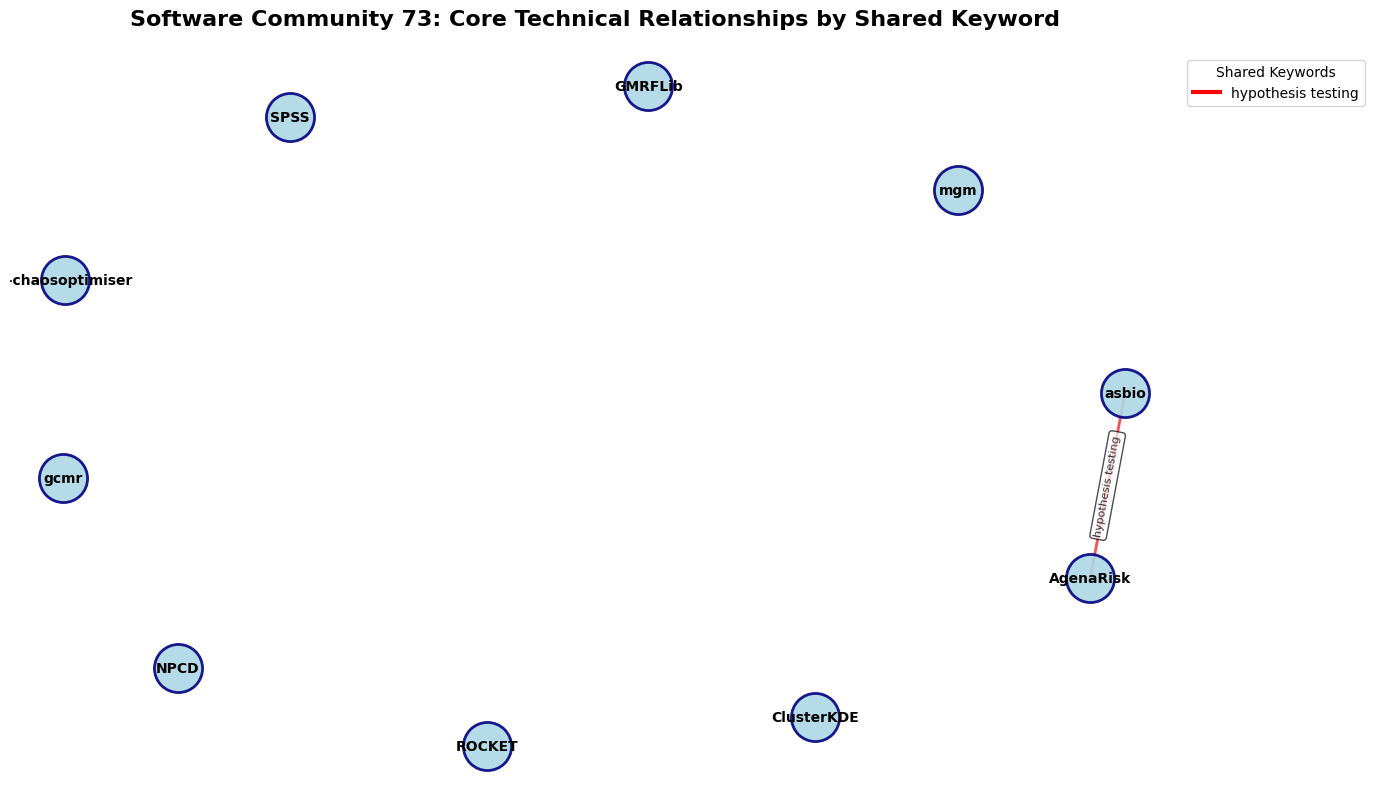


CORE TECHNICAL INSIGHTS FOR ARTICLE

Selected 10 software representing diverse technical domains:

📊 GMRFLib
   Technical focus: intrinsic gaussian markov random fields, bayesian hierarchical models, auxiliary variable models, non-normal response models

📊 asbio
   Technical focus: probability distributions, interval estimation, sampling distributions, resampling distributions

📊 NPCD
   Technical focus: nonparametric methods, dina model, dino model, nida model

📊 R-chaosoptimiser
   Technical focus: gradient-based method, algorithm, wave carrier algorithm, chaos optimisation algorithm

📊 mgm
   Technical focus: structure estimation, mixed graphical models, dynamic graphical models, time-varying graphical models

📊 SPSS
   Technical focus: regression procedure, interval estimations, model diagnosis, homogeneous and inhomogeneus models

📊 AgenaRisk
   Technical focus: causal model, explanatory model, basics of probability theory, bn model

📊 ROCKET
   Technical focus: graphical model s

In [ ]:
# Let's pick just 8-12 representative software with diverse technical keywords
print("Selecting most representative software...")

# Get software with the most diverse and interesting technical keywords
software_diversity = []
for _, row in community_73_software_info.iterrows():
    if len(row['specific_keywords']) >= 3:  # Only consider software with meaningful technical profiles
        # Score by keyword diversity (prefer less common keywords)
        diversity_score = sum(1/keyword_freq[kw] for kw in row['specific_keywords'] if kw in keyword_freq)
        software_diversity.append((row['swmath_id'], row['name'], diversity_score, row['specific_keywords']))

# Sort by diversity and pick top 10
software_diversity.sort(key=lambda x: x[2], reverse=True)
selected_software = software_diversity[:10]

print(f"Selected {len(selected_software)} representative software:")
for sw_id, name, score, keywords in selected_software:
    print(f"  • {name}: {', '.join(keywords[:3])}")

# Create a minimal graph with just these software
G_minimal = nx.Graph()

# Add selected software
for sw_id, name, score, keywords in selected_software:
    G_minimal.add_node(sw_id, name=name, keywords=keywords[:5])  # Store top 5 keywords

# Only connect software that share at least 1 specific technical keyword
for i, (id1, name1, score1, keywords1) in enumerate(selected_software):
    for j, (id2, name2, score2, keywords2) in enumerate(selected_software):
        if i < j:
            common_keywords = set(keywords1).intersection(set(keywords2))
            if common_keywords:
                G_minimal.add_edge(id1, id2,
                                 weight=len(common_keywords),
                                 common_keywords=list(common_keywords))

print(f"Minimal graph: {G_minimal.number_of_nodes()} nodes, {G_minimal.number_of_edges()} edges")


# --- Visualization with colored edges based on common keywords ---

# Create a color map for common keywords
# We'll assign a unique color to each unique common keyword found in the edges
unique_common_keywords = set()
for u, v, d in G_minimal.edges(data=True):
    unique_common_keywords.update(d['common_keywords'])

# Assign a color to each unique keyword
import colorsys
num_colors = len(unique_common_keywords)
# Generate distinct colors
colors = []
for i in range(num_colors):
    hue = i / num_colors
    lightness = (50 + np.random.rand() * 10) / 100  # Vary lightness slightly
    saturation = (90 + np.random.rand() * 10) / 100 # Vary saturation slightly
    rgb = colorsys.hls_to_rgb(hue, lightness, saturation)
    colors.append('#%02x%02x%02x' % (int(rgb[0]*255), int(rgb[1]*255), int(rgb[2]*255)))

keyword_color_map = dict(zip(unique_common_keywords, colors))

# Determine edge colors based on the most specific common keyword
edge_colors = []
edge_keywords_for_legend = [] # To store the keyword used for coloring each edge
for u, v, d in G_minimal.edges(data=True):
    common_kws = d['common_keywords']
    if common_kws:
        # Pick the most specific keyword for coloring (e.g., the one with most words)
        most_specific_kw = max(common_kws, key=lambda x: len(x.split()))
        edge_colors.append(keyword_color_map[most_specific_kw])
        edge_keywords_for_legend.append(most_specific_kw)
    else:
        edge_colors.append('gray') # Default color if no common keywords

# Create super clean visualization
plt.figure(figsize=(12, 8))

# Use a clean layout
pos = nx.spring_layout(G_minimal, k=3, iterations=100, seed=42)

# Draw the graph
nx.draw_networkx_nodes(G_minimal, pos, node_color='lightblue',
                      node_size=1200, alpha=0.9, linewidths=2, edgecolors='navy')
# Draw edges with assigned colors
nx.draw_networkx_edges(G_minimal, pos, edge_color=edge_colors,
                      width=2, alpha=0.7, style='-')

# Add node labels (software names)
node_labels = {node: G_minimal.nodes[node]['name'] for node in G_minimal.nodes()}
nx.draw_networkx_labels(G_minimal, pos, node_labels, font_size=10,
                       font_weight='bold', font_family='sans-serif')

# Add edge labels showing shared technical domains
edge_labels = {}
for u, v, d in G_minimal.edges(data=True):
    common_kws = d['common_keywords']
    if common_kws:
         # Show just the most specific shared keyword for the label too
        most_specific = max(common_kws, key=lambda x: len(x.split()))
        edge_labels[(u, v)] = most_specific

nx.draw_networkx_edge_labels(G_minimal, pos, edge_labels, font_size=8,
                            font_family='sans-serif', alpha=0.8, bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3')) # Add bbox for readability


plt.title("Software Community 73: Core Technical Relationships by Shared Keyword",
          fontsize=16, pad=20, fontweight='bold')
plt.axis('off')
plt.tight_layout()

# Create a legend for edge colors (keywords)
if unique_common_keywords:
    legend_elements = [plt.Line2D([0], [0], color=color, lw=3, label=keyword)
                       for keyword, color in keyword_color_map.items()]
    # Place legend outside the plot
    plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), title="Shared Keywords")


# Save high-quality image
plt.savefig('core_technical_network_colored.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()

# Print clean technical insights
print("\n" + "="*60)
print("CORE TECHNICAL INSIGHTS FOR ARTICLE")
print("="*60)

print(f"\nSelected {len(selected_software)} software representing diverse technical domains:")

# Show each software with its technical specialties
for sw_id, name, score, keywords in selected_software:
    print(f"\n📊 {name}")
    print(f"   Technical focus: {', '.join(keywords[:4])}")

print(f"\n🔗 KEY TECHNICAL CONNECTIONS:")
print("-" * 40)

# Show the most meaningful connections
connection_count = 0
for u, v, d in G_minimal.edges(data=True):
    if connection_count < 5:  # Show top 5 connections
        name1 = G_minimal.nodes[u]['name']
        name2 = G_minimal.nodes[v]['name']
        common_kws = d['common_keywords']

        print(f"\n{name1} ↔ {name2}")
        print(f"   Shared technical domain: {common_kws[0]}")

        # Show what makes each unique
        kws1 = [kw for kw in G_minimal.nodes[u]['keywords'] if kw not in common_kws][:2]
        kws2 = [kw for kw in G_minimal.nodes[v]['keywords'] if kw not in common_kws][:2]

        if kws1:
            print(f"   {name1} also specializes in: {', '.join(kws1)}")
        if kws2:
            print(f"   {name2} also specializes in: {', '.join(kws2)}")

        connection_count += 1

print(f"\n💡 This network reveals how specialized statistical software")
print(f"   connects through shared methodological domains while maintaining")
print(f"   unique technical specialties.")

In [ ]:
df_deduplicated

id    index          name  \
0           2    804.0  SuperLU-DIST   
20          4  16535.0       MULTI2D   
32          5  10196.0        BEMLIB   
52          6  13971.0         FIDAP   
72          7  28147.0       SHALL 4   
...       ...      ...           ...   
480519  10283   4000.0         2DRMP   
480521  10284   4002.0      GraphGen   
480528  10285   4008.0        HQRII1   
480532  10286   4010.0      GROWTHgr   
480533  10287   4011.0      GROWTH06   

                                                 keywords  
0                                                    orms  
20      Inertial Confinement;Radiative Transfer;Lagran...  
32      boundary element method;textbook;Green's funct...  
52      steady state or transient;two-dimensional;axi-...  
72      implicit compact fourth-order Fortran program;...  
...                                                   ...  
480519  atomic collision processes;electron impact exc...  
480521  random graphs;complex networks;Markov process;...  
480528  numerical examples;benchmark;eigenproblem;eige...  
480532  reflection high-energy electron diffraction (R...  
480533  reflection high-energy electron diffraction (R...  

[39962 rows x 4 columns]

In [ ]:
community_73_software_info.head(15)

swmath_id  index          name  \
28          46  11356         ARfit   
53          80  12245         Biota   
102        150    412  compositions   
135        189   8045         DAVIS   
154        210  26224         DLLSA   
159        218  26769           DPJ   
164        224  27148       Dunnart   
179        249  15458        ESTIMA   
182        254  25123        EViews   
183        255   5863          EVIM   
235        322   5881         GAUSS   
252        345    715         GGobi   
286        386   6674         gretl   
314        419  10022          hsmm   
345        461  11856          ITSM   

                                              keywords  \
28   Matlab;multivariate time series;autoregressive...   
53   Object-oriented;Modeling;Population biology;Co...   
102                                                      
135  Java-based data visualization;dynamic graphics...   
154  dynamic link library;statistical analysis;Exce...   
159           data-parallel programs;SPMD model;JavaVM   
164                                                      
179  System identification;parameter estimation;aer...   
182                                               orms   
183      extreme value theory;risk management;software   
235                                               orms   
252  statistical graphics;interoperability;R;XML;AP...   
286     jstatsoft.org;gretl;TestU01;RNG;random numbers   
314  hidden semi-Markov models;statistical computin...   
345                                        time series   

                                      cleaned_keywords  \
28   [matlab, multivariate time series, autoregress...   
53   [object-oriented, modeling, population biology...   
102                                                 []   
135  [java-based data visualization, dynamic graphi...   
154  [dynamic link library, statistical analysis, e...   
159       [data-parallel programs, spmd model, javavm]   
164                                                 []   
179  [system identification, parameter estimation, ...   
182                                             [orms]   
183  [extreme value theory, risk management, software]   
235                                             [orms]   
252  [statistical graphics, interoperability, r, xm...   
286  [jstatsoft.org, gretl, testu01, rng, random nu...   
314  [hidden semi-markov models, statistical comput...   
345                                      [time series]   

                                    technical_keywords  \
28   matlab multivariate time series autoregressive...   
53   object-oriented modeling population biology co...   
102                                                      
135  java-based data visualization dynamic graphics...   
154  dynamic link library statistical analysis exce...   
159           data-parallel programs spmd model javavm   
164                                                      
179  system identification parameter estimation aer...   
182                                               orms   
183      extreme value theory risk management software   
235                                               orms   
252      statistical graphics interoperability plugins   
286                       gretl testu01 random numbers   
314  hidden semi-markov models statistical computin...   
345                                        time series   

                                     specific_keywords  
28   [multivariate time series, autoregressive models]  
53                                                  []  
102                                                 []  
135  [java-based data visualization, flipped empiri...  
154                                                 []  
159                                       [spmd model]  
164                                                 []  
179       [parameter estimation, aerodynamic modeling]  
182                                                 []  
183                    

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx
import pandas as pd
import numpy as np

# Define clear technical domains with colors
TECHNICAL_DOMAINS = {
    'time_series': {'color': '#FF6B6B', 'keywords': ['time series', 'autoregressive', 'forecasting']},
    'optimization': {'color': '#4ECDC4', 'keywords': ['optimization', 'parameter estimation', 'em algorithm']},
    'statistical_methods': {'color': '#45B7D1', 'keywords': ['statistical', 'inference', 'maximum likelihood']},
    'machine_learning': {'color': '#96CEB4', 'keywords': ['machine learning', 'neural', 'clustering']},
    'visualization': {'color': '#FFEAA7', 'keywords': ['visualization', 'graphics', 'plotting']},
    'computational': {'color': '#DDA0DD', 'keywords': ['computational', 'parallel', 'simulation']},
    'specialized_apps': {'color': '#98D8C8', 'keywords': ['extreme value', 'aerodynamic', 'population biology']}
}

# Fixed domain assignment for list data
def safe_domain_assignment(row):
    """Simple domain assignment that handles list data properly"""
    domains = []

    # Get the value safely
    specific_kw = row['specific_keywords']

    # Check if it's a list and not empty
    if not isinstance(specific_kw, list) or len(specific_kw) == 0:
        return domains

    # Match with domains
    for kw in specific_kw:
        kw_lower = str(kw).lower()
        for domain, info in TECHNICAL_DOMAINS.items():
            for domain_keyword in info['keywords']:
                if domain_keyword in kw_lower:
                    if domain not in domains:
                        domains.append(domain)
                    break  # Found a match for this domain

    return domains[:2]  # Return max 2 domains

# Apply the fixed domain assignment
community_73_software_info = community_73_software_info.copy()
community_73_software_info['domains'] = community_73_software_info.apply(safe_domain_assignment, axis=1)

# Check results
print(f"\n=== DOMAIN ASSIGNMENT RESULTS ===")
print(f"Total software: {len(community_73_software_info)}")
print(f"Software with domains: {len(community_73_software_info[community_73_software_info['domains'].apply(len) > 0])}")

# Show some examples
print("\nExamples of domain assignments:")
assigned_software = community_73_software_info[community_73_software_info['domains'].apply(len) > 0]
for i, row in assigned_software.head(10).iterrows():
    print(f"{row['name']}: {row['specific_keywords']} -> {row['domains']}")

# Select software for visualization
software_with_domains = assigned_software.copy()

if len(software_with_domains) > 0:
    # If we have many, select the most diverse ones
    if len(software_with_domains) > 15:
        software_with_domains['domain_count'] = software_with_domains['domains'].apply(len)
        software_with_domains = software_with_domains.nlargest(15, 'domain_count')

    print(f"\nSelected {len(software_with_domains)} software for visualization")

    # Create the network graph
    G_domains = nx.Graph()

    # Add nodes
    for _, row in software_with_domains.iterrows():
        G_domains.add_node(row['swmath_id'],
                          name=row['name'],
                          domains=row['domains'])

    # Create edges based on shared domains
    software_ids = software_with_domains['swmath_id'].tolist()

    for i in range(len(software_ids)):
        for j in range(i + 1, len(software_ids)):
            id1, id2 = software_ids[i], software_ids[j]
            domains1 = set(G_domains.nodes[id1]['domains'])
            domains2 = set(G_domains.nodes[id2]['domains'])

            shared_domains = domains1.intersection(domains2)
            if shared_domains:
                G_domains.add_edge(id1, id2,
                                 shared_domains=list(shared_domains),
                                 weight=len(shared_domains))

    print(f"Created graph with {G_domains.number_of_nodes()} nodes and {G_domains.number_of_edges()} edges")

    # Create visualization
    plt.figure(figsize=(12, 8))

    # Layout
    pos = nx.spring_layout(G_domains, k=2, iterations=100, seed=42)

    # Node colors by primary domain
    node_colors = []
    for node in G_domains.nodes():
        domains = G_domains.nodes[node]['domains']
        if domains:
            primary_domain = domains[0]
            node_colors.append(TECHNICAL_DOMAINS[primary_domain]['color'])
        else:
            node_colors.append('lightgray')

    # Draw the graph
    nx.draw_networkx_nodes(G_domains, pos, node_color=node_colors,
                          node_size=8000, alpha=0.9, linewidths=2, edgecolors='black')
    nx.draw_networkx_edges(G_domains, pos, edge_color='gray',
                          width=1.5, alpha=0.6)

    # Labels
    labels = {node: G_domains.nodes[node]['name'] for node in G_domains.nodes()}
    nx.draw_networkx_labels(G_domains, pos, labels, font_size=11,
                           font_weight='bold')

    # Legend
    legend_patches = []
    for domain, info in TECHNICAL_DOMAINS.items():
        patch = mpatches.Patch(color=info['color'], label=domain.replace('_', ' ').title())
        legend_patches.append(patch)

    plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1, 1),
              title="Technical Domains", title_fontsize=16, fontsize=14)

    # plt.title("Software Community 73: Technical Domain Relationships",
    #           fontsize=14, pad=20, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()

    # Save
    plt.savefig('technical_domains_network.eps', dpi=300, bbox_inches='tight',
                facecolor='white', edgecolor='none')
    plt.show()

    # Print insights
    print("\n" + "="*50)
    print("TECHNICAL DOMAIN INSIGHTS")
    print("="*50)

    # Software by domain
    domain_software = {}
    for _, row in software_with_domains.iterrows():
        for domain in row['domains']:
            if domain not in domain_software:
                domain_software[domain] = []
            domain_software[domain].append(row['name'])

    print(f"\nSoftware distribution by domain:")
    for domain, software_list in domain_software.items():
        domain_name = domain.replace('_', ' ').title()
        print(f"\n{domain_name}:")
        for software in software_list:
            print(f"  • {software}")

    # Key connections
    print(f"\nKey technical connections:")
    connections = []
    for u, v, d in G_domains.edges(data=True):
        name1 = G_domains.nodes[u]['name']
        name2 = G_domains.nodes[v]['name']
        connections.append((d['weight'], name1, name2, d['shared_domains']))

    connections.sort(reverse=True)
    for weight, name1, name2, domains in connections[:5]:
        domain_names = [d.replace('_', ' ').title() for d in domains]
        print(f"\n{name1} ↔ {name2}")
        print(f"  Shared: {', '.join(domain_names)}")

else:
    print("\nNo software found with technical domains.")
    print("Let's try with the cleaned_keywords column instead...")

    # Fallback to cleaned_keywords
    def fallback_domain_assignment(row):
        domains = []
        cleaned_kw = row['cleaned_keywords']

        if not isinstance(cleaned_kw, list) or len(cleaned_kw) == 0:
            return domains

        for kw in cleaned_kw:
            kw_lower = str(kw).lower()
            for domain, info in TECHNICAL_DOMAINS.items():
                for domain_keyword in info['keywords']:
                    if domain_keyword in kw_lower:
                        if domain not in domains:
                            domains.append(domain)
                        break
        return domains[:2]

    community_73_software_info['domains'] = community_73_software_info.apply(fallback_domain_assignment, axis=1)
    assigned_software = community_73_software_info[community_73_software_info['domains'].apply(len) > 0]
    print(f"Found {len(assigned_software)} software using cleaned_keywords")

NameError: name 'community_73_software_info' is not defined